In [57]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix

In [58]:
path = os.getcwd()

df = pd.read_csv(path + '/data/ethereum_transaction.csv')
df

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,9839,2178,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Inspection

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [68]:
# 0 ==> Normal, 1 ==> Fraud
df['FLAG'].value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

In [67]:
df.describe()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


#### Feature Selection

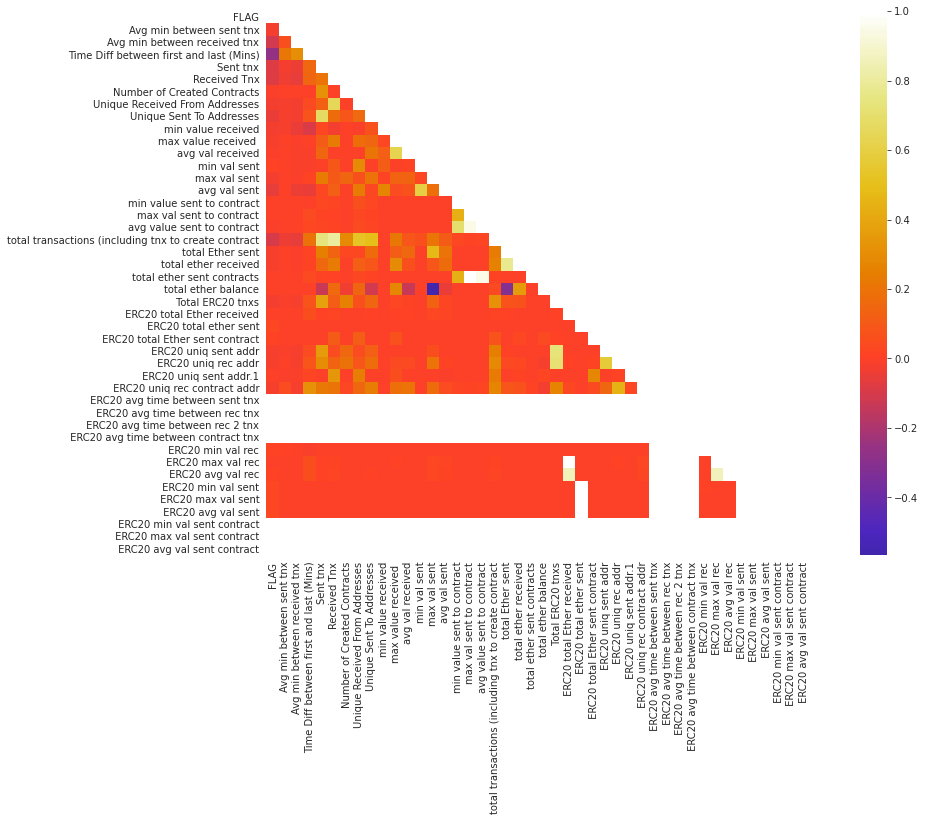

In [63]:
corr = df.iloc[:,2:-4].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)

In [65]:
df.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

## Data Cleaning

In [54]:
drop = ["total ether sent contracts", " ERC20 min val sent", " ERC20 max val sent", " ERC20 avg val sent", 
" ERC20 max val rec", ' ERC20 min val sent contract', ' ERC20 max val sent contract', ' ERC20 avg val sent contract',
]

df.drop(["total ether sent contracts", " ERC20 min val sent", " ERC20 max val sent", " ERC20 avg val sent", " ERC20 max val rec", ' ERC20 min val sent contract', ' ERC20 max val sent contract', ' ERC20 avg val sent contract'], axis=1, inplace=True)

In [56]:
X = df.iloc[:,2:-4]
y = df["FLAG"]

# Replace NaN with Average
for col in X.columns:
    X[col] = X[col].fillna(X[col].mean())

TypeError: Could not convert 0x00009277775ac7d0d59eaad8fee3d10ac6c805e80x0002b44ddb1476db43c868bd494422ee4c136fed0x0002bda54cb772d040f779e88eb453cac0daa2440x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e0x00062d1dd1afb6fb02540ddad9cdebfe568e0d890x000895ad78f4403ecd9468900e68d6ee506136fd0x000d63fc5df52b0204374c2f5a3249779805d5d10x000e001ab444fa8d6dc4a402f8d7cfc88fe8c64d0x0012cb699c836049a4bbeaac2d8c4d47c688e0e40x0012f247c9f980eea0a9ad06893bfd95c31457940x0013e58a315d2e728f11630aa40abfbdddcab3040x0016338abcb6bfa6d355adc207c5d2d42acb5e420x001b28141562bc2601694d27c3f5fda2c06c234c0x001cb265c5606d79035059686ae5f94c6a4c2c2c0x001cf9871aeaf2acf72f144b16818b7e417b6dda0x001d54f72af6eae0fdd17009c391426754bec5c20x001e6fbcd020823d3161df44bb5da6c34419eecb0x001eb1e90d25e8c1372c38f2b2a36b49b66342350x001f357ca93307571d8cd93d09ce25a3660429af0x001f99982965a3792077893ecadc7be0c61d613c0x00235134f8335d48cf506b25cc376fc84520588b0x0023a6a2c8316ccfb083a194aa5668bd758914550x0029a9b2ea1e45e32fb6344b117388515858d0400x002a68f53b92cef5ee4e7ce015b78408f20942bb0x002ab919205b134d05d0746e22c7f8000523c6600x002b043689ad84008fffab16afc1955f5a3aebde0x0031ebb20a0aaf8c67be012bb3a3483d752696350x003300d3d2c46983b9a55b07b9b2ab47d62281110x0033fd555da940b923a7f6f465cc4d90887242630x0034f7473531239b1799bc7f14ff97d5303a5a930x0036ed1e6299bb586ac70ebdfa336f06714a95560x0038ab9bf479faa2997522b3cf9492153ea6b33f0x003b9a44dcc7b59546a8b1c1e7dccd57eb99f07d0x003c5ebfa5cdb3d73bad42bb07db823f6c77a2360x003d8b1e6723960d60367a719fe65e08643a2a800x003e2b1599587a6c2f38928ea8f874a74fb1bbbc0x004534ebd59b0b094da701dbfd952ef6054701280x0045eb75acf6e1cb1d9ec41e352a879e2cd50b350x00462f4a169c1dc0b9dc428aa37d394c8abf12660x00472c1e4275230354dbe5007a5976053f12610a0x004853f00fab90ab60cf1e609b0b61494b90164c0x004e1c2a12ac1d0b70907c702892f397a4769bfb0x004f1cea50b057ad8b6f445e128edbdc9b48902b0x005073a74dd37889bebbf9de7550dea7666f625b0x005457078e3c355023433874edffc8b2548813340x00595d5ec3bb583428a0304b2940a70d7f553aef0x0059782ecd69fb5413c5e1a98b40c28dff0611620x005b98bb53be9d5789d27aa1c69ec8a789eff9c10x005cb96b96c8fe801f89500df6ee38dc5fa0081f0x005d3bffd33b1a012279d25d30f75133584404db0x006482de8230af0f8e2918a439c7826fe8642a430x006743c8992ca6d54c23fa3a745a4781b3817f0c0x0067e167caf808eaa6f642d9232e54ff7bb47c070x006aaaff2ff3358bc8453febaba4e236b028df800x007174732705604bbbf77038332dc52fd5a5000c0x0071763e7e796eeb4c32f083aa4a3ac2f33bf5c00x0071c78d72b78818b0d507c114674a7ce6bc4f180x00733965a4f189034c4cd0e7d38c877a34ba0b630x00760b09a77e7a4f6ea7e7fdf17f93f8d898c8700x00761aebf8420f0325f7d3a9161a8bb6a96e550b0x007a010f85605b7f9ecd0e26a7cfa3987bb3e43f0x007bb0518b03f1a8c00e9bb545640800d1e914440x007cafba4edd0e25a664530e3cac0ffadb101fd80x0080214c803a073c18aaadd7b99cfd08c3945b090x0080359f18daa3f2906e347a589ffd49c07c62580x0083704ad2f3e9f58e71593459462875255b7bd20x00893fa05c19ce3895d0d5577db0ddb02d5cbd470x0095e1a57555e5d5e9ee041bc5953d1c37729cdc0x009663d80363fa044763ef5331280081c95c94be0x009f93582e0c195ac9d3f2b9c1f31cf44e2e95610x00a4862d4407296f92005eff2f51fa5cbb3c60770x00a527d60d31b337d571acd17dca1720036363560x00a742825749d9a1b3e2455362ac4e81dc01162c0x00a87bd6b716f1a50504b8eff2d416de0690070e0x00adb936b9636ccc4211533c7f1a0d2c53466b850x00ae0c1fd293038c2b24a715e6fabacda6012b550x00af29056355cbe37df9724436eef327f5f881570x00bd1bba3519746a5b7d0bede063f14d48dfdf2b0x00bd9fd57c423a1b1c969823d409156d90974d770x00bf8ef866b3d8139c982961f6850fadc17f1d480x00bfc8d9cbcfc8601db95cded379ef7a4a5e0f5e0x00c2abd0ab9fc13fbc8baac19dc30aec31704d4e0x00c316e5099530e7af8e5bfade517b395acf86390x00c481dd22fba34f7dac2d46f0c1172c7abb9f0e0x00c6b386f92e1841c3a9dde2bf97a8950f0b0c310x00c8a33b90a749f7433e08e5d4c7034e405a94b40x00ca022d429d853c3f28070b410b13bc4438926b0x00cb28b1d4437357fdb57967e21be18c415ca05e0x00cb985681dd0cf13cff257a7324d97ea1e3ff320x00cbdec4dd1b322810683c0e977d4fa237fecf7e0x00cd7d76d3e93819c19fd7296386b816234b489e0x00ce20fbdedc38fb559728265edbb26b63fbb3770x00cfdefb1e800e4743288734adc727fae6659f740x00d4a560da94790c8d508a7edda6465d7a3e9a490x00d8a10e21f443758240eed09897cef08314618d0x00da8417b2c53b1fac15fafddf9854285959e9b60x00df7c16597385f31dfc87d1e103eaab28fc0f8d0x00e40876d147fdc499afa3f5a49cf6fe6256f1960x00e87b69cf3686e028f96d14cd79ec30983e0f530x00eb6923331d35ba68b9e36ff99d0c035ffed9e50x00f166114c211b7e71e09bfd5d6ffee8716bc0cb0x00f3c39b641a3533b95dd30b4f5b3a87ba9044ca0x00f8513a3819c085ba1d3cd84a15c5df45b7ee350x00f8de11eada0ce48200cd7f2214082954a9fe440x010c41f9ada72d7993973ee274c6cc93a309f8050x011b1cd5eaebc4d52bd2a6c928d45d93af642a580x011bed5908623f6adfcd54872ed88e0dc713a1bf0x0120a41636716d5717e92a2a960580a0961df73f0x012dbb1d6e6aaae7a0bf5f610a5fb44e308bb4330x012ef110b256b0e6b80aea1478d74b1b4a1eabb90x01390fbe18c3c5ae9f91b13ade67d19bce75c5e10x0155a63bc4cb378cb9b4dc10c8e777943bba9c2a0x0160cf072f092a70e8def0537b8329350282a8d40x016cd40242a3b50902c84088092ef87c85d782b30x016d12db5620e094868f95b9c6fd2057032b74460x016e0ddc9631f662539fb1882458e5df007915650x016f855e1d3a7737f7da894b1dd6e86a3353225d0x01716102b6ea467289897effc84cf136bd0b6c320x01889bfb1bd897ff4f23cb25f9dde7b3a012dbca0x018b9224ee3f8f362f553835d27da391fc5af9d90x019444358934627777f19f0cc121f5fc00e7bab80x01969235b1145fc6e8b1efab8ddbe56cfe313f3f0x01a35a131f90dd33dec9a0995aaa60720c0469380x01a9e95ef766394893dbfb824c66c91b301b913d0x01ad2af80301bcd6b5bd737699a6a7b51a24152a0x01bf959b281ac74e7fb3b98c880dbe88bab2e2a40x01cb670a5b57ddf7fa27b455ba2d9357f1dec6b00x01d41e16362b141332db90f69785dbe58f0dc4ee0x01df8ecad36d5eae229e6f5ae784428a9191c6ee0x01f6c17b828f211909453550ac925b3a19a583d70x01f70159be7361ccfcfe85bd4bbffe63ec00e2140x01fd68c62d8b18f5f01f184656b0b8de18ccb7aa0x0208764c8e34d0f980677f10867444f4cb27825c0x020aaf9192743375b50ab13976aa8e86d50852f50x020d6af0b51290d19e73a053ca33fa42da3a18fd0x020d818ebb9f1bd587acae00a48b93424d37bb840x020de3ebd3560b4e3cec1a8b34a3f2dff5e31f880x021201236965565462cd458df7d70f737d63d4d60x021da14749518f5d036a1891a063d2ab5db1b7330x02298b9f2517b0dc60929c53a69dea884494a32b0x022cbf4576d9c1c47836962c2d1085f0ff9177fc0x023096bf0b4d933256f98b85b648586e751052770x0236e5eae1708bfab9a699e8268e7521b0e6b95e0x0241899d2e42ca0fbf46d1a75ef429c7e061cded0x0244d7e1ffe01940b1ffcebca3f09efab13fe6640x02459d2ea9a008342d8685dae79d213f14a87d430x02494bfc78c74a5aa1c5b7b92757f9f37b2dcc5f0x024e8f301490466665e2402840f44881690bdb570x024f443f33e173e7a4dee5bc48c2132862f4a5c70x02524995562b26980f0fa0d9e34ab1dc0d5e22830x025aaf76b2157cadc814a145afb6d869753e73ff0x025ba18cb327c8d968470936ba8f340a47fd6a430x02605b528db3667cd34d3ca2f95b463ffcdab3a50x02618fd3c75554000c4a1bd2da6df06305c286350x026c1f10245d9f5950e4a4efbb97c97b5419ff2d0x026cb4a26bffb77427d6c2a8e5fd0995bff096880x026ee796ed70271cb22f3a619963b2d6dc46129c0x027421c8a2b34992cf191496dca553766597f78a0x027beefcbad782faf69fad12dee97ed894c685490x02819d258d099eafc2e1afbee0ec126b219fb0ec0x02825fb4eb4cffaa181ccd5b2208a9d2d7c620130x0286f95399e27692f161ed91968ea43c47023a3e0x028ffe3d16df8eb97df443dd37478a9f0dd130770x02959ba85385b49fae65acfa7b90f79427b9c2eb0x029798d4c234549b24dcfe12fb03ac50aa1b453e0x029dca74053990795945b01cccc987524706eb200x02a70f1f4449443fa36c14388479488d460007d70x02b346a34e1559886e6ca1631cb74d78954651970x02bc7852a518c506e2bf23c952ec9f341f2f2e0e0x02bf92165342a788b50e8b9de1731162701923280x02c68e3de38b00f958a53bd9182d09120312b2a20x02d11dcf702df6b41d0b09acf7f9589000f99d990x02d3e49a4aaa3704f7af38f7d91d47aa7ffeba330x02dad75eacf674939e61af034c2095b512f2af510x02ee08c4e1c0e17a658fb42bd379bad9db48788e0x02fb09a6d1ef7a8f3d131130695531af5393ef4a0x03014fd1cfcb9dbc4e8e2237638bb4c639d7babf0x030174efb82f744929c53c4a14ce4c8c0625d8ab0x0303dc78685fc446871d568c6e86a9547fb1d2c70x0304421f7d097871bde3524962f342d7ccadb0dd0x030459bed9ba3b8b2a9398f963670aa544450d0e0x03081809e0cf5371fcbe2f4d12fce8b7204819f10x0316412031b6dc9ef2bc7e728fba71f9f8f5e4f10x0318f182677d9d6c297542e4699ce582f86ef0b40x03192bc9a49d441f0b228434ebbc9a5d54c1044d0x0324764f3cd277421cd46a0f48ee29bfc1237f600x0326b710d6eafc36349eca09d7a8871dbf7364570x033c872f24bb2b68deef057d1edfa662c8ca15e30x033d8961a1773ac9a47b2aa0fce76f18b17defa40x033e08ee587a2b8a312d60a1b2dec218e3ff47e00x033fa9f2da90b2d86b80488a3aff89f94b825e9e0x034007f4b2c2b8b6fe6ee16e03452452e6d08aa90x034344f6c73958d78b98fc96f3e6616fe1932a790x0346e666fc6c24e7fe06529fe5b854d99cdab58a0x0346f31d74b4116d09113f7597d9aabb2ac1c7e30x034c1ce9dc5d6ac73773e48b6fe2f50f76b53fea0x0352b41a8cc454109979e1073e4f5965e681084c0x036135c297ae0801c7a488e56aae98ce7f69b3950x036244d89950b3c6b39c24c801b557b77cf4a9cc0x0367d5f834a7e3b39f2b44650a67561f506859df0x0369781891dd06c9987d7dd74f7f7b44216c35c40x037017bcdddb206f35e0e0c7c6edc699c19b57af0x037478bc69794a00324df3a4857c628016fde00f0x0374b6d63fc8bbfa401ed8549900fd02de86ea990x0374f9963118cf1d074800388505a1aa09ffff010x0378630fc896e8e34162650c033a42afd885256d0x03805dda8b08f71e0bda8faff59481868ab35a7d0x038dbdd8d39c7ced6b4ff01eacd74efd35764f860x038f5e93ac0983178bc928cf489f46fd07a50f890x03902904297b6db7d2c5e95e43e76aad4afb89280x03935c8e5f6aca2da0d946875b874b5deacf0c5d0x03986db5655d105969dde64832d382b88d8ba2fe0x03a187998ad07f7eddff4e27cf0e4454004ad9780x03ac0df2b606bf96384394aa710f407975fb143e0x03c0e9a2a106ebb0858bcf767613059edf72ef960x03ca8d38701a176c62d043f2a2be9ca6af77a5050x03d42acad7cdac001c80eb1443c24f18893eb2d00x03d4b51226235046f9af5aa50d69e2d61c4c42140x03d6bc0026c612d582313b30cefbd4f0381cbc9c0x03eda81520e409e40ec09ae5b199c0a96a9f101d0x041a1a4ade976df5a4fc0f4915f888ab3615b10e0x0422b3d347377aedcff3fd4c54d14a44128185ad0x0427333d1b503d1e5813ec98b68644d5fe2d4fd40x042b7bad39d61ef7014dd399e1f23b328fd756970x04349ba34e04d2d1666e8ef68d79a34077781eb80x04368afcda1476656a26987c7818ee9215dadf8c0x043895203bdac0e76d9e8d0ec7c1059cebb487640x043b05c7e524dbe75232ea656b13b885ff589a240x043d4ab5825162eff28f2edc17f7a0b1600eed320x043f2375429bca5598cb4bf6ab7568907607fb9e0x0440a7cd16bdb5218f10b73f1694c5b1731bb1f80x04480c82733b712484b04beac80b35becca09b110x044a53b66b24c65c6807bedced72e3f8f9c66b290x0454e108e55ae3cb0fd4aec008ecf86b61c7bf6c0x0455681177ab7cb0f33657e5f67e835521aa2c7a0x04560b79a30f52167722db9a46f256c05e0c99210x045aba14bce39ffd9bdf47c004f0fe83751101240x045f0a42c272a9f765b5e0a78c484ce37efe3ea50x046af5bd2705fab727d45168ea50dc1034c118610x04713ef7c2dd63d079caf3853f1759a1ab1bb70a0x04714428e4e534a3defadbc46bc4e46cc793ff9d0x047e2e663d8706d0d64d3eb69866d841a9d4bdc60x0480f66a8e6c40b72d6ce78d1057d8d94eeecfcf0x0481eb2557fb2e6af54422c3453bacfe155e11240x049857ab4bb3cb796f29b15709317713cadb4ee70x049aca9570f192fbef3b70c5d4a92be0bf53ad8b0x049d7b114b2eb19b606251edb95d59aa3909c1570x04a3084aa73481e9cb04d0a7b0df3c896cb1b1e20x04a91c65105d159d25995682a8a21a0375321b020x04aec1e843907668fded23b6f8814ef5396082e70x04c5e7aed80f635a54ad5494b6fa0a2e33743e6f0x04c6570d3aaf10230fd87f73424352a77ba2bf460x04cb9baa9e5fdea5f7e8bae6c42133b0acbfbe470x04cec571a0758001a9d03533d54e643a9fa7dcbb0x04e08107946d1e42d109e67695c43ca1e42638cd0x04e3a85ccc9f84c6672668ef0968321bcabdfa000x04f06845f36f380dae5152daa7c4db2b857c15dd0x04fceacbd91950a3f1e7f91b16476b609c83a7620x04ff2ba5884f8a52de19d0a76cb8f6f266754c6b0x0505c3ba680f49a46ab500b8a39a8bd396d938750x050d63c4e59082049a33d5d3f6d4d2bbfb3317230x050ecb95bb0bc5a5ce7f0b8920b4c704d0e1fca70x050f6030f6c80387fd061c5f2bbb32f9a7648e800x0510156b8080e359f3ef29386634e0fefdd2495f0x051b7f66f9186e04333e105fbcb4af7cc21e8e070x051e395eefe31c8bd8d8546127ee8d6e0bfeec570x0536806df512d6cdde913cf95c9886f65b1d34620x0540db24a0b7d9f1f70e915a1e4c4913cdd0e3e00x05498d2e0ceae89926c2a0e476fc905f722600e50x054eba3784c06a358f4516643b2412dc8a1214080x0550b952a398cb1dda970e9e4d4d72d0a05182840x055de08e00c27d5bacd592fadda4e0e3cb4997530x05643de9716f7fc02f301486f0ce960cdd5e5f4b0x0569497f5a5c2f5fadeb01d2b63f83754c49ac3c0x0583c3c6f0d5f8c6f84b851700617d4e55bdc6490x0587a3525b5782ae7c13815a535cbf3927e237ff0x058a14f94ddc08dffea9d8013faa9ee4d0d05c0d0x058a99632be743ad9722c639b5aa707b0562653f0x0593e534443a3eb3b77a8b65dff01486e7993d290x0597b0cf9255f1ea775c4f1dbd64d8541f4c556b0x0599b69fc510ee7ad786501631616e82715487370x059c1a160eb12a884513f769d39d46b428ebc82d0x05a999ab99efa89852bf707173309573fae584110x05ac993b8ffb0bba70431edf96e339ababec91b50x05ba1b7e69662de5a4740d40b002e3ac166eac7c0x05bfe4897ef55b5b1dde1ab3ce4570d47025da7e0x05c9a130cdb3c900e63f9c5056b9b2252195f7410x05d61bbd3367f3d2f3615a1d6de324afa373f1be0x05dc4b40c3e5b47cea0ca3ab432aed13c7f882ab0x05fed1e2ca2c2cab8f004f53f92168d2d73e6cab0x0612c225012349b3d42c96ebb85c7d8aa84447200x0626db45ea2122cbd67b9a7ca2bde1b29e0113a50x062f954b3abd1440e0c2b37db97ac29f6e0f29e20x06337c9befff13aaf743348997359fec5a53fb6d0x0634c54ce082404d03849b4eee14cb3537525e010x0640c86cf78ac0d5bc5e84d5f6941c7a37d707150x06419404a7ffcd7467245f5db1e47ec5f9e3391d0x0642b24712e685a0122077b8a43153baa000b3690x0644050724b45de35853c4153dcaffbc32a22ec80x064c5815cac04ccacc03afa9f4fb4c68f98a91940x0678c062da87a753a5333955cdc32ec2814472c60x068ef023b48bb4f445429434b000d90560524d4f0x0690b9957bbc960f865f9262e4ba4f7a2db80bb40x06993321df90da3f4a00a69b6eddbc2028a46c4e0x069fa545da7c7d9b2559de7fa14f387e0243dac40x06a31917e7ca4b48602f160f4aa996299d1e022d0x06b0c7d2dd010eac9c109bd412bcbc663feb26560x06b3c48734bee49e932415d51a34301519fc86c00x06b582d3672efaf804ed5a63036106108ee4b3260x06b5befd795c028c84b500094eec0fbee019d6960x06b6191d1984836d05e9b719d4e902f4c26bb1b90x06b7deefed2ec1720b94c3caf9cb633f49d3bc3e0x06c046a7cf3a7870cd1a295483f234ac650abb6d0x06c51cead292c09354d92acec460313aae37ae700x06c6f4f5b34375b1510c2123833385017ab668710x06d5c61214916eb9d2f217c03bacd567e5d5c6370x06d96ffb25de07ba75306fb316a3c9b7b23e1f4f0x06e2a0b5c28e925628eb6a5b405c3be4ad755a9c0x06e6172cd86a3b17b31c85a17d623c509130be420x06e7f607a9582631936e1f8833ca56622ce2f1fa0x06e88f3e69042f90cb0e754636836abf32fc73460x06f29d6b96424fc959a2121f5e19e2a86c2253070x06f533834f14343eb9b2f0b063b858b6f1c1c5f00x070a34cd5f441e0b7523c8a3775ac3e1857e4a340x070e86333109616c38e41d58fd7b5da5d9a619080x070ff136b48a9e01dfc9710eb8fdb1b5bee902a20x071076ad315dbdc7799b27cce09e8b018be9c4b70x0717037b27ad5774c8fe20c1ccb52bf54d8202c30x071ad0703c1698b880782eb632e4939a1da0e4200x072016e7b237d7c77223a7f4d8a4ab57637f69250x07215eb3407dc1fa4b993e1d608f1b16dc9d369a0x072c270016a3580da27959a5e8b8b31a615e60670x0730aa9f7bc33a8281a89684a3689eaf9f6b848b0x0736efb746fe92b5b02d89a98f3de2dd867bc4b30x0738662c6f0cda252f32f9f7012bbdd8b4972d470x073b6362a19fd7bdafaffd1f14b1fa5849fd12cd0x07447ebfacb2ad07ee06d93a20b3c8f46d2270820x07552595302fbe35cf883347f0045446e463cdd30x07562c428bb2dd60dee155cce466b0f074daaff40x0757cb756eab375d81359ef0a71f31b2cee2348a0x07583eeae239d2f5fbbf90f8c18a6d8fc72cc6630x075a3164976c5898f0b99906c803bfcf52762f1b0x0763bc9eeb2e495e77814ff7dacaa55d8e1e76430x0764117458cd48a8b8115ce77fd948af8216b8490x07659431c50a86ee73f5df3b356bf66de9f5b3fb0x076f7ffc924a905affc106da0f5475115df441600x0777703b49d2ad0faa1200986628f3110e4608c00x078a0cd7abae97c1f346854e04ca4c2a7feeab7f0x078fe000da9ef4a41b816e2cb0ce62cc64ee08c70x079eb2a17f73f6e324b2dbd4d5c2ddb54c5ef6d00x079ec256916444f73af6cb4820e50ccf0192d9fa0x07a43d25c586bd1c683f0a9c3953fc9016d824250x07ad5e18f915feca506f8ca258788bcd1910728a0x07b09637b5048abf9055a2eb5cc42943a401e2360x07b20417d664aaebb0c876e03622e78896be238b0x07b29953b852ec5db288b1360149751854b95d5d0x07c78a20779abe44d8f3e9a2f87fb748acb52a810x07d0b2d73fb37127607b43c90bf7d377f4e3c3930x07d1fafd0040db51f3fd3a59258132ddce83cd7b0x07d90d74403121e9c378a8fd4b849308d912d8fa0x07e08c11522ed3e3f07a71fed3e70f0efb864ebc0x07e761a16f204538d2adacadbddcee83a28bedf70x07eec518c85f12431e6157e7ef6e8e8bd2b099aa0x07f36baecf3468d6eeb51ea049c484d16db8f5cf0x07f39bd66b68a04fc9acf533327d881e645c183b0x081b07857a1ddc1a9a3cd180fedbe5e62c7319bc0x081e507c6a5419fa742d3d5d6238d00d9f4b3c880x081e63c394e184cde754d6722b0a88a506efc36e0x08271a04ce983f7022cd4e75d2b62eb9905c97760x082dda6061c39ecf336594bbc919db3cb806edcd0x082f160b53e64c629a54f022965e237e9f7e23300x08414be6dc68afef956929c9e02670fcb6ee2bfe0x08455ac73d6bc67bad4e8ca03b087946fe9c9f090x08466c5c68402178ac98b41b5ba6d2ed518b1c2c0x084cccbb27886a8366df6dce2000dd60675221cd0x085fcda9aa36723af4ae16d452e1e30be7122f570x08666ee6b7f4fa8b6b53e14e5f8d6e8d768e67000x08699b69f26d9c2e969db88e7f535e203ed155310x08711d3b02c8758f2fb3ab4e80228418a7f8e39c0x0871fdbe81442972c6c21569945452ecce6a318b0x087396b991c6ce0c0f9812a88047bb97de91ae500x0878ea1a0ab2bbfdb861ffbb6a8ae508a354a3230x08804060bfdca469de0ea4315a30f588373b96770x08837961106b4761e9078a552b856c387d532f790x08869d4b7c2065ccb990b1eef070603443e1280f0x089ffdde1f37b0f377b29be06f4dc9f8c75d75d60x08a1202b2c19fdea177c0294637894a7be2d47010x08a131443d9b3b8a638ea757aed3d0aea2bc22e80x08b615086a41e3839347abe8927e75a7ad19b9c80x08b91e5a3247a5927541f4976a210e60f133112e0x08c1f352c5d7af25ff5ce7acfcbf54820b57816c0x08ca710c4215f63bc2b982f1154d8d0981a166d70x08ce71dfafe9044e36e181d5d1ff6a868cad553d0x08cf59638678c745e7cebb8e96c3c74036650bf60x08dcf82a642ddb89122bceaa0a0d18e147a6da510x08dfc973e618ceaf472898d71da0972522430eff0x08e25d2dfc11d32b1c59ad09af48d2083c4f47dc0x08e6850ad5744b1a8a4984463b6a35cd17a76bed0x08ec38f6218029f2280b9e690648c1903ab2ec3a0x08f1a7010ec98726cfbe676d60e0b6187d73b3560x08f33665d6c457a8328771c0f265903f6804e8320x08f4caf0c65d63eb48c1315c2e1eaa19049ca68f0x08f8d88e4015613affdb0d7bee598b2dbe2440840x08fd8cde5d342463f7687faf908181841c7587c30x09004228e526e9a42d71495cc1ada467b89dd5d90x0900687bab935295828a8ce17c27601f30ccca520x09016ad6b6d624aedf6f268578299ca5300eeca80x0901f2d8dd47defb79fa7bde539f33b7696282510x09101fdfa8fb80d0f93bbc7c463c4eb87152cdc50x0910860d077de03a38ff91339168b953c8f8a8f00x0912001e29bbaf75c23069a22d9b9602be86feb70x09176e072b97ee4194312e9b6ac2c05a19b972b90x091afe8dd4175626224bb582108bf0b6140d09b20x091d01ccc42ddc23b183fd0bb5c96982ec2cc2270x093a5fb223fc9f21ce735ab6f706efad60f13ab60x093d4ac2055b55b05c6e92dcc823d00e57a074f70x093d9e8939330c3ea04650d919015b37f255d6140x0941ccb7e44f1c7197186dc48cc943a40d494b000x0953d32cb6517b25c2837d31f3ffe4c1ab534ef20x0955732a5065c9a09f0c4fbc6058b92e90f657d10x095654d4fc8c0e3afa9d284492b7909a2f3f661f0x0968f5f05131bb18381718fe7d03e09e8e3f288e0x096dc550583a6acdbc80954951a5b3b724fd85c00x096de15136e1768402b8ef5544703fbffc88dbbb0x0986592bb5d960049809375d2832dda82c0dcb440x0995821ea29720797bddc538ff1cd71a9fa940230x099ab7dcdd40580774943ca7b5f4a297d3e38cfd0x099b6c7f10f294b1e1c2679f560e046278f318a90x09b2a7b5a3c2c292109c521b4cd491f3ec0a50720x09b3c1a52fa6ff39381f0dba57a32c9c5c0483560x09c9763d9e4235970f863e0604346fca6cafb10f0x09ceecfd79780010f78e77f68c463575396797410x09cf0c010ae67720c06261efdb9e34850b9106430x09d393f6f23c8a3cd496daa193ba882da380a60c0x09d4154689ead553346a33171cd3237739f790470x09e15c790644b26fde0b1c0624df4f5bf723ec810x09e3e189af728734c0daadbc13cdef42c71355950x09ec6aa31735d3cff3c1ac71915156e5c1a1b5e20x09f02ab0425aa471560f245fd904ce8b8a371f790x09f3f4f3362ffdb13e19c7d7f73f0b7d488562240x0a01fe1e6cdeb4f59214896ea9bc08ae9ddda5100x0a0214ce074440878aed5a022b195f6fa2a13edb0x0a08b7f9d69133ac6dd85c649d46cf41f4e556680x0a1ac9b9a342c3600995845eec7254df664d6aa90x0a27e98b470fdc2ebc345c196636eca0ac1554fd0x0a2830a1a41fec179dcbdcb214468df204d844c70x0a424b881c90384b2aa5a78657cbdffc284bd2700x0a7da85b9824c9019c9cbcc318f43f31c316a3940x0a7faabeabae2e902eedf77eb8e1fcdd02470f210x0a812c183a713b113485d4bc4db603f656e28c680x0a8d82e86a15363cc16a48d4576637c1e17422ab0x0a8e0ad83c28ac3689718e59528a2c6924e4d6510x0a914eaf83627b99fa4aa65dbca52316a23891f60x0a92d47f7dbeda6d33e7fc46b51a91fd1b8af31c0x0a98fb70939162725ae66e626fe4b52cff62c2e50x0a9944984d45b6b8dded71a7f38275c2a7caf8030x0a999f9fe5d93b27f53f63511b03d6b0310885730x0aa6faea6af05d20429543134e5c650204985bc60x0aab3b594d3863eaf43b472de29147b577a02b870x0aab8abe201948508b844a0ddff278052a21d02b0x0aafbb6de65925879efddd54509b9232f0b79bb20x0ab6439b301f67e361a914fd937d95a4e5575edb0x0ab8c47f9d2454c6063497975f7df568d2f588700x0ab8dd437d135c931c0003aea360e8679e870c560x0abacb04ea5b81b0dcbbd78b3dd1e4f867a384340x0abe84f36d4ffbf94e6b9c5b4be31e7ae8816acb0x0ac5d8798706837005f4a60896b9917529eccf790x0ac7002a8cfd5b252eb1bfb0060f5c36897503e10x0ad3371b4d44fd9673eb11ba3a7d9eebd6138b630x0ad9c4a8df4c25547c2b8fdbd07d0dd8979c8b3f0x0ae2fb30e472a729ec5b512ea17b1ebd8c1210390x0af09369369e09218bb14ca66774bdcf81ff61a50x0affa06e7fbe5bc9a764c979aa66e8256a631f020x0b0d36a137b33cd0415162deb0753487b1796c9f0x0b10b52e81febe5af8d6184ed06d5604d3ba88420x0b11aef9505a6a2e79239583704478c921fb5e010x0b16650495aed895251652e714d85f87ee542d180x0b1e409ba98ccaf737e1f8cd628ac144d5ffc20e0x0b20bdf3838fdbe6a76ae9617f911a0da112fb930x0b254ae384d07cb403641175bfca8d76775da7910x0b2a41f8dd06bad03a3dac67140cceb1b62420970x0b2d5bcc7d0eec44c2a4aa776f74851903aaa4930x0b2f89b59272c4462abab6703d7aad52a9b16f690x0b30b17cab0f9e659dda201db32ae12e9792ea010x0b37ebeacb5006ebbff1360804d66ae3dd57d0fb0x0b3b05a47a463ae0188f47584709c143cb906f5b0x0b511f98a03797a59ae1d35b2f4bc86e99a11c010x0b5dcd8cf2e32c2cebead397ea857d2e8547f2970x0b62b673454328eee2781c994a39b26f5c91c6df0x0b665e028aaba156a3e605f1abbc34b6becf300d0x0b7a5d3b5279617c94668349af2ae9f11077a2a30x0b857b4087f5bfac8b7452f96676bd8e6eaeba990x0b876197fb1d52b9ff0b6b11c37577755426c9ce0x0b9a02e935520fb0bed0f674eec9f0a9c038c19b0x0b9dd8aa79f11b5e86399a8e0c544ca2d558c0b80x0b9e7c3a4a6c38802427ed80d8bd75f10ec9e0f70x0b9ff30abab8e6b6313a57f98cec3d68e99ba8bd0x0ba0b31e81616c3c796a7c1856971fe4d11c066d0x0ba48e247ad9accfccad800ebd0acfdd431272910x0ba977c08b6896be3e93feddd45bbbdb1ccd36ee0x0baf2c2a48c6276d7a3818f658ecb68da0e5f4400x0bb63b036a5607970a300a718412c8ce1033dece0x0bb72dfdbb74c73447f2b03b6bb48433e5abdf3b0x0bc16f3fe74160313ad14326f6e3c026172bc2a80x0bc49974408605e3bf67b6dcf6b96ef09ef0bc2e0x0bd1e6f050499d09748188127a09b550d943c5030x0bd8d1657e773f78e901bc8c08427b577331b98a0x0bdba72c89277ea90e4dafbb126ed93a72ffcf370x0be05a9ba218b179fec585c2946abb849345ae890x0be5fd84269aef5d4993781f8331f3e9e7cd722e0x0bee1396986da0f7b6ee6356ec997a790090e6280x0bf19ae0bfdda11d8cabd4ef3ee44184b4a1a76b0x0bf1b28f37a7bc326feced13664409486bb4e19b0x0bf688b3a097f2e436b8e81247fd76660b48aa1c0x0bfc686a1ef150616a3541afedc0ee4c41563be80x0c00cc99683a80872f392154e423a871c3fb23050x0c044128d3bf7f0fa927b063776d962dd65dbedc0x0c052358c04e8ba6db63e6c0b2985212433438040x0c0eaae0f8e4aebd4ebc53c63466741d64ce0f100x0c115e5e8d66e7f02d787f6b80735173aa7799ef0x0c1b3a39917ec1d7dd50fec2b71c1bf9f9da31350x0c2d8b13e9168b5f71eb0c918baf485d9e1e47e50x0c37ca62586f4a3a2c0b08fa895eba3b1fda7f920x0c39c02b372c9a7213bfe21bc336f47324cf72120x0c431db1f1dbe2afce78cf755c9d464e85e9ef7f0x0c5437b0b6906321cca17af681d59baf60afe7d60x0c644a9850f63d67a1d52c68047a4a23d75a05b60x0c6dac12096dc7ff6bdda303b3d9e3a814e9cc840x0c6edf6a4438534b43e6570956aef848ccd0ab650x0c77a1d04e7ed19aee7241f2f979536e35db11480x0c77f78af39624aa4ec891e3b8d5be8e39c1d70c0x0c7891337ffa32b02077cac53ed89cd0f159960a0x0c799cdd3cf8f60dd94f31fffcbbe952cc09f9870x0c88b9440da61a6b0b69bdfc40659621cb0dcd0f0x0ca119f38229a308cb05e6372e2af100dfb91ff20x0cabaf708e9e98165d6c3e3a5c7bb9da25cedafd0x0cb034d70f13bec5d071555e95c5376deb97439e0x0cb19b4cb6f742837cf3874513b69bc61ef712a10x0cc49a5535e9463b7078198e4e3a951a5cde717b0x0cca72a828f7e9c1daa6f25c30a8547046d111f20x0cdde24d6de01e40029c6ae954b5e033961d25a80x0ce0f4b23fcd0a21e2ae3009c23854fc209ce9380x0cf31d7014149df8cb460e9624ea4a16fc582cd60x0cf3a6abfded4576543f632e195f9272b5c64bf10x0cf6951e5d1b4622ffeb9bbe93ac4c9acfe5e4820x0cfbc6938e654e500fd46fdb8554086860b80dbd0x0cfdc52dff8914478f4d3e9d0aee4e90ec5239060x0d0204f69e54334c6b6bd5ec8781488afbc310720x0d0b892ddf15a7586caa65bfb72b0f043f0b55260x0d103015114095efbf7d169b75c747aa0c1a14b70x0d11ec699c623fb62de3d396df7a9381e56cbf000x0d13e054948c5d451c79074507dbba07101550f40x0d1edba6def16216f6a9e9a964148f8f70ab12200x0d2016fed0fae0fea4c4cb6bf8d59f533070e43e0x0d307fc388813685cd65d3631f82e3065db4b8760x0d32209cccd6f946643a7dcf59e7239ff58f62150x0d3426aafc95094735fb706327e94db75da3df990x0d3c8ffad9c09b7b7d053b6e51f1fb52d0cdc5f70x0d51c0254827068402734e545ce44fd3ad0f7ff70x0d60f3c2410d9530c345dea9d6191d17027ce6880x0d6715f62c1d82398bf8aae1b27e6ed0e2c4c9040x0d6c7dd92410824e911a37eadb87cef92a6ee86e0x0d70f06f69251185e1f56772d8219e12610b51210x0d7b102b669e65d9a9ac0ba1947696cd917ca4b10x0d7f5116176935236528c28cd2d325e1274f482b0x0d81c7a0faba310ef15cf3a72425fa0561b1271b0x0d8775f648430679a709e98d2b0cb6250d2887ef0x0da5e009ca9ca75a0d43117f8ce770562fbed8050x0da8b8ba342526c661bc04d64420d7f224e16df80x0daf5224c7f478a60531bb5bfcd2842f5bff29330x0db618ac958ca1a8d1411bf79b571dc501c03ad60x0dbad90c967bffea4d6b589c0d2af50a0ea163040x0dbb6eec1f2b7c4838f274538600c6e013f115590x0dbbae1a58b370a5718725978b40926bd786fdce0x0dc73d49d1f2cc1aeb6ad4df5c9ad8b02cacb34f0x0dc7fad793161ab0183d9b2deed5f86da1301a360x0dca06bec615a120b7394a5024777980963db2fd0x0dca37f52a0439536dc205a5b9c54b44d8ed57440x0dcdadc46cc2d2067c527eb85f8b766cd6495a160x0dcdb44b1dc1533e3ae26b5d91f2b3877a9795fb0x0dce54dbfb06bc3290901ab59b812dec049cf2500x0dd43aa659ab388b78a8201670d3fff084d71d370x0de120ac607e23f05e8bf2ecb0c708cd578fc2e00x0de3145a2174608a7e389892b3db1c9a3de3de1a0x0de7a351e3a7caac1e9c826e4e81c9e3983d95cd0x0deb34dcb8247c57e5a88191da29f173c86c7d0a0x0dfbb508f3bd8230e756d0e1cb575dbc07b770550x0e01482f2cfbf485d571b14633b910b91155efd80x0e02701d3bccfe3755048a2b9c07542d4bfb52900x0e046f5bd8081dc5249d6369ec5f003e131a618e0x0e0ce306ec35058797e6086df86c0c2e1626544f0x0e17bf973a5fd54e46e3c96d5d7d9fb9021a57020x0e19b24c6091cbe271c08143e581d2ae7339f1200x0e255afc4937c5bd1cbee929cf78c6b198cccf270x0e25c2a18eee89043b8031f89d95f7205779ec730x0e2d50cdd3cd3240de137d47623446ce1f2bf4cb0x0e2e159572f631b4da448c7430ec1fe2dfc3523e0x0e2fbc2adb667960664e63f7eacc2d0ad17205f50x0e3b73f338d57ebae3b594d236b07983a66734b70x0e48a33555ad7aa9f9dcd2ad7302a00a8d2bbe410x0e49bf1dc2c449ec6ff93850477f505feb6c40520x0e4df529125c0a66eeec2908e83b64d95e16e24a0x0e6e8bb2baa7c55b542fd66f8c9419037fa473f40x0e74ced6bc5aab12ece721a1ab9201ef1ee141720x0e8c2f656f0159f9b81bd2a99dae756888a869130x0e8f022f768a843b25019ef60cceebad644c18580x0e9234d1d74adda6b2582608985a39928900e8a70x0e92d5b2ac6c0c43af5daf24909039b80822addd0x0e9457b63cd07cc63ce88f7a5d65276412b95d9c0x0e9649ea4c0df044d7af03bc4453961934619d8f0x0e9d3baa3fef9c0d786a0a20fbaa9ae85eb6d7830x0ea5cdad803d0f54c74e15cedae6f2b93cd169980x0ead5b0235a53176449b5215e59da6b0412b39ee0x0eae7e7b765d7cefc2ac6b19ab7da44d8cb8b2470x0eb0bf07b1cc800c5a9c9e847ea41b58f48329110x0eb3ee6ae1aa2979d2292cd3a9037d2237bb8e0e0x0eb8b6672c42cb5c76c0bbb9e48ffd67334b68fc0x0eb9c6202c26666433b7e7f10e9b9b887acb77870x0ece038d2c24276d0b46469621c18c31ccdfd6680x0ed7f52b34520da1b432c41f762afe7ba4b613be0x0ed9f0de1141f75b2c6fec6a9db18a4e34c4acf50x0edf08cad6af42cc6df6892e7181f6b36a85d27d0x0ee4e2d09aec35bdf08083b649033ac0a41aa75e0x0ee95b0e131895b41480c0962c1306960f2f663e0x0eeb34923cf49975d5bfc9fc2ca94ea8b3eca8b80x0eef4e1f183d1a0b7143c6ea5652a211d843771b0x0efddc0614245a21940e6b43a2663844266bedf20x0f01d0163bef630f27a9bdaef8f19ef1cf6406f20x0f0339e7afb730a9444780d685ae5d29e67b37300x0f1269cb948752fa99162911f8f9f3de371d5fd30x0f142f6599cc6ce16f9c0e4c6d92a5680090eac70x0f1840bcbf949b4c70d7d07b5c1676d45beec8110x0f1cd5e6fea085be2f090487b3f0c30a475417220x0f201982723b310de1ce93f59bea8e8d5d2685170x0f3a10c713755e1d38d3bd31d75c6495e49b7bc00x0f45abdd8366fa92cc3945b9f91f4e5764d1c9ae0x0f4cc199a17b256d5499eb7d04557ae7390efee80x0f533e1c09c3da0f523829b719f3aee1e23c17bd0x0f5f71a5aee1a673ccb0575c08c4ea9579476b250x0f611e6accc1017e84e214d25e6839c5975ff9a30x0f75ece57dbcf9141f4eab2cc03909ed6838b5120x0f7ce02f8af040579eb7a93549bdcc965fa8eb7b0x0f7e5f9537372c2d6b8d47058a123c2748b913090x0f85c0ee1c6b05f0ccee4e067175c5b78ee690cc0x0f884c63695eeb7c49463ac911f3f0c2e78bd89f0x0f89af7b8804822ea79ca608d8683c831aa999d20x0f926d185474b2fa6257593b2329143a71129d6c0x0fb3c6375f9bde61e89381e81382218fa10c9efd0x0fb81a518dca5495986c5c2ec29e989390e0e4060x0fc3ee099bcb8ef1fbeb70bfd17c630be034b8d10x0fca2bc1bfc443d234e59b6e4736fbed72b009320x0fd6166a6e5582e72df7cc69275d708be78820e30x0fd8bf7d3e9895a79969e4278e19697eba72e1690x0fdfeaf4f6abaa74fc859307c3795c38d02b77600x0fe09c824879265e71841eb5cc7125a64b6fefa60x0fe5078d71af6acbaf0efe1f556b6ccf35fac6e60x0feb91a4a5b20fda02a9b3f3a41fab669ad378010x0fee81ac331efd8f81161c57382bb4507bb9ebec0x0ff11df6116761511a2eccfa2a136d5cf64f6fa10x0ff24158220a14398f047a80a513617ddc4f52890x0ffa721f8526064a21688f3c2bbd418022c829a80x100d64825602ebe2861f57b8862180a940fed1de0x10163feaf3f2c19320e4c6a57df7a264475028170x1019fda7a06edab0f3339ccee69fdebb3368c0be0x101d05ca634844075449115ab62c1f3a8ab5d0400x101dff1b9157cd950921ec5eb601f8c89595fa700x1034b7affe342066883eea9aa8491a4afe3c488a0x1049d3240280aeceea00e414adca622377ed4f120x104b19374bfda3b2c0f0e6962e631cffa429fa700x104f51fa8c1495518974f4860be2a3303d7a7a170x105425ef414a0f4dcb302ee0e6906a80305838f30x1056d364490079819ef9b1ac79188d70ebb8bc9a0x1057fd5dcaeb6f3818cafc7ae54cbd687dc667480x105e76e3855db37dbfafe1a20b703dfa7e87d2070x1062a747393198f70f71ec65a582423dba7e5ab30x106418db803b9cf9a9b5deff09d10d96a0147d590x1064680754741496cdf16944d6766527d356064a0x106b15b39cb7bc22b2345389555f511dc1d832830x107d8c35b5ff2eeefc0d4aba92cd291e87d228de0x10842e759b550e559286d804b991a0729d5834550x1099951862a9ffc560422d666779521009c32fe50x109d622d2ca8558790e2752897977dd93c394e200x10a19c4bd26c8e8203628384083b7ee6819e36b60x10a60e10650fcc008e2bd5a6d9e0719c6e4bb03f0x10a7939a0c8ba3384db10f81891bfd4d3d1868e40x10b0564cab2145b059ada59dccc445d867cfe6500x10b61e2364368052a058ebfae546449303383e880x10c9a312c7a55c39c40ae9666b4659e242fbf0fa0x10cab86ff546e7b213d450144d91547b248ed1890x10d0c4d86716359cb9df1cc77b2dfeb0f5d702d10x10d62b5a1121621e1316b2959e62fe853826db600x10f59b61377a1b6e6df64328086e7bb0bd03d18a0x10f6848b929a3875e806c37a77d00952381ed98d0x10f6ff1fec380e5f0a53a8b0f35df0478a34460c0x10fa3dfdfc003c9fc6429095293d9774d4e29d430x10fd12508da082f524e70f197b467060271350960x110029222871ebc5c3bfa89d323b459e041d93fd0x1102b68d8186d712ce07bb989e822fb7735b82c30x1102c3480528768a9fadb38e5a0709383a9a84930x110757a569d1df712b9482aa5e4330c98eb5011a0x1110a0872f7d8e552dbd8c63cfd7c6e64eedaf570x11175b84b01ed056ac89998afd2e0fa24bfca53e0x111a74c02dbf746da1db79b15d03f172ebaa637c0x11269f6e218c36210316ef252ee27a8183f23f030x112763a028d6de3750dfb97d81e1f965015de8220x112ed394c75e3b092b687d42990ff776bef0816f0x112fda12a4b12b2d2c0bb1ebb094db9f664087210x1130f51e3fb3a406cb7686efbd1af763abb9dd4b0x11381459067f5460a45b4a96b34b0b8b8b46407d0x113cc5972d47d5d48067d077596694374f134f360x11420fd97175e443d880857e0aa52c4516c615290x11436e5de95bd057e01e89188de78f3d18c9b37e0x114cd064dd6dc1125552529f55fdafdfacd0821f0x1151314c646ce4e0efd76d1af4760ae66a9fe30f0x1169fbd7477d14833f0bb6c632c1c1d9f4222b3a0x116ac0e0e08807944d985b47b76b7821dcfddfbd0x11726efd5a81b8371334620036fa7c030b0457020x11750206ac7fffe07b4465d612cf36e415a850e90x117b5cb49db32810e74d42d1c3c7696e9af190490x117d6f292ce00c02d63ecd8d0aca896c30e295d40x118305675b3258286cfbab0879a4e2e4f5a46f4c0x1197fd722cf96c887c3018ea233a1468d06064d80x119d0100d43857de11fb27ff8aaa671a4281d0ca0x119d906f54b58009b3be8684ab3de07592b039fd0x11a1cc0698fdca57f420f4747a716118c9156d600x11a386adc1742b921272d8a206972ea5c42bcc610x11ad8210e637da358b596ec6cedb46ca1387c1a60x11b14b32ad7cc81bed32aa37f19c4cc8725631990x11b6a33e0f5038aa8a868f636cd9cf90d60614cb0x11b85b4e2fadaebe04a251377aa35b9be3c785f00x11ceea274f704a262626654849cea6654dbfa78e0x11dbd8dfd5d85bf7aefc148db4b11f0a00f5fb860x11deb21cd62eb0bf8399043a3f875c6a3a9f24b90x11e47e3ed1a0252b5fc5af85dfc0dddf6397d4e00x11f83500dd47e3b0ecd2fbb448b3fd227959c2ba0x11f8b8b0f462136fbe4212df61dc3186b70053fc0x120d49199d8b09f773f26873cf2f78abd74c55770x120dd8e3e6925bbe62eec09458294bbddda149e60x120e4562ad3e7baf34dd319000a5f20a845db3190x120f7b847ac2440a5cd87c14a6de121894b750ad0x1212f12f7562a46bfde4af4b56dddf1e99379bd40x12132e1c20678600aeb754dbdcef07fd7167b3900x121d264d2c2c9a68ae19b56a68d7a8be9c35b13f0x123641357e08723be9db36967184412d5d7b07dc0x123a496567e46d522672a84ec3b37b97c3a73e6f0x124285b34beb6ac7abc8ff3602e75c594cb9ff7d0x12459642c07a1c710217019adf379bebbb3f65c70x1245cd050b99bf3d08fa0a4dc4aab3f83486195e0x12717f5abb794f1cf0b55121e4d35bf22f4f53e00x1274c5ccc66b80e2aeb7a976e1422504b5fc8a440x12770fec59eda25549fb46dd959a73af939490e10x127ca41bb6f9d7590dbb2fe7263e6fc9635bdaf20x1283b615365a45bf411293b4bf18a53f04c1fdf10x128cf0f600c08c7948f7ec8a46062ee65fb9a9a10x12917d819f1a8c6f4e94c5b37af2e60114381cf50x1292dbac105e6b1bb1df0cf241018920ac69a8c50x1295bd813eeb140678a38c6a2a786ef485d5f9930x12962485aa2ff2829e5683f05d1dfe98093a66870x12965ea92e67d2138af8bdc8f24d08dfb71c65890x129dc5d086956aa4ea1137b5667c9ccacd5cafc10x12a5a3e739b765d8c6c307696f693340fbe79aad0x12a692526e485928c5a2ad535cabcd32f8897d3c0x12a69b090c98b10d6698429fd0974a035bd79f300x12a806f6745e3b34f7e422c5b6d5399e8d8fcfd30x12b41ccb279be18c000517c6a97686e6093b20020x12b6d4b1105286c88002e57491d489f9f364eba00x12b99e4c44649dbb8727bb4ec3411c3a869362cb0x12ca7457fe0bbd445564e84737587f0fb36a82830x12d75bad96efea833fa30b0590b94c0e360e5c370x12dcb828854dbeb8252c681acb675715fcdb958d0x12eb52cd5e9452847a168211fc4edaee12d551cf0x12eb630ea3193781ed914e1f349c30df5f47db920x12f195b9ac92f21419ec561f1f60202e440119f70x12f376654fb9169c212a5723562143185236880f0x1305f46652cb0af94808a4923407974d53306cf80x13096f6e8a94dd82914085c7c8ad8c1f1a4642800x130a28bbeb47f6f3e20b9ecd36e2d5fed69faa7c0x130f3a59f9680b13977263efe8051f0963dec1780x13162572860c80414b42723f5689fd89fc06ac2b0x131a78c5b1ed5cd2ed2b8ac2732a09af975fd0100x131b285e8e6c84cc1e86ca687ccbc49c807766f50x131f640ea83a514fe0fb23629dfd9322adad3a460x131fe233eb1a84a66ae342973374da1b1fe45b670x13212a62c7d50e346d317a61e76cfac96ca7fe450x1327f665995bbffffca68f52ce61c25b0aff270c0x13297f89a83e5011966ea1a5ea31ba0bc5a457f00x1338920069958c92cdf8590d72646c689d97562b0x1339ef23b3ed049cbdf17b56aa2db72214ccac2e0x133ef35f1b7fabf15336ce6c1ec061811f2009ff0x13414aa4d990babb0fff7c419776fb79592809c70x13428732c28db1d6efc9cd60d59cafc725c33a8e0x1362fba8d967c25dc4dbe9e9296427da33fc7e4d0x1365941efa2e05571186cc451c1e0a6f0fe5bde60x136785616fbde743fe16d42085826379088796ff0x1368ed609265ca8b718e340904225d00ece19ed80x1370a42cddbdd4eaad4376fa08e3f9814fc0aa930x137ee81c52b0011d692880f8d4e56df81a2bcc010x1392c8a0aecd8fe3dffb592f214f9b58e439ddb60x139bc67a457fd0be218b7292c894b3f37a6ba4710x139bea570ce2eaa773563a938b838c9e1207ae2c0x13a4cb8bc78679d35956c8ddc50e110df75200770x13a6445f20f830a3c8963f6016a2555ea288c0010x13b76cd4004cc517449dbe9be418793f528388a40x13b8962266d1fb27ae2d2d1e1eccb031e7b50d9e0x13bbb8099b97a3b29b6298078b646dc5f3dfbd5b0x13be3f8aa6a823629fbef494a6ff57e8ef7685b80x13c08e970d5c488fdc1d5246423bc7fcd4c2ccbb0x13c104cc29d89c9f9a21b6405e66237826fe3b660x13c6a45719068e8f996338859a886f97104660d90x13cd6c860c74502dca8348227f18659bb66120470x13d5521f769202fb55e0f27d106d0e1093194f410x13e1575e4e7e7e423d7492b4231b09fb2815259b0x13e23adadca94ea919613e4e7f8d2910915f4de50x13e3a8bcab20ff841c27b36e39310a7336c9ae3e0x13e440c645c2fc6b8fa6b2010a06c345024fe58e0x13e5e3a18f46bc5d81e7d083562c707fc8ec8f440x13e7a43dabfd7090bd5cab4ff84b1ece59b653ac0x13f66339166101d30e0183bfda124a27564583fb0x13f7a93daac102c33e0608d86025d78bca37d31f0x13f866c7dfd1304e5deaf17e8c2e281971e3d0300x140664a260693f7f63ea4c8ddec4b4637a5ee47a0x1410aa4b63b33b65a9082c434105b012922f24120x141c0cce8c1fc988b81172d773e682aa3f1b29d20x141c7f512e2afa8097bcb80eb063a865d9398b8b0x14379615b71f218c0af5ecf433636925effd09760x1442f6c3236f890fe5b00321ff79c53d331ed9190x14436f40217e7e9b22a3d31a5f4c2f5012b3729e0x1443b9373b3feff49ba1ab0a9328b45310a897060x14456921869887952c5d5d3ba26ab79d3465cad90x1453a9634c2db5bdd564cdab85a9004383bbcdd80x1453c122dd5ad2fe2e9b38490a07a9c15bf516fa0x14592395473f1c2a5615a22f2ef8264291f6de3e0x14630983dca0856fc501bd4388edb1332a58a3c60x1477ce6eb4f298f0085fe70c928ae4e36774caf20x1487111c30fda630e1898143e10a6411099f1f0b0x14906b7bdee863ffc4440dfe30327ffd1a9882c50x1496f53a4b6a69fce0bcb5035be304766fc07a5a0x1499cc0d998ab2773fcda25be6a611f5fb3c37360x14a82f0517940670792a0e4e6fce6512b4ca6df30x14a844f559d8b47b45cacd4143aaf6f7a1fce70b0x14acd894309e04854cf147fbc0299eef4543471d0x14b14266bc366a77c4692778ec4b438c4b765d230x14b63b4900456a85604b213053b5a0572bd9484b0x14b81baab2558b0411742610309de39e907b758c0x14bf344345800a571fb99e328481b394791165220x14c269ad50987127129be93974e01410699b33ff0x14c26d1c8b1157a7115baa89b2042b374aaefebd0x14c8046558e5cd6f90a81c8a7ea8f66b38d476940x14ccb60b06a9345cd4927766f09b6cb68ffecc170x14d397678bcab87f610cf5e3072ae63d540590070x14d76a0fdd3903c308da56af0f2728c843939c060x14d80cbdd45d6871cea392086c6e9bfaa129c9c70x14e581d63ab6c0d664a7d8c605a8b45e3182f4f90x14f4cd4a34c2fd3c9943fe31b5a6942a41bca9d20x14f7b4cee7d4d30ab7edfb3b3ca0669d7474b2320x14fba544e6f7caacd62b7592790e64f64f2c75300x15062cf9ae15989f17721061647734b8eb4d44f80x1514e36187709fb3761f88d38c1e7aa2ec122c310x1516a7b834ded64a2456de381a33d22e7e4be2660x151e201b90f8790568df0a2399d20521eaef47490x151f9b0c0d9e4aaedc17feb6d698f96c5e9c75ef0x15215b71dcbf01bdbb9afe144262498b775cdf340x1521a9900cf79a121d87404eed808c5bf3624c9f0x1528e24fb07dfb80e5144d2f479df10c9d26088f0x152a3151f2823990900a89332829402a5a5bd5490x1535bf11620bb873a8052c1aac5809da11dae2d20x153a71e2913b9d3279dfb16c62ff04ab041f83690x153d706d3673f18918f9501405fcb7b6c4df44320x153ef79f271816a1c13579ed54cf3edeab9b91f30x1543cf989ca373792025d9ba29419823fb514fde0x154780f69961ec0a5c7ca774ae13a39dd0d0ca330x15507de20d1753259e82930f06bf9ce46f2d07300x1554aa0026292d03cfc8a2769df8dd4d169d590a0x156ad0af7d492f6241bb5646c080cca98f9a73080x156ef837ad5f2c3b98ac0b26666cccdd3bec981d0x157c19765a48d9a4b6330f61181cf0ef8b70d3430x1586a94db88cf281688d0c44e33749fa9d1540550x159375f7c1eb2298932c760c713a8a03db3c06ae0x1595c383f52e474b28b5e6b4b8f72e92c14614740x1596463447add05d6a664122d9809f83297176220x159d66f3da80294c083963356b83bc8eca8af40f0x15a330dd60081d7d93e19395a56c65a391bc46980x15b1539f3b0b80031492547190388670c25ccb940x15c00e7b46054117ae46fc48ff37e5432fd584510x15c8a4988dcbb7976cdebfa1bb80ed3f2f8b67dc0x15cb207676c76942f92867859824993d1ebf9c940x15dc3e40c1d61c3c9f8a3a4a34cf078bdf3de86e0x15de256eeb80765516c8d50b2a2bc322709bfca10x15e1cb662c5974a01db1e530ea055b8869bd28ad0x15e47333216a6d9042a0caf4e969d62ca147ec340x15e920f99a3e4c1f06bc32af24196b4cb945f2080x1601196711a977c612daf3bff93e73ddcaa870110x16041622dab0ad1190d51799f15a89ea99b259970x160d297cadfe4266f180899093cf6a6ff320984e0x16103045dfce619e94eaf712bdf44678c89a4e2e0x1616ac76b906000486918b8da7caaa81c9ee64bb0x161b93629577762d3fd0cab4d6cfc906094c98d50x161dc2b5518754144d4d8ad07eb33308ccc48f070x161e084574667bb2b0320cfee2bb15de7ec297440x161e1ea7128c9849f2d3c7ed7845086fb21c33bd0x161e33e2dec866c973db43292a7d5e47517571540x1620e371378e04c1e5cf83e4f34299bbb4e08c310x1620ed0089275b16363c6092b0cd172c006818360x16402006acad6447a2f470fe24ce1090b488614a0x164d92a6126ebf0f354fa098e173f1a50277fdd20x1651abb8e1e5d0f753896bdc09c685b4493b60fd0x1654202187fa9a31af477dd1645819aa51e80ad40x16558c16b33bd2a25cbac07e97e05f35d2526aca0x165698e27726f37370430458a26faf60ce413a6d0x165869265eb30c1eea51edf59cbcb039e388bcc30x16596e44ca0035c29a29fc6b7fc74a38848ffbe60x165a8d8b16943f38f3c440bf6c8290941cae2fd10x16669c161e27521d96cbc9d5af37f24fc70ae8ca0x1676ff0203e5ef9fc16b48dbef097362965607e90x167a9333bf582556f35bd4d16a7e80e191aa64760x1685f88542ba1c5f47b687bfe3a2e078db06fff00x1686d113d2720dd6d9cd26998b198eb52563fa4b0x16880012f89a251793dea9fe9c822b2339ccac2d0x168bcc57ccc0dbe906481a7c582afdc5a2e4f1cb0x168d9b20086ccf589b44b45e3b3c1a454c3ec0300x16927aebf1cda8b85f998748809fa03be44f0b880x16961eaee0563e867d5bdcb592b5440b696de7af0x169acc05308764144836e7d378512c9335f5040d0x169dfb3d871b0e83d6cfccf7aa7e6a4ad79ebf800x169e82349087d2f5895dea1b3ac8c3b0abba68cf0x16b2556e015dbe017f50d3dc403ddfb244ad59fb0x16b723d022bb8a86e7bdcaa2ad886f8c3fb900be0x16bdc8806f1369d33febc10b45606e27c8aa9fba0x16bdffb120e98ec2d18ec2ab3e7c157a762d3f2d0x16c19171e9fc08c4eb7ef67f3d9d9dcc05d0795b0x16cb539d9363264c91214ed29aa2ae43e5d9c3e30x16d9848b8ef64398210eae4858319f65afa1f6160x16e2cb8a17795ded53e5842ee0df7c2e545fe8db0x16e47e8599c5314933ce6f371a1b6280ed8dd9750x16e9d411245fe0a36f4b321d8426e3840b83d7d00x16ebc3a2a758f12baec2d50d7cafb07dd8dfe8ae0x16fdf2fb4d41d00501049eacd7ab970433e2247d0x170632509d687ec366b467c40dcc0ad5850f896e0x170e6d3da3fd82d2fc932357cda5d9b620eb53580x170e863128d2f958b516be68e663bf604ded51fe0x1714a6bc35230d6bc67d98baac13189a710528bd0x171a8622f16561fc5220b0cad6a398dddd713d4b0x1721049b6661bdfac3febcc25c93af6ff1cf0d4a0x172449dab901450de051a25cf113f40cf5c42a2d0x1724dd5e31eae6d1360cff76203b2d1d05bba4940x1726a2cb338e4ce6d008d8ca63f4326bc2fd12530x1730d87691c408aad7ab90dba1744a61a55a1c5e0x173e055b5815a28417096a9358e6ebd4fa75f8b80x17407953f1a3c3ce1fd1bf093b2f7e85506d06ba0x174303b6f4831add821a8c2595eebca33f3e6b7e0x17441f24d17e8190a4fabc3a6c0dbda4350997eb0x1745bc863c2fe977dd77fd025d6b334dfe5dbf290x17512af8cc6ee010d89ff5f5b981239e23978ed00x175287c9b96c270978703c601171b9f1db7590d20x1759fdcd0546142697c888c3566e271853c10aeb0x1762917c29900a9e2ac2aacb990a3698b4dcad9a0x1769d3ee1b2f4f18818f9d5cc5edab2da2d615a60x176cd6e4fddca44e8fe98611289108558c248ef40x177403c7e4f58cd52a57e97994e688baaa3a9b640x177e60c30d60adfff4529d5ae2cd64af7eac84930x179337cc5b7dc9fb02c909c2ccf367aa93d66a370x17997c2c2d460d525ccec81c5d5dde5c9ea5e6ed0x179a28de1f45d964f9910ffc3e767d84de0da4b10x17ab335b0720c2f8e7ad8269dfaeee5d22cdf6b70x17ae1850e6e4c0181a48545175b1098ae3a3302f0x17b3873a711e9e7d08a992ffac2f508ab50dced20x17b8a4fabfe538c1395564c0b422bf51e4ea41aa0x17beb6ce0f9c79b2bb866ef2635e54365a69cd660x17cd461aa925a87c283e5c6c1bfa2052d11a78da0x17d2bde0af51e65d6d80ed99c6f2c23ad86ad6940x17e3cc3461a6b9d0206b1f2e76c58a042865d34b0x17ec8a5e34bf3515ca618bbdc82cd4836c7f2f970x17ee956d8fe873c159a4cf6c925c3ce524f169860x17f8c05df92859fc90ed3dab0ffd361f8c6a9ae00x17ff2f907af3321f8e0df2c81f76e505e05e4b320x18054dde9707ea9e86f470584c9566b7d4ea72a10x1816dddb4ed2a96f99c3ec5aba218eed503b148f0x182fc939a594c1612cd2a2ff5c6200ad275e352a0x183549a7143f29e7924e4ccf5a78e64ba05f16e50x18363db4d93317f020103d5f6be2bd701be65e830x183f5f2a106802d65c3cecefe437de1c8327efd80x1852511024c763e01fcc979f35cee25400a3a2690x1858de90f17fb45e799521200fb28eb60e11e0e20x1861b107943e6ee0ee183562a92ac5e2075f1a520x186d8b7c0fe026ddddf8c3d88fe48569bec2230e0x18787ebe857e3842aacbd892689e7672ca1aaddb0x188275f5de3d4c4bad05977e8b4210dcbcc9e02e0x1886fcf318dc00193479c34d97ecd461b9d172fe0x1888a8e69eed633e8dc86ffc0e8eb926068898080x188c4d4c20c42d5768f3e075b298daaf58ff9ee50x18903cc9871399df7e3a32f6639ea2941361d8ef0x18958b7ec1f0d8104cd9bbfb1b7a8e286c1ad9600x189852e934ef4fd34a4f862b2af79f27c44bd0e30x189c12ab4b24247f6ac9730dd0abd216cd4ee9850x18b6b7a19d2533c913b7aa39220193cc1eda21250x18c78a4d968738d713a51fe485b61b84b92003600x18c89b26bfe2bf74bc060ca66ba564d31633cb2c0x18ca0a1c7217f38e6164d53b1691fbdef09cf0e80x18d2d2bceb1fcd8f95ed82792c4e5604f7e070ec0x18d8a869dff0017c44879b304ea96d9c0eddbbe60x18e74e90e35b91a722ef943e16d07d374d84530a0x18ed20348597807cbf1084fd37806aa128bd24130x18f66aac633c8c061102c2681ca518c36d9dc0eb0x18fa44026dda541f1472f45eb0389108b4af5b790x19031dc08cdb21754477c2e7141b24cfd68be8450x19061b810bc680dc61d8011d1219599e952825210x1909d4cdd11b7ae9be6b8ca59f3eaa598faff7d50x190b72c25e36de9cd6a18f9b2ae3436eb08107b10x19104b6b21829af37ce1bf69302d30e531a7a7d30x191510770b1cc5d251a1570e5896222530cce5240x191561cfef3e6b965655b1afcfbcd3c315a5cab00x191cfb65f6a20558578d1999d5f45edfe332b4b70x191dce6be861745fd912517d5a9b8ff7bf4c13300x1923696c535392564aa62f3354a7ad8e09e7e29b0x192b9d3e7c18732594f829189c99efcef20f83a70x193c1127104fafa62e8b94d533513f647c78bb4b0x193fdbfbbf169db7e5fe4cd5568f74bf79afa5810x194398ca0dca78cdccf0e194b45c8ccd6e0c75740x194952ed6fa3496f46a61502263f7fd1fee161be0x194be3216613f1f0c4b21a960c134fa150d220cc0x19516af3a3da657e14b92a9926379ed567dbc2d00x1952df0143fea65043bfb7865fc30cf097db83740x1954357d743e43b8b728940a00208284f1240ebf0x195486f44346a01120a7cf99425669f6e7fbefc40x196142440980f93dea93b6238b308943c131d8d20x196c2d6e97ee40bf3d35436254a314b5f25e87b70x197547ea978123795e743c4f8e35986148d06e630x1980994b2e1a3da76ff7b17156e74ed33d22bd850x198177e737fb204d1ab92ef471cc5d0d6501b22b0x198daaa95d8b9c06b653847fdf4035d6cf2880dc0x1993832ce647d5d5a7318bc02d22f3cb0b527c1c0x19953dfa57de94cabfb356eb23798df0e51a9fdb0x19a4fc752ce581f221e356c67b1ab4459646b7740x19a8fcaef7b4765f98d667066f999b54910eccdc0x19b406dd050b9aa5a2dd861b08cfb0f9d58003800x19b452c879c7b22495d3f88760d4c21a6e3fb9d40x19ce1b7b18f11a5bd34a604581e7849b05a0855b0x19d532ef9d2e8176687832f0e10d006c62f52ab10x19d8603b53baaf7f9abe38420fd7d34735974d9a0x19e8fbc991a605a532bf04f5130f6664106fa8310x19ef07f33ff88d2370f8ba2c309e86a24bf0c4540x19f749389efaae195914a0e0dde8e3a8305adcf70x1a058e645de6d97dbaf8fe951db2f732bdcea1670x1a13f517b8299bf79c29740984836887869dee790x1a15caf54af98bff8a9c5488e1928b7a756a60e40x1a3c5addba1e96c2bb9d033e6cb857eca60eded30x1a414f8b0cbc7e778967dbcabebb0d87832d67610x1a45b0c51eda37f12f83e89d1c965877d6339d8c0x1a4a6a982169e6665f2c5d58ac1af8beef9641f10x1a51e74e25825b4ff2d0110ced7a46e0405259cd0x1a53e4ff98cccecc020d23dfbe056edab4be8fc00x1a64a5731fdd05d27ce0906dcd638790d87784530x1a6783a9b1a542380742ea5ec45eb741b12f66800x1a6797799a10773229b55941c1aa2246a7d206c50x1a72942d224567a0a091612c05ab79affe4a3ca90x1a81820a60acfd679849a2c76c9181e35bf28a190x1a95b271b0535d15fa49932daba31ba612b529460x1a986f1659e11e2ae7cc6543f307bae5cde1c7610x1aa0eb69f3486c8dda2ae423917fc6719cc6b94c0x1aac00a6d7d67aad3756265e13f6241cdf8cf01e0x1aec9780d0e827d4edd240973617ba3fe0e00c150x1af9526bc8364aeed2f32f9c7ae9e57be5893fd70x1afc9fdc5a560f2973ade0faf35793f26cc05cf10x1b02e8a1a93b800cfd10650dd40fc2fe139abd2d0x1b10dab9af1a77c842d056a8f0bf34d49eaadfb70x1b133fde5bff441c6afce6aaddd9fdcdf980735e0x1b1b8ed8332dccc267509af993b4701c9fc64d9d0x1b21adc895e0de85b0fda9432b87e263838a33300x1b239261d3bde413884bd4eafe859f786cee9a3b0x1b2bdf91aef7f99ff4f4223f78a8fc0004106c870x1b309ab0e4af98c3996789ebfc59ef508c92eb6f0x1b329957f2a385df329617b4229d5c071e6fcf840x1b32a219087e25524f2235496abe50de088bf4b30x1b348000779e90ea56edf4a839fc5f585c6c67a20x1b362e2536be7463ca2b245f382d0579e3d5bc860x1b37e8d85e974cc5b273f1a4a3e495fbc84bcf800x1b4277e7f7a9b577e75df43af05f7c93be52e2de0x1b4bda28a28f5d0b7f0d9ef5da50e0ca677d12db0x1b4e1186a7197fa3b51e3386168d76da06f441ea0x1b613441d53cabc3d77c13d888c9e4eb2b3b07bf0x1b65d4554ae041d27361ff9fa9892c5f5333c4dd0x1b6b324441d52b251079b5ef8b9a85c08d707bfc0x1b729f2ece304c1865d85731e344d15c3bbe59a30x1b78361f9e346cb341a605404f31c0834cfea2780x1b7a1d91abe0950bb26e5283af27c3a948757d620x1b855a783f0f0e3c06d4dcdd76d5a259d819afd60x1b8d42f0451bc9077e58b1681abd874f174f376c0x1b8fba75318f56177117de55d17ace6440490d290x1b9024e51f65abcac702e4c7af4f725623958bd50x1b9c09c50a37f6ada98b9d758c4041dd1585038f0x1bc017f928d7182c4c4854e9356c48a226d330c70x1bc895d9558f1a0e2e6639b08c80289a6d0a49ca0x1bcaeae7c62a62715441ba59e554f4845b7e4efc0x1bcc6cfb7710a1ef9ad6cdf03cc44a1f5d1d8e2a0x1bd7b0f4a6ef449b06309dbd22051de29ae8ac0b0x1bd871fd4e256dee2f10438cb3f3c563c8e104f10x1be46256348e339f3c8558e1d8e2deac61883c860x1be614580ec83b178af9a104730be9c8230d173d0x1bef615161710061e03a531b9f93c2d24822c2da0x1bf1b15f87c9f3621fec1fbe05239f11c1f38aea0x1bfcb422cd6d7b86f21d73455250cf00087af44c0x1c04c476725450a5b5a66c3d598ab526715ebd550x1c0b6b1cbda09508b7649a79cd56813eb6def8f40x1c1531bfa1bd13866d8d68dd5ce1994b6aa0a1e50x1c1677e4edf3b0e59b068c4d2f0f5e63c817d3da0x1c1fa952edbcfdcc34445298f3c02f49280b19d00x1c2677b7b7b65d226925fbfc9b8a35df068f25a30x1c2a2b05c1643bf2292e337b0fec4219d27846960x1c2ab9c5cb858963eda186b7ce6c7bd3933b26450x1c2b12d763adf77419ba30affbae22be387efce10x1c330ef1a41de7fdfeff3691676aba0c55c7caff0x1c3391588089e6b926b8289991a3202b7ebab0680x1c38d1387905cac88dbad867e77af057ec1d1f120x1c3f580daeaac2f540c998c8ae3e4b18440f7c450x1c3fd6be9fa305faca74e9bcb7c240a2f793fce30x1c499f5a11d9b62fea255536c722a39c9995d9040x1c4deea974e94c180c6c4940a8763736ca809c510x1c57e357f55c1e3daa9fe1caefa8098d9594eb8c0x1c613e478d1817e972c51726c038b03e67074f710x1c666b36752f9ef6065dc56bb8372f19c9bf81b40x1c679a29ea14099e9345d6754ad6188bb0f9bd0a0x1c6ddbc00695b565a8fef987ed958537b1aba98a0x1c6e2080a447da34c1e8b75c8de4eb7f917f63890x1c7ae6191fa64e91ba3812164e1c7ac6c4d87f280x1c7d89007e89ba7cec5290c23921d585d7adcefa0x1c870939172d4d02da6dcb7ee2f23f969f1e73090x1c8c0f9de34a82ab2725db7ad21a219decf595960x1c90b1894c8825378d2799e62aaf31ec1ec971fd0x1c91eff83150024d313f8f5032f1e4259159d0920x1c927d4d094333f2b48b761420673b80444aeb320x1c94b8231cf988a9c8a994b17dfd115bfb68ed9b0x1c9d9a2016a19fb295e72c41fb3f1e3e604b3ec10x1cabb72f81eb093f057d9e97ec8b0bd1783772130x1cac222986ce6c0e9c0065d3c44360ba4dec17df0x1cace4de862fd58f00bb3663ea8ea62e169573f40x1cb4fef0ca21d5c571548ad5eb11fbbf08f36f210x1cbefa9ae246c433d7def39fe7714fe58942cc9b0x1cc6b9954fa9b04893252f15d7baeb93855b54de0x1cd91c24ad87c6dd92cf4e920dfb64cf4afb2f830x1cdac1b6f290f26f9aea3ff8dbf03fa55d0f45f60x1cdb38574e02bb8a4671327f5d8bd1a7da62ffe70x1cdc35d14555c656648980f5e7e3e7471c72a0080x1ce0bc49b289cb39e8a77f5677a8840a7c8a04bd0x1ce79d84a362562b66d791ca15d3e9a3daaef35d0x1cf16c60540c005cc5e6f43c3e84451a5223329e0x1d08cd642dca0ddfc5361717d2cf0c1ae81199ea0x1d0a7436e862c4202afa6eb9fe747493cd698b0a0x1d0c86aaa4a552b370cdeaa43917ad3b2e3f23b60x1d0d1aa1c85d9eb38b037d2d977c86f077f462e70x1d1195e71c904e2f46c33477da7e025aa9e173c90x1d11e91f01708cb00cd6305ffbd04f73536061da0x1d18273e0246dc118384cecddb6eb10e617783430x1d32476fbc23ead096b129c455eb679592b265750x1d416391592cb1e39a18be137dacd21df17763510x1d429fb5a9287c2ede85fb71ea037312b5805a1d0x1d44d07cb1ab989ef619a78c2901f5744d96c84a0x1d4db36a7a754cfe119552f73a408d1873827fc50x1d538a0ec5f74808981121cf9829cbf40e72fc650x1d5f757c713e5334bd79ffd70ce4511b03d646240x1d64d86c5a12d98cbb78437fcbbebea28b9af9340x1d66c7a907cbc57359faf3ddbbb01c0b7ea430500x1d7384d546de28d682ec9a73c2aba056c72364cb0x1d7835a67dad67e79f369e3131622a732e7b95240x1d7e904a092fe0c86fca4d92332b3d01b57fce940x1d8c87238b0f3b959bfa13e6edc9faf6072a307b0x1d8cfebd1c7bee050086fae11c2eed184831a5c10x1d8e46cb8f75b0b018d804c386f0b2d96aad6b020x1d8ee752108396df428d55c3da49d76b8a161b2b0x1d9d23d1d1b314c629ba6be2fca8efaceb5557670x1da022710df5002339274aadee8d58218e9d6ab50x1da4d9585034283737cae6551a6f4f07368621880x1daec593f78f64e56fdd79965f9673574c4b2ac50x1db922e51341ec8b4ffcd0c06947b9e3ba0f1fd10x1dc0646b8e6c5cba9feedd029c4fea4af95f64f80x1dd0bea7afcd408eca908afd0ba855de12fd66240x1dd64a69ed486574f136d412d4a7fb45f954061e0x1dd964e4148169ed94966477359e0b3c57dc2bd30x1dddb08e89407a7ef845d954bf51fca45dd8eabe0x1de240661323b79336788c875714f1fcff58972c0x1de5145db9bf99f9f1023e1575028f61c8a8ead40x1dee25f5e9f7cc2ce7fc432dbee105320225e49f0x1dfadda4427f3a60297bd2e21eb03471c32d225f0x1dfc63e0ad14382e5dd16d50b4d88e7409d114fd0x1e094a3ff8d5f33043f0472551ec9199fa705a0f0x1e1f202f11cf7bcce0e96727c0dc076c9d05ca510x1e1f3a383f18f7cfd7096e309e2293c4a628abe30x1e1f607fbc0ab198479d950902d5f0c9874dfe720x1e1f90c5dfd82ce5daf9600219ba6ab310bd09430x1e22f05384589b651df0ff93ffe857a2b47f19a10x1e2bb8ba9b263c9146e3166739abc0283df4ac2e0x1e2fbe6be9eb39fc894d38be976111f332172d830x1e3051d34e880a6a1aa690cc511fd3c27149488f0x1e329de38be851e51ed1d99f8bd5031c6efecc800x1e32a859d69dde58d03820f8f138c99b688d132f0x1e3676c6cfc43a4c0114dd9e1d57814c96c4b8d30x1e37dcb20e374baa8c5b4f10e0ad0af90a4edb370x1e3a5f3ca8391aebdc63d7c1065d115b7cea0a510x1e3aa75f95fdeca02b537ea962cab246e6594f1c0x1e3fb0efef989beb41922a69c65d266109b2e4220x1e454259ee67158273935eb243dc5b34935e11740x1e47cbdadeb758dde71af7e28add3bd02a21f1080x1e48ac1b55d9327642ab8c2b7afb563be5059a5d0x1e4b4da1df14f34ad7f126c2feac94335e91d7790x1e4d33c434719813fe8979b0bbfa5ddc5afbdbb00x1e4e7af7e29fca434024c8e4103f4785b7a726980x1e63820e0b18773683a1426e2d1e394f30989a8f0x1e63f5a8e403cb62c3bcd8e0fa3fe422a55d2b370x1e76f6efafc7233f72b2d7ce2756b4273a1eeafb0x1e8429af9da544317b7cdebc6da515e68fbb69ba0x1e89babfe71d1d7ffe0e3a3bcf9ff2c88425aff40x1e8d4aa2389fec601bd29032ed2df6c87fbc76950x1e90836a668636cb59c5813f6854f4d9c2c7dfff0x1e91962d8038912b9c492c543dfa3e4f6dfd99c50x1e98471934a6a0e947d88dd2842746348b248bc20x1e9939daaad6924ad004c2560e908041649003410x1ea70521f4f45f98c93c11199c312e14fa1762790x1eaa2b99c6a607787404f11a347009741a2109880x1eb696a30ac1d18bd0ad03b6e3ddb395283e18ac0x1ecb876acb0a98d2614ce5e1496c7ed91f05ccc10x1ed134d028d1b7b4dee0e93c8f0d40504fdd65f30x1ed746c49a04a47994c616896c47d65b11fda0230x1edec028e7422cf531a8f342f8f38ed164ae15d60x1ee03f8e7406d77b314d200e300cee5703911f740x1ee4e77f2fea8cf073b308774e230e5aec9c20030x1ee70aa838d7df040fdd0961960689cc0bf9b40f0x1ef112e45ba9619c66cce1b9802f0da4e1bb36340x1f0116cf355bb10ee3a7bfbed55dcf47103c9fc00x1f0debd28e67b42b4a23562a912a1b1c6c3644750x1f12236484a83f2dd2d20afb76a6cad7edfeada90x1f1474f7cc8ceed9e5963106f6ef2ae0dc0ca6990x1f14d2db4f8eb59162bf0b8788c3bb55b354f8260x1f1d4264bba27451cd062f4a93fe51b8545f24d00x1f201df89bb987c997ee44a3a861620ee6ac224b0x1f239d7e9670515e11e074bc5c90b5350979736a0x1f2d81b03aab6466081fa8361a72add222f5db000x1f413e1e1aa80e17090a9ef25be2f0f659d6ba550x1f45f6c3baedadf275709280858d2ecfff491c3b0x1f4639c4cb1c8e7f1902a7388c62a34c70be3d1d0x1f490954ba02a9ab82395e9c5538a9e72e36a4750x1f56f9c7e734c008ce3e4a68e3424ad15de86f7c0x1f573d6fb3f13d689ff844b4ce37794d79a7ff1c0x1f5b9aa6894199f7c575a0efcf61ca4b4b5a72aa0x1f5cf30c476b7bec868782758f1c79fdf3418c310x1f60ddd6d281a3bc2727043a34dc2444a955584d0x1f615f28065a8d5b4fc9f8bb7e6de453ebdbacc70x1f71c37367860ce5fe850ccf0480789b3e212c360x1f79808ec8f22b7b33913dc903933c27322c7a480x1f7a40a8a7785ff0870ac1ad8598c9b992d0eeec0x1f83b8bacffa84d8c824ef2455ffed2fabaff0250x1f880dd191036c3357a230f496e3db56038ca61a0x1f89229190dd5db10df0d97640db0504942a244c0x1f8cd5f7793eb15824e3ab57ba47dbe63f4f64890x1f95c97de1bfba77a5279699131d1d9a8ffaa89e0x1fa74910d11cbb392ee5390cb691e91d738d808b0x1fbe61a1601f5eb41a9e695ca5dfd346d142e17f0x1fbf520b5784bb71210452139e4fe60b3c8a13c70x1fc03b45782e79cfb3e2053c3739f3389291c4290x1fcf54358bd20ec08d477887e895ec946b53f3fe0x1fd1270be4f184439b138dd2c1aebad81c27aaa60x1fd6267f0d86f62d88172b998390afee2a1f54b60x1fdab931f1480fa32daad51057ff635397fdd96e0x1fdb01397f6d83940753123e3042656d19f1c3e10x1fde392add9b577e0183438e1631b34259da256f0x1fde78c6824c381084f0f87904f3d568666a7d080x1fe131e7f4eb2a9868f6e5b9d5555d8d394061f70x1fe15a8e1ff55e4e3c2633e515bcd140272bdf330x1fe66b2d80341f918890b439de143f90ba7f48910x1fece4f951a2d349017d1526a6c70bec1e03232f0x1fee11938092253030efed7cc63d83cf61ed11800x1ff7339dbfeec2b06431bd38c107c81c7f82b0890x1ff927163b06b059c1cb4a2e976b4b1167ca12510x20021ed90ca3245c80107281420c9d490c9886f00x201cbda47db4b58fc9edc48ce977c35602d381a00x201de33c268fa7f1882181fb70d683a79c5464f70x2020f0c4b8c18f9d32cc58681d121678560e1ea40x2021914cf1a54a6d65ebb93c811f00f1cc97ecc20x20266d07d4fdd7871880fbb3bb92b34b5ec6f04f0x20294888ebd8e4e9b9e51d4d109b6a706a9a352b0x202c7ef0e5361770ae9c823feea864b8fd695da30x203496880482cad690a5bbdbf49843b0538bb0ce0x2037aa91250d9c1ba88f3a0029cef6b1d203df1e0x203d37cb402e22ace2fa2a9bd077da78d78ac6bf0x20425bf68096f70f578b93e41e7bd12b427ee92e0x2044a4e21c7cdf3bdee630c206e347d6f0af037b0x2049c47612ad8145862d913d5b94e5ea26eb8a100x20551a01ea7c640c8859a3103c42dd7f4805d6110x205cb98c7eecc97849fa8fb537e3086e35a1345d0x205dfedbc9c370b281301e272e922c2c059db9d10x2069a1c188909f844d685fad86e5466fac74f81b0x206d226f226f62994dbc70cc6da1a02f2825466e0x206e75e5521b59192ade47f435da6a09e7a4684b0x207d0909f5f260e2519c93e72ea7a9e3bd733bcf0x2091591fc8a3993bd46efb6405ecd8e14280feb30x2096185f85ac50aeb99a68bad2a64d320bde08b70x209c4784ab1e8183cf58ca33cb740efbf3fc18ef0x209e9d2c71bb06f5a493f3db05cd6099ba1ce7a70x20a545152f3f9d6639afc1e5aceebfcf90da97840x20b02cd66ee375f8facb6bad10a2a6daa4ee69cc0x20c00cc47accbe2134093810bf11c849075c53000x20c0af3c8de0ed2f49fbd872d81d6d91d93f2cf20x20c0c17cb6275256e421d0a5902d179cc2bccb540x20ccea5b26e2b5134dc6f2b45bb3ffd2a519e99f0x20cfe3cc2bcb2c0b26fe5831941fdcb352021b1e0x20d51af91afe18272e8ecf38ffe77a997184d7420x20dd23b4148f2e69ae2fa697487c9085c40d5b460x20e56ee1e61f9ec625436b71930e8f211b916a4e0x20e9610bb90c6a668cd848b6d0f2800c6f489ff70x20f4b3e05f1653f06fa29c5d78a7b618e6a74aa80x20faee254c63f18f9a3de3d88fc60dc70d3386130x2109fc287d455aee29ea13ee1491c66b073827b70x210f16e3dfe9b8bd9130faccb62f8607d33f29a80x210fd98a90f2f1353f6f96946b6f896b420f081b0x2115622bfb8028a370b87a20e5d62c7129e94b450x2119d45f3945823e3f319ef5c8fff37eef2673630x21345745afc0dc4d3302ce2713bf8446db7d47db0x2139d89594d3c105b76518f90ec1cea0359be9690x213eefdbb605e1240a670269bf722c2836a361390x214afaf6394a5f9ed3405d66a7d4a2d3167e81d40x214c92feac9fc58126759eed42521db1e41540110x2153808889d3ae885952d6c2556650da911f3c280x2156b917277eaba953038a9211ae0ad0b77c05ee0x215c4e9d915ada801d977c6fa07d1cb78b5b12180x215f9e61c795722ed3466d6f41fe72e3e6b02e580x21601470eb1d59c43e6464a6117b61c0ba4b623d0x216296612bb82140a79ddcb439d42f7d5bc215550x2169474bc610c5b01da00f9a836f66e690f11dd30x216fc0aa752393f8f215b603b4156987d3d8bbbf0x2172ba5e2b02d401c4176493058182605e6ad9410x2176f34ffbc4e8c9793b5203dfdaec72313464a80x218bb1e2c6ad45ced2b8d981f3126845d5864ee00x2192e1fad823c9f8460101fd191a24a3b57637080x219a8dbb99c72452f504fda0e609cf08677a3cc50x21a1662d90d163f79f9e71fda42c60926e80699c0x21a4231bfed3d8bec36b26619dd66811881bf20f0x21b00c533d14b6a2b962d3880c661bd8010abb790x21bc2f983e59d96f1304cebe37bc7708f521531b0x21cf4a2061ce0838d24411692a6a6d295c331e230x21d015a35f26437309ff5558beffc719abbb7ca70x21e7dc2eb03ae57f1d81f2cb566c7780d11c7daf0x220bc4095ef704fcc87f19ddbd919826d25530520x220c15f9c6412b13c20e631ed1f1d1706ee60b670x220f4451b81066e1ef154ef9a22d7e6ea27fe07e0x2210cbe4ca64381d68b33c3459f7a4159656ba110x22176213fe28d1a5cd15dd5060bf8670d84f67a10x22207eb0ccbcb198234181303c7b07bd4434a2ca0x222177cf11f9a9697a03236225638412124987b20x222a72d0594e103b4a7b45f37cffb74e474036920x222ce6ca5d1835f50b1c89804f067982b2de229c0x222fa03e0d6b136a9fbe6927e5193f91bdb78c990x2234154b3fba9c8e9dfe27ae3fd8cd467b11dcd70x224375eb4750d7e6d3e11891813cac0100966bb90x2244eb8629e2ee03d77b9184480524c0c811a33a0x2246e6bca2a6e8e96a356f9f35bbe25d6f6c0b990x224a7dc613c4c0b1c91cee09f2432dd4954f4f520x2257833cbccd375d80780f67d5180c1bb63c262d0x225f0d4905281b19e2c1b2ca8f113d6f823bc5b60x2263a738896ca7e02dcfa0cf75e8edd7fc9e28a40x2267345a25d8010687a624eaf7184a0a0c39a40f0x22711abdbce197a7683b283ecd0ef4d4da9c51f40x227618077b113a43f3cb65a153cb24c64e5750a40x2278d7a656a21db592cd9fc2b81b89edc8fe696d0x227cb82ac1788ce7037c92e18c1a13fcead09dc70x228ba83be853ca88fd404e5d86b3b19404c7567b0x228d5c4e88f3350f82a892b945de031f5fa0bdaa0x2296df8eb1262624e7a023b63c1d76aab416a1ae0x229c1f18774fcf2b37e1de5326fcefbd5657004b0x22a48f0e4c041f9acaf9886a51244889c3da99120x22a88aa727c436750fb434a90a74092b2737b11b0x22aba9d7196cd276fac728fbed9606c4fb5acb2d0x22b1ebe9a9b8a70b2508103ae73704f4235816ab0x22b392de572bf9b0a92f871240453116206e2ed80x22ba0779a0a700fc099a38376080a3ac33105a4e0x22cb62cd9c066090a08a6c654bc5cf9faa2332680x22cd427601283cbfddd1692d3971753fea7c1fe10x22d18e65a9c4419fd577df035673562ae73a04da0x22d33503f141305cde9d2e38f4874aa08487f7560x22e12b6a08446514a84b26474bcd5ab0fd2258060x22e5527ef3cb1539ce319db45136397f243746b30x22ecb8101fcd977908a72f8ab694cc17425fad2d0x22ecf92dca01b0405bce96cc445c8d61512566380x22eee0b9700729e971bdc67464dff052a6f1669b0x22f0757756b5329ef615b8b52e74bd9125802bba0x22f1cb37a0b9bb7917690dec52cd3a2348adee800x22f4bda32b59e6207a22660ad23c1f0fdacee9920x2304a653f36b64882e03cf3320f3af39b9e22cf10x23053da7bb7851bf6d13b88f2cb30368fcd549330x231f52a6a2bc51e4a582a4fb2b5aa80e02b0a5810x23225b2117e1f2bec7caa2ee017d51cb7a86c1910x232ede245ddf934da7ae041bbc8025f9773ce3b70x232f6cefd8cb0f706b7b7113036773b9194f305e0x2330c0a966f7a9e60cbdf61ff51a8d62317a30850x233b13a1cf092b8052666ab36343cdba1062aae10x2345c38ed3e0a8df2ba5479b90bf4480d35d47b20x234e266e625adf700c7138055e0f0964f18bb7480x235e0f293b4966943820fa7f6d80e0661b0f75130x236d5ff21325fbb0c2d001777ef69f12818f300b0x236f9f97e0e62388479bf9e5ba4889e46b0273c30x236ff4acfd680b8521e09c946182bad19f8db01f0x238128b18edc91313b946c3bac920da55333f4ce0x238d968a7e6755469c8a4fdd2ce115dcde5e3a090x2397755bb8a1873911ab88cb2640818f6d59c4950x239cdb75bc87f0d2f4a08d13bf84f4b6f68635fe0x239e7e70d34324650bd9deb33a61ff6406ec53e70x239f2a557d945106270bfa7357e7cd767103a3830x23a4847dcede4b27c0bd38745323054b7f28b8810x23a65881dd5bd8c3ab0ec25775dea9d2bca0281d0x23acbc073abc5011d2bcef6ffb4ccc8a695686b20x23b3f2c25fa69dfbdf0986eceb8f872da709e8cf0x23b748c0edf298e9a92a1d9729dc4089671a67160x23baec095a41e0384a2eb3671d6b230194e725d60x23bc7876df88a2b4010376e76aee2a9312ce1f720x23d93a202b449fe40402170cc46ea868ef6fda3b0x23ddaaa61715a908e8788d9fb817c60426fd319a0x23e5fab82c966b6edbd083826f60ff4ce87727f30x23e7d530a1d9fe9146a1c6a6fdbdcc17f05481290x23e8e9f603e726a5986a55ca9c250a43fdf685610x23f038fd5ff994c4d575e8f8e6c366fbca8fad230x23f7330d6d29d8a9ea3e6b2f3f379e56f6f8fbf30x23fb303f87662268d18180bc26b8eb5db422c9c80x23fdeb723e21a1efd518462c8cf46062c786bd230x240c2f1e44ca9b7caaddf8edae6156532afca18c0x242592b892c73a02b9812d0b0e32d6b7b7dc31490x2434020ce3a3c17c1054953d7b3d80cceba48dab0x24445695bf35bce81c9378d8a9f180c44fc9bd370x2447fe86209a9a68bfabbb6f0d002cec0e9370590x244ca35def1fc7afbdaa17c21f4895c05278ff210x244faca3a2d4e5611b1985ddf20eb8b3c54f122f0x245663af5561dea23775f5feeb8f59500920b8570x2459526b7637b5e4dfff75e2bae941f43e50ced00x246acbfc31779e01c48dbb86cfa09c35453d51bd0x246d33cb3c6f9ac6ba33920d572c10257cc3406d0x246e9714b1968a7556b3d85c48390c46391c5ae50x246f6d7391ab275c2a9ad444822275fdf5571cc20x24741da74b562f6950c088a59a26c54571f08bd30x2476190638b6e2090b3d5b2d98c45b8a29ea164c0x247f7bf80313809b75235a46ef40887d1a38ee3d0x248631b1e7e4cb050056ef7684d8746c3c456e7c0x248710faa7b61d6bcf9c2dc35de0a28a0ca748750x24896b0180d6a33fb5205c9cbf72e65a4f762c9f0x24915caffbeb20e256337b83849ab48b27e95eef0x2497ecd2ec7dd88e41dff727c0b6f14a859569930x24a21d82b1d845fc98b4bca571e6756b20171f100x24a6c444fa51f630f839fefd877d715968b6c1240x24b3c5811c6125c00cae1ba7288e7e3373421aac0x24b465b51e5d6326d0eb9b39099fbb7934dbe8910x24c8dfd9c34eaf2ff292002641f9176691f832a40x24d38f784f837f1594804d6239f711420a9a26910x24d3df94e52cc00cc7662f28ae05ac9bbc95e3260x24d50888153ae3554af3c021874c28d3b77605350x24dc1b9c588338c0b4a542a4ea17e523be1690ca0x24e37cf029f9a07f24a4e1b8804de386f827cf340x24ef76609ed5e86ad23ab158a7fb6f940aaf35400x24efb35c45be875d0a65c5bb9467d469b5b7e1d90x24f21c22f0e641e2371f04a7bb8d713f89f535500x250f31deae11008bb9b03c648a6b3af8f3d7480b0x2511109ef743c4b12bae53ad3d81e309ea11f3310x2514ad46ad64792eccc03b70d93f39ff531b2f810x2514c887c865d253b919a3d776185ed765b4b4c30x251daca214a08beea75ee8d86cf23c563719f5c60x2523bf3d8c3f447533fa51ad8401875eb8587bb90x25303072056b99df1c3d2fa6ddf1353199ed5fcf0x254269e83857ffd8ffa229963020397869c3de070x254a716fda04213e3350bc9bcaf41c87062484be0x25524fab76408ecefa2aa4d8f1906ee30b2d50f80x255445d69002f2fa07ede3c407d612214686a4d80x25676dde617494fab86bce5240de3bdf5dac73850x256d382aed495623eba5d79ec5d46c51f0282a470x256dca3c7203f42518b4c8f98c4a08fa473b69a10x2570ba2d3f6ca34351567e525bb9dbe35cb6de050x25739d6e981725a00b74d8a30c29d178390b804e0x25814b0c3cd1404ba1c0e2a7b86d18a28a69cc8a0x258aa07b96f5a16f9afa09334f8f4236021510ba0x258b96cea13cf08a8bc2b4eda60cee13aab101f30x258d9228cd28b8789074c013b6dca038a7294ca80x25961ca7eba6c6db66c9bf49fce4ed30588ab39e0x259ea040b8ef7966cd320a51f3c815400250616f0x259f2cc80cbbc03a8c6efaef18ea5878066d68190x25a60d177bed799799b07fd5b2fdd1a11d7c23b40x25ab9cc9d6bfbf9ec12baaeb82856233951e6cfc0x25b9c90ebd15ebcbdda006298a22247d8e260a430x25cc5115e3f6dd6cb621051cf079ab377c5a41330x25ced6dedc3f3e737db48530576e9c8073a9260a0x25db5361ca4f03a9c56d9738ff459d372476c29c0x25e19018b92d48042d67ae449a8aba9c204c271a0x25e3919c011cc163ceac305e0045a7690d2371b60x25e4a5bf604253be0981199a62bdc376e0d8e7fb0x25e7af5b8ac7524eb6faecff49403e1dc821892f0x25e89f9157d43ba67c6b5097148e79f42cf49f6a0x25f3023c59bbf1d89eb4991fdb20a101bd54b2070x25f9ecf62e5c0e6407069a5d1ef735c959d960e40x26051542a1b858b8dfb20d0a9c8e9f8a607d9fc70x260e9014156149a320f8883f775d94c6f8fdd8850x2624c5b3ff77dd612b67b222aa3bb4a44bc719b20x26270f28e5aaeab70a9700825529d95f1c4501e90x26297a33f5b3ecc9d85bb2ddc9cf50c55d9456080x262998802ae22d1598ff097c97c85844887015db0x2632291c28681524a43b94eb231b3e47d25ffdd30x2632f49872698c88d7493a45c6a41eef713088a90x2634702e4b9116a15120f3383b0a4785cd7804250x26369bf84586dedb07a29752d85f5b09e934f3000x263f65eebdf161f6bbca43930053fb78c170c3400x2652f8ac97fbb8728a97f07e5666adf708b433c50x26588a9301b0428d95e6fc3a5024fce8bec12d510x267be1c1d684f78cb4f6a176c4911b741e4ffdc00x267c50f63b9e2485f3eae5ce6c3d2ff0f2c2f6ba0x267db08587b3b6ef5f2fd1ff9625dc6b97b76d7d0x2686f6be571e3eb7d32ccc9340d269c69e2de8520x268ecec0e13bccf97b585d7dd821499fe9e896f90x268f4926c3b6a97b6e5e5d4082222d1b402891ad0x268f6f0356ac1e6cca21c64d23515a27b69c51a30x2691dc0d3b7bdd3350ffdd5a5293109ab758a5fd0x26923272794a8d7905c512f764f99a196c110fd60x2692c060ccd2ee230336df628cc01b2fca836af70x26957b347cf1a0c53e9d8bf1a32bf6993949d6970x26a21bf696f20025c6d36f859e51f3ddc3fbbbe80x26b4637996c579d9239970aa1f80172094cc621d0x26bb635673cf57d82a041032ef3ab7df10cf1b3b0x26c1c831278d9d173a7a0a31deb4cd93d42b9e890x26c9bed6b4220f20c409130acb8ab739bb5c04ef0x26ca1d2e9ba682bc23b97f849da54f0de73fed6c0x26df5b5ea7de6262906cb540701e0be4d1cb1e8e0x26e1289e411ce407d86a07e52702ce0b495525e30x26e896f04fb11f23fe469fd9aa24fe56746d2b690x26fbef484ed046b644d4ad95886be84ae07d843a0x26feaa9405da6f9bb096dc066e09efc41eb040d50x270450a535c225fc624d505ebd556efd4eaff5f60x270ef1fd83603f605b02b086db04f59c497a95680x2723d249902bfa1fd04b63bb2765ad776a4a4ef30x272496ce854ae588af0bce4712f593a466470cb70x27383d29cbc18f250f3c13e1f7de44cd732f685e0x274c25cc55d3df4987cf482cafddb84c555806690x27507e384dfd41f15e4253108e4c9cb62bfedfaf0x27521447dc7b0b2050229cb450b593df86f6cd0b0x275aab0ade9309acc9aaab3ff029897dda2cb1580x275c6795e1a9c3a8c40da5c0a61cacc376c9e6880x2769f2e8abed4225f7877bf7751c8cbf15b906b60x276e5fc646c875cbe3e7161a3a226cb5f760d01b0x2771a66a9bf6172e7b369e8aa23f7c7b4851fe440x27774d3793f898dae857d480a52d1869c3f367210x277b8f7b9930cfb6db784402d0ea552418bee9030x277ecbdc34f6acf53568f8cf1364fddf3307d1960x2780b9476964a2a120a2b2b5169c916f1a48e1830x278806e3072b13f2e24d5817aeef7ac63b843cba0x278a329e9df14c2eac74a1a59d7b4a8c70a50e2e0x279df51d4ea4e102abea8a82ad9536632cdf15fa0x27a214448f98df59f22565264f727d3ab662be9b0x27abdb983851b587bb2d0346842701dcb4010c050x27be5e755a0ea50939306b8471fe24bb6f2f72720x27d327f8a3f0a582c22f39da6ea15e61b58984a50x27d65bb24f65cc45c60b67c8a2e86e0a045a10680x27dc430eb688c7917d031125f44f7069d29fb0080x27ddd6467eff5ceda3112463b54702c2934ee5fc0x27de87fc7a95a2c194dc87287235736f1c58c7ff0x27e30e309ebe31921ff8d541c007db76f34e0cfe0x27f496450ea7fe792f382a2820c4a097d56caac80x27fc73fdd90fd09039a3885d11b2bda1428c221f0x2809c1a74eca6a3b6008be1911afc453e5aefcfc0x281813fd4c081ba6b81aea536867151a0c1883bc0x2818fc0d8976f09fbe177f85811f9dd52e7b1b0c0x2823c232361d60383c5e1516272e4a4cb8c9d0970x282b300ab2bc2b94540ec6b67d52e9c044100b7d0x28326bc5e7515870d04f993e3be8f10acd94bcb40x283476f33372613b81b0883b7f7c9cd0a022fc3b0x284df3c16ac1ee0ea931cc9e91c56a62e9b8d4040x2859022c43274c40cdf5fa47c2eaaddb8a7b15650x285cbde4a7ba2383e965ae4c0ec476be9034a8d30x2861abfffa1234e184ffce00eeb65a62a778b5aa0x2862480bdfb4abe8501e4aab8ccaa1a0f8896f950x286aced15c63b345e045861a569992088287578e0x287c1b4a2bddfaa2750a05b97818113787dcf1840x287e67e97507ff3f4e94de2b2f1068cfe3e77cf40x2884761a20baf36de30f646a9debbd56af5a14b40x28874797eb4abee1b38ba245211bb4461e2d1a0d0x28891d52fe96e14a6e526ca32bf43f75010ce9580x289bc0fb34a8cce8986b4540af3e5cea9730824c0x28a35c98a3fe0845c69f1d0b83602c86ca87fb100x28a5b02f9713321cb534a405fcf7849af93d06510x28b79f487138e89b6b5db9d747a6114ef552c9730x28c30643a7ccf8c294dddd77547648b4df1d96850x28c3db3aa2a1d519981d9798cdd04236cde1cce60x28c7f0c0d2f2013ab9dbd34e4be50ee2447a7d380x28c90b6aba23de6c33f2c49c47249acfc7cbaffd0x28d0d109f4d806a7a3f46c0507cee33edebf2ce20x28d5b7211b8ee82b744a7b403732da1bb57bd0ab0x28d76367063b8a9a195ccc86a9de8d43df01bd560x28e82be83550ea0f7cfac74baa270bc018a3e3bd0x28f4640aaf57f58d1c44a879ca695df49c5e791f0x290153f3e37c31682fdb406aa36f694571e979ca0x2901cd8ddf6efc452280e0405d653e95eeb044760x29061cbf5dc036ee01c6f468f5189d982e7395fe0x290aceeae164655abf110f6e0b256f8be3df8c640x291c1b9d0d2c073790c9400c8b6edc0a5cf488cd0x29354a6b43feee5f00db93207002a388f15e4a300x293965214966a76b43cc174f055f0a221e2607790x293af12777983478eb9257b92827e93a90378fbc0x293fa6563cd745649be436d1ffb94c6f3f7824970x29593d35e4e84a90c803a45090760b3176108cfd0x295a409f04b2f62d1bc398b809d28eec389702a40x295e123abe73dc8e8ee1b57934a02ed6e824686a0x2962de226076cce421147b5268921ef88cf0069b0x296413e256ad44b770930dcb4049b101ed0d64460x297db3b40b5a801235a6c06894a3b96e1c99fbca0x297e4bcf0b5584adcce93d2d00c4f20c691d2d7c0x2991ed9ed741d0e8411302517e4e3852927328920x2999250c212f28f642b1389646fc6c24af5c41bd0x299cb15560472d4ab3ef8594699591b5f8564d430x29a88279efd956accb6e3474396b082f84c35c810x29b560223dd1231dceb0712abc9f14699370d6250x29b613eab625c6830b2744133ae389b5d89ff8fd0x29b9e71433252fdf6d191de36b6e08979022aef10x29c06bf1eac29fa32600eef65fae3fd731dd279b0x29d5527caa78f1946a409fa6acaf14a0a4a0274b0x29dc0d2ddb450f2240aa4eccf467f87fdc9c4c9c0x29df130f579fd50fdfa00f897eb5d87bd72383bf0x29f23ea94c6a29d6f288bddff69a6fd23d98491d0x29f2a720f09c501284512bfbe188b5d322f8046e0x29fe3013336d24763437622769c2afdbe5e95ec50x2a0aec06ca174c021b772b8daa33145f6d4da4c00x2a0f88fc10d50bb8fff45e787df6f892340d8bb40x2a0ff2fe80d3ade94475c85ce5236a6460324e1d0x2a160cecf38caecc6187de9b86d9ebd6ce26a51d0x2a184954b65659b4814fd9b8b0289af4dfee48f60x2a1c0d54cbfdfed5771352e5049c336ea71b98970x2a215a20c02e9adf337acc502038eb3139a6a9930x2a2162c4ce987ffba1fe0a55930f8c52fa8105e40x2a3e1595da39a0c96bfdf842ed01ab2348453bc10x2a545433cf383b631c5fec5535eb5e341bc71e640x2a5ee9b4307a0030982ed00ca7e904a20fc53a120x2a5f669cd5384487a3265a2199fdd9046dffd7cb0x2a69fa4293fa6a396776c325bd5d04895bab7d0c0x2a7a8cabe799f7aa7c3b68b04641ce6b93a0c8b20x2a8e67e70dff404910a7d7999d3fc7aa4b3a4a200x2a92787fdc85ce950cf4fbe7eca1ba12d828da110x2a96abb5125b12265ae7891813c8202d76ec79940x2aa2c52b0798694f9fba7605fecb7ee20720672c0x2aaaea784267ac278d9a509ad32ebb065a5557a10x2ab827ba71a3034478db8d54b56bc0fd24c3f10e0x2abd062d7b31fbd7ad4b62d9ca198c04691647870x2abefe682049396d6b641a3f88c161bc01eafa3e0x2ac714b31cb4a3044cf630b591382e832488d2b30x2acbaa4a28eda687104b4da474de91dcb43b2ac20x2ae8aee211ad628a4be6d95cd47813704ddc999a0x2aed7669c73f9d32c9027966e04b7d10e24cdd730x2af938e065542d7aa0f6c8a17eed9089b2c0e68c0x2b0d173f7be7d9f8162b4d8056234f0e7dc563fe0x2b10dccf53e6b655335b0a95c86e46aa29f81f2e0x2b11d32e503b372504c6d11d7c0d1edf1c5415810x2b1bef64da6b1e897cb112efbb7e04a2a318b44c0x2b260d70b726b644299af03fe60a646d9df537ad0x2b2c38f420db76c2b051f14eb64ca2e4506bdba80x2b2d8dfd5ecec8a1714ad15cb24f22ef1677ed6f0x2b2eb6f32492d0437aac4b5e7da406f92f7b50410x2b2ed678b508fa666210214902052a2785439fc40x2b36f2559e7818cc8f4afe748bf04b65eabc95fd0x2b3d12087977eee01c087119b0c87045a60f88fa0x2b421006a88540cc2fd7d8ef9eb4148faad0bef20x2b547511af2a2a6faba5e4484f53609001a8aca20x2b5abd4ba696f0c922368dc85b62d240e40c74d60x2b5dcf39926890b40034974b7287f1cc988c6e7d0x2b5e957ef7f6847c7ae4f1961735cae9f7835a8f0x2b6705cb41d9b0be7e54f3dffc77e5a8cb1c12440x2b711b27316c1d0c41dcb41889eb36238d9c8bfb0x2b7547b7cd541cb1e31abc085c40e41e751594640x2b75b6fbeb6e16d1a9767267e6fb81539c73f5840x2b7896200f627fbfebd3227cc7548d27556100f40x2b7c7c11e4208ef19a1585918e29414ff04570fd0x2b8b6f1143d8d3acfecf42f5940c075f94e7d5ec0x2b91a6a5e3aa91633bccb67496b98507c7c622b30x2b931259cc84c8100216afcc448d1fc0f97168640x2b99cedee5babcb04d55a375c12a61663bc9c8090x2b9a223331ec0c55971c68cc7289efdf806553dd0x2ba14bcb011ff3e780e05177f018e91db77a401b0x2ba3db091603f5264476616e18a05c92412a272c0x2ba5538d03aebe2d5b24cf60aebc1b53f622d9540x2ba807de714a1b03e4ffcb8df561e4987d1cd0850x2ba9c879f2fcbfab9b78cfedcab07b3668c6b17d0x2bad846f053a81422ac8b37de6a58a64c7552af70x2bafe61f1a133f48d1396a8d97aa6eca300f38ec0x2bbe9f660f1fe729412c54e85d8aea12dbf7faa20x2bc0e790ca7fa7e6fd767a12d707e4f1f86066c80x2bc4c24960f539379ad4835a1a10d15d0a99012d0x2bd2284a5a45e9a02575f1507d46e6475a9a6f960x2bdb30434c17c4e9c3f4b058f3b093830cc2a3d60x2be8055d8a3fc3191f39f21d6a3979aaf9ee80750x2bf4df3314570b1baece91b33f6a77054b9e105d0x2c0633d55877a44597aba6eae92a0b1c1b9facff0x2c0ea30182de3f5e8d61d4dc5604250026906c380x2c12f30e5a57bbbc211cdf14291f6ae03310b9940x2c522a7bedc9c8c40521c2b6fe3ec344b561f5b40x2c547f606df7ab8c429db768ef10133190779bda0x2c58f831a54a23e9f90ca41d466e3a8ff94784c40x2c5d182770c7de38cccfac77cafffd708c5c9a7b0x2c6180c081b9baf077e8d36ce60f57c32e997d280x2c69eff964714cf74f222365a9b035017f8ccf8e0x2c7e6e3a06dbd214c19001d393b5d2d061e02c3c0x2c88a91ea19c21c39df8c653962f38f5f9bfdf350x2c89f3c2b07763d8c7833ba43394c249c4d00b470x2c8a5adcfb8fbcb2e410bc38ee2e090d924bbdd10x2c94418af35d646662a233d3809683ba7fa592510x2c96541e9b20a12db90d1a5b3f7432d903c888380x2c9f641279a3c0d5e965e41f69b7921e120521300x2ca41109e0462f55fa6a73bb9d18dcf24f3c49b00x2ca916d3e4c48d932a336a8881d985a0d173086f0x2caeed16af6dc8b82dba3710d3372cf861d4707f0x2cb29711f52dba123bbf7d0f2f058e79adec073f0x2cb299530af0dbae6b0702695cfdc2fa06e869030x2cb4cebd12a8725a18827e5feabce336e0c704430x2cb94a3cb89b0bc79b4f2a3c8dbe9a3fe634b4af0x2ccd9fee3e647633cef3d68d9cee3036e8d599c10x2ccebb61f06c7ab2a453555b5c7bea4a7159d40d0x2cd13eabb20a684040e46dff61af4df5279908ea0x2ce03796f512169f073c8c3e75361401340689af0x2ce98623cd3f7e75cdbb0243ab7d1301c972966b0x2ce9b5490d5ddfa421280e10efbc2b7c15925dd10x2cef2e4d7a4a1f939987b73b505df263f6e2b46a0x2cf1a1a68cd714dc3c153fa68bcb5d56ca7960420x2cf5060892a2134c969da21bbdfd2c40b768975a0x2d08e37e507965e1da2a22c78e815b5a82ac5c130x2d122beb9e6e01ab30acc1d4f8a72570b7fc1d6f0x2d12534689315057b687f8e7cac4187afe8ce8830x2d210535e1994bf0bfd9f79dcb45f42939b54b0e0x2d3eab55fe1f4ac323ee9946115a08791945b0980x2d4004ffd6661d495cb2d92b057cf0ff8acef4c40x2d411c7f9b5096eac22a4cc04fcb69fa6420ae5b0x2d45f5c8ccbb47f0ac23cf632a80d59fa1188c9c0x2d468cc512b1cfaf34289a5199faec92361bc1440x2d478476a3791a3ed3643747b1ae09afafb826710x2d4bd6c0c229d97380b38ce9e2e38741e7b1662f0x2d4e4758e3eb616eed79689026e0e7fdc0b8b4930x2d530fecd1279810695565042556f04f9a1ceb5a0x2d623ab8e602c51c167073f13bea7e95c91e6d030x2d6634f1fe1d963c6ff42d51665982753f0f84f50x2d7b1f0ef743f6bccc5fd9217cfd6654ce5f7b4c0x2d85886fef0ba5b73fde1d4924ec7872c06f65070x2d88eba8662e0b56928e78ecf718398d65fb97dc0x2d8f45f6c815bf36603a1dc2d6838bc7184a3c080x2d96670c27470f48ec9b3facd88d6d31fabfce460x2da9548fcb637ebb457a4b05d36a2004a44f26e00x2daf4bd807b5ff8d6e828f0334c285592396f9750x2db7378df743b16fa9105f54db4d98be41a7f09c0x2dbba5f00a018764d71e5fe910cfd769869309990x2dd05c5762dc701249530cd17a983cc13f01cf7d0x2de3bfb76d11873c7e5723cafd4d1f09cf143c6b0x2de4cd6e60f66ed1dd281a2dde202489e4a751850x2debeef44361860b2afcf26e393395a595d936540x2df7bc53bfb9e1a7664543e77abe2d6d500c088a0x2dfa9611480f644abaa64f4f7562bc428cb543500x2e0511667586e482fd6cf6d9baccd042adb2d98e0x2e0533271251d69f94552b06a819385b3f94653c0x2e0666c173d89fee4db457656b4eb277944b84fe0x2e0946d813c231a39f15f9d5b43119dde847be0c0x2e0c6e7ce69732ebac1efc46fa3ef9b4ac8f5b4f0x2e136005c1f3f61209c237b85750341f2cd6296c0x2e1830d178d727d10c28c18bebdc147feacd92850x2e1857d0b653f88939533bdb1819792b34fc03d00x2e22d31b8351d5f051f85b8eb31cc012b1e2c07b0x2e39081b5abf1a826e517b1972b2d7b554649a0c0x2e429c42efa340c6df9cacfd22a571d6f5dad0350x2e52eb54963ac8e204714248e8185748e70036000x2e5869b84858d8c3867196a428ce69a710b603c70x2e58d032594022c86f0ce84e6bb87d8123f448710x2e5d4e8b3dcdda65a193bd6478bed8b20633fb010x2e6185745a9be92967df7472ee8a0a680606b2ce0x2e6a87689bd1f00ad02bbee8ef8b9eab5e500ef40x2e6b78db0c4ff7f63d83447390e0a534b2977a9a0x2e6e213bafd6f1bbf5aec519177b3562b76e36ac0x2e7a7a7600eabcf9fd33cae3f4a708e3a4f1c9bc0x2e7ba4ba0d4b1659547097b3b361717ac114e9d50x2e8a3e3df510f0f8196f168b0a5209be4abdb6f30x2e95484e5fa7f4027d38b9b4647da8572cbe515b0x2eadce4b9167d00e21400fc27f2dbf5079f70eb60x2eaec0cf7fb8c019a1e136d6f5de0e25bb91c4360x2eb150488f856123714d467b9cfc4393732051ea0x2eb5c67b8d64d4045b362be14e76a2aea2097dfd0x2eb71c446820041289ac835a16188baefb97c52b0x2eb8e9f0878a1692af486669b134f974977782820x2eba4a49859ba98a48254146152cdb4a1479b0240x2ebfee85a73035baba1513262b0587a1de914acf0x2ec028e097d0bac4a9dfed540ab7c91aa0ac855f0x2ecd81e43c1f66185446f4af7dfeaa6aae249f550x2ecf1af1803188c1d8bb3f3ee7c7b09a695c501c0x2ede5264391d156bd20d37187f610b0bd3117da50x2edff394fbe0741cec52282fb4f6e8a95e77d1d60x2ee27b172a5f26be1d438dc5cac28b4f22e910340x2ee443e06209151cfdcba81aefca9b306e67e8370x2ee8b6c1b258cac555df9b91181769aa8ce00b3a0x2eea780fc805a4351a121723c15ded99b01fb5d50x2f2655aefff8a2503b39efe51bb26d309d41fd720x2f2abe95aba5a22e5cba0e474f6aeaf9ba7344f60x2f314f944259912973241f01c640c74ec6c5f48d0x2f36b7a49c32dc288e06244e5a2408c80edb53f70x2f4121c188142b888ba5c24447872856f372db5e0x2f44a4f4f495e205e45db8dd34985cf93112ea220x2f4a7f641eb6e2155945baeb1f4fc2298818e1f70x2f50fbf190499bd5f168c364a1d9f269de21557e0x2f51f462f1c59bb576907d6f67998618addc07e30x2f529d4591f0235539746f482be34f52915d2c0d0x2f52f9ae42b4adb033e57bbf934a7dd12959b3d00x2f54929a09571f6b233d4c59def4ef9a7cf5f32b0x2f5da40ebdb5b8dac0ccf0c5f2c30b5702da06960x2f610db2da6ff5bb689288bd0a3fd380cb3507810x2f6d019a7c99c9cb60c2575320d2e379160c407c0x2f70ae7d3c337060eacdb56953421cc1d36d9a1b0x2f725118622c6417718975e44201aad14d7698f80x2f855e09c2344cff8972ee408c8f6037a58df4a10x2f8de7a25164f2937fbfe79918de4ef56d8c6f100x2fa4c09ee7f43504e0f276c8bfc8af9e66b56f460x2fb7ad13c64501eceaa2695062f5a088e00d86cb0x2fb893dc2ed091ad50df984877bcbcf54c071c130x2fbd99f0f58b834473296493ec1b07c74fd554430x2fbde4177df33deaa2d13d5b2a1d27e033fc86140x2fbee62d464b3243c85ffb6f437b8333cba92dc50x2fbfb3f83b109ad6769936b9dec85088192450270x2fc82fa18381d500fe62b257838e08d1a07356e00x2fe6cfac5f58e16bb31ec7e0a5c15283cb961af90x2ff2efd717e0b0db379f0a144e501130c9dc9fca0x2ff35bd5a0bc7d59bcc11d707c82f337fa87988e0x2ff3a6de1e4dc135db62b61989b4a5bd5bf8d4e50x2ff99437f01dbc064426aafe21769de93de74ec60x3000a0dd016d57abc0eecf44539244c86b6e96bb0x300553c31d84de3e13b574106a71921859a2146f0x30071893f3bf5df4ad25a718642d4fc879c627dc0x301054c38625bcf29de51a84a7a42b5b95836aa30x301178d6bab33ba678190950c84698e456ba4e350x3011d01339f933e6c7a9a992fd22794ffac424e70x3015c4da01cf42c3d2ed0354d40911456235cdbd0x3019d22302d1ab2ad3495a1e53fdd78fd0c3df480x301a5c5d1de6ade86d0f19e0674b35bb0b52df720x3029bfc6603827d175c879013dfb2b3c08c7145e0x302e26fbe2e1b2f80f42f9c7a1bc3cd7cdfabc600x30474623652a896acc8fca53161901c7f0e13e900x304cdf97c9d92dde78caa374b97941fc5f2b333d0x304e2e6dd8785778f314e02ba214fb74d7d4101b0x3051c7aee6a3bedd5289c84b47db45d7066cefaa0x305ca2db5d0460245ad9467bff7119a0551704090x30609fae5660a379db4bfd059239eabc5d432a140x30681211b3e2d6ba114a7ef9f6ccd73dcd8da77d0x306bd0fe19a49ba35c212656a9177479e51d679a0x306d60caf5ec9a16fb9024f9bdfe29d088a33c490x30736ca3a97adf34c65e3b6c8a4ad83eed250f640x3079abf4c9640030b10097e71249feb86211ea490x307a11777b70fc503d3b5394b76b4d84fcfc8b3d0x3082f4c44e9754ede7e47248a21f0885a32ca0ec0x30845217c921bc59172ff5bdab941e57fc24dca50x3084f385f5f43e2571b44732e166d51cd1a1d0820x3086a3900d93d17d2202a5b357fa8b34216ffdfb0x308b49ae3084c33957f44e2b4d8b61bfab1fab330x308b95b1c9780127f885c26e3475a142b2fb194a0x309068e128fe8d1b76d43cebcb95c9b53f8f91990x30915b10d3017dffc2851b7b06fe64b3c250f5670x3099ab918e6bf25a595a59e64b81024b3d49dac10x3099ddf07bf7b9130e1ea155bb1a7a507f4283e40x309ff63c015b2286e2af9b5da45a78be46d6fe7b0x30a99f2d0e829a600e862bf3aacdc82f9aa449870x30ab1d9a7e18ab75e824f95cabf4df47da92a7a40x30c0fb012bc5b4441d3f2328f1b085987f6326770x30c3799a8b411a6a1640e054b4cca962e1cd71610x30c7fc96cb489baa5f8fce5b8a468535c3b1f7aa0x30cc942b8524c15754c49d7cff84b1506f14b22b0x30cfaf0b8a6f56bd44a50d0f54861efb0fa30c4b0x30d138cd391ba60b8fc76ab03e51202dd3bb83ee0x30d44eed7c702a94cad8ab54157ad731e1100f140x30d60d222ca085512e5c2ad42c3e324624c143600x30d9fc17bfc9e34c4f2d9aab94fa13e5c336c77c0x30da75433fdbaba86f40403ea0a4a633a8751d4a0x30dfc9779d16ef6cc63c461cf17bac74c658f9540x30e10336ac270ffe1519562d76205e2fb22b2aa20x30e23d949296b8b7330cc6a3f35b4db8be26bf2c0x30efbc173d2c2b5190ff5b7eade657ecaaabcb1c0x30f3db5e280da4e3a33e821058ee956856fba3850x30fbb69e1eab35a975434b8d1b41f030d39be6a30x30fccb503e11196f1d932ca2866dce16215f3e3c0x30fee978617e39e528024d0334824ce0c632301f0x31007af40693a09451b94c0a8d2f1fe11deb3f060x31072ac38e98e47ddf63da4e11878519ef324c490x311d2ce9d5632d830ca5bae7fe788ea7de0dedf00x311dedde5e0effc7b70dffdfff1e97dada5e262f0x312872ce3bc4074b14af2235858eee22bfdef09d0x3129628431ca6ccb9435d58741648879126f38640x3135865857b0856a7ea9526fe6cef1378f7a92290x31403d6da0831bcea313cdbd6c15e6c176e4430e0x314159265dd8dbb310642f98f50c066173c1259b0x31503a5a688a5483ec9a916efc519e596dcd70870x315c2276fe4632738fa41febe6747b620aabaae40x316323f244d18674522d466b0261a0b26f924a550x3164247bc7d4f13ff19505f7d209c8865ce354aa0x316a553f5e96db3fe6c53b3507de93fc544063cb0x3174e0b8aa945883639ca20ae897def5120943350x31783f69341afb9781e46d52991635739dfb2cce0x3178f7f6550aa04d8472de1dc05052c5efa203400x3179710c08beea434a8bb4b0100d513e95edf3cb0x317a194c7b7117cfdf8cde4d85621e79df4c09e80x317b2fbb74c00eb62dff689004558027d35471130x317ca58a0f0c89c149c2a020becd7b8dac68f3e20x318928f7ed114c49673866613c1f476792c051de0x31985345c87b7332f632c626bad03efbdaf729250x319aa8a0fb91e6f0db3d505c4758f08e583851040x31a4980f67218311d4b305ddb148e222d6b318a00x31a71814d42464575f9d0c3acf0e4c46f4956b390x31a9b3a25f297ba8ef54cecabbff5e777d5066450x31b5bd99ceab03ea6cbef679b39ff14cc324fb360x31bac2022a11f21da8b788f96ed5097d675c81f40x31bb24ed7741112970f5e334e4ad5b76403bb05d0x31be7a4d3be2d036298b104a53711faf1e3ad9f30x31cdb0c992d4348c63f5ff2036510c849ff3b1ab0x31d815d84383662a94633e940b9a91bdbff674d10x31de9bd460811e355922bfb3a0f7cb9bf21f5d680x31e438d3080f18dfe815454c76e7341e92a042070x31e55c4f5fd749efb8fd8eba5dd76dbf3ad876790x31e89d5186fa7aa857bf81e3bad5e183a006900c0x31ebfdef452134d432274a6396610d0376edf1410x31f5d6aed6f922b4f9cbcb282b619cc45df14d9e0x31fedb3441e02f3d70b1dc43be268e5532b54c640x31ff071eba19860b5cd4eda1ec958d6e1e4dfe820x3205f4a9f1246eba7618ce4bdc60a1716eab3fca0x3206dbedc9bfa09db1ff6d1949e4741edc0d488d0x32073b1f374feda75180f1ef0add861c59a25a100x32095aace291e2adc9a5e4f8a5aeda87b4358ab50x320b1377aa54f836feff0b3cba867ba0c94ac1500x321eb1ad0eee6e0175e937a3f3be2856dfeb75e30x32216b2605cb220b1f6d0317cb1e2ca8b5195a140x3225e91f174840a74720a5b60a05d2d7acf221780x32302478e846adb506eae6bd4f0d177c164758f90x3247c7e879ac2682ef02b2b987781570b86c4fd50x32489c7881462dd8e2e279ea83f5c917ddd57a2d0x324d2a23f754d53bf31ef18293a4507e2bda8bd50x32510c4ac377de20802457c1b1a32c6fc68834500x326965015021af0b5f18977585f85906e4192acd0x326e9ae0910f7a4c690a33c505555c40d42ce5120x327547f9f552345da14d787dc330584683e093490x3284ee45cf16f60656157104b71d00f058fb0e9e0x32855f499bda19acaa52639712d8b7112cb97d1d0x328bfe90b5d1406516256097d45d88d89a1242f90x328f5a462a91f082c5ec9c5c9342f11150d4230d0x3292e766590e64901c5c877d659fc181c8ea87a60x3297bfdad5d48063e8a00b03c8bcee96d2b668730x329c00101eff1ced1f5e8600e5f946d0ac54fad70x32aabe748bbda0854d76d685f2da3ff8ad5345860x32ab6983423122e8115418f5798961961d06a7640x32ae828c5122ee4372c7fa805b173b8637656e2b0x32b9b948a0e910cc3ec6236e17cb7e9b300dc0820x32bc108a12d028b179c3f3b0110bd2f97eb5bc4b0x32be343b94f860124dc4fee278fdcbd38c102d880x32c0581c7bc15a93853c408a2ea955694fb573d90x32c43b3019db05d2c83e3dac6d238f94aa58dcc30x32d8741b7b0053174de8d8fa27a0cb2cc00422740x32df3249b0b058b182a22c6318f51219b51355d30x32efc592731a55d6908d740852a57fc5fad50d150x32f83d66d70cbe1e0675b216f17df50c1e8e68c60x3308040039809a299c4e59c1f603ffa4366ffa140x330a0b5696643de7dfdc51132ffed3692e15d5cc0x33146d62f22eb8be73b1854494a23c5a67ee9efa0x3316b21627f01b1b0498f27bb490157d05dc02dc0x331ff970b438cfd58f18c0ca7ddfe1c6bf2896100x332502330249278899e02226be60fed168a796ed0x332f43d15aeb8a865260ced5685a4b3de6e3d4500x3333fc7891d304d2f72984e5bb7eaba6338b17270x333e303f97569cf903e7bc7e4f76378de595a6a40x3340772e457324569b97ae67298a6dca030d97230x3342649814717811764b1e04de3d34c969e554370x33524c90d527be55374fa7b5dce0047658f609a20x336596de574b0964747e73dd80b660b1c17737fc0x336c28283d2bec830ef9c57c1b7cbefcd5e30b8b0x336d2faa6416f2e8f60491271fc940d07ab255500x33701e91d1610c16d7da76cead83160316ff44fe0x3371dccf8b824b8f62ac4554041e64bb92bc6b710x3378c24677439ed10bea75cfcbdad87ae707332d0x338031a963406754bc2b3872fa5078a7ebdebb540x33835f746c31ab95209c2f5eccf74f12688554a30x3387bb86a1b195b3ae4d6a5d7668765e1ea3db6d0x338f30f967c1367388975d063662bfd79833de660x339c577ebd53b8fb229d892c57dc36517497d8590x33a4da63d90ff11edce58c776e04e5b309637e750x33a8cb276153049c9d3905a26c700b27944d681a0x33af04c25eb30c14f5d1652ce196e562c109eb9d0x33b2d92a08e3ba4b8fec7330a8df1aeecd13f9a70x33babc6cd1a6c0aee80622cc742f3e2d244633970x33bb2b45a21bbe5b301871118aad83495873eea20x33c3aa2b52d55b99e31d4893519759846d3b16a40x33c59371314c37e22b7d86dde9246c56fd86845f0x33c95c5facc3a528e8128ed6f02d7cc839383c6b0x33cbccbb02f2125fe5290870bb5a5664cb4c778c0x33cbe8778c6e0d2c2d8b11b6b5821c85c7a36d860x33ce09eec053e1a4bf847046135a94a4ec5f72600x33d4a71e82d18ab897e547d8ef19eaabf07d8d9a0x33d5bc6de50b0a8b0e421e74fcbd3d91b96421810x33e2dd4a0c64e19eb4a92cbe28d3300e554db0800x33e52c2b40aa4bbae444c338e6371f97dce5d08b0x33f28ddc58dd297894b156a9bfc67afd949338720x33f524dca40bd728ae248b00e8f527d46aa864fa0x33f53d3222d6181c19722beb99a7b663bb356fc70x33f67d9f52a83f8f84ab3c14695c3e6a5f20739f0x33f9da14bfccc7f1dac986573be0180106355ad10x3402f6ce5ec93dcd84eb7f0fa4b6d8806c5e3b660x3405928a75bb0134d256871a0a5735442d440c2a0x340f90e16e8cf4010ab77e9c27f7712f30a0ca230x34155654d2a6ef9126de1998aedd50fd8cbf26c40x341779bf2b7c0eba79b92851f789edc4ae5c99d50x341973b8698ad386dd794c3367e99659dcfc53850x34268f8c1ab79d2ebfb59e9637a59a3d323f0afd0x3428a00a51ca130a62cd3309c4091dc6fc11c6310x342b4cd5bfdcdb2c412eb7af31685dd9cf379bd80x342e0f268c58aa98ac438421453e7ba767ded9e20x343379619bab764d546d1dbb5fd13d2eb4375c180x343e94f9c1dc92955ebd711611d4adf47ba43a220x3440e75d16c79fa2c67bff4041ab3ea06c6824d00x3441f925e7ddab1df44650355dfbbaad57d2a4430x3442e29ddf468bc438d57b01fd0c2648d633f8e40x3444afbaead9b630bf0bdd3292b12223b7209fc70x3447bf18a51f41bbb20aad8b96259e36a80e48740x3449baf741e3e80c5ca109f126d0eb7259f811a60x344ae078033cfa8495226a0c797c9092d34170520x344b4e61acc56f87f0ee1fec9763172cec8b7fd90x34579ccc0a0666a514923063edee3b79bfc153470x3458ac1ac6f9e9d1fbaf6d4c598d491e4f4fd9380x345e5599498397cc034c056816625737e221818a0x3460158c5de3a61c010ce718b38efa2e44a78b850x346535d1723acc6f237f112876cf85749b24262e0x346abf2004b511a44db1f2a07e4ef9797a4d4d600x346f118ead9871f1608ba9d737c1459f5a9dd2df0x347e609b64777713036434880b2bb77a06d6d0ed0x347f197e1a6baf6e723ad3af514ae9d73e1d29600x348d65c52eca77a38535c0f2621501ccdd2647ef0x3497627895b72774927848239e923fe68997cc520x34a213ee19cbe47010854eeee878cf4af1a670690x34a31c42a435849c44b72c481abe2b74a1f99d5d0x34b2763c8b429357181add14e6695e12cd9881270x34be54b435a8af03929d99f2f500937ddcf1bc9f0x34cd14e564d8c82673adc0980a94736b38e13b680x34cf0a3eedcbaacaecf240b55693d6bcb192e8a40x34df6fceb823b0d0f65f73d5c1a3c471f090f0ca0x34e67a96933bab060970a9ec09fefb67231a34fb0x34f94a00cb633b53be4dc5e751632ec2838377830x35028abf6411c2f9135221c655249a776d0f66780x3509f7bd9557f8a9b793759b3e3bfa2cd505ae310x350d038b70e4acea961427347c6bed44ad8a3d500x3520b0be89551596637d9df6f82d910fff2c65290x352143be6cd0522ed6d715e6a4b389d43b69d18c0x3521f15e8a372283fe526467c18cfbad7f6611f00x352a3d9fde79fd356017ee05156f2959cbf768660x353846831d58aeb7cd4cbd0091eb426440e0ab0b0x3538e6deb6006ed8c51b83d67acd8b9ab9a55b480x353c8c972b23c5d4b33d1f7db9ded856e07fbaf30x353cee5ee88430078eec0299efb50e87b79f2c490x3546316f7f85a18f814816863291720a6a39a60d0x3547905beebdee2944e012e7eb98bf48b40cb7e20x356197840bf481cda31b7673f97b0593c5cebfe70x3565bc09ba198fb40e831dfd9c4edb65c1cb20bb0x35672be75aac127edb9faa748dd483f2beafd16e0x35687fc923912897e5859a8b02415304f910f5220x35691d9d2c145ddde2580a81c695809e291299110x35727cb96fde97c09f0b37ea22749d9f5e03541a0x3573f6be93ca7a74c97d02a9df5a6ded5e3ef0370x35756b28f4b749de31c17eabddd3bde990512eea0x3585ba03f329edd438afb100e735c9184bbb3ee00x3586781523bd02a377dfbc5ec2d5f9e2414979b60x358a99c8bdbcc4c866cab7c63ecc986f753b6a110x3597460e7da0456fed39280ffdd15777780c50fe0x35a0770cda49d63ed035b4501e7ff1600b9e65fc0x35a331a51714582120f0f0a0ce2a60f489be5e960x35a344f3bbc856246dda2b72843fc8f70c38c6780x35a80a8f2e3f6533f2b7ee9ceadad1b6007e26040x35aa838e84f3086dc7f29e0047c8a7821145cecc0x35b7b97e997132714756dd45f9a72d1a624a07b10x35bf69fd04c13eec841e25cc58809174500b96a70x35c4032cf3738d09d11f8e297c78da325e1fb7330x35d9e90113ab8438862adafc51279dbf12073f3c0x35dd9e2c727b64af6f741417d03cf8ae149c6f2b0x35e69cd65886ec0f6f6bccfe53456226de8bd08c0x35e72027b290864c1cc4c94bd54c6e685527d02d0x35e9ab45ca7078656fe29de20aa705b8118b86780x35ea42f703b3b87b400833bd5d425810392ac7fc0x35eaeb19e59fb4e14fd3ca16dc9da73d03ec51fe0x35f173f8ee55bd5d3bd19169c8d02b096ec2669f0x35f8078d37906fa4b4c74cdbb5855dc76e5b71fb0x3605fc35932ab8e5c7d2b19da72f13844381bd1b0x360947e392c7b11eaea12a2642799a8df331ca7e0x360c097f1ec5de025431ef79187601b038fc9b9f0x36129a807094f2a2ab1883c524e4cfa6295960190x36171a892cff3f89bea7e9f45e65009678e4e01b0x361de628715053bc29bc40a89d66a180eb9ee0850x3621466f023fa88cdc9d9dcd81f147d93ed3e4360x3629b45bbf972adc23c064d31b7d7c6ce17415d50x362c622ca61a7d7d2a86fb98c07bb204808ecb290x36380f7a3e23d12c44df4420daf5ee47c3b063f90x36438e9604793228868dd7adf008339c70d5bc150x364499826ade4a7a4ce79472249806db7f0cf06b0x364515caf9d7cea6575e0dc17a3538cd88e668230x36459e1f2a115bf720140314e8e212b57aefc8fa0x364bc189cf2a6bc58b737cf9f7052a54e8a1737c0x3658786ecd837b5f97a3a40fbc4baab051f715180x36592cccdf4342a4282d7e6d5064c2d486ba6bfb0x365ae9e01caa1c26cf48b02c32ceaa65b7fb037f0x365b730b44056e1016bb0276c29585cd8bdedf730x36628bb28199a4f2e131fee8faa6b39237a6f33b0x367ab58c0746c85e7daaaf067bb6334af39a0ded0x3681f7a0b330822a3342976888e771a2481835b00x3682e986e96e73939ed3238843c71d3d778fe5ba0x36889bdb284d4490c03399dbe11b73983ec2a4240x36bb84e84e5990e0e8b06f1d6b3afc70e09a4cf50x36bdc74443466d1b5b1c08963a6efe9bcbcc194f0x36c0b719e36197a4454baac43489a0fc620ef0700x36c0c64f8d44b2b1c50e76d4b94f5b9e6a3c2ec30x36c75efdcd7712e7501cffd8066e899a0ff5858c0x36cef04b8fb1679e877499a564b144b8732358fc0x36cf90c4db0498ba6a525870867e700bf53a98660x36d0002a39bbe8b828da5225e9f5d2bb997bb2830x36d3637516a869a81e64191532ebd83a35f3cd200x36d81f643f4d962c68bdd14f7488397029e17d690x36d9b8d8079a9c1acf7ba9988cb4017c616bff260x36e5c3ed796c9d61a7b450b5b72403f0d6edcc290x36ee472dc8b51d2eb743294de3b37fddf7634b580x36ef72ace88d409c2d5ef4d9c8a6c723763905a10x36f155dcea57bb0bae939ec3951061c201c45b650x36f6d20f710583cb9e3c8d7926e11551b9017c400x370dfe2e82aefebd1baac9cc4dcedbd2bd7d09f90x3719a4e114d213586ef12577fe4716415faa51c00x371b49434413ebb480d5efd0e77f5b11d33cdf260x3721de6cff1a74d98eb610dd6cc951d7c6affae00x3721f37df5940a9473548e26166eba741ed66e790x37260cc54c423ad640945afe33e00f69f3f829c20x3728eed5e5227a7b6d23142446b0f5d2f79a07190x37299afb440510dcb591834753267209f6c8aeac0x372ae11f9768bdde6fe87d515feefbe397d935fe0x3733db2a0680c13ce2a4d229733aa55e53f8cc750x373711ba374700391a48d790e0509d7a72b84c430x374456bdbd06efa8541eeafa97ca537e2539f6ac0x374efd41c9607f39b45beb7ca4dd9779ef58d2110x3750d8ef9d9c58a11a96253acec03edde49a5fc40x375955c2e03a61a84065695c615fdecec9b5fda60x375f4f6a7a656f0eaa44d883c09f793311c6b4770x3763816257ad57cc93cee16bfe7e7fb5cbf1f2f90x3766443270f43b748ebadf596a8a44a54157ffa40x376693f7ef8869064880936cc6575c725d614df30x3766dff018c62b5c1bc4d0f9739110eb81d75a680x376fabd3b086c4321670deeba6ab4b96a9d4e8f20x3770880bc1ff7f3931afb7e137f5cde8d451e7880x3776672c9bb4d9a9674f4f521d64b6aac19bb8f40x3776ea8bed47ece7e056951907a8981862375de20x377a232b7ae8b13fe00af8d21883389b5bedc9340x37839e47eb3285d1c58b7829c4bf1085d65835fb0x3783d70bf9d1d575107648ea5d173ba2ffe68b890x378a848e973eca6b280f6caf238683b69d2f16030x378dd60fd7041f53fbefdc1c48481bda767c0fdb0x37986c6b6f2962707e6921a3084cdefdd59b974e0x37a9679c41e99db270bda88de8ff50c0cd23f3260x37affbb38caaff87042128ccf174d51620f8960c0x37b28f101816769e537b090aa60c21728959da6b0x37c067c8ff56048eca6fcc2ec9d229911bdb8cde0x37c3088984d7ddee7c38513358bc842d2b8ad5c10x37c3c721f82e5aee6eb4b8de732348cbb606df440x37caff4d2472222832f06e34e043a766259eda530x37df7a67d3969d3318e18462bb9e6a31cc5713250x37e5f5360af6be942f20b018dc1fc44c81d7306f0x37e9bdf5f7d6f9de85b9487804c23265a87f759f0x37ef5819db755735139fc0aa5a6ca4f44606d4130x380557170f8f80e6ebd6e489a3f1b0f27fb9fd740x381192c7319afcc4bddcd933909235ac701008680x38143ffeb6b67a69ece670ccc74aba38962f28270x3816a0d37d8a45d621bb7b3a6f758a5c5e3c7e9b0x381857f7102410c53c791a709a593a27cb2ff3c90x381b1687dee9c47c4d000f6ed2450f0630bf48190x382527fdd13d01a5a0b11141327f20180c9b7e460x382a4e30dcc5f5e5a5e9871fda67235a123e76400x382afad8f70a91195bc227be97c5f137572f40560x38320a1d6a9ceaef0e3e2a78fdaba86eebcf4c8b0x38332013da93353ef6411a71e3cc423e67c860050x3844b36f8e758ef6ab8c4cf6291b0f6e424bc1ea0x3845d967c4637ad2fa6c2715e9f1052662ec348d0x384868800d685a149c2716a300c6fb89d63caeb70x384b9d251e83b8a82164cf5775a67f5dcea5e0d00x384c110d9adfa183cddd4f35d0f2e7f46fb387650x385275a7deaea6e70c6d4f0bd51dde3c32b96b750x3867a8f218b5a7eb9dc84555a7b001a5f293c3de0x386f7f9af1e4976e331db626df5e5085fc5a84f20x387c8623133cf7603cb50e2da5fc439fe3921ffd0x3882bbe3e7e877382d9b19949e6dee4263e3e2f30x38a24a48922e4a4e30ae92a52d6066bca8376e3a0x38bb8aece7278d75bd45ac1f6714cce37c8361200x38c679cc7f12d73ab64240b0188e848544d4a7b80x38d11b83fd1c90d15594899a365f70a14d0f49690x38d1323da308eb674b5f9f5a87d25ccf831399210x38d92ff9d212736a19486936ed8fd3e4e379e29a0x38d98fbebbb3afe34ba6e18ceb591783cc01959a0x38ddf4def5e3371fcf41fb052987c42da0d85a190x38e4d639313d408a5d327216afcf1aa5ffdcf1b40x39115f455ffa3c4d981d7f0eb56845fe8622e5eb0x391b08cb123e3fce480d081e4b948c0b4d84b5980x3929f1b0bea040185c006332a451e5cd25b4f3010x392a8f42b41e356903300ec58c8c5ab42cf5351d0x392c96689469573cac591501fd19b924a4b0a6dd0x39312ceb496a23cd748326cb0922b13618d9d3320x39346183c258d1ba55eb4cd7ed2822dfeffe38f50x39349d143b77c902beab5e47ee69b9e8d0f541f80x39408b194a6cc6130f48df881df1e3badc155eeb0x394b53dd474e5271d39cf96c16d9e391b2cabf760x395124398960d3d28818950e85051bc90caabef70x39686173a2b1eba4ac6132bbcbf8173475cc591d0x397022dfd54de1b78a580bf55c9d4f657fc2e8080x39715c6e8cae963359a698ac4abe85bca50fcc350x397cde52c4f60f6a958148858ddd2ace64e13f9a0x3988a6cd6b45ac5a315b162f1186f0b4ba5499250x398972bcf938dc34d39f4f323b71f10e169d542c0x398a5378ef84a5fd1449abc78b4ff5b00f2b07400x39a3103a0e7729c5661a050a0bce9c19fe9f0a450x39a4f2fdd53114017869bc537b772f0b93077e000x39aa7be3ee44286972adb4285eb166fd250700370x39aeed012456d2b3686984093051559fe18274d90x39b204e21eee68e14ab4f933eafa2ecf7b97741f0x39b2b9a528b579e34d50ec16239d8ba7fdf3e69a0x39b4ea60bf0b966c9fb0146c35a355f2f26ccfe70x39c2c5f3f8c77cc257ba0302e0b965484ac199840x39c892d8c4ff32107986e949d7cc2c94d3bcd2d30x39cd78b6a3c54c7502714445d15e0e9582bd1bf20x39cf4ac66bf9d1bda87ccf36a1930eb03506a0e20x39de32e81fc02a417220329e58e9cc1dcf4b225a0x39de52507bcd65063023cb9dc2b676ec6da23fac0x39df7fc8e1d6dc946d1d6ddaae6799eaf06e52550x39e2eaf14a80eddbc4b313fbb1f0ad428a10ba910x39efb002eaab02d00e97a3854a146560852bc5710x39fa305aa944e8bf3c8680111d19934968d9c88c0x39fc4cdaa0e79efe7687822f1c0bacc87e1deede0x3a02459edd524ae011654350df38166a83f6d9d80x3a0356dc70790dc8e4fba51e63d69012cca6a6620x3a03ae47de15019f4ae3ebb0f0a0784dc31b7fab0x3a0892ab2512b21ceb2fc12c00d0e7e93079a78a0x3a101905c2feaa0ddf6b2ce60c3e3a08543c79030x3a1b41de1240729a50abbefc214bc387b99b85730x3a2b5d91f00d15f24f98b2e782737829355672a40x3a2de91055cc0dfc42454b1cd3dc161cc2c2de900x3a396b0a3b113710bd66692edca85c6cc09733bb0x3a3e66d85f4f55d3ce27afa812bc480e74f6b0d60x3a4096968c4d344deb8ac3a123e06328723878500x3a4376e28f0c3a445ec6322ecb4e3237677a76240x3a5c1044247fa8f4215537016985bb6eb6e0b77e0x3a5c819973eb3f40ee88031cb888a8d5ac792d8c0x3a5d6df61ec0a90e2cad7af1fe3311cf1b8dc4da0x3a69942b7eba7e9b527b5613356820fb90da7a0c0x3a6cdc355295e3f34bceb90dcd99a2b657cbd7190x3a6d4b0db8fe5f8fc29f1ed74f9a921550d02bbc0x3a76d9d3250fcabf300a7f0f0cf430e55e49c8ed0x3a78fb1a553a205559f346fee76cb6638ac65e670x3a82ecee4f915ffc0a8a221e3c0cb1db403a31130x3a8693cb8f3f075126b5ecf8f017d3de0ee398ab0x3a8bf4eeec2cea351397e0ed2650d6a791f0cf430x3a8c5138f277a055fb23e17a716cc42e1eb78fd80x3a8d2fd15005f49c94e78fd545f4584d2a00fe120x3a95b41caf1a1eec816a4044c0cd9015a7383ddb0x3a9db448d0908ae649b6939d8eea09f6ab80ffdf0x3aa0aed312916c091636a6c433ede3772e53d82b0x3aa6d21efb97c58b3693b25fcfbb030519fcb3c70x3aa7017acc6c16b19ca8fccc6f56ff2fa2c20f530x3aa7affb99feff372328d5c103c665d59b9e988a0x3ab385f444fda42ac9535e816b706efa1536e6d30x3ab86ef12b497bc4939f14bbc452448099182df60x3ab935652f69c73f023317140402daf77cab278a0x3ad0ef7b16773280ae396fd6a3b7f07053441aec0x3ae0cb388b2c5a2f2a1dfbf56daa6f9090dbc2840x3ae4f87760517dd1abf78f92f5dc4589f37482ed0x3ae51081bc61bab319c9fe4a27d01af864c9adec0x3b05500ef6feaa8b685a9ebab34356388139479e0x3b0bd35ef2d9cbb8469c7e3eaf87d0c4e872e4620x3b0e20b3bea1fd1e24dfbbc9d3fcafd30fde8ff80x3b1438e5421d8fef3fe9cf282dbd0bb1ade9d7120x3b1b157986b768e7005db272f388bb67ef8252bf0x3b1c728f90f0b989943bd511d384de0dc98ca5a70x3b1e1da0e93fabdb5d44541bca2eccbc814806070x3b2fb560f98ded4f953c15469a7c1dff60d9423e0x3b32735c8897fee5a548e78318bd9427ca587d0b0x3b459fd16400e324734fe328083749fd8a6789310x3b46ae2118ec201e73f751f76374d6a524df74200x3b4f8d78033f95038f1782df385c13ecc2155a490x3b53ac518414c5104b4695675d8a32c200d560730x3b56290029d1db9ea49a8fc1f2c78c5cb23ab00a0x3b562b660863eb2efe71009cf4318469ec7ce29b0x3b5da560cea12f6285b0c9e91fc8b6d81d777a140x3b6352626e7cfcde0117a8c314937096713230210x3b6969198aa794aac16feeea051a345bd806a16e0x3b6f10dd1a0f398b4e6a2b094947b7ffdad909370x3b846672eeb17b6e47a3792dd6705a6d297e6e460x3b89947e35745e389fea8182f0b6c583d11279670x3b964b4b9b85960693598f978dbed7dacda079440x3b9753f3331645e26691f40191f78065dc7cd68c0x3b9943c9b92e6e15cf299349f158bab8c519f9ed0x3b99e22dbd1eab7c092cfdc5fed60788958c28570x3ba25fea5b1d031cb3bb85920a29c950baf6429a0x3ba825dd6a7a0c8ed88c366cf81fa0d605d417d20x3bb991f090c564334b7eabf639249612915108100x3bbe0588ecb760a8f22b9d4c20183f5c9ad6c21c0x3bc4635c70f259938d8216f17443a72df0747a280x3bc55508851a02d05dd9d5825071b492beeb1df90x3bcca5956ef09efebb5652acf3ad77ba2be2b04e0x3bccb89d614c82a32dcddc8a177158b30964a67d0x3bd0dcb9952541d9125321e76d13dcac3096e1030x3bd19237a2f9041d87fe2e24e6f981010fdd3f840x3bd22cc67cb5bdfb0c8ae0448269be10df0156310x3bd7962d5e7cc5d6b9e8b8cde60eca5e8d3a6db20x3bdb4643a61bb1f172f13fe6d4c2d1092f7a38580x3bddd9b6da94def30cd19d786ede34eaee0c8c0e0x3bdee90626d2388c7a439013bc86bf561084d6980x3be81e78de352fb29b6b45af9d5f99957912203d0x3bf73dcd454480a92251bd626ffb28d8a493ba740x3bfe060a5fdc5d1ab4ceba386352c93e43e312910x3c0c830965143df19f9fecbb19b6030ddf740d500x3c14e4712300df4a3466ccaba2b8133faa4326f90x3c1faf665b143a32230efd6ee836ae3c22e8f9540x3c2365c0352a373975dde03303759a98970575ab0x3c256bd592c3821e2f8d0de00d33807881b9f5620x3c286cfb30146e5fd790c2c8541552578de334d80x3c3ca5a5a214208bfca6b54f57a41b10f5fbe8730x3c3f0e186c027e1dba2698e99c03fed70f30a12b0x3c5080f0eee817f2a18b530f2e37056ceb42d33c0x3c508fb0b9f5ef496b8650ae7e478086818c43680x3c532955559b76455f182371b4f335ff2e646d810x3c576d2301220150688447ace9d880114d668d800x3c591bcaee4f50f5f5e64168ffd71340a089924b0x3c59d75a0f2a953f5edaa946025139c1bbbf32080x3c5aeab16f823410306aae29d0e13eb7a82de0c60x3c61b74f27142b53e89d74f87d5b39d2795f44840x3c621912402e1dce1ad7d908e188859ed448b9710x3c733fc3d3f4a7aac852d403c01076306ad646e60x3c74d43510d87f4f6389986db4b6ac1cb8d3db200x3c80a2b3412586abec1911b907a7c732e07a29210x3c873056d2d0ea2b928524678f8edaefff18b5680x3c956ff4f98f388df5dc8acb9977dc3a60d4af910x3c9b11193bbb7295baeca1c5f894f398ae374e9d0x3c9c913958ebbc088f6eceede686de9ad89df9670x3c9c9d7bcddfbe5b0d3b3b99791a7e7096419b330x3ca122c29e69095dd5cd32e08e5cf3fa421b67c70x3ca76a64610564f2141995e9fd914b976c83140a0x3ca7be4226761aa7e5fb505c88236b19ff77a0c20x3cab6cf695bc182bad1160f6460ad70f584f2e170x3caef25f7bb466cd89d02527d68222ea969b7a830x3cbc91bdee49d2234d10f629626407922e4bb1370x3cbee337fdac5ab97a0a371939120943bdc618c90x3cca17c852a99f30a6bb29e8a956d7bbfe69b6db0x3ccdbd79d0a4d2d06ac0607f81c1d333f265282a0x3cd303ecd20db637003668177b924a3be8264d430x3cd986634f5fa65c01dbe4b978387eac6544ef990x3cdc002570189219697deaf6757f0d6688ea673b0x3ce4d41d399fa17c46c54b766b7841f81c5ac1d50x3ce8a5f25554d7c733169f3b682eb3458b67472f0x3ce8cc2ee98f3c95f58e43c6510bba08cf53440e0x3cfaadda9248c35d972249afcbc4b0aca557c9960x3d06cb3d3db05152df207d0934c4978f6d4ca01a0x3d09e44818309b475456febc122b758266e3cf230x3d0aaa4f529d3dba2bd0df1e0a2681308ce0d0be0x3d0f12266eacf6759395820ab4cca1016af735f50x3d1541aa2ba21c94060bc09c8d523ff4e45468ee0x3d1b0f993405675e94dc599525357082e8069fb70x3d2f6cb8234e822f7b24da2ca084e74a2a21b5050x3d35e815a695cbae7e44b8d6d31feb8598f7e6dd0x3d3a9cd56b65717a27bebf36aee55e245d5247aa0x3d3e89ad496ce2bf09ea936867579fdbc2588dca0x3d46ba617bab327b855cc3a570ba4b089c3c17ad0x3d493ed02baf4828e980584e71a83a21b809c3570x3d4a9c99411b836fb99ac3fc2653e9afa080362c0x3d52005241573745a89eb188645c19e9fdaaa78f0x3d522ab8b02fad6eefb946bf99eb761aff52931b0x3d5332d732667983d9e1bff8a280cba82f7b34dc0x3d59e18c5d6d33a8a74f9b02859ed46340af75a60x3d59f53312db7733e76b22b4c495b431c3255a090x3d5cd1cd9242d22ce47602dcd8bd45cffdbd9c2d0x3d62da92d3c87083211acd8062cf0edfbda30a5f0x3d660da5128433d88ff473736d1bbc921ccb44610x3d738cad117d7f0c24e769fb8ffd20bbdc817fbb0x3d73df89eeb06c5835fc333bd0f5ad7e0cf414460x3d77201f51f5643f4c428bac1dd37c498c7506730x3d7955f44dff86a52773d52ae8f2849b3f5d00910x3d81defdd2232286a0bbc07b06ba71f52ec685260x3d86a5a17767c7c9300b37f52dbd8772b3328d4a0x3d86a9894884455190be05b8519b2259f4a401800x3da8ce9f2734a0c7f3d4a2e068bcc8afb804c30b0x3db7fb2cfd319f4a9225e1ef875796e62007e1850x3dbb35cacd5d5ef10396c7285882bc107389117a0x3dc02a6afaef3de991fddfc070ad3d221734590d0x3dcbd7416a4670831ccab29e270cc62b82880cfe0x3dd2059f04c57c28e1c3e8c0822e93ddc9b538650x3dd35498db10acfbc1841656a949792264b44f300x3ddae6474a6b640d257e78ed7af6a4727ef33d500x3de2779f7fcee81f2285fa4ec6503d9038961ba10x3de61e637df9047f65c905e05e8f795b456608db0x3de7f6791592ef225b94fa905690419c082826ae0x3de880702d7a8d9dc40321d700d83412c689b68e0x3df3b99f087447f469ebdde252c1a1f710ae0cc00x3dffd8be5d7f0ba245b52a3d019572458db803190x3e0673997ef2a2cdbeb29b33423a80a3724fcb310x3e0729b2dc7851ffda2e8040bd19ce5098e439bc0x3e1402876f2f78a2424bb8e6f016df607f20bf000x3e20fad6ba673b8be13c1b974de66e2afac46af70x3e22f79f33118480dcf737fecf70e8ba4ff960750x3e36e06ba72645f9112a348fa236305f561cdcea0x3e5140771baef06b48a94bacd7f84415d4163ec00x3e54a404dd88999c057295096e543053c8fed74e0x3e56033f51ef9c178be146a7d1346960472e335f0x3e59f50a5b0fe0f1b6dc46664d339174c2afd3480x3e59ff9c1eb7fc22cb573fa2d769cfbbb86f99510x3e5b82c0806e98f1c2a2b8330d7571e378a73d500x3e6424124ebbaaba159b5f4537ef0c8927a51ad60x3e64413abd355b00c7ff33e9067cba05f341e3b60x3e69a583ab821324718804eb04dc87ddcf07ec790x3e6f1e076c00f92dc94a2e27d8fb4a3145cefc740x3e77561fc62438de8761e7829d4e5f5d3e01844c0x3e7daebb1c539bd3fd3803e5e21417f6220f82160x3e913a30f23567b54f8a57957db6b93782129a530x3e92d516df53f6e37d1ba6aebd62abf43f9582770x3e937dffd79d0b493a923a7a8e7abe69d45ef6b00x3ea914fc2934ffdf43687c09b1a7af0aa05055e50x3edc717aeae93e0b9af41ce3aa0a0e4be2ee2a3f0x3ee1dfc65674981624a63f09caf6690282e13b990x3ef1544e4643f77d5ef00e42ed79b3571149119b0x3efd1e9a5d1454c4c3baf6fb585b00a12557c8810x3efdd8c8e47917a9c8ace90d690ce1034368128a0x3f021698519a14bf38774ca6989fa39649d9c0160x3f023af0a857d0a1591d887194e045301ea2d5850x3f03e824c3db1ea8d6c4a1841734dd75c76a1e3b0x3f07bae3308dbdb2963e78e10cd08a8ec009ef590x3f08b752663cfdeebb13e5a47a75f24e797893d40x3f20aac25b9b37c77c64bac91a10be2bce07e8170x3f33f015ae2e8720ad1ceebabcdb0c0247b1074b0x3f38c2ebd999386f7d6d3fefd741b5ee0733c3100x3f3e888d34fc4649c926763be5e39e209eda7aae0x3f50dffeae0138cf155a72d6594f1d7065949b800x3f51c804672ff1f70fc15833802ab4887d8be0cf0x3f524f4fca6a77fdfd30ba4ef487bce411516bb90x3f53f6c9c1cfddb53398348a0bbf7391961663620x3f5977a1edb8bef49ca9beaeb595ccb754c4dfc70x3f5c7d9ba8a2ff7e7443cd02c9e2d1250c0b771b0x3f60abe3255af57ca02338c0acfda478dbc1d3c40x3f6f6943b33f4a4a4180328bda4fb46862a5132d0x3f78f41c85af3590e5fd32660f2b92e201ec0ed10x3f8879a0c41fa70fc9460349ae58156d8eb6c4d70x3f8bdb27530b82b780210cf3a91a69f5205209280x3f90f55fc41ceace0847f75551e569ba8073717c0x3f92a950e6470428cf0477cf522d46a58465b3850x3f93f9345de88a06cbda16cbbb457bdf3c5964cd0x3f99eb5b838a2daf3b697eaf00dfa988735e0e910x3f9fa33ada647e05a57baf1b3f0d91b74e5276bf0x3fa5fae3d3e5d297c382d219fb4fb1c2aa9f08600x3fb4ecf2e4c9085939ef8e0ea54854cdbe4b73740x3fba515fa034e3b21641d934b148a47c51c493ee0x3fbdd4ce126492c5a59e0a368ea7cca1f4e90da50x3fc02bfc3d88cf03f2ba9b142ddf2bbbf0196e660x3fd303a8bc9da9c80e26902dbc4664c9dd01a3ac0x3fe4100b589566b2ac2380c71fd8ed712460097d0x3fe50b8f016c300d2d1eefa666c9225286cbedca0x3feea850039f3a8d0247154a30a6469c6566479b0x3fef5271ac8a5426af43ba930c83482b5040a9540x3ff368d3f985902a7c48f247d09d7c32d073645e0x3ff5158a18310564983462a16686901dee1c8fbd0x3ff7d5bcfd9dc56001e6129e7ae63b1a791809970x3ff96411c98b4803e36e851b2521bd9edc5be21d0x400273aee51265fded563e3653aacb3406c470b30x40029a9ea3981672560fb99cb37ea1a37c4d41ac0x400b8233c0073155b410b44b12c3507eb330b7d30x40159c8602d6dcd1fac2e7ee37eedf54da345ce90x401af0ceb3d8eeee9c0b9175d42b7e17f4132a950x401dddfd3569823e34ae57139515579a0a278cbd0x401e7ada1b413fd250ec22ad97cc76cbe2ff26860x4028807a0457d9e00e59e1195468048f88f202230x402c721cc848a1ef8bfc9fa3ddec57e20e4c38c50x4032821b7d9d769c468c2933b21130831f67e77a0x4042f43d88f5b626d37c3a4c1b584d88809846090x404af2520114d4c5a46b8a03afdffe84b213f6500x404dfbfe4d32951ff12c5b5180ae24f1bc096bf70x4055d0a357dad87de38d386c15049a6652f3e4740x4060b8fd58cb148a1ced150b36392bd2968c52670x4064be92a8b63f018c1c77d5494d86aff8ba3ee50x4065aaf20f5b5afdfa26619a4da8b17ab9808bb50x40691ba9e9785104edb6d8226e4ffe003b4e0a480x407fb39b159e8ef73e88a58a5d2eb56e1e407a160x408829f5361f5fbca529a14bea22f16663713af90x4091f6cf64a86a9c11489d3f13c8c06eb195106e0x4098a3ffa6399c9b3e795725a1f0d506ecdfa88e0x409db01deb0039414193fcc12803850a9d6d9ae40x40a7fcfd6fa60da3c60197a8bc3680db0189a3ff0x40ae141d7d8ac273c8e32bd8bc18010c6dff2af40x40de829663031aee20801f3a1d9bedd19c9ef7b20x40e06c0eb480c8b5f29f1a2b7d8a43bb17807a110x40e30598d65ae0c6ffce25088b36d610133102500x40e354c9bc6d9e45fe672072ee2168e0abdc8b980x40ed6b171fcb570cc3afe1b98f57dcd98190e6690x40edb8d3d435ce12bcbc8b27b8479f314f5acea50x40fa542f58d0aefeff55467e23e817a0207382bf0x40fadede5748a358839c708220b5ed878abbdc730x40fcaf611c6f377db9a5fbeaa093b6037da8597e0x4109741cd532034a96d63a2256f8d499ca0574fc0x4109d89edf4a49e30e64fc4e497433a8dc02260a0x410b6e268898eefbfb29306195b618acb0066b7f0x410bc4c4fc1a278ba338b8a5b92ab2fb5d17db420x410cbf3fed8416cbc2ad88e91c0509c0a095eef80x4115aab88793f72968055e2da1383f8b28407fdd0x41247b1f3361185d2866398a3ea9a4fcd96939ae0x412e91a303e59c21b24b07ec7948e4a651d880fa0x4131cf48a5b36224e884b5c783e6f10277cbe8d50x4134baaeb378bd0bbe2e36ad92082f02c27979210x413b8f766e297727f85b5815f09dbae262427cdd0x413f2bb03c1a4f62145d6075ea8852731182ec640x4144edcb3179d1b12ebd52bc3cfc7a58bfc455b60x414b054c5c7c3a2e703d11d5f21bf50bb70e01990x414cbbf96b6609c35dcc7bc22afb8c27febb14090x414fb348eff20264afe9c18ab9343f288fa911c30x41563e81eefb22a6a593d29721af6012c13b547e0x415b2648463d3720238db148d37a3da94aa5f8bd0x415ece51444d8d487a1c2447396a762b687ca83a0x415f64af8a4167b3e58ece4a6fec28c5bc581d930x4163c09bd691839d5e11c61a06e4d010ca9901310x4184c5e78da053029a7e4e3700ed962890fa1a640x4188ba0880c28f7369306a5cac59690c276d1f9e0x418e1e107166b52ebf556602bd10ce2c091fdd3b0x4194c4b3505dd871fb49eb766dcbd49cec042dc10x41995b7658feb1914614c8d2868ba9a45c06df490x41a47008ef6dcc1f3a477600dfb59cfb62d0251d0x41a530d3beb38a8b3a4ae1db80d4ac3073ad88aa0x41a676bb5502b4885d0cb982801796b8342b6e6d0x41ae016a933056eaf295adec72c280d95158b8c90x41bddc5823bb385bdb8c2357edfe2174484a09190x41c98270089262ee24e0be263a9d9dd3b48210c30x41d029aa8c52a7a180ec8996ea34e10fc2fd16860x41d5902a37233d2ac3a760c2bce9ae7edeafcdf50x41d5e4d167f1bcb09ab3980890d1ca4a3634db7c0x41d816da5b5f04151112c66711befb1ec052582e0x41df9efc0788309bd585af044726aac655aeb4190x41e2c78905c83c9eb3be712147d8ae67c985e6c20x41e381e10a0734aa59942ee321c69d8dc66a68d50x41e5152b2d6b1b0100e8cc5cb926b419790718c00x41eebced8e8d8ae85bca4e9be2a241034b1d69da0x41f56e0996e280e34c379cb2de5d4e34991ce63a0x41f89c9f82a10f1db08bec51466c40a96b95f92c0x41fa4dcb368bdfd1b3c07d25e6d313303f620cd80x41fb95d55fb0b353a82814a876cd0beea2b293370x41fc13035bd881edd0bfa89acbd9b817758057420x41fe486143feffc91fe626fc8e70f385a8790f430x41ff05346a9b37f27df6255839d56186136c83130x4204148200e746b88d72988b2a8ec20260ca1f1b0x4229fcaa6bc3958a491df9b283136f4303e95c570x422e396e941ebd2ff9706960197985f6c0e1d19d0x423ba94b15de5f22496fd0f1ac70593f20178e060x424002be8347fb08e21a9c2c23d1642ae0620a6f0x4240570e53c9fe7f4e48b3c15e7c71c1e2bf29750x424dfddfff261be60458fbf5c4a0bbd1b6d0c0180x42574c6302dfa6ad543b45d83625421ef9982a1f0x425a736260d596ebfefaade3a6e0581b5e7c95fd0x425c5cfa814823d5ecd0a92c418169c3066f9b520x426333d2afc60cc1b895131de83405be7d55e2e60x42685badbabcaa6e2aff61cd1ebd3222093aa6d50x426f6114f634a76f7ffd2f6d93b7869dba76e5a80x42814bf0ed14e861c71434f9e33ee577f2445e1e0x428cf082d321d435ff0e1f8a994e01f976f19c110x429cfdfc92b3f2c08b61ebb73281e06a8a62ce740x42af7e46a3e40824f8c9b79d7133bc15649701590x42b8169c49bf4e1ef1f026d04b9cbdc66017d7ff0x42b974424f0066c2446810369f2eae0d49d3136e0x42b9c539577faa972c0cd8d8d9a50fb0ec12ed110x42bd1080748704936f5e136cfe9ab0a073ef0c610x42c7710fe50966101974fbe4fa37181a98c65cab0x42c7af565f2717aa1602252628e8eed9d35e85ef0x42c7fe2ef4b3e2a9802be4d98c8d1b74899721980x42c910d635d3b588ab36d7fada8d7ef489fd91740x42cb7b5b1a74d736f23c57a45f6ad3ff8e82f2650x42d9f0835fea1ee2037577b09988f6fae8513bcb0x42da8a05cb7ed9a43572b5ba1b8f82a0a6e263dc0x42dc966b7ecc3c6cc73e7bc04862859d5bddce650x430b7ffe8b2f3efa188ce949f0c01c1c085a71050x431155ef58ef3e74c344f313ccc9b04a3a6e859d0x4319c1e2e86409732d5c49d1d4f04fafe3ccad760x4322a59651e40b1a666ebb34c4a10531bb20aaf50x4322ef8739c74fdde93c359843982d35393fd5650x4326292734ec864e568bf371c01bce48200f3d9f0x432bc4d75f0f0034c58d4fc37cb78efc526a43bb0x432d9f03aded201361b1ce56d57b6f22dee1bd0f0x4331d79e8652ca85e5c88ee6170cebd8f6499bbd0x4334275bca3eea692973a3f2de1a783cb59148d80x43389dc12c3049e9ed97241411041de8547e28a50x433bdf0f006e433af0fabf454fb50e59d9e1cc2c0x43424a5863a51b2ae83c5ab9d43ea76cabecef830x434460bbef726aa1cfa7588729e7e744928bcccb0x4344d601a57f1aeac67b1b116f87fe91c1f523ca0x4349879811857e6d887b297970d519c21b3642930x434b0cead4a36d85af5b6703fd1f94215f4611fb0x4353f8e7f65ce97c7e3c0b3b2638a0ba553b5f9f0x435c794d72a6f162179cb1c60a6b46031d0741960x436877c7381e63c2151d763a012d9fbec0fdf8000x4368de6daab954b6b4098c21f30035d7a7330cc10x4372940aabf572730a8c7d33bc7a8ff35ddbdb600x438024c9c9e60220e0e8b6fadcd39908bc7413ec0x439300e5facca5f4e4e1257e40572d0e4ce18faa0x4397d5389100fecf46d7a4c5ffe5e32a17cc6e250x439a90e5b864c6267ad1e0824d8589232b229cd20x43b059948ee26ed402676a23be6042dace0e22ca0x43b898de395dff3370c25c67598a0c60a6876abf0x43bcd606982b582e88bd8b007df9ec6af48e7c250x43ccf1b0748f2f90735d3399de1abf562cbabbca0x43d12bc631abf7b9db8ffb5bf618205ed840c2cf0x43d254e96aff0471fd3067fb45ade5082ea15ef50x43d40295bfcb3158d0d1a561f31eb6ec388e89980x43dcb305c40180fef4668fa1fb0d85671e6822d20x43e0c2ea6c2696a5888bd729f080d968e0b462330x43e4c60e2b6937ee96c4749ad1a539fcd13b7d9e0x43e896e6d0fb3d45b13cbafc739e210a9b3150cf0x43ed44b0e6ef5a46ed0d4dada6a4c576ddf323a00x4402ff24e3f620fd5e3ad457c3f98698d03b9dd60x4408ee6d6d50c9cd262a7fd775b62e985e4607960x440aa855f97092bb7e9e5304340e07142f586a440x440afd5cc0376f205a79d00d8da8e8beb8c3f3a70x440d6c47c37c535daee9c4c6a246c086990a7ff50x44110f71b1658b23a59e24e008ebb868270dad200x44121ef0eb63e2bdedbd0db6d78f71dac9fc4ebc0x441b9badc07eee7d71c2d5405ad684b1c9ac4e540x44261fd8b6579ffb751569f859bc1225af0c5f2c0x442e9cbf6fa8c4b71df9c27203db18f5611b0c5b0x443315be631119a8c464af1eda9ce87b5eaef7310x44389ad739be63a1466e0e0bb3e56b7e8bf824900x44452f76dd10cff0769489773682814fdb6b7d0b0x444dfdb5d74314013e70ef0c2a9eec23038eaab50x4459a0795f4868a8ed0f743ae05f668de83bf6a80x446d165283acad9c2104095b77ee4c23ebc4a2af0x446db2f7896d13d88fcf7192f89a6d7fe76146dc0x446f546c122e287ac787c30ec96b470687b7f9870x446f901719e7c2cec43ab411418e53dc7ef500940x44712598c46b70f3269bff7c48937e784c02127d0x44727254bc72f5e523031882ff5e5ba8b400173b0x44734f88ba1e73410dfd812680784f45c304b3fa0x448b06c4975d155c6f73b865f53743608e60c7150x448c25f5e8d6ba9ebc9d106cb5e1a01070d38a330x44a4342c7adc2f1e4dea7f73670dc5ebaa75ce640x44b7c08fdd199015f984778fb9e4a5f50bfced400x44bf937bbd7676d83d979985e70d2af955a049790x44ccccc2cc62a8b94ee6914f9b8eb42b1c19a2de0x44e0dcd203007c1a5d167a3df323a72b863859330x44e43f747169954da0ccbc4fb11e0348c6e2e7070x44e5c0f5c87bd1214a2e1feb3e275f2026ef97090x44e89ec4b5956c8f682a2bd06ed11713331852510x44e8ab98f80ef38c875531015af70a1800b16b540x44f14099b8b9c60515e83a0cb1a85e14982bb0910x44f3230e022badd852a0988a21595ffa8679902a0x44f37dcae8dbad1de14b8d9fc29e7122987f64600x44f87dcbcd01e4cbdac0c72b3c35d16a04c05ee90x44fb28bf76e0089f237810818c4cddc2d6a9c5e60x45031f4029903c61df989cdb7c197c37a494bc460x45083c507882cb7b638f660762b28e2f1a504f730x450b4c46b504dee8caae1ab42b1430176dc591330x450d9fcaf842f55d9738caa33da80e37b2ba92be0x451bf7c3298a5916064f367b2a303236546a6ccb0x4521ecf99a97c696f69c041f7fc94ea300e38ca50x45230592db2e92c658c1e67e849f74c3d9f0b9710x452a0f1eeed030cb9c2e337c817c3ea947a835b90x452ac7b8a8df9be00833c93daa870acb193b6eb90x4531c62572d766c12a6a6ba89e41cc79d9b45aff0x4535be0b873d47afa636b3eb7804d1ba40e74c5e0x4537314c0e591a501246b85101e5635baba4e2470x453aec625db2e99d7d3c48dfcfea71be7dd6c2c10x4541e98088f491dddc939fffcbef4bb7f99bcf630x4544e744cba4acecc943e94ecf736675b256822d0x454ffbeee469dc2d936bc8213cb26369d52b254d0x45508a87b2f9c8169298ff5b383305dc27813a6b0x45531f0d3868f274f6c128d5bbc660ab764d39280x4568e80b3f4ea539e38bcaeaf18caaf6d928474a0x457b41215bd57148ce31ad13fd9645b2d07021970x45828587be49c529826ea3090d6b0cad00ce251f0x4583fc53778dbc6a9dd0e80d2670e6da736fbf770x45857089358bc54891067319e8c0b60a5a552bfe0x4585d964bac1c841f4dc29456a9aecadcbafdf140x458d6c7514ad88bd61d38a5233801ba5e29013210x459137464c13ee3fbb18308d305e4905c4df053a0x459d808c6ac1381d4a5082b0e0a0e59d0171a2430x45b41a7cdbf3595087e92f16ada59709808dfaad0x45bab58d97b196f20a49bdfa294bc525a26b735e0x45c13e236bc9fdec9043e18b51f4923f82e5faca0x45c5836edcc5c4262937f4efaa50baf482c3ea470x45c71d780f10cf6dfc6978d2f211ff4926bacbbb0x45c9bc127cf627100b93746f44044a2ea3f2811b0x45c9e3cc6c52ddf2108030075b9c8c49fa8540540x45cacc629e78cca382908934e6d4c1e67959b2b50x45cc86415d04987d833fa1479d3c30575995eec70x45d9614b111fed329765fae54a9f1586ffbf80b90x45e5d1ee69059b5a69aef8054820116e79ae10470x45e737d06bdf6dba4a465c9b52bfddb5f5229a750x45ee90ec4a63eb7c3e99381ee9811c9625c9a1500x45f0e34072c0757686890f86f72d1d32986367350x45f1e5d98b7c338cd7cdcbcecc47ddef193674b10x45f7a4f48664594c07f2e46545766d85e6c77be90x45fab5bae618ccae7ad38cb5e02bcc8201160e320x45fdd8e8ddbab6d537d106d18f0cfa118b0fe7440x46036cd80c0a23f9e06facd259e911d12f48a10c0x46054528ea19ccff5635e44ea1aaa2946a66f2e20x4605d80df170edd34903cf2dfc7406d138a1160d0x460dc70c97df3a6bdf4c4b3b0f2c27facae2c5900x46397b36a414f9b0f5bb7747467bc88680fdae390x464c1d23384e0950cd894eb439d43b4d77dd93ed0x464e2aff65f094e2c781dc5bab639b8d9de89c0a0x464f66099479aa2b4c25879b0c36104b36a47a530x4658fb447c22a0db522418c009aa0de64bda01730x466039353760821485b5c4e2dcba533b74e67a330x4665e47396c7db97eb2a03d90863d5d4ba319a940x46669206e694fd99b35a3cecad734941334840070x467aba33c9564859be29f745aec2c7fe7b3190f00x467dfcd7074247ee057b7a0fb0b46c2ed6dcdacb0x4680a81db9ae94542a4d47ad49f9668d524846ae0x46b2431d8ac6ba25d63b7ee6c96fbcb23ad70a770x46b69a001a750ea962f27306ab4b802ac454778b0x46c1bdd75ee044e78db331af6764b870cf407c940x46c3857b9ff52b541120cc24050eb1f7a4b1ea540x46c4b8872952f65f76fb52f6debd6076a734a3990x46cd1a388525fd653018e3f512c54e43d383f5de0x46d1fabda6a438cc14f9507a1410fb29bb64bc7c0x46d7927778e17c5cc93a06dd2d2d468475b381330x46d7ca3902df5141410b533687df28bb3b4a1fff0x46dd2f17d1e6248a06f3c41af30ad6ac8e90c9fe0x46de2b8d8f65e362f4dff9dc2a254ab560f881b30x46e89e01d7851a74b2214807619418dcd80fb7830x46eb49fa1d1053765d754ea5ce8569824de39fe40x46ed4768f3fce1e0419b5f7d4ad68f1a540aa5bc0x46fa7d1d95823c2b8bd05d3ca0ba23a2a8ef1e9d0x47001acf6628e091ee191b9335445611dc2155390x470d05ad679ffac82089687659c9009644b2b0d10x470eff120fe8a29a7fa834c8fb786dbd850d888f0x471059bbb0ae39d4580632c7a06d1f780416d9310x471b0d13e6b452ce7a3c3c23450651bfdbd53cdd0x472a610e7e968353d650e7b90f35437c886d26cd0x472bc3f91b1ebe50caaeae633e84cf7c949dbce80x47311af6f03d8ece3a9ef2759225bd2f3e734cb10x4731b0b5f7d443f3362d59e98ec255c3919076bd0x47327f5e322ee725d9a1bbfe61e4f53e9436a1c10x473b91be39e306673f6f993ca06de91609096b020x4756b548df1ef64f3dcbe5d5141ef376383ccec60x47649b7da4f0b90698a7a1ff938b291827bf09980x4769847b8da748a1aabff8ee554967bc0cfa6ae80x476a267001b0974255da9f93347b613d8c9075c70x47706bce19a6eb52a99057dfabe0d92e2bf318510x478319c3f9333a1b7bafc6f5f761c616a62b57720x47876ad41dd8feefa2eb2e0903d5b944029a2dd70x47910e2278af7158300492692b6cdaa60fb6f50e0x479a03e56ad729ac0dc98e451b7ff134a987d9ca0x479ed2041501ecf8478e6f7d23935f8e016233ea0x47ac56bb9b98b74cc2288f4e71d04ce3d66ed4a60x47ae8375b52166e513616c8eca798bafb9c1205a0x47bfe436dd5065380036b30a6b39a40efc752b310x47cdb584676d736403d4748092a18dd524d004550x47df8b59491c0dd6b8ab0b03c974fdd4647f197b0x47e0cdbea4da809a68e3b60d30634d25e1b636400x47e617ad28368d0eed825a23b0a93d47553b91170x47f04c4c9b9379588d9fa4d8f16b994e57a27d4e0x48027e29f9569c1b11e8975b5b8bd59376f818b60x480c4a13396c7acbe9294ae04a343dcce3e302950x48148a2e6ff54a9aea7720249478b7b4405f702a0x4816272f986313ff31fa30387fb194f7806f5a2a0x481da0f1e89c206712bcea4f7d6e60d7b42f6c6c0x4822356ae00156c5ea2e4978ba629152ca49fd2d0x482ab07f20c4536003fba4e7e1a7ac0389edb6a50x4832b3dd06c65a445d65c3f2b4a4cfc70bca30560x483370abcf3e7d77c2bdbf3fe05e10812c8cb9590x4838f7dee5c4356aac705697caedf2d743c116cf0x483f493f2fedf46099137bd3ef11c6ce799d4e590x4843e1f32e080a8f29c005f97aba86af407ffeed0x4850872e7487a3d1788e8f47b6a89e35b76bca680x485f7941363bd74ca1b2ce7773f3ce59dec7f34f0x486b1e8ec90e63eda9f61f9043db638f1f2dbf130x4877afc42edbf52bf73e475379280ed79fcb8c0c0x4879af56e051839c96a9a4ae68dfe13f1d17510d0x488ca8ebb0bc868187de2c4c64856104688e77870x488d2029110f1d75f6d0ef8aeb9e003114ddb36c0x48a7322053ab3569d427a6d8940f88274e5551060x48a7f3b17f80c79c38725e7ead65604c2bc8fe7b0x48a88798c2d079a7e193a4c75e2b937eb305975e0x48ab41420fcfeb3787e74ed698d5b81145ae16480x48c02d48140e8503e6f7d0e1dae069c82e6a44360x48c2f36fe44d3c0c1b4e0e2634c0984e1bcf739d0x48c80f1f4d53d5951e5d5438b54cba84f29f32a50x48cb52866a3fb9a3f74fb57ebbeb44eaa0f3c01c0x48d20eaaa273349c2b442b7f681d3ea4cb1a7a920x48d253f601768a277032e736d590b5158540b1eb0x48d466b7c0d32b61e8a82cd2bcf060f7c3f966df0x48e805e7c65269ddee34bdf93c82ad0379f4b31b0x48ea5ef72abb3e501e40eeb1c88bd0a4933aabac0x48ecfaf5144117d01be9cd0e6d824632a83910060x48f841a1aee2eb460501ff3fbea36b70d240d7b40x48fc28c1b130bd30ee58e540eb779751ca1d44e80x49087586098b11caa0f04f604313014cadf16d7b0x4911487b52134454384d33875dfd7d22e2c5d7830x4911e162dfb3e8615b3d986fc8c1b81d54d264380x491ab16e93834d8c91b6528c8deda16b64736cc80x491c079bc4fc87be6c81d1bea65622332b7cfadd0x491db8c4e1d4bddc9153eb3e35c92e867877d6160x491f4765320c964074de4fe328c70aadfe2b64f00x4931a3a7ca07bcd2fda8996d12caf2524482b5b70x4936d56c2beb0219d766ba05a94d04de728b80c50x4941b89a3bf945310245ddb010d3ab975ddf7eb50x49442696c7c21d10198384e1fe833f9c548dc5080x494ba20ace37d2c9d56307eb540c6c5222148c450x4954ededf8a1f50a609aec2b44246b6a8f8654140x4957b39724269f02e6bb8ec07d3cbff386463d090x495b4bc8ead3cf22a3df25f6db32a230680f2a1c0x49671d291afd54dde5b068d5ebd9d3d83c40961a0x4967f4760611fe279333695d3c35c2f17ee18ffb0x4972df714de512208b4cd17681acf8e770d8ddca0x497389bd412e70a29e76f3c68c31ef4f974d78810x497de0343e97ff989729a591269b16fe2b1c436f0x4993b0029aee4babc09434c9055bcfaec220f2870x499cc4e64f42170f3d2a12c3dd97935ffa517b0e0x49b8d860ba43c18a98b6dd156da12a3b5550b2df0x49bd35f1abdf13120bd1f48e90340c3b14dc8d490x49d1b99aa2267b7fea05cbcc480a94b0bd21938c0x49da66dfe23094384ff1c3ef3cc6f883b27d89cf0x49ea246ec1c3c90bd4aedc5ae005c1d5b05991e90x49ec260b7ff3c25c330c6e95cc32741c27b448280x49fcab51363d855381a46bbbad105d380029ffc80x4a07726e360821357db85e9ed5f14e13af1ae97b0x4a0b64ee5e32b6eabb53755299c4ee0515f19f1e0x4a0f0faaafb5e3bfb5e3d21a932c0c684088fdf90x4a1e2d2621cf18d46257fc20bdb777c96fa40a6f0x4a25a2db8728a79d9c39135a9d22754d7e9e41c20x4a25be1a6cf5c6d9abe9271fe67366c8f5be15e80x4a29df8a7967b36664f256f18dacf2e58e9f1e7e0x4a2a80022b91216984f40deeeea2b17994fc97a10x4a2b1e35eb64141bbad4c58cb7d79692bc5dbbc20x4a2d2c53c976e70f146493164f85728aa6e9de1f0x4a30d1bd6a9e56e40ee4dac1f145dcd34fdf2ceb0x4a44896625674f2745fe1d7fee08cf55b638493f0x4a46b2a4c364e5281c4f642a04687ac273a96b720x4a4822a7257b901c7f9a37a85f6553586ea634eb0x4a525f97f6b30853c8851b614683ff61fda2940c0x4a599ed8f4ee6c6c5f8d356a75a74e3da9994db30x4a5c81e1ca14aa8744ce13b7ff282138e2dd61560x4a5c85adad8442b716d804c738083616c6d68dcd0x4a723c29e6a8c998459faeb56fbaf7f98ad147510x4a852d1d5a7418610d05f06858b7129d88f029f40x4a870e2c2bed01331247d01de3c911e23f6c01500x4aa7d6340d899801915805418940e7e2e5ebe3540x4aa85f5369f1f83c15b730474dff70540f3554c00x4aa8de125c528456def764104eaf191d111d0a830x4aa9f565cdc2ad5a77fffdc4282f510924fc0a450x4aaacad3f493cfc8f67e227904043d47d958d9e10x4aad5fe8988e1ceb14ecd716ba25aac4c0173ce60x4aafedff85269606060b3a37160631130af6cc730x4ab388b4f50b1f1168fa1a98bb6c04b82ba76f040x4ab3c0be651e108629999af309941fe8e92835160x4ab70a1a36610229eaf144232985115c22eef6690x4ac5ed4b31f4f0e16bd96bf2d9f96200d7c266af0x4acc864a20908e4b2675bd94194ff7b31346b8a20x4acfac10af59a5d5c5e635747511013078906f9f0x4ae026178998c208069720097fe887ce7f7245490x4ae72eeef8bfcc55f1b90d9e54e09ed41959d17d0x4ae93890e5160d42544034492a6c960e8dc76eb70x4aebc22c346684ce5fe729d334367d56a53352cd0x4aeedca4155b593f7cf92f3bc26e7fab8a5b8f6f0x4af029a788c66ef7a85256e50b54c15f19f23f180x4af0e49a6b5d1eaf460cf2636630535af1cc174d0x4af36ad44c252459d825f3dd428a83a7ecee76740x4af57907e6631bc8fc32bfd08ec670e9a7d0c7f90x4afcde08bada153f2f3d5621e7f95dd87d339dff0x4b008893e9666912922f39f59395b1666faec5190x4b0356c1d3cec9f86595f6242d1ba9bef9a33f480x4b0a1ff843b07ec845a60413baf75d8fc09253410x4b0dc2fd794e4a96cc0d06e072bd7d99af1040120x4b0e82d81f961d8e93459b44d07ac99ee31701630x4b15e53a15b10f434541ac46fdcd0282ed1182ce0x4b22d6f704e3b44251176513a716b3f7c98d6da30x4b22f0ad383f99336cd61783f9044d0f7736786c0x4b24d80b246db8a59e2db9b4cf88f4109d1231f50x4b297483896c921852aa8801c68e0677226046570x4b29d89dcd0dcfcad692c7e9650e8fc1c78da5140x4b2c73689c985cac3247fb73fb2bfef2bf2848860x4b315e643f6b7eac863e9bd185af73728aa1d34f0x4b36eff76b9982f4b802e3694054375eabae95660x4b39b281260dd8d429fd9f25af23283590366e200x4b3b0fab2e44ede933fb50d704bc1da884d8e7e20x4b43842f73712948389eb45a01d6c7be2b4440870x4b43e59edeaaea7e42487cf2586e099b3a7b53620x4b50682a7489bbe90c7b224e36130d47ffd58a9b0x4b582b405930be4f436d236649fe7c87ba39bac10x4b67829ed20e1d6302653c7918ad127f934e45a80x4b7c79068fc216eb2db7ba49b76ffd22796ab4e30x4b7d44112764c623a299f4b10a535eb08f936e360x4b7d5009a0e80bd7be52993c5f39a894f87d2af10x4b7da5b027c323307597a12dcd1488131ca15b4e0x4b8d887fb82fc95e9307dbddfcf73f783c752e490x4b8e8348c5d67e0d61e03a83ce449461d30100f90x4b9046433b585dea79047b1e6c68c494033c18120x4b97b33a4b001e864027881458a15065c59c0a4d0x4b9a490e90a7e73b94a049ed0911193a10a454570x4b9e0d224dabcc96191cace2d367a8d8b75c9c810x4ba0166ed4522e4e8452fad4850e82e6f905bb640x4ba4c054afe38d5ed7dde6acc90f819ce16c33500x4baa3510d7756236065b2062e95add8791021a700x4bad6eed42fe39f1050c1d995e72b1fc2f526fd30x4bb96091ee9d802ed039c4d1a5f6216f90f81b010x4bc03e86c87ca481df2fb28452d6c93cb504e7b80x4bc510473fbe184c081d4a8bfdb407dc133375d20x4bcce59aad37a13b719b58dfb0888bbfb65899d00x4bcf50263e58d27fed52efe4dfc6c920dafbf5500x4bcff0675685a5feecae1aa112ee8f073675c4db0x4bd120e887cc82285aff8408dc208ed32b132bb30x4bd1d31cead13d2f439165595aa7b8478f834bfe0x4bd4e92ca282dd4cf21177162b99649e3c947ce40x4bd6e7585d2e8ab196aa7f1afe27890408227b820x4bd8673f0e2a49beea183adabaabb029ebd637be0x4be33853d3fa5fdb575019404bb53a836be6ccd10x4be4f19843e95a5e8da323c06231dd6bba9f2e9e0x4be940423411791dbbd6ada52387e57d70c5c09e0x4bea6475fe8c5074de81f40040c76506b0fa7a200x4bee98f740a42958500380cd2d1b554f3da4349e0x4bef455ce9d45bba9cd352889369781608da6d1e0x4bf36d221322c56eb8273877fd11bdfd066cd3100x4bf701ea5a45dd61a29a23d5cdc44d06b0e53f990x4c0c30e889a08d33d5dfe3354313cb5a325994330x4c0e08c9c1a910a355ea5b616c9c27126fe453e00x4c0f21b7aec57684d3e122dcd0c0fb73df8561160x4c13f6966dc24c92489344f0fd6f0e61f3489b840x4c1da8781f6ca312bc11217b3f61e5dfdf428de10x4c24af967901ec87a6644eb1ef42b680f58e67f50x4c268c7b1d51b369153d6f1f28c61b15f0e177460x4c26a3c12a64f33a3546fbb206c5365ce8e82c200x4c271764eadcf0d07e5a937b2de290294c9d11c20x4c27438a77738153f6cf3ed890b2817d52ebf5840x4c391cc032c9107b596267610a05262c90fc2df70x4c4a03e100b4b104355edc4c50ce12b9a28795470x4c4da560350e302232a184c8fa16b126a772c3260x4c5b0709f66719861e7277c9dcda9175deb3d8660x4c7520df888aa4569a37ac7d132f89c65821f0af0x4c77f6b01da78d053d5885e43bce5239b623dd3e0x4c7accc2689708892be29256fbe9d45a92f0aa970x4c7f6d5b287054bf41f9d49ea8d2ca6e6837850b0x4c97ccdaa61ca167e8a3b4d425ae6fbf16bcb39c0x4cad652b71519a7a68d05dada31122c4c9a5ed950x4cb6f8f060365dd2e4eb949609dd6293bb950ae20x4cb981a7a2956cdfa8afbf454cb4e1b13c69aeb90x4cbfd5b6b8d69c12fab524a01f5283fcc75d5bc90x4cc930a91865e30feff38465ace57711e39238810x4cce03d1fd8aa1d6172cec74d75bd1df9e6a8ac20x4cd3bb2110eda1805dc63abc1959a5ee2d386e9f0x4cd526aa2db72eb1fd557b37c6b0394acd35b2120x4cdf46740d51a0f6735fe3f1d28fadf00c20cd340x4c13f6966dc24c92489344f0fd6f0e61f3489b840x4c1da8781f6ca312bc11217b3f61e5dfdf428de10x4c24af967901ec87a6644eb1ef42b680f58e67f50x4c268c7b1d51b369153d6f1f28c61b15f0e177460x4c26a3c12a64f33a3546fbb206c5365ce8e82c200x4c271764eadcf0d07e5a937b2de290294c9d11c20x4c27438a77738153f6cf3ed890b2817d52ebf5840x4c391cc032c9107b596267610a05262c90fc2df70x4c4a03e100b4b104355edc4c50ce12b9a28795470x4c4da560350e302232a184c8fa16b126a772c3260x4c5b0709f66719861e7277c9dcda9175deb3d8660x4c7520df888aa4569a37ac7d132f89c65821f0af0x4c77f6b01da78d053d5885e43bce5239b623dd3e0x4c7accc2689708892be29256fbe9d45a92f0aa970x4c7f6d5b287054bf41f9d49ea8d2ca6e6837850b0x4c97ccdaa61ca167e8a3b4d425ae6fbf16bcb39c0x4cad652b71519a7a68d05dada31122c4c9a5ed950x4cb6f8f060365dd2e4eb949609dd6293bb950ae20x4cb981a7a2956cdfa8afbf454cb4e1b13c69aeb90x4cbfd5b6b8d69c12fab524a01f5283fcc75d5bc90x4cc930a91865e30feff38465ace57711e39238810x4cce03d1fd8aa1d6172cec74d75bd1df9e6a8ac20x4cd3bb2110eda1805dc63abc1959a5ee2d386e9f0x4cd526aa2db72eb1fd557b37c6b0394acd35b2120x4cdf46740d51a0f6735fe3f1d28fadf00c20cd340x4cebc6d94f95c63ed6091732e33ebc935fcd35bb0x4cecaa775fb1cb6485def99a4f147aaf556178690x4cf1fdf836d6439111261fa1e280150332f4a61f0x4cf6799fc23a11d37eec35eeb1ed264eb489c04b0x4cf9e02635c551b3ab804367afb8824b9896c8790x4cff17f91d5ce38e3f9139a749f0a5f058d565890x4d066967dfbb59139934d6f596c97ec8155f46830x4d0a1e823e0b20e1a194d1775870a29bfbcc00e10x4d0df63b9ac18d5417d6677c6fa61bdc37c04ff20x4d11ae8ea6709250e7c3af2f38fa4124150bb9ea0x4d16f69a91c170f6a33f2f856a37c9bb69ff286c0x4d17f97bd22b1a7559e0dab2250e402be574f90f0x4d1a6265c539797da71c57e6b0d71082ddc467e50x4d1e73bc5fb4e96d7ab9eef751a265485562f4c90x4d2d687ce166f2fcc2065b854a6495f415d2b3760x4d2fa4070b2f16a1c50da9c52f26cdff5318ded20x4d57ae9db8d8d4671755faa63cc7124ce154ccd20x4d5db6ac3163493992cd0669655392ed20ac5e790x4d5e030765ec28f16145c0000ce3b934c4fe0c0d0x4d60e4dfd1af22ef2238890b0ecc0794997125280x4d660ffb49ca7250a62eb20bb50dfada372a9fe90x4d670fbadb392a4dcb48217ce8a7ac40f6dd558a0x4d6dd8b7cc5125793ab9fff17cf483b9c6b972ee0x4d7849fea3bf317fa4ccdb62363cab1ffbec747d0x4d819aeb47fdb070f145b4f374eb64ebe021d9e20x4d8b98bea18c531607f161d5cab4b7fe8d74cb6f0x4d92050c93b1f5b177471ca2e2974639982d4c220x4d9821fc396b9cff122727121aca44c5b26eb0db0x4d9ec61b86a360a25cc8360a85b1ba6e7030ac730x4dae0d2418563bc6e3ae9aae36f0880c84b21c130x4daf9a3ece83965c5f4028babbffaed738edccc60x4db77bd31b5bbde39b29d98d8eb73270a7e140df0x4dced1afccd96a74365669c41b767ace007b9fc60x4de70f14ae7e62e61a57957940a7a4c5ec6aaa930x4deed81e30d93ce6a50ef7486881f289e069e11a0x4df5fc15cc38ed0072e0edc096ce49b6c9b5eeac0x4df62c88faf80d0e2b5f22d323ccf1f83ef725d00x4e103af5adf4c11c6de1d9aeb07e43ed004a92b90x4e14a874f824c0d692be4b0206ba7b002407d5bf0x4e1dc3b02eadabacbffeffeea66a22d9cd1829a00x4e1e2d8039f2a1c46d9722a1f265b6679343e6760x4e200a5ad2479d2b7560dcb9347af98c13e0593a0x4e2d00892d3a0782f92114ca3058ea92e84cd6f10x4e3418eff173e8e2208260b5c5ae799ec2acd38c0x4e4362db40558c6f4a0d27155524416f06857e2b0x4e48c14d2ef1a20a3b831eb418346b6f1b50cf1b0x4e4da5c5c3e52d568bf401262b63a4dde9d823ef0x4e50afb3e2bce4c9fa299f131d984ccd3d4c64f10x4e5439ab73c670c1d1945abde3b1007acdf98fab0x4e54dade6a40b503995d2f9a75fa62f7dc94db1b0x4e671f6dc70c4253c484b57260c8b64ccf2f665c0x4e695a6116520e464e975870d503c9187344a62c0x4e6a1a003b8b5313c0d5a4332bcf3c1fe19bbaf80x4e6baea83933af3c2c30a4c7c5288446083cf2cd0x4e6bf9bbacf44b22c40a5044457e57d2bef2f13c0x4e6f24889762fe7d0be26f377778e980fe3ed42c0x4e7ebf487421371c4f791321edf50e5c4dafaf9f0x4e8d6e64850e7f9faae395dd870171c7f9db61f30x4e9c3f1b8ff04c2193664ab422910776138810080x4ea11e1383aadfb5bfe54d26e43262fa5565443e0x4ea4b87bf7f15dfa9b8bb600d76e0ea482babcb70x4eb02c485a942855f8ee3cc6eeff0de447d6c0810x4eb46c9c0c3cb603c1c28ee1d14ecab1eef6cde40x4ebd0cb1ad17006c3f6d2fe58a746ddc8779fe080x4ec0a9d13fd6d5924cd4dde3b0bbdaeb1a1f0a8e0x4ec7fa4006c1d1b8505dc52b83dc99bff6794ee60x4ecb7f2d5d87a8ca953c9a112f12c0c391e66d790x4eed02879e6a792f7ead6746e424eb5a5b528d800x4ef53445a3be3530afcc830f12b14b71335b1f500x4ef7b5b33feeb8974f437a5e85ba821257fca78c0x4efc7a9678ab3406e0528c2f3503db8cab43e79a0x4f1228f2320f9b4ce8752ad16cf932004b2c64100x4f3347af59f261ff55e7f040a72ab4c1d992d5320x4f355f667a0e426fc0bcf9ca1215c38649d522870x4f36fe79f1ac74551aaa996e9f6cd7ca58b645110x4f37a54ccc381922d9f7dac1928192425962011e0x4f3cea524a7c74d6d4b6a3a5d75ddd0ef8bac2b80x4f4c3c86d8e1a9e44ea1ac458aa87aa167d3afc70x4f4ecec94e874f3f3b7d5354a0d85d69302a5f590x4f514f91e5dfc15da208b49dd3a77b970b443f010x4f5151785e03b47d0c6641872bb6b29b6de1b77c0x4f527bff262374874c34b36fb0708ca44e9037650x4f52e76b4e8947cd068b108cff89d92a53926b3e0x4f5732d53b8f39e0724766f0083949dd35da8aa70x4f6847cd4a7c4fa95a731834f7b3aaa3fde2c8860x4f72f418273c8c4694a35e011701793079414b1f0x4f78109ec08e92cca635a08a38b6ae6893434e3a0x4f7a321924f83b0041c461ed218a13c5460e4c1b0x4f7c8026a5d21a5797b64ad37e462904ce332ca00x4f85b82ac7efb1b230309091028e351b2a6e8a660x4f8eb24a9fa4791772672f4d67689f97e92ff7ab0x4fa0b00234e677a97b662563683fce5f6e23288a0x4fa34ecc059ae3e2abe0ee83a39b626d516ab1590x4fa9df25ad0b2acc4e89128ea2d4e804d367c84c0x4faf494a7218e840553ce5cfd7a1785ba9b3bb5b0x4fafe0046ed724760864060c9e54f9c57b1f4eef0x4fb436753662a0979b142b6733e82571e357861b0x4fbc06cb98887613ebd0864523f6c13a69aa36030x4fbfc8e35dce6dba39066ab8fec34d83767cba560x4fc32e6c098916c6f8fae18274e4470399ed0eb10x4ff83262dabf0484517e75631f4a7591efe7cf440x50034291cc7e4d22232638ca35bb1614100015ed0x50055daa0f45dcc7d2e0c144624c06d4ba79bebf0x500bf0b20c02460a959b4afbbefe7c3b174495790x5011742ba78d4a4ab7fa47c0cc616e098e66dd270x50153900a4fc1cbfb09b19352341e059b00f50e50x5042d4621a8f3924f8864f4093897637edfc05c80x504b7ffaab25f170b825692528a59fde1a49888d0x5063b9ddd7ed90eadce1a05f429e418d33e9e9660x5068d5fbdaa91c775fa0d69b49e5bcdc4ae2dd540x506ae39eed49257b5d64384d712aee5c631d34c60x506df0bde8fc1f5a7485d7f0e7dde811c296cdc70x507c18b401fc0084bade65210ae1b212eae50a2f0x507c8fea802a0772eb5e001a8fba38f36fb9b66b0x50944bda23b30d9509cc776f42435055043ff1490x50af0b16798db768f38e194f5674d95e60f4b8fc0x50b68cc168f36e2c5d01e653d021ca796a092dfb0x50bac8ecb9e19b2b5747ff85859ae5b640f4bdb70x50c3178e6fba77fc446a36673557326d0ac37b5e0x50c355f6d1f827b9c87182501c334a3c192bb6780x50de465e2a0231729970752974405c9c9888a44d0x50f8a7ec69fc0f5727a61a993cd8f43faca44a790x50f95c99dec6425eaf75e5a94bc9c53acf2dcd7c0x50fae2860c5cfaab2fc37c987013775e6ccf36940x50fb2c974fe8c696c4bcb82cddf926378c97bb960x50fc439cd6df4f83e3cd78e17609e22372b46d620x50ff9e313d960aedaaed1508328cef60ab0877fc0x5111bfa8987650b1253e17f31059e618e35190a40x5113c12e12427747e73b87b76bc524124acb69d20x511b09afa5fcdd401a2dd5f119de5444e17d63090x511b39078d342d9142313b476b6b4cdd121d89530x512071ba16472b5f429d0f7473905c6634004b900x5127fc4c144b0a6fd73cd24f044c3259c1a288d40x51298115013699fa5e36f37d148c52ef13383c3a0x512d81ab16b1cc768ca14b970a757f2df1ce53dc0x512ecf40762a79456d2635017cd25a907048ef920x514cc4793437021a4a58728e2a6d116e695c29270x515287aa9d6e816adf8b4e25a06c492314431f580x5160a75ab24930aeaf96471d2c428ed0d1082bdc0x517af27e28b7a391aef47a931161b3c5eb1cce2f0x517afae7730e2f0665e88966a2bbdd36ad89280c0x517c265f45eac01389dbb3045206c1d07c7a178c0x51878d42f1e33c38399d2cbb8de21fef87c86ac70x518cabd7070eb73e209aafe3151a27e9df2ff7ec0x5194a212d12373c8601935048e95f507f01c1a580x5194bfeb6988d241ac9687197ed0472cbf1ca7ab0x5195ab1eb8c914ef9db34122bfa89d3f27dc21db0x51a5b93d4fca15e466754cbf86ba92c866ec459c0x51ac03d3400c868facda16389c8a3ca5cdb37b620x51b2afe8ed4ac233dd1c08edb3fe8869986636c30x51b895b6b03ed0d8a6490e041e7b13d4f0b8a6950x51bc5f0791243d7ee5e708b2db99a489a7228a220x51c41ec1e6727d33680a179a0cc03e7e5f617bd50x51e866e2d8730780fe90bab5c8d29b3e7fa8cbfe0x51f1ab46d67ab77baf4600617113411336c078b20x51f2d86d70b8c0bcbec0fb17658f3123318a8ac20x51f3e70777fd1ca4c12f65ead43fde95c95ebff30x51f802cbd2eb4943da916f97dee0e21bac380b310x51ffad7c0454f8f1a18d7b3ce5a8ea1834e8ce760x521a5c58a8de82e051c641fdcb5a21fbec17ff240x521ce6f6a1b7acd8d1bc65bae79344bfa547c3620x521df7df98305fe9daa28b5b5017735a575289af0x5229dc9a27b5c9671fb8a7d7c8799cbed18552c50x522ac201d201d1eb7c35bd3c96fe34aaf87a49480x522f51e007b56c0651775e856176939cc041002a0x523a120cde2cccc271ec7508dbdb1905409ede270x523d68e588029f300da517c6cb85a81eea46f9790x524513214102caff3d56e8e51e349e4da644b2270x524c5d15334057e8245a1f5c0a89c057477fcc400x525f55de5b365447c6fffa66221ffe2a29efe3c20x526180cb09166ba7600569f14fbedb71ef3c34750x52648d5c228502282c2a5f120132c1846dc3d1cc0x526793cab75c32d7f74eef912373d59a71563f9b0x5268916628830b0aa6ab0bd55b3af2595c3e7a680x526e91ddecea398d34fb24f9bed322267e034a340x527867a268863d3dcb07a4ba31ed7e474af474b30x527d3a15c5d1e327328943ae91708e0e1997a47d0x5283f6a7bb3201e293b0a0b7f215f265791413710x5286da5995727a27240cc9674d2e04f3857200480x52963c9240a9590117ee2c520143ff56caf73d450x52a057a046f6a65351fb34bae1a30637bcf423a10x52ab42eff98a7f9fd3015cdaf6aded6a08a3c49d0x52bc44d5378309ee2abf1539bf71de1b7d7be3b50x52be7eb9dabe1b2144484c2c87028e8668a0878d0x52c01751f9d300b4da2182251afd8fcfd7dc38e90x52e1601ddadb25a00691133020d642fe9c9274800x52e7da4eaa7eec30f6379aa6396de01836beb2c50x52ec4b8292e87ff3fd13338ceb85b596b13857b40x52f45534487c7dd8b45cc6650b8821d9e8cd3fce0x530117edc7a6ae057827460ec35847dfc0e677130x5302d8e62897e24a23ad9708772cfe090382ff830x531578a9c5565b7673713d4004b656a8d80247c00x5322328c5ad36447f5011569898cec2fecc1b7970x532ff48babc814dcbbc9796f6ee3975ce0487a2f0x53345425e4de4f515f55d8bdd34212402e64f0e90x5339e693a6f553d9f01266351c669d2c4ee8395d0x5343a74d6916b7138681591422a0aa5005d258170x53523bb54b5c691866c966b4028642faf70acd810x5361e2857b4c524b843c5c6b74d0225781ad8af80x53625cb34277b7fec783269ddf7be3d5ce21ab200x5363903bcb9d6c9ff384b71b3b59a8d05b68db7d0x536c35bac299c24518675dbb42d300583003acc70x536fef0b5ae77486a5795048a659d689cd787c360x5382fff8ce362adc7fc8cc6e64d3d8668db55ee10x53832660c2f0acedbe25e3a53e8e438b274a64040x5383d3d6ab27839b4f50d5ad9933971fb91a62410x53874b96b077e0e78a214eeaa65444d2efcb49f70x53883641696e6fbb06ed27dcba0a6b8303969d6e0x53908e23e39cdd4bae421ed27196776262249f570x5391e52ea46e33896a4f146a0dc4db1703f18f070x539f15de12898db6dc2f45ccc76c9df62e6806860x53a5b8bac3dd9de8a8cab4699e9f900c07e0b1f10x53ae563fcb501221fc11efdd05b96ce7e1c350c00x53bac84bc7914540b965b90d2af097bec0fd72fd0x53c8c2182ec027280925e531280ea801dafd3fc80x53c9c2dabab69873d22d7749828358107dff119f0x53e1c669a4788f255e5ec1c5a4600d1e2f0845870x53e31df573e4454bd9b397941d889a97bd52cbfb0x53e732d1c6cdcfcc107074c9775ecbb3422810310x53e7cc9a19bb7a1c727798e7610fc5ea52cbbcf30x53f3ad15bbab80a48883eeb3314ea55e88760b990x53f795838f8cb0ef2da29b63773f388a52c526350x53fa233b330f543561e2695787aab9060aa850390x54031d31ee0a869b4bfe263e241dc924e8f9b3e10x54052e0446f7f4399fd99c092eca7e70b9925fce0x541209ba354f7c5dcc57ff654015108c9a9d75650x5413c07605c9f3dcbd63dfa426314ca526a9cf8d0x541780fdb95d16e855bd90142ff174a2567856e10x541edfd11ee7e1b1334be38da0b46955834855b20x5426818929be90591cebed354ce5c53bdf74df190x542da716abd0e49e39ac74f0b346beed77089df50x5430ee2fa372c4b30fd1fa9ccbc2e19bea937db00x5431b65585f618aed21fd67cea6f729989f4f3b80x543d7fc3eed788bdee3bd8da48581066535caee00x54453d7b8f11b809b3274fc719517b2cf4a6e6210x544661b1b56eeef4603a645096f1fb81719937dd0x544f1a63b15dc75fb39880300771bbf838d9e0870x5450d45c6097df7738539a2976987deb9c7a39800x5451378110c1819dc0b9ebbb99a6bc77beafbc210x5454c084e0f96ed65a84f3b36f9fcd39f42639020x545bd704320e87f5ff9b351514c33d3d2289b5700x545f1e61f79618906864f70520d2531e4c330b4f0x5462c8d33cc071c698989c399373d2ffd1746fef0x54688a1087249a2310b465caaf039c8967f45d310x546f1488641562a917c336863c547a0d229663a50x54735d8666d9e84376c910f2e32a4af79ee481200x547cb7e952f276a65c6b7f7cc6cdc61443149f260x548a2bd10e417f228542b90d094d0f84cfb7c57b0x548d82f5a0479fc7063561b257019c786f506e740x54a33c7d2ad57802330848d2e108013a76beeafc0x54a655235c64d431ff5b05c4af1d87f9bc02683d0x54b3d513d4770b6e599b95b5047e419c89f818130x54cd234158d01195e420e7c8c7ab6a670c400f1f0x54d92bc1c8cb6fb91ee791304ae3db29d21355750x54dc3cc9000178edc797009330ecc0122c6961750x54e400d7ee07cd1fcfef1fa00a19780b779e1e490x54e754bd3ce5a6abd6869a89c9343400516a2e040x54f08c603af19f3fad482c1ad7a9d7b003616f1c0x5505a0aadf7f4a1cdb9ef6da3d3465ed9ac1ba200x5507c26225a34eb0d1873b2b2f37ad94b74196ad0x550d38f92f68c4f4601c8c4e86f3a66b7e152f260x550e8a87b9c6555ff3658361c92c4d171b5ee95c0x55197cb7f7d76a40660a8e7c00f79a57eeef7fa90x552bd9171f5103211ce75949b9ce45627e7155ba0x553ad1e4aad6fdda3a7f0caa31585e31c3940fd90x5540cb0cf76a6dc3fab853bbb2750527e84f3f110x5542729b87893319e3d320d4d1415f583898c4330x55505938adf2290ab6a35422ca1d8d854bdd7e630x555474ec989e89c485b4c01889f40fe51165db1d0x555634c68593945d18cbb1783b05708dc6d7e2f50x5557b36a7a4644a8a5f515832838c86e07a820230x555ba5f1e101126a3d46f856143a2ab8729467bf0x555e446f2c17d4f9b9c8a399f5adcc6ca9a64aa30x555f62e3d3f965f0610db36d4bfc46c30d603ae70x55638170a7d39d46653d6c6b7a7c1010231e60280x556757ed292c123fe45526583a84afa11bc767720x556944a08f5b1b520698d3779cc50e4b58530e220x5578578e09b1b65ee7708ae81d4a8b39610f18e10x558135fbf05e87252578f8c14ddc5c39773574450x55892951047db4610d92ecbc294896bd42833fff0x5590033d9bc88f4a673be473ea895eb4267ff0480x559951b272b192898cb851ee453fd1ffeb2114470x559b7eaf0ce4a9289eb4a1a69f892416bf8184330x559ce961a444839a376de00653d3770ea85510100x55a58902e2ebf71cb6b0742952dfbba58892c86b0x55a6f58ac73d2fca9f7730144e84215152eb53540x55a80d51896b0fdf3526aad7e336e81f81a9d0030x55ab4ad518614669b77937703e54052c51217e7c0x55b4a959e2edc7f47ca537e9f09efca327120f020x55bbe22f6efcbe2a8829f84f0f918d465d84f72b0x55bc851fb110042da5a7218b48d292f0c3ad27bb0x55bf63cb98365ba838cf45db8f9a54aa69a1d0430x55c1adeff80c4b58eeabbe53ba9e9a950e9005940x55c3464654af7e46244d1c2cd2978b425a13da8f0x55ceb6c5c96057ecfb72d7f9729065624f4712f60x55d7a0bac3541750ddfee75dc086edf14df1287a0x55dea4c463a5f2e869cb852657ba3716ff2321870x55e74614f76bd58fd7bdfc63202cf79bb49c71ed0x55ffcbd4b23c4a4a4f3d7a73a924a548d2b478470x560c464e9050aa22d420abe784beb73772610a990x5611bbccdefbb4028b94d82fa6ec48de8c65c03b0x56153f68b6814e30642caa3caae1712893890ef20x5633053e07b0e47a3c12624ada8b589524749af50x5643d7b37ddaca0b0d903ff81a3e940ec9f543220x564f776eb4d4461b93cfbce288fd289a94a0aa210x5651adb3046971e0d1de1079d25e4dfd7e3fa4df0x56596a550c880e262ec5b86cb296ad3f39f0c0120x565983023c5fa7378f04257a37fa664ae6b29fc20x565bcbe7209daeb5b2448202c2c52a3a0524286d0x565fda66c7515e800e3817e9f4c7f52a98887ee90x5662430f12660aeccec2ae419ac3b1a30e86a0ae0x566ac1ca3ebb8c157f2c0b3f9fd1f7ce5fbec45e0x566c5af1b469fa645927d28de9278b0b7c3df58f0x566f3384f48eaffbba92fee17e6c678d8478270a0x566f9d582dcfc52709c49810ea2305f84c48d3160x5676e4b192fcf5c8f8473be8d2fa802bdfacd3930x56795f39b40f445905ce7fe5afca7e53d8645e170x567d39dcd070300710187f1d8b375af077c29c9b0x5682a7cea64d3c7dc368a84a03f2a8f3b4eb6fad0x5684ad54cb29c3928865c4f2bc0a575f1dd7ec2b0x56878e5941115cd9a8180672fe09b581b0f4801f0x568e0ed99b377eacd5e701d5dc7e5884643b0b8c0x56919aa740f44dc8250840339cca3054536c2bc60x569fb8e30a88d488a4aba2b3fa96988ee1458c890x56c2d2a315e261348488a2c2d1b7af88977658bb0x56c5fb0584225a4e681829366324c79ea5ee5dae0x56cd4a4b329c8d194ff8ffaab2f97ee66e5ce6c80x56d16ff26e7dc91ca554c3f5f9ca50eab1e062b30x56db132c513af19f64f4c350f3cc5e6ad77d04c20x56db42fb2cac0709164390d80c3be717d9e489d40x56eab55160e18283ca03d4de40fafa4ad36553e80x56f1308ee1e4dfc9dc4d710202acf2c7a83565950x56f1b858755fdf21547b76aa3d464f8f3e5be8180x56f5f1481623afa97716c41f3426919cf1ef17870x56f972d38807b89bfe4b636968f9194981ed6ed60x570208193f67c138ba3dd60a3aee9b0fa9d574c20x57095465286361d4e8531a79e937598dc65781730x57111caf17eeb6b367544667d3abcbe8742a03010x5713339cae998590974eb43691f934322e6b54dc0x571e1c86ed528f520a56b0b68b018bd363a7750e0x5722064c25687d7c1cb4cfb807a06db41253b2b90x57250054e4d8f8d42ecfd051b36381dec4a2d6e80x57259bf84cc8dd68cee6206d16d43a018412f7f90x572e0e7a158cfb4fbb8a89daf65acecc27a660950x57441a8c4ab2bc7afaf1d866d62847ce94fea8690x574800f39a26a2b7975ead18fa6b9c0ea14114930x575882e95351709861cc985a49c313a4cd3144090x5760802a2efecd24bc98c1fb04d3245c214c1e4d0x57663455331241bda0f876fed569cfbb4289e5c60x576ae1cb6fa021b175bce85ca4ab9c873a92c4340x577de406d508f56fa42de09702c5423192a813080x57809307c357433fab7f6effece0fcb85a437ddc0x5783ead0d790247d3628ce56e9a440f5cc9bb1510x5797181013f4af42a3d5a430da996bd20721aa690x57afc9088c7b36adedab7d1bb2b58c9037fac1d60x57b174839cbd0a503b9dfcb655e4f4b1b47b32960x57b417366e5681ad493a03492d9b61ecd0d3d2470x57bb2d6426fed243c633d0b16d4297d12bc206380x57c0cf70020f0af5073c24cb272e93e7529c6a400x57ccf2b7ffe5e4497a7e04ac174646f5f16e24ce0x57cea5758b7f91879dbc9a5bb5541f29fbcb734c0x57d094b4a55d255e690a2f335e29bec5e6d57f760x57d5f9e9b02630c30848023300e88d491ff530ef0x57dba6b30abe8fd48b36ddb37b15b9e903f663dd0x57dd73c75e66bbfaaeac8a16e7cc4a1c691225350x57e4d260cf86814bf9c80efe224f8b5dd4447efc0x57e60914ed33c0811804250690fcfe232bd7582a0x57ea6faefa0cc8a6e2e8ca6a5966bcf8f793798f0x57f2bc650a88996bb91f911d2e644f7a5779fec70x57f57167a82da3de4e69de73d1bc9c731cdcbaf80x57f6b2be3658265172931e76b0da02769ede2fb10x57f7b590cd20399a4f0fb478dd939a2c20f207120x57f96785e339e6931b2ec12021aa0973544f1e4c0x57f972b32e82cd86bef1bcfa2a8267c23cc9b4250x57fb1e05f1dd424ee0261f5ecc98e55aab99ed900x57fe5fe7a01a8c7e934b086160a088c9434371510x580633840ccad1e05ccdbe1ec26ed37a87ab93fa0x5814ef71a47ee8b3c7c3dc6322087cfe681e44130x581847ca3a8365d51049be4c2588bfc78a7414150x5819298cd138be365c183204d0d458351323a6210x5819f3d152bddafe878ed03807dfe08d28b107140x581aacc502b54d3dd129dd17099f85a22df367280x581f17a4f7b3ab776c356b7a67b11e199efa27ab0x5832bff90a9330a5e5ebae388eba9ae255782fc80x583e736c58a32c6058e8df9f881df610a522d0240x583ec2c501d44363725e5c6fe50ba965ff47e5bd0x5843d7e2a63ef8b636299520bc3cbcbf1d8718a10x5848c200d387cc4aca8378524893dfc17e46c4370x584d0b8a3231bd30b64dbf46586cd06d43d7f4360x58578d72b988e5704a6434791a6e3b8415b915410x5859f740200a8a6c77c5411d46e3fb8e53d5ad8e0x58633b052385caafa6981a3a76a1c6f2b4fe1bca0x586b0e631a2d0c7803a375cef67aec6e8139d4370x586e80c123bd160ba4c10228bc4e0e257392a6bc0x5871cc379b95d865e4a5e238f10780f3bb26b4d60x58774c6b0f9fe95c22fc573c353bb8439bcc89000x58779df0d5cf84bff4775f1572838ed90560013f0x5879ae04ceda0db7b7916a4e76ae6f1859263f920x587fdd8ffd1a59980e6ee2bd942b4a202f8152d90x58801ebec6685d0d5461a30999fa5df91549a59e0x58838ba5e4b770aa0c845b6c47ebd73d06704a160x588b3d5fac88a8a54f94290e92052fb15924bed90x588d8da1cd0a84280a5b6cbbcd4d7ad0a430cf980x5894110995b8c8401bd38262ba0c8ee41d4e46580x5894bdce0281b672afc6ee76841088d6719df7cf0x5894ced8ab2c0aa4bed69b3a2f82f5b52f02a4e10x589c313e321c019bb1ad0f0a48661cad8e888b130x589f209f7825cc09d06cd777bdb6f0424bd664b90x58a395d2fc426b09df6f5386858f2297b8c0b6a20x58a4a9fbdd6f2b96008b85bf30504fecb387dbbc0x58ae1eed7fd6114f77150f54cf11213e143ee3a50x58c010f0e12e3908b234e33cc8308ca357cfbf520x58c1f7bcca07cae37fff2f5e69fa9cc0efbcfe320x58cafc9a3273821ec5691840abfc256952df94b80x58cdd82d39b6c65b32e571f485b6815767010a180x58cf29fe85ab77b2777abe5d326c4a47a257293a0x58d38e7041b011b38bcbdab2c7dc18016588a8f50x58dd3f432f610a68e11133fdd9765052d242b1a50x58e737adc13b631f438015a69cf36fd1f8f3923e0x58fe69aee785d38f4091d3c1614b33f3c4df89f50x58ff2eb04e69ddced20f280696d029e19d7d56b30x59059b51183eb3d9d942198bd96ade0c84cd953a0x59092b421f66630b608c467a27fd895d1194414e0x590bdb96d18584341c6eb8bcfd66b7183eb88a110x590e70f2bd81149dc7069af30062e3b707e6e4450x59151f9b6513d5a2d3a181749d0a9424b823023e0x5923990440187d8292fb5e79d70531a65be5f9b00x59285ff0a8b2bad2a0b9069234eb8b03311e13240x592b4e0f0767405d0669cbc1fe06fe6a4105e7350x592cc806ce82988907a8fd540555ae7fbc3f14580x59362c485fd1ea5b6b5765ff3dbccd5bc870e59d0x594be029a4b088766893b6b75571c7eccb9b4c0e0x594c5097cd575ea344f8159c1476f713b86966610x5955df2d733264d5048aaaf5d5e3cbd299b282590x595709595b550346e7ddc01fd0769ceb267bb28d0x595f58e7ea7500f4d5c00716556945f121bfe6de0x5969ade292689fee2402c8a06c3d0cc013d1ea670x59806228fd47e97d26c8d71ab6f0acda022e6a510x5982d7d437c0af4483692f990fb3022c2912bb9d0x59878270055b9d239d6ee9ed5800e903dc3981f10x5997bfd4133db1c9ca2fc335b0551d6329314be80x599b0a4d2766f7fd29fdc763f18ed19fc5605bb10x599e9279c8ece511b512830bd72b30d44382292e0x59a953dfd9c29e0d54d8fb67294c11022d6e6d040x59b94039429754530807772d2995b6a6c1ab685f0x59bace5e30f68701e84ed92c5f6afbc90183ae400x59d15369ffa0fb0e4d9dcecca48bfe5685c98ae10x59d3ef544f75f5bf7a0ad9d68ce3d065e3fe496c0x59d7d9d40c13a52376c77338740b7c6d149d58d40x59ec55b5ac471f27ccb512d99d60373e16fd5b3a0x59f18eff165e600fbf3d68f5fd9d73a5828c89b60x59f38f5beef5e78e6c672c1e74964bbcc66f4da50x59f5c76f6b8394735a6a1bbe52d9ec583f5a9f580x5a0135bc26a59065976c87114eb6c3d10f6d1e8e0x5a039ea432c38cb1a4673f5b8b9776919f82b9ac0x5a0e5ef5b2a5cdfe673bcf3277db5e517de8f6ec0x5a10f922578411fed99ac1bf2ed25e51f26eeb390x5a13caa82851342e14cd2ad0257707cddb8a31b70x5a19b4c2ac976dfe6b4cd1d891106123ec0fb9910x5a24710f9a3b3c3ed4adc2732376c83bc281dd2c0x5a2c96e3df0853bd589ddae6b006087b3b6162a30x5a3cd90230ab4993d25868ffe30c87805aebfcaf0x5a3e63f63cbde9b161ee106d8fc3936c0a9eefb40x5a41dbffb88464598ca671917c005f32e066afe90x5a457e36742313cfe068e2d7fda66671edc3f4690x5a498aa3ac8c2aa4445c34d4a7ded83675d573950x5a71c1b631e34f663b028dac44275052838581c90x5a71fb600f521698b80e05d420bc45125761df780x5a7401102ae1d6253856351b52c2a54e690c71660x5a77600da420756c82c2d27c98d9362aeefa91190x5a78b5cdac2b445c8dab9048f084285a631631080x5a8c5e9fba91bebbe2e88c5a0e60dd57d8e7cf1c0x5a921d4d283277855470a51d2950cc8c5cd426000x5a944016197ec2de3dbc3605c75dd94ff4ee0f5d0x5a9c403ab5750f6d3cf5fe9d6f62377cc4b6fdc30x5aa91d371648d726d8888d92343bc75d1d4e8c600x5aaa41a2f2ef1d6ff98711b0600ceb5be772aab80x5ab3c82a09bb9202f679ccb48d5df27136b0c1270x5aba2100ae35867ec4065afa769aa0653c883bbd0x5aca53c98debeac99a7c23e435bbd7f6cfcca4380x5ad5576633e111b510cea334fda1783f7d66e17d0x5ae136fc8055b4a0f85b72e148d58b6cf964e9740x5aebe4bbd2a71474830c87e10001cf0c0cf7a2580x5aed8c6880ea9d7df7d019a5e3f1d34af92865440x5aff410616677331606bc8a7ec4b3ea73268711a0x5b0d1e5ac4bffec4d9695cdbfab4ea0c8538e2480x5b0f6f8aa0e934a12f164dc87ef8fcaf5aa6e32d0x5b11be351e02b13a9d859668370a2769366eee9e0x5b1ccd0bcab7b7c19fa57ff896545e078f686c9c0x5b2896ab3c00a1f24f9302c37c4fbb4f20a2e2d00x5b2ad76c0a7e40c567e4c3cd9d57c15601a64a180x5b300b4fe356633e9ca814fdde785aec79d3743c0x5b35db879a034d454a0c1ffcb5e4d5d9dee3a55c0x5b36a18ecfbc7f3e959c3e7750f89167720c5d380x5b4063faad1ae27acd482407b912029596a56f5a0x5b475febb3018f41d0ac3c2f1a864bd102ab5a2e0x5b49dd76b1bd0dee5cf712fcd1ed4157441b4ba60x5b4bfb711c896bc40a7e72de993fe184a6b86a3a0x5b4d6bcd749f439f11bbd1e51072738d927ef01e0x5b523bd1a0346f52acf33dedd4ba697974cd86bc0x5b56b4116decc3d34048d59bc656cd47ee4a1c510x5b5c7a19e5ead41c846447dc9b6ed53557571bdb0x5b664514169b207042e7e43fb177b5aea05348250x5b6bff7c11644ba92adb197d86bbb3aceee1555d0x5b6de928a59556146e4f4dc7f4eba8c920523b710x5b754f4ecbbf0ce09e26669d88fe1e43de1b4a930x5b8e118c22b8c02696e840b6ef1dd3e51f3e27600x5b8e4b973f3a82e23d320f3d9ff1cd1c0e5ae25e0x5bab2deab323f7150e2542b5a31623770d2af2120x5bbbabe4d4bdc123bf61a18ced260d014b480be40x5bbf31e8361c204d30d2fc0c5135fb6686a45e950x5bc03aa911ddaedb5d064601171b0796648d3a780x5bc04242cc80872eb58174abff4b66878180bcef0x5bc3408f2eccf71aa5bf8814e7ae6b267303420c0x5beab320f734c9946ef8b9bd2d7c7fe5f728c0040x5beefdfdea87d83a6cc138d3c2ba2e385f5af2640x5bf2a83c6e71098615a9fbe8b39f7acc2654f9900x5bf5b3d375c7e339071ccd1eb53442e1ca27c7440x5c02e7ea7f6b4e08f56d4a1c000868a4e987de2d0x5c0b64e4f101c1c92d50264e71d658aba220576e0x5c10869f9893067cb9e7d14c962d9502e4f000e50x5c1b641a9a6786c6c22c69fc0c5710a5baf313fb0x5c24a6974f3caeda5458bd5a8dd4768ffacd82720x5c314a275fc91a9839394bbb1fe662329ae152160x5c318f90cb90e04f7dc22b8d889500fc045be8670x5c4069efa5b896d3d3df21fc68177e392786f2830x5c4985e3f3fe919bc23b8cb3aa3645032d7638e80x5c4b3f6c9b924bab648fa2bb979f74ee34d163c00x5c70eb0e8923cc0c416e8fa002ad165c9cfcfb240x5c7362adf2c57f3964d651e846dbda17333b941e0x5c84d419e5212f4a95cd9d5d9a39f8f070e6b5bf0x5c8724c5aa356937c0238c03c56049ac38bf81e80x5c87bec317b76dabb8e0fd1c6d4150585c3f28d00x5c91332efbc97e14c7c4f80e032e603c163248f70x5c95a54af96fd5aabbdcf2fdd01edab637dfc4d40x5c98a2a4f08ac9ed5663b811cbbbefd714863caa0x5c999b0e85501b26211959cc8b72ff55d5db5ae30x5caaeda4f38bf9506396eb5acd7f8deabcce61810x5cc3fe983d52393627ea43f7af8031c9a7d189990x5cc5ad00f27f0d0ea1cad23b3c44cc80affb8db70x5cc96eefb8f94f6c867b2739c64cdd86c15b0e060x5cca42ffdcaf8d2e0741274165775546384292330x5cdb931930464c2c354f5c2c9627997a8f04e1600x5ce46d4dd2773c22ddff2b5547dcafe51cb54fc00x5ce864d3e82dbca4a2852c31e8854fe70b0578b10x5cf10557b229489e8c4670a9a7c0be38c42b10030x5cfc7b8b9eda12a8ef5637399e3e24c2fa98b2970x5cfea98867469500b90f0aa18402b955318696620x5d1efbd1d6ae9ee3cc53015de2bb5f8725e4fee50x5d20a9031f62f8c68e85195be830524346a3fdfc0x5d27527dc9428f858e2b710bf01fc6008ceac1060x5d2e2f306d56ec34a021d13a554dbb92e6ac30c90x5d301630b43bcf91a24a8edd5db76c4af8b23f1b0x5d33192958ed99344a5e1a8ab5b50388242bb3390x5d3517bca4b4ffb80e8b380ebcfe3bc12767a3310x5d43426f52974bf113bb0fdc3801af1dbddf622a0x5d4aedf86c1eb67f3156367ebc5a8f7e466bfd8c0x5d68a33b7aafc7fd256ce71ee0653e329507c69d0x5d691db728584f11f8e41bd260f9fafb3138923a0x5d6a7c98063343815824f816f7cc34d65ba8c2050x5d75155d23a953f7745be8003a7e1624846d8d2b0x5d800b00fbfdbb56abe4e156dd99f0a49154aa550x5d807e7f124ec2103a59c5249187f772c0b8d6b20x5d8875bf64a542377ec79425e0d7c3f1fde4e2d30x5d9045af93d4b5122607c11731a906abba30b0c40x5d9530a3fbb33ea02bdacf8fa301f66c8bfe98830x5d9d10a5fec08eeb8338b5250e0366ece27436520x5da2a7fa241c7ad7002be82a98117213a974d4240x5da413db4fd7b7e93c42f8c35bffaabbfeb8000f0x5dae6481d6d06f4cc0abbfb7c1575c47e8e90c340x5daf10f443933643a8dc59cc14dab3708e4a4e3a0x5db1ad48a991037c49e4d9fa57e90a07f40e87ed0x5dc9378cd4be85b41699e9cdf25cc669c06968800x5dc9ff3128a3c242b66fffe5999a33da3472e6a40x5dd4ae57a0fb912356c2e195c840bd1a612204b60x5dd66f17936507b0faadd00ede4cf80f5dc146790x5e01c53f3fbd4b9792b3f2dca005fd0cdf47a1450x5e04d8a9a9f26bece8f8056bc7f6c11ed9d817cb0x5e0508fad130209196cf8fbad41656a40c60135a0x5e06c958891097460c1b4d53518ff578311d887a0x5e15fc41ed1c5bf05a611a2db3044caf6389fb0d0x5e26b21709c98f71619ca672fe1a40b2f086c9690x5e313a3ead982f91432ef88689f91334c54a66e40x5e3467a76c4781de6c4a6a6281f0dd50118aef250x5e44aa4d8f83e445dc8abe9210b08afef35d32b30x5e4ef150ed854b858d41d6a46df43bd2d530595a0x5e575279bf9f4acf0a130c186861454247394c060x5e5c0c7ae531aa17d42ac1a5f96916d2a601de610x5e5c36493cdc25e1c67420167f1d171457d7d1170x5e5d42dcfcbbdcf4400d70824b6068ecd2730caa0x5e643421f887a81d2b81146e9ab17c7db8a4eea10x5e6dec293134ef97f48756ce6eaf7074427b0e2b0x5e74212a3e1c66fcb372f980e930a0c801a252300x5e79e5b31bf9bc21a34c8a30f152ee20684d4fa00x5e7ca45d23b03a432f3d741a2fa7425cbddf44020x5e81d81fefda540acccf9eeee9ed4e3c6a1996660x5e888d2390736a48b1a4dd942507aadb1ea9e5d00x5e90a53edac1d4c3f0d6f20a7c5b7298fdc1cfaf0x5e91f4d8398ee0df7508b2cc2f236caa0f5d6bb10x5e976b1302b0e6a58d38c0527de5564ca33ced840x5e9a41283aa5ead4c3497e6edb425153624fd2830x5ea07b2299251c5ce6f2c1bb35d0e24fa3ad6e520x5ea743be5ff54f466edee31a8b5d459ee88514ea0x5ea80d4116aad999bd7adcfb4326b208846373910x5ea8fb4d3a2638db7c7c440f157b41990aa779f90x5eadf15c9747873060c2c691d256d429f407cf3e0x5eb66946c093bbc04bd42c6c37ab5d4dba0783900x5eba7d21dcf3ec2f1593012dd2dba25217370de30x5ec0562a54be6e9e0457e0408b0e1cf1f386f6ae0x5ec059319f90cf52858484a3dc35209bc016c29a0x5ec356ce30572035840f05d07a5394dfae76dd720x5ece5674d0375dc0f26f4ea93b3e4c9c8fd1b50a0x5ed2c88c7d8e9287044e3d629f4ca0797ff14f840x5ed4311991e4231d9facf06fefa57225cc4941ec0x5ed910ac4f9bd605a31bfb4a2109a1dd2a2c8bea0x5edd03794a7d70bdd30079a50f3b8cc6a367d47e0x5ee19beea5ba1e95c73bce6f0cf09492539348b00x5ee362a83cfae24f5d8489fb36412b8332b51a5e0x5eeeaf2c0dd19d8b41cdcde4020999ab23139f380x5ef5309d2864bb25ecabe351f4a247656411f0660x5efe72108700958f5f546aff3077fde7499236ed0x5f0085fe17076288ce1f1c7ccdd981e9491004800x5f0e5df58e2cd73c287333370000ad871efef4fd0x5f182e088b86ffbeab857eb938fbdc2422f0ac130x5f1abbfc3ec966a3e46c5f3c82230770a02f211e0x5f1aedea29d5f6f2783cdd129ea2692f232ce9bd0x5f1d6d3d6971cc4c6c980dbcc61f2d5e6342cf500x5f25c0192cc31201f8098311d1aa842c8ef779b70x5f350fcc6071e488e8b300e1972e7432959f833f0x5f3ed877220d2d19e006a0f6cac3c26734d3d8ac0x5f41e7a1c5f5ffd2069c049a17592a76b5f226e20x5f4267542e559f486c901e23a8922d7ec5964d0c0x5f46143fc2728084574ecac87807734a22287c900x5f4a0c4e6b73cc96c93d7ca2883d5b83e6a2b1440x5f504cd24a317b8bc7f9a4834814e9d978419d8d0x5f5a12035fa503242fb95b6e4b1406e2f38426f10x5f616d61c593d94db743e81048520ed0c1f314c30x5f68d6ae5ebb9fe01d9d64638af8e77b179eacf90x5f6fbf4ec3ac65ca87103234097988db5194fcc50x5f7524611914b4cc40704a224b7f1c16616f257d0x5f7b13fc524eba3feccc61abec2db9186b3fd5850x5f8c2105d001800e2d7c6fe7ca393a3dd205c0380x5f99b4d7514251d2317d8d7ebe5827e1cf2547b00x5fb139685b3009cd7ffff891742ba0367256212f0x5fb3dc3ec639f33429aea0773ed292a37b87a4d80x5fbaba1a98922b91eb7b00ea1d80a5b110264e630x5fbebfe342b2b36da35d02419bc3a3ddeb4959830x5fc63bae366a066a0e203586ff7c2dda9f74bb830x5fc7680a0a7a749217a83af5650ed503c9a30cf70x5fd83abdac24d0d959bc6f3ceddc9acc2fca8be20x5fd83f3f4c4ec2fd30d399f3060579c1cfdbb6bb0x5fdba56d61391b9716d232fe215c1313bc6b1b950x5fed38177c23ba0f8466ad8fde68cd6b10fa356e0x5ff3e0efa5f31ffa77781bb984cc168e38f701f30x5ffbb6b3da89c1e89aa2dbb92cd147807a2837920x5ffc014343cd971b7eb70732021e26c35b744cc40x5ffd082b06a16f341dd18ffe2e5aa68975c5bd2b0x600308935b265ed158c99bfee73a314e32a572270x600fac02ec05053acffca70909305d966b8ec0e20x602626b2e0fc0268e176710c5b5cc814342a7c380x6031d320094dff99197ca67a324092fc976e8fe00x6032db6662ebe799547d47bd8aedd7197510e5340x6037e3704707c1f5e6fd6b9b7b3c1dedf7c088960x603a60c817e06a50093e98e1662fe5bc45a2f45a0x603d4fd43300948620c12ee03f6df6734a4b241c0x603ebc3db75b96a4d3c89d25bd962afb2483150c0x6050ca181d44daa2d6604c21e8385f2a10be35160x605dd511115c9dfda687640a074e8494646e915d0x605e3aea59af9fe1ededffbf690dddc2e3c9fdde0x6061528f8d6346b3b753f2ffc41216681df36e5f0x606d3a1a43231158f12df9b866a4a4d24441c14c0x6077390810f97ab143edffd528325859bedb934e0x607dbab1de0e70fbb4910829ed39850d5efba32f0x607f4c5bb672230e8672085532f7e901544a73750x608844380ae84846efbb01b348f6a2f7bb90c8870x60906a751baad3a32c4f55442b681b369a72575b0x6090a6e47849629b7245dfa1ca21d94cd15878ef0x60a076a795ace750e1748d88f8a964ec45de3ca80x60a2920f52a4df057ea43f6ad04f458877b6fce50x60b33881b8bc80be7059922212bbbacddb24312d0x60b3b5ce25e519bbae8fd42dc756fdb09a34ab4b0x60b63c482fc88ec6adfe94f2bdaa7069373a973c0x60bcf5afa13b0b46a963bb56b0f6e73bb8e89c6c0x60bdb5f6d4e1924c5aa06d5ca116a69c82ac3b7c0x60c3b777af39fa09f8471f33b648edea5da4bffa0x60c9dd04b2cfcde29296997a78668f6724dc34250x60cccbb7229d23f10f3334a197ac3f8755506b640x60d6e80f8283e062242ad3ee4f09b00418fa667e0x60d6ede5cffe06f117d003b84c962d8e44ceebcc0x60e1bd939ed3dd1f7e0db53f9a904fbd0abb9db20x60e2630f27e0cbccaa5174d84f14640127a184190x60e3ad7291735d7fcec78f5972390eb15e3b05fd0x60e3fef7cc3d019a453482727f5d014a0743aa350x60fb1b4841c282f221975a20e3099e113ebee6800x60ff09009801552368cf5b85f9bc42b05cf612e80x61064c6aa22e069fa1b7d507ebdc54424bdecbdc0x611340be127c3abdae29f4aeb5640608d4a946600x6116360975a28f2db1d55117b2c4d0f3fb4fa8850x611a6e631a721628d7be21fa9870b763cb77cbfc0x611b68d3381a814c307d1edd37dfea7284c753ea0x611db169222dab95f1df241541194970619ee4770x611f506b7fe264517d8fd3b2b60f349cbb96f4cb0x611fbaf58b3bf604745ba1f45ebba069d4331fd80x61237d2ac00124e659c8f826b66e581e81d04f860x61239b4079d15ecc05094ee2d5679ac8b67836e30x612c1a2cfab66eae5cb25b386734c401a9fe41d70x613a774ff2808637ed4cb81d31de2a4a2f75d05a0x613f893946623af95d60c72a51a50e7eafa469fb0x614a02467e3cbc6cca5c8bd4b857064571e195410x614b0291594dfcdf9774ba5645947ec2c18083790x615aa7863d1da3c20efbe2a2be293c8c97cffbe70x615f8a4292e97936832f64da9aba2495041987860x6164aa926a27039a69e11ce03995124019a96a9c0x618063e3af0a549612ab6345827e19753cecc7090x61854c288564a39ba4c6faefa5a4adf6e4552fb20x6194a6726620c14ed4e5129ed8e61e66b13650af0x61a617224988608f9f4f4f422f090447a4169d090x61aba66826a28517740835a3cc90b6a1067d6d9b0x61b05c4c1b32a963c89d2e73454e4a0eec9e25b40x61b50a32a32fbfd54d9dd06fa53167a8557d87ec0x61b92ec8b6f56d39af3e891e2d33aa36a7e770490x61c139eba0b1f1f79c30163c1c073e59a397cf850x61c4108735e85154408358981d5ba999a552d5540x61caac1f40a92fceafa3e41198bf9f04b27ddcb20x61cb2fb0d93d9ba5687fcf9b45d90cee0a486f540x61d239ca1ddfbdf53af5ed0c0618f2a5f9e34e140x61d6fb0ea8e5c262b30414d1532e23644d18dd720x61d764be6b8d117ec0acc97b24f8e758d65017530x61dafa95a7fec1226e13fd80e1682d15425743bc0x61e034ffe3e30cc1d80ad5168ce0178a3e22ca9b0x61e649874f6c87b1f613c86cf0faeac668133b580x61e9597c4d6f6ec5850e9b2608095e7dc22e8aec0x61ef07d1acc8d33ad848335feb6124110f158a390x61f82976abb4657825919fce8597c3e60188029b0x61fa258185af34352b26b2cda8557c64029e375b0x61fe3d9e0dccd7f83a782db6e28d4283ac8f285d0x61feec84db35e36d3f297cabd630cdceca59aff90x621598528cb4d256e0ae54237c4714a84027a8040x621cf19b86306defdde1a5d65709430b8c0aad150x62233f322a63474d79102f8c2cff17995e7c628d0x623be4b28e43db5043b1dbac686df851736ffe9c0x625f72e714ce3bb395baf6d8f431038e04d3b3bc0x6260f4d9ddc6ce8f4409c05db4ff13a489efe50a0x6266c17c663602076fb4500bcc666eddb9bc47170x626d0195790fc23f3eabba96f9dc3358b0235f980x6279910c61caed4ac320f72409bd1329ab8209480x628523196a1ff3247c54630726479eea7e312cd70x6285a8499a093fbc6386017944085a81cd98f54b0x628f099e97d64f0d2217c4a3d4e80d4709ab1be50x628f9490805072f07300ae6b3a4a3aa19dd238aa0x6290332549338b2c371f316d422a204bf7cfdf580x62929a928e4cb950d5eff87dc1944c83e63c2c500x6292b11a737452a754f5cc72e9825e8bca2b262d0x6295cecf3f19ab3a0b25a893451448024fc09cea0x629eb3dc53f63fedb33b399c8a206bd96179a1f20x62ad16f9ef5656a967b1b70cc5475c7cd23aea0b0x62bad0a54edafc2c3041b9a861232e71b7f75c410x62cd55c754926cfd972fa546644f62178ca272250x62cfcae2374f45976a952384ba7b49f00eafa2f40x62d5c0360b84b27dd466205e14a17589e7aef8f50x62d9d98d3d6206bbf886524cdcf1cb2742e550880x62df86d53b0ca511e447fd22be4519886ea8f3ea0x62e017e68313e09ec4e1b85cebcd4d275c1f90250x62e3e8f5c448edf24f3d3985f3cb015fc2ae46e70x62e9de0b3dd7d61ee6c0ee2e7b3ea82d7ae9c5fd0x62fe736560ac70131cec88863f257dccd8f513a80x6300db82a39c2b2bb045ace77e45a00948da4a4c0x6311dee1a5f5a627e76d4ef695ac9bcdbbd509f30x63128b2f681e45f167100336a7d0b959c04caa170x6316f4bd5bfe767a80b2fdb81e9fc340b360ad8b0x63192d90894f083faf250975d7218feae4bc40e40x631de75a14529cf6f9495ebe12e71226cd3e17530x63288acb58ae93131b8f450f86404e6b8ac801b20x6331ef353137d9bfe2345ea9d5a24e0f223dd8870x6339300eeda3719adfb95db153a9eb937aff6d770x634a191eb2720c14343137becac278dbdca7654e0x634b1985c2c6f9f10ef1d99efad321a08d3de6810x635325cfbc2b00eb712d0448d2228e62af2219400x63569d5176af72a6859c7d9f5f5cd97e41f205d50x635afb454a6053ebaab8d2fe365caaddeb0531590x635b9164e82bb275cf77b235ace716f01f1876f60x635cbd1e34a48ed10b5a9a5dece07c133b53e7140x636b894239ec7275d3d9ede44411e6916d71e5ee0x636bb6e6f506a8eb6a8c5c2d9c8762f0315844480x636db35ce86ad370e055904254f33640ac81d4fd0x637b34a58d485ce6f7e1dd7c02cdf5b34353ee9f0x63809f06879ec012c990e912167a6db7bd8cf9740x63900050be39ba326959d799cc717f09e8e2f6790x63a4fc0abe0f129d0487eb57d9acca59ac7027a10x63a8e4e94289f1e9af7ac28fe6d62ac99cc2158f0x63aabf84c8a8eece08e1945e1eafcb5e1ba146620x63b095cee9396cbd98facec6abc0a87e5f2fe4610x63bca3022e74e0db9eac185c8e5ab0c6c86b334a0x63bd3a84d753606e1205a452c0346079ef39196d0x63c1cf593b4b4d39472b6aee8e0b490f4c65b4c10x63d2009128439a580980e26fb21c42b4453ba6410x63d450ab9c4fa35348b42aeab8cf75bff970d09a0x63dd45b5f06b849c25bbd67fbef07cdad48c2d6d0x63ea0776d1ece623827e6d401af231044a4ed1df0x63ed8dba9ff7656bd366cf4335335d49bbb962650x63f5b66bfdc5cd121cd9bff990372ed91d58e4900x63f7ee9ea08743563e60d4884367fff6e1e4e7130x63f8bf6ae480e0de170864e86dfa877ef7e4069d0x6405b34e3d77ea1d12bc7df3504072e0cdea9fb40x640f15fc5bd88329da8fa3809e4e2cb307e022560x641299c40d714157e5d96ed16bcfa1d087d6e24a0x641f32d72264363d1da63c9cf093660207b2f8640x64240be3aed7f360060e1202b9b14a7c2e1f8a040x642e948603fbe3d8e4b9046ac8ac67bd3c094bde0x6435a83c1c2c5a0876c4b6fa7a3d3d4eee0c16850x643e8d81409f211e84c3dd46732dc2156bf768640x643efc475e18d25fe065e2d261b1ae326ba8c8490x6443ad66754dabb7789565c409d922a25464a9fb0x6448ec1e9157d90327af9e823d7229264aeb10780x64561b8d448c43e869bc92211710a8c5586574510x6459a85f85b3467363aa5b97593c3016ffc24f220x645a362c19be134242023ded88393dbddb4c8d130x6460c7b3f41fc18c916da41b51d71633ba6528650x64704fe4048f50eea4f6988ebb7dfd1363b971010x64737e4c7d83cac560a9590d7579f403203738e10x648225152f4b86705a8f4e057fcd205dad20d2ad0x649024a3e5e997b8576a5b5925306f568b31f4590x6490a2069fdb6f03ee997d9e3484e328f4f7442e0x64999ce37a96dc172fe1ccedde390df4e15262030x6499cbf1220e6d0ea93d8d6d23a8fdd8e68f427c0x649ac8fb6b33048820f766313ac00a589dc2a0140x649dd7d7198eb32efa14ae7b84946ca295a933c70x649e337cbe3194bb245ed965b9ffc56cdf7ba46f0x649eae0197cd69858588d0731363f60162011cf10x64b3496739c7400167c2d67407c0c3d4b61100370x64b60759b5881dd039d1bd23e694ebca10c672c00x64ca9f564fd2f0626e9928a25daa2279129603f50x64d6d26c1228749e7103bd32008ed6dc38b1cfd30x64dba820df8e6dcbc05507f1a21aa7b120691abb0x64e08d4c26890654e10412dbc2129f1d6595c81f0x64e5973f945f2a4076c4e7db638cbba44a4ea09c0x64ebe5737c22d402322da31634dd489a40a3064a0x64f48693ccdbe1d357f74dd13db1e30e0b9127ca0x64f4a27f4e04eb6b24ad879d20c464508202685a0x64f78d3f3589c9b7db8f36341133e927cd4cd1e50x64fa3519112d913ceeeb323000d2777d0e82fc610x650f5d3cf810fac31b77b0c8ac4e32e591a6a68a0x65139224b269b8f8c65872275e638200876517aa0x6513f29acf172de2a5f6d97443bb1814fde8fc620x65143ba82a515d9bac542c3b3ea493a0fd36fe300x6521d667abc30502bd1c38c0c023b3ee420a2bec0x65253d4f598c7a888e3f24bcf59eb0a4636d72430x65283d74aceb2abed2ad722c338921b364fe8ce30x65460e7faadad733dfeb36f971b426c415d1810a0x65496c956782def01336c13875b73e5f8fc68f5c0x6559d0f9624209452b5bf83e0243a36e7ac91a2f0x655bcd5db11edf03a4a8460373222ff2e9b918b80x655c5bdc5a34373cae9d67edc8056486928e77ce0x655f287d42f50f6053a07cd3f33ab86eadc94e860x6570948baa9254ffae870305ca9af7b08ac156f60x6573c2b19845dea1144d50cbe395a1b89f6161e00x6574f141309be1e8955207b8735da9720760f3800x657e7b527b27d18a548721240831dc0d8eb36fd10x658738401ecfd82c7a3bdfe7582d1c52cab61c130x658fc8ddbdb1b15e2232da94e28510b24bb7ea500x658ff2743fa3c27fc6082322b30ca3e10554d0090x6594631b7cd57068601bea0e14dd8975b999029b0x6595e384d56f1397dd280ff58c83a395ea357ddd0x659d1c17e8e174f985c5974f9deacfb8da9199f70x65a947abb13e5452ce5b3869ea9f707016968c100x65af310ec47990ac2ecf69b6adea6f213bcce42e0x65b20ab597b560ad672d4dd97c05f33687ec607c0x65b27ba7362ce3f241dafdfc03ef24d080e414130x65c63605acfd342e654b9603f9f80d08672f88ab0x65c93008c7322c5ed4a8e136521e632b130956910x65d3442c71957fb08378ae14a04de84fc7e4e1f80x65df26517570b7b5cf0aa8f5ef0fb5f33877b6540x65f0fe0d00a88d019bd8f46b3247a60d22b1241c0x65f3de22aa43e5175ebb9e194e54444d69ea60350x65fd4dce03a83dd7efd953abba951da73aead0e70x66006677d6d6821e1de5529c23220209ce6505550x66037b2cb2b45363b0f3e4b52e140ae17e05be160x6605cda1a0c54ee304956f4f4450c29cef3234b80x66089d43017dff986d222d5ada04fc05ab0555070x660da16dd91626e8d08bf8692dc4f7b0f66ceae30x66161b40098cf08b89e43c61a62e938d01a4c84d0x661832c79a4c83b2d4cdcc762d78615bd858b5dd0x661c3a374e2ccdca591e439b787b9642ff6053ac0x661cfab31f4933a78f0f942542d801cc68d309110x662e209b3c20c73eb13bf86f6c8481a1f926b4140x663d93245cdb043bfa85cd8e92720c7bd4a04dc00x664456405dd32e371d28d95fd8fdf539f18794af0x6645ee02859088906f797b9d5e2044d084de92ee0x6652825b577a3ff5b4749e1e8f7c4b3d8c4a85770x6652fb5f520f0c16a33cbbb41d8dbda23e58b9880x66549d08a9bed7ffdea947778d0960e27cb92ae20x6655dbabc2c9236478cc122bd26f7a3e40ba92380x667088b212ce3d06a1b553a7221e1fd19000d9af0x667d07b95760b114d75f5723d5210a7784deaec40x6684367888748e9e3484dadc642cc0ad808fc7d30x6686556c2a8f6a355eae2a7900ea9748379bd98d0x668c50446e45bbefbdf2c893a05dc7a4e1e9df860x668c894e5c6767eb31895e3ea539a8a8de906fda0x668e1c8cfbab46ecd28c7349c9bc98189799cbc30x668f37e4e3a44487a73e7dade3ecc2972de2d0950x668f43aa4ca5233820b21ba5876fbc3bfd55d9d30x66958b965390875e05c8ad342f067610b4a554210x669f5ef029b8a91a4bc6637a8ff0a5792a96b1b60x66a3c346b09e15f62b21a65c31b89e68c10e6a3b0x66ca0e0740f85b8e48803168a28a3dbb84aee1fb0x66cae9c71084aa1ea421ec51742e4f2b5a3940960x66d68d70150331c0fb495d17b5c043dc835f06c10x66df257904df3a76ed1d55b8a1b7a35ad34abc840x66e12ea7df5dd46d4f5a0c4c977fcb65167d426a0x66e91feb8aa69bf00233e7c4800155a508703f230x66e966f0dcc11cb9ef71e983c32ee363121529050x66f2ec40751cca56f1672825ab015f2e4902dc6f0x6711e85f28250d4b3f2ab17a5d3419f9e86c53b10x6718350591d4d5f59cc2024b02847934ba5efef10x671abbe5ce652491985342e85428eb1b07bc6c640x671cd1fc741ed35b960fc7f9154061eef250708a0x6723ffc1905fc4df5e0aa5fb6708c58e3caf0ac00x672a37da9d0d1fa25c86f91f130a9044c6eac60e0x672ee077dc4f976595099df2debfd07036fd86090x675227f0d66f881e337359ffde99f8a132ebaf200x6752325944b18b3b593f117d9d49224f394af56d0x6753eecb92f97eb4c0fd0d5bd44ee4d0615301220x6758e073e5e225c4bd51a9be2851ed5b4c08ff7e0x6759a27935e07483e41c0a3df9622cfc494671970x675ecb8c4c911723becb65767946577c0e99777f0x6763997c5dcd638df8c7e049daf216c87fd710250x676f495c05ee37159c2719bbc32c3a6cebbc2f010x676fbbce2c13ef6273d72e64d8f8895d33afe6b30x67720d9e73173512d74b253db02ce45f195d1ea50x677281397fa86512b2dbfd654fc8dde51b2eb3640x6772a37a5128e5ad10a0ebaa538dff60ccc7a98e0x6792dcf346cb28e9fbe64d1331fea161eaaa22780x679564969d5bdfd315fe623ff9b9355c61bd518d0x67978ef3f1bbd8e2da180a90cde4ebd954d63e090x6799a287d7214793407f89426a97de2ceafde98e0x679b804c6f4a52773e6e89cad26dc31e9c3a21a70x67a46c85a6b65247836b2d13f0cd6ba666f6486d0x67a74e5dba04ab4777a0682fb34c95d91673d1a50x67bfbee8c20dd2d27e52e9d88f6a38d2dcf62ab60x67c0499313122ec75090d6647fbfb5e3f9e0580a0x67c59e3c8106d868f0de722d87c319f03b8339120x67c881601c796d06753bf100018842492e116b860x67d19f87c47e45a39fe92bb344ad611efd6b23390x67d1ac97a828c4265c38f919c364550e7a120f3c0x67d69ad92bee6087a746661833aaeb8b9d19e8e60x67e7dbb2500fe196e6609417110832cef3aa40640x67f4968ed43f17bc6af49520dd648885ff09993a0x6802b16f3c4309e42e4559ce970e3dcf94b9e37d0x68035542d12c28996b52285536668bc8b91f32550x6803d7849a3da62924efe3d88d420a5ea540ff870x6805e02abb3d24c885f3ae43913ebc8e2895572e0x68082f1ae521cb01440697e6ad391862aa385bee0x6809a9424bb1aae2ba10230dbd3ebea54dabebfd0x680a4dd289a0892e21eef46885bd6a690e4420000x680e83ee8a3b50c82304d56c6776807aa27e44740x680ef500be711349fce4f31dcfa5ab46291439040x6810e776880c02933d47db1b9fc05908e5386b960x68126be21ee78bf5f8f84aca19b6a7fd664e92160x6812fc1f8ded073d41fad296cea00815f43c1afe0x6814d24d6a6f543ede14d1b4b9edbb8d00cc30a30x68152bca7a0a8cce12e65d14c09e2787af19cd1c0x681dd8a10a9cfce5dda1741bebf814a6d53a835e0x68332e711ee443f71c87d7267069b579c71163b30x683be2c2c9c8bc9d73665ff27fd1bdcc87e986790x683d7d8536b67dce9fa2f3d2b64eaa2969d8cfc60x6842c3fa82f70ac902a635cb19c9d590a97f442e0x68450beaa2bc51a2a6249ffe69b31ead628e09960x684b0421385e08a90459c718000830b239fcbe300x685d18a2020daab0bf907b7ed7c5578d397ef4790x6860e0f9f67b346034095a52665b0f85bd8846910x68654fc1b5e2a31b79344b777be52d3091dfc17b0x6868cd777462a7d6e8b813c6d278c1c60ba7e1570x686d84b532878df7a455d5187f692092fa3d7dbc0x686f76d91413cd452e673c5b9ee1c6b1b5eb5a600x687095dafe44f49114eea3b7af531384f3a5c7c30x68767aea0f6fc12e9d1adede49d8f050928f30310x687aeda127fd2bd4f374c73e3724bf9b7c7a6b9c0x6886886165e1ad5f2f3538641948bda941f781dc0x68994ed3c4a24650cdbd318a6b173abdebccfd0b0x68a02edb2083c624b0606c3d980fdb29483e38040x68a5e9e495d6c2598a4e08963c5f54d2b06db3c00x68ad7422aeccf344c8707c93f582a78e9b1791ce0x68b06112d008815dcd7473650e533de5e90929390x68bb454b038b897cc748447ac1ab6927631f1f5a0x68c565ce0040389c96f6a237f8a0e2c91945ba300x68cd21beb0fe508bf154d4390bc3f71efc8ad98b0x68d688872c22eed4137b54fff9de150ce75896100x68de5670216c7f4797e199c7729cbb960858c3b00x68efa2c24d15d8955388e0b233ece1f316a832790x68fac0e17f5c56498ee18ad40301df4242305ff80x690c335d22cf0f94a4d3771f4e33d197f2e2c2fd0x690facdc9706c75d56d6bdd6ae89c241fc080a0d0x691955e294b1ccd9dcb410af7060f2aa659100360x692e507315209e15053447f07daea7011484cb230x693d03170fab0293c2336348697c537ddf78064f0x6941a0077bb754a1a5643781b0ab1a14ed7e21500x6945962bee5125424ebde44edbfb5427e1256d6e0x6948f58434a3af2669ba5aba3d96c73b8169a9a60x695473f3266f63845a89564fd9fa9da0b5a145530x69614d22b2bf7c069ab3b623cadb512f4c5408090x696ee80c54fe1cc2a5e05025c5bd5f32557a4a860x697cf5977182e7ba0619f39c843b0fc2918950970x698d060db133eaf0ba85450922bf73fa78a374c20x69947f040170afb25df52618dd64b4a73e41428f0x6996a2a262ead52ab75adb5df84a932b81c2fefa0x699da08ae100b454590f1f83d76afea9d5f3b22c0x69ad58fd8bdc5ef3039affc0965746fa1737cf120x69adb8e760f773a0da6bc66b39aedcf079f7f5eb0x69bd8fe06c3af5b88e495d87236f05d5134e6fb10x69ca41fdc8e1c8e7ba485e2a5b5a9100d496b70a0x69cace9044ddf4b09b7e043164479cce747b057b0x69d393942e180b333b103002f50e5c1b0a7a144a0x69e144ed12eef4cbe9cc167652fe923f896cff1f0x69e6ca9e0818fcd6c25a8bb3325aec02002d9fd10x69e77de30f93fc19e5d5c0bc5d1a8e5cd1c29f0c0x69ea6b31ef305d6b99bb2d4c9d99456fa108b02a0x69f0ab6554fda7a0d47ff0a0b979bf7f7dbfca280x69f8a9f2583daa3dcf5932837b1513c5701485fd0x69fff84ecdeb9eb3d247a531b2b1ec08ce534aee0x6a040adac424ef25714f86ce5d7a97660fbf3abc0x6a13547320eca70f52d9f72482628ab5a58402170x6a14da2de822a7dc2effc976c34f3b3b8fe36ca40x6a19eaf6fbaa9dd2ddabd0c52754c45e3f79711b0x6a1dab0e6eb0654cd0bcf5c3a3159e202047f5240x6a212ca2490071b97430cc34131f2d9ea300c0430x6a2b6060963ab6decde2951915255378c31e8d150x6a345554fca11f0803a926e6dab6c0911ed8105c0x6a3fd3d433783f3249714123a0d031fed975a0e20x6a5050d64337e1b241b8a3193049cd918d204fbd0x6a55f798282453450be49804fd30c8fe7e278c3b0x6a55fc6cb7499454a717a090717b99f02dfd026f0x6a67ba865511a64038f13b61860bc6ef28cee37b0x6a67c229b59886f9ea938fc2231bfd991b76914a0x6a68e1b9e6c309b1a81b279b79de9750c77704bd0x6a70d12f29b1dce2440dcfc7db1eac1e13b6f9d60x6a728bc0d50c4da66be8496286ba321bc46658800x6a776019fa661663506e764479f80312fdafbaa60x6a7ad826fc75c22c6bc5e6177a02637c4e5f5a550x6a80bd3661d4bcddf968e55fd885c667ba6730460x6a83d70fc922b15f5f79349e524967271b0d37a30x6a860d1d83fe30fe0baecad202e790cc4fc914f00x6a8af74b145c13bc9d5c985173ba8ee1d9f24a0c0x6a9187efd258554c3d686642ae2fe93f888c37590x6a955cfe6e5b8efe3dc2889ac3170a0c6cff151d0x6a9d62e7a1a862d4c3aa2c72d779061c5f44ce890x6aa1a1e2e725d6167bfe4a54833517fcbec340e60x6aa24b0f74b45809dfa1e5d4cecbb15e9aa46c1d0x6aafe7697e260350bd815d78bae799aa5751f6530x6ab508b9cd94e9cd5f0970eaf0b1761e6cac6b900x6ac57b9efc006e4f1902c4aa2d18fd7eb5c2a1280x6acc26f41da06682f384fe25435b875df192916e0x6ad0325c4887d3c41ad7631b583e44c596b5f6330x6ad05c0b210e3f803aeb6ab3973b3a03d2915ed70x6ad91b2be95da4267ead16934c554b5febf6bff80x6add127bf0316aa0a77a7dd06ada5c85721d9bfd0x6aeb86919fbce40eb996323eea8c28d0003f56ac0x6afe112639209ae2f6c094f040c56aafd1c8470b0x6affa9d456cf25febd499fff8c4a0f39bd11b74a0x6b004872c75d26725e6543ca3f780a8bf72903ea0x6b0a475d00f0460f39e30c4e4f9ebc32ceccf7ce0x6b0c97234d8d450bb633a6bf96783996ee10ebe90x6b0d12d1617954a513cdf4d2cf848a643642d8950x6b1812b957cb836f2fac225b119de618ef7757300x6b1aadd0bcfc8def82325481dfc48bf12697e8e20x6b1ae2f14e0bc4b6851f3cadd2d8f7e875f8325e0x6b1dc9e9e1401930c58c58986a55257324446fb70x6b23d0b6b2440558fd3efa469fdbd4b95a81671c0x6b278e749f5ff835d4175e11fed3e899e565a7080x6b2c2e89a17fe4bf72ff5589c78bca42d10603720x6b2f8460e6e72dfda760f2f28eff4eaadcbda2320x6b307ded93c1c725d9a4d0eb72b5dbe32a0f93820x6b30bd3f7dfe8cf467f443e292edc547ff754f7d0x6b4058e72ba0e0dee1a7da7a8f61800938d2f9c80x6b40868e0d8ea1459e04d7fe2c696fe7512dcd060x6b4465ff4a3779a7590ded7f619ae22e7190a5640x6b4625ddbb2d8cc04a1e04d49952d926d489d6250x6b495a6a6a90582efec0d5db7e53c14de406b5230x6b50e473e5737b72d1287f63727cb942fc6a79390x6b562e589d87eb9a96114ae222ee7c098743c16e0x6b636eb7479008cb6dbc81a2751c9b655488c0f40x6b6d0a851faafee2c5e4be747a1c5621a70edee60x6b713cec140263b0cca185b25faa1a59756ffd260x6b731f964a8752b27c02c47e9596ce10f818ca860x6b74374229347037b7e0985e9c3ba584c28fb1890x6b7a1435513e4828fa2d0bb47de7d80ea8ed8a580x6b7f088e98c2bc0f229c5ea3ed0f8836e5e5b6840x6b804352f013b7d3550a6b0ed5724ebfbc98560e0x6b91fa1406694315aec651df3d1dee06a3a12d4a0x6b96331faab7ac82a3e8693f0a98aeb1e38f3cbb0x6ba6f2207e343923ba692e5cae646fb0f566db8d0x6ba9eb21977f19e90b04a36d06e9933cf61f57f50x6bb3a09ffacc3aaf4c6b8a95ab9716abd3e7999d0x6bbd3efbb404810d684458f07cf5cb7040264bd10x6bcb2b095cf4f265437887ffd0a35ddf87f36f590x6bd13ee5c9683b7c2b422efff78480f6fc153d8c0x6bde118e6e396f2a3088e7a02772a8523e6d0fb80x6bde1aa61ce9646defd92db9d1fa138e9ab897740x6bea9c09ac2e0ca90f039b6ee2f19eabfeff37110x6beb1c217b29491c67accec28637a71694d0f6330x6bfd8603b2e96b10433b6091b5c79036229f67800x6c017dd3e604d6043c07cf587fbd75c4f59691b30x6c04c720374e48f256e15946b90fdc72496545100x6c0892ad6f0612420e45db4b94bf0f414e486e7c0x6c09143c85708c9a3a8e76ef355701b5554b5a8c0x6c12dd60a7c309ec6c46c884edfe37a6a7b4470f0x6c1d4e5be1ddf5aa958aaa160f4c6012817f00610x6c21909940d6fe8d01850e23b521b7b9fc1b727e0x6c4471c7a18b2340454b3f345c73a26a0981d2210x6c5339b89043d05c28ff22fd388893e644f9e3aa0x6c58a2b2128036baeef1738e7c71ddcb689690cc0x6c700b1f271d4df475bcff3ff51f21c3db8e9a5a0x6c7637121a050826d91ce43f94523e6369244a500x6c7690213cdef4ecfb0b07f7e77dd71195071c0e0x6c77195e75a212bf0be93fefe429bc0c2a51a0c90x6c7d450818797d20dcaf02844273a478658ae50d0x6c7f03ddfdd8a37ca267c88630a4fee958591de00x6c865d6839514b029c4ee53f8b7b3539476fb66c0x6c8be9bbacf5db402ea24d67ce2fd649488c4e100x6c8e4ddc46003128ce53c1b9697ee88e3e50d47d0x6c9c63cf0f1eef688af2a39da766f071afa94ffb0x6ca917377b16dfca1f0ec0aad2d9c84758a1d5dd0x6caa21a6ebada41a7f9c4a8705b79448e972efcd0x6cad6c565167c458579a294152c07db4c507c94a0x6cb723c78bf5c0813d1aec20b15772862a9dec330x6cba1efb8d0490b03f4cf1525c7d69f3bfd4a6eb0x6cc7979d399a436f7f19ad215c1f892d9789fcf70x6cd8712e361421bb799c33b64d08729ebcf5747b0x6ce1290bfd3b5006f835585c2120b0544efa29360x6ce2dd298d583cdc21d794c3e687217c9dabc2050x6ce48eb8f491330bd88854e8069271adb8cac9750x6ce81b6206a73dc33f7635942905fdb3fd1e21bf0x6cec5a4a39b5100ca84f5fa464f3e8fd3244017a0x6d00225db692138cd2cfa27ddd88d0c57d3840db0x6d028f87def57dec055f741f7c4d01788adcb67c0x6d03a97d362e42e6526509ccd8b57653c554b4930x6d0d1e59ccca66a8efd8c3be9985069e19a9885e0x6d0f6ae0072b8aaf5a6d09984daf72309ccba3260x6d16c2ff5d76bee474714fd490f7aa89b9fbf30f0x6d1a216818f839bc507c449c8fb1cdec7d7ad8a90x6d21d10ec23198e9333a46e11f51db853a5a341e0x6d28515bf27529843f14dc75cc7ee95a4783e3a10x6d424130294a7a274f57153e23e01e4e6be661b60x6d4ac1e5eb3250ed4bc5cccb69786ea1186730300x6d4e42b86f87235b23d0445c24fe9242918c2df60x6d4eac0e6b308a71578b163337abb78fe21e02210x6d505f6703f07db4e30aa23af50bd55aa4b7958d0x6d54c9bf6fedbcf8ff3590e83cea6e8158cba49a0x6d57fe045dcced8b289db59f66cd4354b6483d630x6d5a4e69f127ad3cc7bcbe140a0af60c75e5d54a0x6d5c786f03801bfc0dc2f74b903141e0675b92490x6d65696fa6cafa6fbe02f8e2334daaf784e7adb70x6d726cde26ae1df5d05844f1391f4e9083e533440x6d7cf0f97f35ef3ab80561e93a89071bd6516bcd0x6d7f7d336efbf8768fc9199a4b04c2355813e59c0x6d88a82e3b83d79fa042f6656a29b1c421b9ccbe0x6d8cb8d120e60ed0e7fe60aff0c3b918528d853d0x6d90c24d2b16a9a951cf6fb4d1af856475fcc7d90x6d97d3f88e6467778ff249c3aec7a89cbc8300bd0x6d9f661bdf9c125d736d355a1c347b63a11121430x6d9fdb6dd74e9a7672d7206ac3acfca645b84b790x6da267546c5cb8e34cef0120ce245c56973719a90x6dabf4f399c443889bddd556946f6aacbeaac2380x6db4349c2bbdee525e080f63096fc30754cd95d90x6dc3f38db7da0faf5f8f8ff5a7966d03825b6f420x6dc5d7b5f5e879ece4398396054a8c620502bd9d0x6dd3014f56c6877336217929acca36d2c78b29ad0x6ddc8ac070575f784e84f554008521bc2d03667f0x6ddeffd62f824b9ff0b9719ae8afb175b0cc53ba0x6df1a9e14a335f6cd46a26e397f3cea03a67d0730x6df3a8354ffbd6aea4737f9892428b74b45f0b940x6df51ef97eeb16d8b97d69d6a28edc19900508680x6dfac573b6fd8f2111bd6daf39f905459b92b0d40x6e10d1535bbf39416f67f856282890f83e02dafc0x6e131f4b56968b69ceaca9ab448682a9dc35b01f0x6e2822de17f7bec2e465e4d5be80c1de77f5bd400x6e2b7107d9b40d2fa6fc5979ec66d16d6467ab420x6e2d52985ee7d8ef7ce8af9ff45c7f42c696c4e10x6e31cfae15833e4bf56fedab4d7d0315b945ca550x6e35a3e618c10ba0a52160a45ea5a4581b16184f0x6e371f27b4136dc88acbedc386b12cd55f85bdac0x6e407b9814c0a825d1065f11e0e02fb4b572c3fa0x6e41e2b6c94238e465e77b7c71c47116e75d3f050x6e43d8db8e07d36751700c4bbcd056b1233aec210x6e44efd78d31ab6b3b4cc85e26b600f76ae986cc0x6e4948c43e76ae9903f1bb21cf4dffb1e6342e5a0x6e4f24a297c496aef5d404725a9bbd4cc23ac7950x6e5d4a29833e51a83539a57461e803bcff4090500x6e623d0f9430d541ee17261369141506121c88070x6e712bbe530a53b67dc7250b35577ee712bee9e80x6e7521e245f8da083488d514063bd9782c857ff20x6e8262d57577fa53e840d9df129891d26a8c16bc0x6e869b5a636ea31c3cbfd0082a783a11eab85a820x6e8aa093c164b170c46c52fcf7212fcc71efb3650x6e910dc521b5524c9146bd7ca41119e96b88ce200x6e94a52e08d23cf66a64a3e2c8275cc6db25bcff0x6e956fd2cb41254290f8a48fa5ffa0bce48334cb0x6e97a0d7764e564cf4f785d4c8981af6fe4222320x6e9a0cbc25e929ac2a34143e99ed410390ec60a20x6ea9076bbd63c4951ad148d9072a6771f6b9c6340x6eaab3dfaf383c0bb698036528b82ccdc34476280x6ead5c9960597d551975920ea53e658472fcd25e0x6eb983a9bef70bd4eecd8110cee6a7c38a3884d50x6ebf4182739c3a5f7c37e3f7ee07992b9ace06010x6ebfafc339846cadd27f892e8bfd0e4464b284130x6ecf02d7152e8acc651f1016089f541bcc6c65ce0x6edc41eb74ef7835f3723af6df44d74c7689c79b0x6ede0f194e5734d5a944ef5f78ee4f7570245a090x6ee013acc25d86ea7b03ad53e6b68163fe7f8ba70x6ee51ff3102c8b93faed1198e8455d7194b6e60c0x6ee95a2e926e9fe20749080fc9bb2ea66937f7ed0x6ef68da7ef835a2dfe7b97ca0954984e7cf3e1db0x6ef823d7840feb609a6d4d8a08883de1cbd94df50x6efcfdb29d52c498794101efd3ca0d9678fcff0f0x6efd2441d8171d1d84da0d477dce61cd0d33b2330x6efe64763e83d78317d07746d9654164398a54700x6f0b157221c6aae8078a06518ea373fa63c407370x6f10f80d0ef4118920f2289a823574ef377625400x6f15b60552e23b592510107140c0106de2026ba00x6f1a71bd29ecffcf0fa54c7482ff4fdcf58303f60x6f2635cbf050aae7e1a22e27789a504ff787468e0x6f29d934ab0a7c90e1c0efc2a22924fcf3dfa10f0x6f2a16db702ce9872d5ee02a882b50e4d695722c0x6f2acc0b86729d3983087633a852abf9c1470a560x6f2d2b4b174bb384c67f09006570cb227f12500f0x6f2dc326b31d51284562a8253c7115663b132a680x6f392a81c622fbc8e1360beb3eda3f64914e96d60x6f3ef78e40ccb741a22b86651edb994891dde5060x6f43481693277ff0b4c0dd0bb575ff968bc053fc0x6f4ef148de522bdb3198f3858b5c69d3e45417770x6f547a621a98bbfc957212f30b442c3493446a310x6f5847de3b529130b955f88b559bead969cdaf720x6f58bcd217d1705989e49fa0ce270c26cb177b390x6f628672e0a2a8a9e147877ee4b7e8dbd53ad9c00x6f645017ca875ac79ab8641ce984a1b72965c7b60x6f70a40b08f4dfd01a6c2f2423631053e0ef81680x6f713ca9fbea80fb20c6c26ee6ea1bad85fde4850x6f7991ac89156fd4cf0620e07a154498d6616b0a0x6f8001b0ccefaf1c0a38cca79d27ced2715b722d0x6f92874ad0582cab1dbd8654d7afa41c4437daf70x6f93ebb2257786ec4dbbd8773dc5c5a4cc5f0cba0x6f98007e0b75e04b6eda767dcbffdf220da98e050x6fa41dc310f67f99629bf9d637296cdeac468a950x6fa731155ab622560e40b28735ab6badd1afae030x6fb3b6936eaadf51bcffcf655fd3213eeb97cf100x6fb7ae3b2da1f655f8b5ac806d9fdf7587985d210x6fc1ecf9702f35402c49741c4d1e01d0dfbadfda0x6fc82a5fe25a5cdb58bc74600a40a69c065263f80x6fcc932909985fb513378fa753f4956f58d9866d0x6fd4c492e5d36d066cb3a37be7a27359887b0f350x6fdca7c5e65d546d14c640ae1000186cabfd0d640x6fddc1641c43ba2131ff7a45a504b42db75011230x6fe3870f60c25ed90ca6b9f4443cc2e226a973d60x6fe7105eb0294bf96e9b053edc05c432d419ea040x6fe7cdbb8faeaa325426e8833a839f8c1d2c7b500x6fefd373f1803f1a0f95803734bf3d6cf70876920x7003855810cff776d7fc478fef9524bf8e1a46d40x700475e5f6ebd20cf92f2bfc8d42806eafb93dba0x70075f4054bf2cfb7bf596a694197e95f9d798670x7008d41c6f56befc03db89a1e59e1496d33cd0980x70091a217dc2ade5e714fa99a12384bd161a82640x70102273cedda1ca1c1ba0109f08517458af52340x701439dbaa5bfdffa3878d933276e800f02261010x7017ba8fd7e6a5b73d100310008c6c1cd2e3d70c0x7018d8f698bfa076e1bdc916e2c64caddc7509440x701f432076f63d47581cf883ef60340a75272aa20x70371b5bdc01a800e5f7768220b4e344c54302e20x7038e2b36b1117c7c9ac36c511c1965bc14b20620x703ab772f3778cf293b3e93452ce5a07aae4dd8b0x703bc4e41f583cdea5761d60e2807d4790c73ba70x7045d177f46741942a19e9ddc19eef612602510e0x7046db1f573b9132faeecee9e936821d33eda9190x704e90148f1222f0fd6a7aef5a1933b07337cf5b0x704f3df5b53560dd40596afb109a0ef5303d07ec0x7057a1ec4a46b44cdffa97e70dfb752f9bff72220x705e4c0d1181204eda948385a843971d674f90110x706f23ce115835dd287ba674ce2cbd40c4e66b0c0x706f322bafc02af3a9a6b908f162bb8963d53c3c0x707bf6bd289aca9a86fd676345f56e2210d934dd0x707c28721e1ffc7c3ccbac8f6ec9e3c2b96778300x7082d07fa8ca1c5d80c9f5b2ab8a25ef3464623d0x70840346d7f799f9d13dfe92c18587afe661e04b0x708925108ecdf47d0261cbb0f821abe0d2d96f070x7089e54ade3f9b2c17e69128842a8cb7af006ef20x708bf5c090e13bb6fea9fd0b7e8e8adf346a00040x70a84188820d61ed02b7a0ebb0b68410969509210x70ba796e402ca4465a424f6362f0e4fa0133d6170x70cd3bd404645f820c2f488800b2b3f3b50ef2c30x70cf8365fbd6a37eae071c2ed6d3924b95c8ff910x70d37408c284178565c8091356684cb87d55f2f40x70d583ffd9c73fe5b0db07946f5273a8a63aea4c0x70d79f6a90a79fed873613fb105fccaeb9b34d370x70d7eb9f73a45d6ce7343d129750fd3f814c7f1d0x70e076e9f49f06bf0e2135ed008d84e90d4b85b50x70e0df67cbb62a3d7949fb8f95da9577131c44f80x70e160892e7bbf0c059e718549d74a4bcc9b2d300x70e16e6f628453805f10e1f8b220bc11505cc8a90x70e59f7c9d1d8b9ee4d07ae7e54e0f894f12caa60x70e65e96d6296317573474e05b4daad9c67fddaf0x70f3ade89a1e858613f717323ec70491d60bd5800x70faa28a6b8d6829a4b1e649d26ec9a2a39ba4130x70fe64c0b4340287b9aa86a6d764ca5b1e3407ac0x70fe8a85baa7cc93f75fc0a1cd35d5e153039b580x710717e9250d59873dc2e3ad2e6dae1189a9511d0x711449e1226cea3112ae4c568988c8c7271e74880x711b7328b6ab28124b3b8c8f6b2032b7b1cc0f890x7121b46c92baf4d39cf106a55b84523e81adce900x71221fae2a446ac60509e2718600a0878b19cced0x71277d02f0447312664c0276c3e372eadff109ee0x7128d3ce7e0cea025ccfdc809d4f8597804fc1e20x713202fea810bdda375b204bfd9e67b024627fb50x7137002fff36219b72a02f281b45ef5470fdde510x7141347861a35f97b2ad02084a950c5904d5ac2b0x71425a39a867d2cfcdbdf239f70afdc2fcbc5a780x7146cbb4e279c0772d1abe3e210517b005f3a0610x7154ec0f822e439d8caa7c7674949c1b1ca5e7980x7183f1a8a4f9429646fe8b6e22a4642e67f28ce20x7188906236dbdd72b332c7f4ee0e3ca228fa4ac50x718df14ecbeb89825ebeb50e815e68d65b336fb10x71952871f7af315b26a141a0022d30a97b212c6c0x7196912d83e2c847ff9817d83d514ce75afb9f6f0x71adeb845c80d5197fb4b90fd6f3a8fbed74d8220x71b1a75138f177b2ee70aa3b4836cc9f498141240x71bfa1c79d387e3ae3b610d45562255d05a718c20x71c42529d5f1d7bcaa937e35e13eb9fe027427b80x71c6a45f60f3d702e4a26b0119e92071ee36f6490x71ca815814e491afa25940403b2616f34e1727110x71d557f09e3c0f0f5c7e5725e5d2481a61ad072b0x71d885ba6478b003cc98fb1bec3c9907a48df83c0x71d99a3a586f1c87084fdf84b5c691cb742b8ef40x71db1c8b9a196e22189cf5cb1c419949548e70700x71dbdf056658ab944e05d25231dcff8195979f0a0x71e4ccd7e39436f663b2c33b928177be7e341cfd0x71f924eea887ae22ed9f3af185d0a00a7f1060370x71f987b30cfcf149ac09d795a67701fa5fe3492d0x7202cba14b504ac90f49aea2b698530fde9481dd0x720412f2895b49cf47637b79a768e7eba07658510x72043f05c7c7eba2bc01bc6d1bd4b1d048d4e7c20x7205837edf400bf25c917622cf76e4fa73ae293a0x720a13c363731526cda97f2762bab75a6872496d0x720e386d03904243e3dc5e8df81f6a72a2adde400x72102928b53eb9569de6f6c529ce76db35799c810x721656a7a7ecbe43dac63bde5daaf0199e7ea6180x7230fd57f1de4f913943e0f7c7bb952fb0a458880x723c9671f6588b898b0d254e62eb1fc62908db740x724e6f52f7d87ae476e3d06d8d592f27bc589be50x7259d9e3a1e42f9f04bec7ee4dc6fdce5938ca5c0x7263a471943a1e5186be86b5e6d9de7fe05274790x7266336fcc1321204df48705cd4907b87a5d34100x7277836b0a5789bc3c8836ce710043c0e3196da90x727b3e0d358d664644e71d3af75d235a6609e5be0x727c82493ac4e7833d8f3e25a4ca55cd12da2f920x7283221ece71f80d9374b1e7a2960f136d0996180x728b3d6699c75aab4bb527cbef454ff095e7faa50x728df97338af04b843c3dadd80587842c932f9710x729a89a6806300200a4c4ab9b7c6740e59de17970x729d19f657bd0614b4985cf1d82531c67569197b0x729e440436963d79c1fae9744d576b1cdb23c80a0x72a2973f8da552507cbb629b6ad9313de3283fde0x72a683826cab4c2d6e115bf8d60e1b0518b90f910x72b14908927ea9c0388b455a2b307425a626fda90x72b6e1bcea4476147598fe0f29ae23a6aa70d71d0x72c209de1cadf0b2e32a7d3e17945bf77e55b2e70x72cf6e07cee6554f30ee6eda4244142a214685870x72d6b3f680cd3df1072313798221413a7605ed3c0x72de116ee04e116a49e106f315da9d6fa83634360x72dfff9b44ecfac52d5f39e0fa43cd563680e50d0x72e1685cc8dd442a8bfc3b0a1c3142d40cfd31aa0x72e29e789dee788a2d14ce17cc71d205f9b12b5b0x72e6970dd772fd245409a5d7a1a9a66416be96410x72e9fa3d3589ac567dd1d75ab3309177ee62fe220x72f7b694bd5d2137d4b1dca2cc812bddddb7b0cd0x72fc38a5af0fde303d0696fef3dcc90b9254cbb50x72fcd4781b3f96efe8f38bdbb2ca0a8d5e92d4270x72fdf79e9c6023a977a822c04e6a34789cd543d40x730c2584497c6f1eeebce6825b32a27efb4e03930x731a5682d83aaabbd4aac7715d1fb3ed91f886360x731f81c9290f1c15420316cc1742e9efa2b620300x7327e7e5b028f060c7d29353b84444b7c4fbee7a0x732dfe3462cab3aa14e0673e46e90b9ebbc0295c0x7333d58ffd67edcd2b2610f1430feb0baeb53f6a0x733c6c7f12a4718a53038bc4ac132346b3c228dc0x733e05133ad2824148fc3e5cdcb3527bf9a02ee80x7345090996d68755ae294f6e8243bdeff05139e40x73459389b732381c098c62df11bd428049fd09dd0x73542b10671fea1e08ebea14aba6133e87b6a61e0x7355591e772f56f84a8b1f0ae3e3f31ebf5c72ba0x7356d3316503db27f2f6e0cdbd1b7cc1a8dd27430x735c0654c79cc3b7bf7aa32d5d5660680ffd70f60x735e5e8805bf068a9fdca5af66dcc32c553f18300x736745498a124cde50f9eadaeeee481367237bbd0x73706e8ee73ccd8405858d0bfe7e49b8432374e00x73753f86d3eeba8e09047925bc6d85aa32b7ed0c0x73791629d389c39ccb1702326396ada2cae2e3360x737b5032148d04ff44cae59679177f3eba5467920x737e9d6f87edde1cb1f8e1ebc8164993f19823930x7386dbca3e8da787cc39190802fcba85a07ea5a90x739496fa92144a5cd3d32ad863dc0c67494469f10x739bd60b455320b81d50a939eeb5aa0110dbeaba0x739e98aaa1bf2b0a18d5df3c078514eede40ceb60x73aacdeb1bbaca83ef9dc0e7fe8800fd1f15650f0x73b2e8d73ca657f3d27e5f1f1b2ed33ecf222ded0x73bd7c624b8ae63ef98a404cddea82cb3d740e4d0x73c24420a2a019981a775115a00170b0970ac4a90x73c8f017f1fae6b1cfde3d3a6bc656851d997daa0x73c9fbba498f36939fe5103a965dc828e9750d390x73cb4ac497efc7c6d97e47002028ccbc11b207cb0x73ce594ffa2fe3346397b3299763c2926325b6a30x73d91a765eb66cf5e104ee8d2570aa3056d7f0060x73da8613a7d127c44d23350a71c3950e01e459c30x73daf93274b962fa1226af89ef20d15893125b490x73e24fa70bf47d0f9513e71b08b898bc334558480x73ef0d6f4e957deb1b35d770e5549272892443b50x73f5ca534a6e8194d270188158ff8ae7253cd3db0x73f949c9a1482129201e6107de0b3d90e1c5f26a0x73fc3b67aee35876c5998f0a27d0c2b2a493d0b20x73fec2da01a4c273fcb2466713df74ceec19ee940x741a5c1120bd72209e7f8cbabb8082e8c81219d80x741be6f5647dedc2cdd9925535993f35b705110c0x7420eafe77d347fe03e48b795483c33020d124ef0x74211c036dc27d4e74388fd259c00ccb12f28b3e0x7429c09fa0f15503823225acf7038cd4d6f5b3120x7437f6424d8747e0e7238e77d99793d395cb82670x743e7c22de625d6dcb8cebeb9a56c342f71d6b210x744ad4a1aa69128e611df0ff909c6a219c7fa6040x7453a207a53231253ad289858f7669e895d018980x7459bd81fa70e7311eb72155b1fc5146115961fb0x745c6beaded6f1299511401d7bce1a4dca53b1c50x74634bdd49b581d8a210edcf4471f9bbec0b63830x7463f2f837148131297b0847cd90dcf0ae9a06fe0x746c2d132e642e5a1ea249eb88ffbf8577e054f20x7472c1539f9f0d017b89a63d5cb35bced1991abd0x747d762047696c7b6279584215a229a4ef11a7300x748dd9ee222fb265ceab72888495ca7eedc094cd0x749967391c4487a2e783c915bc31a3c14a8f735a0x74ad6ebe92c4673ae4b6c766543aba4b056b15d80x74ba897f65f04008d8eff364efcc54b0a20e17eb0x74bb0410664f837020349f51a7ae5d7e93ea66db0x74ced37227f66378cadf9ffcb41a857b9ba46c200x74e0d9d41bc28815e813bc95a9af5bb6c2d8d52c0x74e35fbee610ee8b38c6908802dcfc818a8d508f0x74e81a60730dcac09f57224a965906b4fa7deef00x74f0a7eeaeb6bc3f35217e2b7fd5c4319b4981980x74fae8c6d59b379ce6ab1c5174460f9b097782c20x74ff37c0adcc9c6eac0e70cf331b8ec9499acc290x75057d2f00dbc04cbb1529c111f258d5de24f9da0x751022d11fabd5d9471ca0dbd12c85cc2101efb60x751ad25ac9a998d7f130b4f4dab3ff2f570da31b0x752d1dae6eabcb594131f91f8e14caff495fdc0f0x752fb123d248d52f59ad0a86e9909e0ba452a5740x753439601c6c8bb1b3c842c1ad6fa512d308fba80x754078dabec72fb41014e945bb0cbd1e7c79b6100x754343ba247289b99e9689808548101d5fb9fed50x7544b7da3bd457908108ab38e2a0dd65de3a6b090x7545d38c48b2ccc4fa772469148511c7d85f8d8f0x75492762288774a7bd4997eb4a016decd9e4ad980x754eafde239da0feebabae17db5daba99df501000x7557d8a95924da7165cf86511db5bd7d8081e2d90x7567751808f8e6e04ef56c3f5d5e2192ae84fd760x7567ac99c0376a59b3debb4c6a0895265b4e28980x7578ff89582a5a88858589a215f52b74609f0dbf0x7582d5e2a3f7f45466dd9b6c65d7fb30f7ab5f090x7587f1559f56fbec3323d83d49fe6f047e9c33e60x75884d5ff079215788e5b90519b62889b15c613c0x7589355ce473d7872931891c077037d1d3d6d8680x758afbdc78be96d25cb2c6b99412346477371f0e0x759949628257234900a397edbe5126b68b9433b30x759aee006806d5b64d874118b152848e20d42e2b0x75ada57f83bc30d25ce2b409630d600f79ff81160x75b0fce7785ddb2942c105f9f05fae13536746030x75b65657986c07aa457485d54bb85f9f8134f44b0x75b6b038445f5bd61f62e8641d5bea60f7c0670c0x75b6deff7047f3eaea8a30d017b24e689e8e3a5a0x75baaa08bfab52cf35f0f8e0d0c35a44c63ab8a70x75c3a6406a99ee0453aad9fc0f0464f7d9eba5f30x75c40091e6059e26f13df557f8706cf60bb20afc0x75cb3f9d3c85c2a93e82db676e48ceb62b7069470x75d431a2428feb95a7f7fff5005533d885f1e8320x75d79854c207433bf9582823ef222d84713e9dca0x75e7f640bf6968b6f32c47a3cd82c3c2c9dcae680x75e82f77cfc8520a9341a1bc34c091ed4241904a0x75ea406cf236c34684c2d79613c22c790552c1c80x75ed757735d66ba63963be953ccbf7774d4ddd170x75f74bd8d17b6147afe828eddf83b7ca671d4aab0x75fafdbbe1b884d7b65b6e90d4f85956c4ca50cb0x76022b229b6fcb57bb6b97b03ebe47c5525bae0f0x760273c0cbb2e4788172de9abfae2fb688d609bd0x7606e7fd34129c6463580990883da8ce61592b8d0x760b369c8a29b0df440cca3e871e7c01e3b40d920x763396a61d4f9382afea608eb28776815cb5568f0x76390bd6cfebcf6011ff6a0d7443a52f729a8cd60x7639c96c703254a84d78cefcf0962679f03a2cbd0x763e6786079bd535833fffebbe9e6a2fb5e2ec060x764243fc871b1f0f0c7163f259fe977e6b999eeb0x7646620f0dac963c14c58a0b3072b9677e813d8d0x764a7ba4c2bedc649e539a973997071c7882007b0x7659268f322d336320f07ece903fcc13621679f20x7659ffaf95d6376bddfe242345c0adb9d20ca0e60x765fc4a49dc4fff7c30d4ca64df8652a61672a3e0x7665aa254c822cf6acd01bc6d120eb8ff01bdd210x7668ed190097ee715663680268f665dda216a6ef0x7670e164fc17bab2dde469c0797827d6cbad73fb0x76741968403035b322a5bfcee0fbc52d03c42dcc0x76779a6bf6b6da00339db883fed2d3ddd840ab9c0x768f6cd2b1c9203fc980aa066ccdb2f8347b12c80x769743316fb5b789cc395dfbfd4533e198cd4d400x7697696ba5b375eccea0dc78fbd2471114fec8c30x769d70c72d0851609f2408b3dc04f47cc27448e60x76a379ba54cffa55af3157ecbdf699ef51df7a8d0x76ad2dd4883116d6ce995b809f5c105490ad6d350x76bf29c7f5948b82a867fd253d9038b4c591bbef0x76c20cb007bf138fa4616a054205e34cda36fca30x76c7b4818cf372ce460266121b522233e9257b3f0x76cca94dde1a128303e052a1243ed3052e1df2fd0x76cd0c9dd64df254873fa298a694d5f8e88906cd0x76d1bb7a517e9f5d98c52a0a6eec6e98c68c81d20x76d9ea79bcec084d2d6e412b4465fa213437fe5d0x76e0662c7e63e6e1c440016cf0acd7b12f37e0290x76e4f5a303a99adae05080481fe31d31a154a4ef0x76e8013358571170b616b8ad6001e23a614a31a50x76eb69b84844469ecfe9509d9ddf49680a43ed780x7701a5ed0f0b3bf2705dc93491c975b7769d6c3b0x77081886ac4be29f45395c7a1838ad54c37362db0x770cfd57613402f67ae0c8d5a7ef15bdc72427b90x7727e5113d1d161373623e5f49fd568b4f543a9e0x772ed0990721a1dfa22e9e6a8331db39a14c505f0x77367c497e3af6ec111b8365b0c29a064bc991980x773ef8638d7a42d58842f1eb6aef9529db281c540x773f566f687647a35d8efed653667f957fb473680x774152af877156567baef9df87311a660f10e32a0x7744aec6bda2173db0a545d0616d25a1eb494f780x774926d1df93ef35b2696518411882e30b98bdad0x774d1c5e2fdf022c009423c299c638f8768c81fd0x7751f6113ad245d3f73c65bd5da6f340845f92680x77641c41abf1f647639ab55190f3d39e6bd7a8b30x7767c0c8e6e9442fc1dfdac9150acbff4f6f11460x776cdb671a86b280e33c81dbfd7c18fabf5e2f7c0x776d52d5959078ecc18faf176db1e8c6e9d9af6f0x776f3b84b384fdb9fd7fc4052cdad758f3cce4d30x77703e9edc68fc55a25ef2626220ec10beb0d9fc0x777fc24d2aa26db73bd2a470a40f4f7ae306b9cd0x77876277d34ef6484e067cffc1070e2160cbbaa50x77899a51048d0a1340f0d48954e9d6716d4e8f5d0x778ce0696643fe43db9ed0f92eddac06d302c46d0x778ce477c136910c014adcc71c1f73c2d4defb410x778e84a9cefea34dc8a1f76baf190285895f4ff10x7796b1fc007e6c3426c4dfd0eab671467348f0f30x77a9291e0994b83a8b41b43580c0629f9eb3bbc20x77b386fa5124f5e65657c8647a6dcb1a2b030bc50x77dcb56a7e4a4ecea3e46915cc260f7cdd3937290x77e0b1fde36b349d512ff3cf109156686e7a0e880x77e1127dc55a350e62313177575084ce14832ee30x77e22625c585864a6daf5ce3756f20ea8d9d09530x77fcb61c417c987a5e37851db1b3de47a14f250b0x781431351883c5a6190c1368318ec90d905a32810x7814ce92f4c3058dc1ae3b34a7844987a3d4e9960x781b901c543f014ef824b4df15d7234745a9af040x78245ec75bbf7f8a9f0fb2b045738cf2400f79200x78255bcf0d6fb1cfdce746a9044f0a31311de5430x782cf6b6e735496f7e608489b0c57ee27f407e7d0x782e3e1dd395c2480eb6a42d745723b7fe1831e50x783b39b7bd9f3afca80130c3697666f3202f0c3e0x783fb256457fc1f30f378b4249be8daddf8e70300x7843aa1743e3c8c5516fbf21c7440ea7bc761aeb0x784a0c91ac376f1f2e96248907f9cd59769be1570x784e4785756a2134ca3a0d3934cb04efdbc36f7d0x78637f6374025407831cbc15989aa4bd779449800x786c7eb735727e1b64d9f305044c0a6b390eac1e0x7879a595f01c56d5ace74490d23a07b89c6d36200x787f0e3d28fc7e73c3d333ddb881237a93bb11230x789ee74e6440ced98f590ca8695c78ba3b11fc590x789f8eadbe24fa8bfa276d9744c15dfb6ee91e4d0x78a23e274c64ed8bf62692e2a5c9e143d8c810710x78a90d672cacf607ee6a45701a23628f58b62c030x78b33c96a40db968cb8d18c1ecb046350f0a7e0e0x78b5e89adeda024598f8c964de6a7db666d3f92a0x78bbe139ca20df204d50e650d5c1188027d99d000x78cc99ab4109ea197f49f03db1e8c47f8b6f8db30x78d272c87bedfd7f493c577e8d62596a662d0d1c0x78d286f05222cd1fbdb5ef026884a3647ffe7b5c0x78d35d9382140e1e8de558090be8742e8585a8c20x78d97149d4ecba5007afd0bacfa27638f680f7ce0x78da1dab2121718b15d39da262e1e65d64f15afe0x78da42820395dcf9ed27ffa48668ecdb8d1d77a30x78e5cd8189e0bf2ef8d7ee39afd0014cf4b3f4890x78ebe3840871ed00f315061729f7025cacd35bbd0x78ed2b50f3c2bd0135684d9d62c391eff1da1b560x78efd7d9815fe9cfa1bd3a830a62fc3dff12175d0x78f9334b14f6d45d92eab304204f2504a13895420x78fc4a3145a9aebac837f54951c0fe66e29e23d00x79058cee1ec2574e4c69a3219affc28549ffb3c80x790907051c0a823190b80fdeab406a990056bcf30x790e8ff6e6cbd1dbdb614602dd47642ed6d27f300x7914a9688b516b2420e1006c122c8cb0cf39bcbd0x791dd4a825b959917ac46204fdb14d461c677a3a0x791eb204e0d1234771341d7ea339863b19b310710x792db2af370e8b9425a8a726c2449e72e07fe45c0x7932e1ed8586fff9eb41944a9e4af52a1ea3ce3e0x7935846fe8710a2bc2236f39c9f91deb787541760x7937d554193d3e2a1805a9a3aef3564cce94fe990x793afaae0ce7eb3cb3394b0b3eb9e9b2f72f83a10x793bf66112bd8143838c4f853fb5aed31c86d4190x79490ede89fd5cefb62b9e056a9f83bd76aa24b90x7957862ebae2c1579ff2edf985d29dfde9d9f5040x795be3f118677d15760682ee865a819a1869caca0x7962fb4766b1fd5531c407cd011e8f4120bfe1310x796336599295579648bbea9122f5349cad386e890x79734318e604b22802ac2d3b11569bfcbac546c40x79761ac81e9a5a7515b06cb7958d13eef450bbd50x7980c68d6fd7b7d7f52242ff8121d33808f079070x7988018915bcfea9a4e39734edb7ece1eda476c60x798d841f1b1df7057ba222e70d40e19c4ffccaf90x799187b978426e68f895832e34c86296d65c77920x7994212d8abee463fdd0f3fa20915d5e9e4716660x799acc3cb96a0c5339634f3078edd0ddc085c0b60x79ccf7632d9874b2cf497ee9f1a476c6792264c00x79db4caa28cfa41f0cc0e8658ff0e5101c4000f70x79dfcd4e77a76da6f85b783768e380be6e6dc2800x79e0539fcbe86d874090755706a1b01b4edf5d0c0x79e3561533a984e94a5c42f8b8da2eef80144a400x79e73fd25322a4d04e652f8dfa54d1db073996230x79e78d69d59f225b373affb9359570853177e8f90x79ebf4db8186063afed4dd4ad4871b164b62c0690x7a0d2e427069ed21b58460f7ad2b3aa02136c8170x7a0e712e119069517d94dacf90c381805d65554b0x7a19c3c33f2a800b2fa361fd24277cab0a1c1db10x7a1b7f494d649aa49e793a436431282e3657a9320x7a35fe0683c5a8bce69e3ff2fac831cfe8e8db090x7a363a29c72d18b8a12af9f79e6f01e5e3d924900x7a3a827eeaf7b6e828233fe4539ede9535496c450x7a3e54945a8316a591eb6b3c9a0348e0af7bd3410x7a4cdff4a55c5f61451d7f8eef7c694418cf4dd10x7a4ef8df3178c346343df6fa7e144d6020ef9b2e0x7a4fa9c3948363b1c96e6d7045e27b799c5c9bbf0x7a60ffb3a7206a245a6555310bd1972a05a816900x7a6906ef811b2325b9b61e9f9536813d8c2f5cc10x7a708d1deb5a6389c6df2d7f59c60cd7b93c51b40x7a7bf1fa658ce58606e75c02f6bab2b2c71ec4490x7a8719cd4f1cdfcead41a00a6eeafd7e4ff536ea0x7a956cb326c69c12a36d216afc06dbb1bc654f110x7a96b9e519be144ebd7855a64750a741093c2c450x7aa0a1068bb06d56a34c4618aae0f0b5fc786dd20x7aa24e603e3ba6cc2cd515e3258bf9dbe1d7091d0x7aa5923b37ad7a85ddd8c46b9f604354a2822f120x7aaa3a63305ed321399e753be442053b7e2c802b0x7aab188b4ad75b34ff9bfe46b4294082273fea8b0x7aaf7d7e2a1f7e5801412b9823cde2bf4e38690a0x7ab6d71a6a4e9065913f8e8a0dec1f7436c58e7e0x7ab6eb9ee9fe78049962f545c7973b2eeef15d5a0x7ab7ed4245953110649a8d039ccf6d1650e7155a0x7ac1f6f53a77e2a228632bc1f3bf9058948ab0e50x7ac20fd4d760a37d124b4b61dd4d13b1f7dd740d0x7acaa0d2fe0c27d7703507cb206a74a594d396460x7acdfcbca9f77cfabce3e16ae2b07595015d0d8f0x7acfe0e0f2cce1942252cbf06710cfafe632ba1d0x7ad1300063cc3a74c98cb5bfb92a3d6f05e258ec0x7ad43c6b49f3675e5cc8a28373e91c6e311352cb0x7ad59cfa2c1da6c21e0d34ce933f898e5cf5cddf0x7ae544d0fa86b20548992493d88a3fffd5d85b1a0x7ae9cf7534a573881477b8a32594d96e7a8d81510x7aea9ed9bf00a3a707662f61d8fa84cda5c9b1c10x7aee601b6889444c05edb1ee95ee5cab791c85050x7aef7b551f0b9c46e755c0f38e5b3a73fe1199f50x7af385dd126ac7516edd6b597b398eea06442b050x7af7e527111088562a0609ff7bd6d6fbdee3488b0x7b09b02e4eeb9a43836c7bd6e502a376e16f32090x7b145b993641ee5031b0328a4dbee2ac224777490x7b174f95594e81ef1bb86e4affc382d1505e02b00x7b190d089019dbd7c374d4dfb000fef187d9c6080x7b1f46a8bd997f31bc3a38f6f3e5977482d68aba0x7b2a7cf4a067dbee3e9380d69a8a765537d51a5d0x7b3092b911e713e49d84def28e417469a7f807c30x7b30fd3a645f089c736560aa473569163d2921ef0x7b338e93fb3123ca35c51c939766decaf9162ba00x7b34ba719df72b87eddd773a1b63d8bbc7751d160x7b3a1f368a0aabdf9230cbbf8fbb023201e422b10x7b510484a22804f704cd3bcf1e8d4adf301e4b9c0x7b597689d18f719cb0f8a9f02bb52200869bad860x7b6409925dfd035a122d0447aef11918abeaa8610x7b696f8049e516b399297633e5ee342e92797d220x7b6aa34d0381ee4b57ab4a71e9af24bb2517aa3e0x7b6c20fb153ab82e5773e34a858294c79d0946da0x7b6d6751bbbf0c52b7a6d1652474ca036e6dde730x7b71990b9add1a3f84e748c700802c9f89b0ea180x7b779cff70e5e1f4d799c9d24a48479166a460a00x7b78de0986270af9c40bcbaa7b2ffae18c3337460x7b84d967b37c5462e70bcd15657f873d5d6b811f0x7b85aa2a20fd53cd818f0ae8b7c39a93c55b15b10x7b9495b6a2b394d301e390ac3b08cdc8da43717f0x7b9bc474667db2ffe5b08d000f1acc285b2ae47d0x7b9c71129f3ce10f61b32783c5af1ede54f9e6c50x7b9d7dee64c64714bcecf34f4f516ff18fdc40b90x7b9de4393a03b4bbc251eb823feec4a738bb6ec20x7b9ea5b0aa6a0a311bc794bb6790302358a07e6d0x7ba43b1c9a42e8be87397124b3f6af4092c5b3cb0x7bb3e7da45200c07f085c0daed8ba24fbcf185500x7bb913367979ce5d9432ba1cd2c6d0b7b7572d250x7bb99a83b6aa29dbac57dfc1919a255b97e263940x7bbbe9d45cc3990cd6f9673d9e7f341cb3bff1950x7bbfd62370d96465cbd0013be8ec21336f9938890x7bcd1e413cb9da8461701187fd919e7ba88e93ae0x7bdb94a85019108228d325a8c55cf0815b0a44000x7be076536132fab76ce257108c0c0a3375b78b5c0x7be69c8d030f6be0af97fbd33105fd7654eba4230x7beea4510b5b95798395645b6d06578a542062af0x7bf9472cd5e8e708162b23d8490328eba640ca9c0x7bfe1f5dcf3507ddd2429ca60845fad7fd2338df0x7c00b18f83053656baa8cb6250cb3b26cf8c040c0x7c03199760a2cb255ea2de679b3638d75e1dff700x7c16865ae89b09db0d358c26a9da8358ad9bf29e0x7c1c16956ef69b0f5cf25f69a338c5a356b8e7e90x7c31560552170ce96c4a7b018e93cddc19dc61b60x7c34c4cbbd0313edc351f4c1ee5a6211520868a30x7c45cafae77e2b837781d9642c35c92fe15b88fb0x7c636df9459c61aba906f8508dc32d652cf16eb60x7c6a3df78644d7da53e090e26fefc871c86dcea90x7c6b6c5a0d2750520f34f26ef9484f1b32c0b4e90x7c7311c44a70841da8a843052414f190665872380x7c7688a65130e7f17279775919efe4a6f5e76cde0x7c77b46b308f87cc713a6901a75a637f328da7280x7c82d1c905b71ddb9164ad6023a4c9154e7aa0030x7c8734847e7dd3fb9febea923c778d989576023a0x7c8ae1cb5350dfc745503829eb28e43716ae4d310x7c8c4439c6caa6abf55aeb268086222a9516116e0x7c94114f1486a184bc179ad8d6894cd48d4f97500x7c988b0caac7c9eb27c2905a8fab52a7e07420d20x7c9f2406aad92b3e35f7014573624f0f702a63210x7ca5ebb7eedb7db5edc0909601c61a7f7727fb660x7ca94db4f36617bb852c8310998e9dea1b3035600x7ca9cfd4aa1b731c4e1e8f397a4548357f82be600x7caa6c6ea8c96445a6d0916272df46ebdc228cb60x7cb550b0a71c5339a33e99bdb080680413b677280x7cbd310c1be28e1d76e14455cec0337eeaf352a60x7cc04fc7d53ac9d3691d696a04a340389af56ed20x7cc4a92a07ad8da23f1253999f391dc9654dd5360x7cc4b0b5317d17b5cc5fab62f61e55642fb80f7e0x7cc8229a2007bdc1afd35b99ec37552020dbdbb60x7ccc4f27d490249204600906b5035baf05c40cfe0x7ccf390c9001533f9e744e57bb921d8d547f4a540x7cea9c6c8e691fd060488fe63f0c9bce8d5f98330x7ceb17561277e9039e9c3291eb19aea3280c1ed60x7cf001c1329e741d13f80aad20173d4148f474540x7cf8bd40606c9e4acc15368baf312c3b7af0f3270x7cfd2e002ce574507f52a93b9130dc62059e0af60x7d0bfb3f090c1c73188394e83e1708d63ba5b7ea0x7d19567759f25f65a820aaf297e299d6720d8df80x7d35bf79800c513167b6ec2e2b9d1963f1131ecb0x7d3d4827607af62cc9b2aa11faab89df17b1f5270x7d3da498c77a7ff6b3ed8358cdf1464e6f3e74b60x7d4703f201afcce5e598a0caed57d6b54f14a90d0x7d4ddf2b21164723f33d9ca8137cca59f33e4d8c0x7d5c644b57cd2fea00110431bc2a0b6a9f4a00340x7d5e0a6bb880d2b4b58fca824ed76c7b7299777e0x7d605424b96b6469d599818d2a552f69405b93ca0x7d6b0f295288a9fa29c5827fc77bf7690c5dce4f0x7d73040cf0f076a083e131208523f1e152f9f8a40x7d77f07a0ecfde4de6cdf8f9f446cd31591e486f0x7d780236bf52a88e54469641bd9defdb8adf7b230x7d80844f3ca781412be85b4a5f35a1858b3074840x7d81df1aabeee749cd512c59dac052df08b09a160x7d8392a0aaeae2d979274dd82a79bf3685f3cf360x7d848a7c65b8cb400f17b691f17a725667c8ca770x7d900e90249a02e1d0601a29cc1cc40ad8fdc1730x7d91ecdc96a54d79c70fe571d99b138fe434c6a00x7d93c471bd474acb2438b06b6502c69bf3946dda0x7dba4deae6f592143f69ab3d0f4ad023aac8f9870x7dc26c0a61e6e2fef1ab2c0055812479dce458dc0x7dc953c608f0536d098f2a45415d08f8627b1d680x7dcb6fc980b33e13b83db8401bdb940b75f99dc10x7dcd03f3ca329be88bc4b24ced535e2f8ee610c90x7dd5a56fff2a23a1224056b715329ad026ad59960x7dd699b9c611a50322e83ae663055a445f320c290x7dd7d9b2a8f1f280458ab077e1eeec1371079ac40x7ddf4ed06fe5ecc646fad19d257cd3f05a884d700x7de772db5229bb044896a4b1dae617bb0d43bb340x7df17663279bad1260913178ad8747ec307f503e0x7df22289dcd9b7ea5a67793b2a6434632271e67e0x7df2b119245164e01ee2033c7ae8496c419c07c50x7e05045f40739b12f361fde0e0f59a7b311dc58c0x7e0791412b028570a79e17458caa6a12d45eed050x7e08ffd14b62a22ed60c6aec8e0cb0899b4affde0x7e12f5dc3077e0c028ccac9279c49928489beb2d0x7e17f286b44b782d4f1e8a4cfcbc7b7811a9e9a80x7e1a0b62ef29da42cf834263f685c35dd52431ca0x7e1cd4061c9a70a81ff15c003870d24da56432850x7e1dc5daa604c5f8b429104999be494786b70e9f0x7e213e46ca933f7e47a9eb598195ce768a70bf0f0x7e2680e59bd8ace60d189520e576c2b00aac0ee80x7e2ede4214ccbd1a76cdaab0a61ab476123244200x7e30344413911ba77cfac863c858be41bd5493340x7e41ad80bc4c84618e66b8334124e6887d2d7d330x7e41b3be33656f861398e9c317165161dd7d44e60x7e4b7aeed3afd7adfbda8d07ddc90792eaab17aa0x7e54353feed182b898433042d4ac17049d52dace0x7e561f643cadd8c2c2e850eb7c4e5c7df456a7460x7e5e5d7c272ad674488d6820c74eeeb0ed7b62760x7e679981fb41e27985f114bb626d95806bb927cc0x7e689422ac5147f8b38c6764775259be6e65bab00x7e692ae681ae0f79a3195451d268368c2010ee2a0x7e717575f5678a711fea91eff22d6affa27621a60x7e724da291ca8f2f0774479ba3ba43cc89983e7a0x7e847d86f2eb7ab16e982a39d0c6c7d2e81049110x7e8bc0ec6440607794edc23b7b6242a72bcf73530x7e8d423f30ce3909c3ae29b0d67060ca46a10d720x7e8ec85ff24d2c15dce600a6c23819094f2493540x7e93f30b3c216439991d66ed0fe71458bee916320x7e9b9327f7fac924e92d09887e361f524568a5580x7eaf074824018df0d1d9f4029dfb557495d15cc50x7eb2240f5deca2996de74b40d3f0c32e18ffe64b0x7eb36e7a8af571799afe47b87553fe42270c44010x7eb5064f184ffd14a38648be21e961fa6ac650450x7ec0d26c279f45b024676ec76e91cf60a86359830x7ec4e14e8212a796ba9ec385c327cc7fd12663830x7ec8b01b52a53857a2ab2e7ad7b2cdd7fbea789f0x7ec98f08902910e5f90fcdd74596730822986a6b0x7ed1e469fcb3ee19c0366d829e291451be638e590x7ed8a79901a9293a9bf0f18226606faf5e7ec9000x7edc38dbb3418f8c79edc0e6fec601f7092baca90x7edcc2cf9497bbe98ac31766954b34cfcb7677640x7edef2d9b2aa12457e05c683ca420620a04fd3a40x7eed27bb1ff37afafeb47ec614a8e27ed7e2572a0x7eee5b8c654a398e4474fc7789799c5ff13ef0f60x7ef4aef379a242776e392e9b135aead994f8fc6d0x7efd02ce4a2fe2ef1e86450805a01741e11cc2170x7efdb3f14ce7ba5c94e875bd9c20bc78c028432d0x7f0308f263685efaf1dd62fba5bd8643ed761e980x7f22dd83cb95a28188c7060508f29da495ed806f0x7f2d5a30056373b0cbd5f01b6d85f387f534228d0x7f2de04158b46a1133677630cbaa01e752761e8b0x7f3e43759d5675cdc7e815e7b684e925979b39260x7f45a9273ef1a72bb5a50bc1ab1f52729cfb81f00x7f49ce2db7f747a62857b623567fca39242ec5720x7f4d815c696a02c1388f54d2eaac09cc712a2cfb0x7f515b823fd5ffd3c3659ffb14e2c6df3bf606030x7f5f2922a21b0e9a63d9ec94882ef612a8e01f0a0x7f5f6540c0ecaa4978247a1e0bdf5c1e4ca46d7d0x7f66df5b84e396bf765ff977dd87575782258bb90x7f6dbfdb618bb6bed9b9396a6a0cc9310386c8110x7f6decc5dbb7aa4af8459fac9fdeaaf6da51bc820x7f7391d21361e855acbd6e46a03dad4e90e4f8b00x7f764bba702a2c141622b31e91bf76163881aa2e0x7f784c88ff510e546dbf7eeaf7ad7aee7085e4110x7f79003d30552ca7a0dbe1ea1c05ba0e1696e57a0x7f7eb491181c326bb60db1a209d15ba5a681ae440x7f7f695f25ac3bad5ad41a7c444a1617d7fcc8f90x7f82d6d5637af00e512913c51987bf980291780f0x7f960a5de0bacb65870f7974b1961460675d66ab0x7fa679e9ea5b811f697eb266e38d8d3b404cea110x7fb21ac4cd75d9de3e1c5d11d87bb904c01880fc0x7fb5727f5177d6960ed43d2035668c68f803d6210x7fb784d78cb37b5de025d1b1114356c65b04ef730x7fbd3565ef39e3a968c28d3876699a21d15925080x7fbf3f9484884eb7ed021baa5733f2b7caff8de00x7fc103d5584cd67eeca6897cdf7693e467ba362a0x7fc2412da19f0d0662aff56f08f9f6efd68ee5770x7fc579de92f0363a395fc9961348f9495ca279840x7fc58ba1ca4e0032a4f3d0d4fe02f75edea4e16f0x7fcb5bb6e8449b7db0e7c73e27a788f8ab7216950x7fcb5db306b72527725c18104ae52d8cb84270cc0x7fdd6f588b0c82f9d2a1fb1985921e93a21936980x7fdf62fef5f6c3933f9b5e370ee3090a5b706b740x7fe803bb200fc5118f441c3a516af0e853ff03d10x7fe9910b71b5041e9280faba5499b7e89bc23c2d0x7fe9a7c1005b395f2abd8364d5d35817a94f0aa50x7feae45378caa21e9b1845b8c7be17b4fa5ab0740x7ff05442651fc3daa6d6a06f64cba30cad7b68b90x800275d48a96dea161a7b75570b247079c59d7dd0x8006357446569c600e0b588948eaa480016727990x8018ff8bad8373c7966c3f5fcbaa2648f8bf444f0x80225e73ab288a3134776a32040ae8847b2fa8ac0x8028914b41d6f40f8eb360efeae17a7e807389ba0x802978f8f7bea8c6c072496c53d0e91e861194e50x8030e67682e60a293d0f4fbcc09ef20cdc9d33210x8039d5144aeea45641f35ec218d0939239d129540x804a23cbe3c8bf2d28c5df28a88159821b97da9a0x804cf3961a55e10f1674ae96007af61d25ff176a0x804e0946ddb388581cc41f6b60962bb0095da1220x805db46782407b7fb6a5800f8308782c76d25b5b0x8062ce1a57a837371099290ce1c55d496d5cadc60x80653e8849e9e8b3c385ce9b2a01e1368e8b242f0x80658e3657882cfa73fff0eb20c92aa5e948230c0x806715abd351814136dd28f3ab2543bf9c056a120x806c2a351b76485be6b41ff8fd7b64d66bb29e770x806eef170a7db60a857c92bbcab9bf5adc61a4ff0x80774287358c7691ca2f6cacbc7471325adf36170x807766b83afdb1173d6ee38379a38479c8338f4f0x807b9487aaf00629b674bd6d02e4917453bc59390x80804d1babfa53460429966925e9e6be3b65d3570x8082fb1f1dfaba87b25b0d9b615e45b2a882cdab0x80862c2d379b0ab9757c2e55bef24433b959f3030x8086e3df77eb98d4b46dbd4e3b660f371cc0bda00x8088f636fd4284b27d0bf33b21fc95febb25ca230x808ae03b4b17771a4e2a2b47d502231a8d5e2f4c0x808b1d4a5f23549ab061c2f9a2435d48a273b1340x8091c294abae37d3667da741b9c13668f85a99260x80a4f098aa18b437e436c382b306fac5ccb522170x80a57953f154363dab76f509ea70c6f08757d6d50x80b3890cf876a90933a23b554ba5cee4520185790x80b51abe1f3a636d8e0a6d73c9891c8dc84e3bca0x80b693970458548d0cde785b6feaa87808a9d70c0x80b9ce9976d18b5fdfd7148703b63521759886640x80bcd0f503e783870172df41a18fc9b3bab4a7390x80cc27c03ca9a036711ce8bd94cfd6bd79348ac60x80d8145d908e0cb10ddb3c378ddd85f24c5a176d0x80e6db644c334f73966127b485734370a31381b90x80ec6d429c4cadfdbcbe7992e53f14a3d9d7b9aa0x80ed5b6a64d8d149b2ea587898326b8cef5c48170x80f08f1744e4d6d204b76749e42a6e5b685f4dfc0x80f206b0d0eb98abac633d5fa35512b6a6dddcab0x80f48e5658dfbcea1e3409ef01309d29140f00980x80ff0727d6717d49dcd80a7223cfc05d66d7b6310x81016521e44e19c31039f9cd37bafdceaac9d3a60x8104196c890878be48c3ceecb6be1f5db6e6142e0x81045a49653ba6c5ff5e7c6dcfdcd0aae60a17600x8109b58a0ab8ce4587dd8dd828fde1ed6ca5cb7f0x810faab0623002f23d14da553f625c5fea228a5e0x81256799b17c0118f441105b9d071fcdc785e2f20x8129dc00fc24e6f10f84767a28b5c3835e39be190x8137f810c7815b63b6cf5d496fbb8fdb356313c50x8138a9d696b3032c288c7ce171e21a19c5f4237a0x8139935db36c2d0cd4cb9904413cda0de0f4c9280x813b08888b900e6d577fc6fca780935cd794f4ba0x8146af6ed99cdc32db5e282817883359ceb76d430x814b58351ebc67a10685b356fe4d15ab43174b490x814d46927f23935088ed22f4b94b3b8dc189dae90x814d521cfefd8f85136a0c87b720e5d266cf72a40x8156467b1c00db3bf0d47e9d91549da901e8a4950x815ce836f89d8181462fb662e06b9fbc1dd9cb160x816eb6108b4a54aea0ba4b53dff8aeb3f69b907d0x817815065dda9834430a067e26adc41a4611068f0x817b2b744863fe204616cf7c470ff3275d4ee5170x8193d51a93bc9d0679931dbcee6993dd1d593e860x819a3262713c046cd94e650dd1235dde6b99927d0x819d64ac448dfed4615079c8110dc65a7571db8f0x81a1412d73604a3b55600278172f6ed8a2c0aa3d0x81a2e4f651c9979d4ee6586d146a4f4c90da27c00x81a75ca025ca8df695902afbac3329e9155742e40x81b8ff30b294eecc9342bafd7cb7e17eeb8a5b700x81be76106fe41184e7a10ee0761cc4ba4580af1f0x81c118f8823ea54aac1c22cb90a48d17d5d21aca0x81c9938b3a582a6bebc78ca90d0987125d128a8d0x81ce1eda91fe335c9408553fcfcbe4c20e8b10dd0x81d4c1d527d3fecfd8eb6997f1c61e25a7c933950x81d99d70cc49650c6314d6d79f6d8e11a91906b40x81de25970669aac0784e84b3198c2687f16d6f670x81df0a2283b350d8079ffd99592d9623a10ba6900x81e04e12c8a686efb91c5ed5299c8a34ad61d23b0x81e3cb89d854cfa7458ef3803e95a5d96c44cd3c0x81e5f5e1e311917f41be4ad536e8371121fab04a0x81ed30dd7facb45a1d6587b4e0341fbbfc69427a0x81f1365f56fc82554aad69d9d4ac390bb2ae46040x81fa01946af51271658cc4cce5bebaf8152d92670x81fbef07e47e93bd2c1a808c1c0a390b1afbb1c10x81fc8d296e429ee0856b95778180d73b965a3bc50x82017dbfa7263aa98a17bc61989e7f3fdfc055b80x8205fb1ac69eb2c70d2ce339a519b92e969516600x8206439bd593e1bb72d70ef05ace297f5726c5da0x8209c3b284784d7dd12a907f01badd9b55372cc20x821a0ea88fa80acc8fb4ae0515cf454af33628120x821f070e9a251134540208d3033f020830632ab90x821f93cc16c6e57235f9d28fdf7274561584b8fb0x822d97d30c289bc4faa84e6b5699417a73a6fb190x82356f01b66fc2b925dddcb91369070fc27a811b0x824ee7eaa741eeb96632f0afbf19152e5e97a72d0x8250ebd51000d7858eb522131cdefdeb24a5e8d40x8251707844f41cc061833f1f5f53ef36935803ec0x8251fe20b7b8fc98edacf4100a85eff5f3e61b220x825dee5e2b2d1445ef9cd45e6c6678eed21b9f860x826565f9e7bfcf741f4a5df0ee85910114e0d7d70x826891fe506e0e91679d089afeb674b5f85e38360x826ad190d6a82d87e086e01636dc0300da415bba0x8271b2e8cbe29396e9563229030c89679b9470db0x827658e3b69e1fa4c5300380090d6578aaed0a490x8276849eeb924f677567325d4c36b75ccde918ee0x827f50393a4d65c8cde9009c3b09b74b884506360x82864d26258e6769af83167aa5ddbbff976c500f0x8293a2794d63ec32a406110ebf17d8a6637b3a570x829fe618f4bdcd6cf4c9ce5163cfb28467e6d4550x82a099baeaf1113677829379a44d51d12a9da4450x82a292e751c7ab1a679bca16b100ac5ee23404420x82a545139571b72b6dda7b4d0281bd2ec41f620f0x82b02eeaa2dc324547b4d2893edbbc4a7e49d6660x82b9d3e54dcfbf3964bf8b72440a4742ba880d750x82c314c3e24334b5b00ae48019b9280976ca62ca0x82cc0debe836a92dfa57ef08f191afb8cd13ecce0x82d019d4c4322d77ad8be5046345269f1956c5f90x82d11517bf463596ee6ea7c2259d9e5050f764a40x82d2a8620fdff22a4dc565b8a226f60a1d1e9a240x82d3557cc737e9332290e7b3cb8d55172cbbdd480x82d36c736eee04d4c33dc256db147cc5a1cf93260x82d9042f90a22dc55c56ebdb94957266b4e82f920x82da3c698c6879e5b6208dae5798d6ca84b510ff0x82dad742ed12066c17fed51b0fd7d3d0f53de0410x82dbfc2d5e7c217ad5c5efd506d5b3ed70dd0a1f0x82e20626abef466054404ebfbe915e15837389f20x82e4f5661897655e532da1fddd3b9728b8926b3d0x82eaf52081dc1598ee1b006e41d8bcbf02e2b1150x82f8bf41d1a031f1c36f3fa25e6ed9b36e1cc3e90x82fd8d02d3d71092be56cf200c7233991807367e0x830417840d2c22e51a212c9479970f4cddc03b740x83045d998152bbe2c7f6a2433d20cd677531305f0x83051d595b15ee0d08f1b1e995f7b2a65b0ade6c0x83070f539e442539218ffa83c7b5817072988b450x83106b803fbdeac2295514779abc8168dc6300a50x8310aafd37bb8ac8dd0f62306ef8a4a22c101f8c0x8312109c640b9ddb915b7802218450e453bc6a300x83171840984d0b36a7a0943d83b3ea471deabe4d0x8324fc9880767c1f44a5328d31559cf01be6d0c60x8325e3c3a62ccb175e18452ba3149dedddf4aeb10x832895ee43ecabada75e452025c6cf5050bcfeb80x832ba8451741f340f39c53f7e0b72e46e266303a0x832ccd3d6fd1c29bc2c0f05500beddef25c8938b0x832d1da7a73e11dd666a2d50f8bdafa1ddbe35210x8334a533f0c3f904ca59061fae649a8c596b09ac0x83356cce484d1edacefb1cbdc514a6912b8ed9d50x833aef478c50a6eca69b044b766d8eb104f8a9c80x833e9fdc2922a67e543dcdc75864a826b8600b510x8341e68bab7181c63ee42834ddd5f1dfe5db84a80x8346b568a5d041c5f5c0466e66e04ca179525add0x8348dd87fd85e5a72daeec7d39a0e1ba142db0f00x834c1e3a0907428f05773ac524567d0c99a02f3b0x834d1bc90be09b02fc9fa9e1677e148c1a8b5b7d0x83508dda0e8af05c76ea535936dc63486bda9fda0x83701909ea14b22cdad86c7c5e585d31b435313c0x8378425506b23a780e26e1668cec48febc7ee4830x83ad306cffb7d2ed85daafebaf1111f1108c0fb00x83bab299c66510a0047586875545febb6909991a0x83c216a0e2616c63905143fea82e06283a5dd7330x83c33ecd238e754c29a84d5edd906f85e3bf596a0x83c9ae8ba761bd9bcdcb012a516f34449cdb63080x83ca025224e723e8a5fe010f9aea7e1de965cc970x83cda006807442f68a4ad0aec9773a522bc3c1700x83ce340889c15a3b4d38cfcd1fc93e5d8497691f0x83ce76ab9420ad376693874d3e5c5cdcf5ae3a4d0x83d367e3a6b4e3c58d402b324e04472c28e966370x83dd70dfd6bdf0d735124cb24eddebdef53008450x83e20f8de2b2c5cdb8bf709e90e5395b685543780x83ea3b50537f9993def2d8f46f30e5f3090042ca0x83f4bf2480d13a8b2428b9802abe5381f7f56b720x8403f3fd26b781bc4bdbf695dd92ef5a7095cf590x840405bbcf974e094323d86106125a24e620b8470x840976a63a8dc098db0f54257c4f3dbea3378dab0x840a92949ad53f5fb153a150e5cae9fa0f2b93df0x84106ac7286f5aa19e818695620483ae39c76c720x842d0ac5dc65a6a8be2de9a937b56bc0087a0b470x8432241529859b48be51b2197042fc76bb057ace0x8432db2bf7f54a944507e12424c58d2934129ef20x843395d5bef724ccd6fb50855b18b2e556f512720x84367f8a1cf35f6b285f1200b93e1db8a55527860x8444b832f6392fe59a1191683a4d66f63e25eb3f0x844b105feaf250e367d2fbf65759a1d1ac0e6e5f0x844c8ae5bad5c56edfcbc16ca7f97828738e51780x845b4369dabcefceedfc78fe759c74b9dc97b9610x84642e9953e3fe21adba0c2b8918dc63b17c78a30x846696132511f1a3a84499ba1ff17ad7d6704dac0x84693e277c396b12066d145d41451baa497528300x846a7ef51033b18ea0daaccca0fab60083a84c2b0x847382383e61e5afbd603318cb1492d592363cfd0x8489a7e5fa51126d1a9fe79d377fc221589b40ac0x8490c238b2dd6db48f5e853f4ad4d1fe280347550x8491910ed4b596b3044a5abccb6ed02a225c531d0x8496937864f086b4859159a0451f3f41564e9a240x849be360debd37ce4a0c3bf6c0245c5a84fb9a6e0x84ae10fe458e253fdfd74eadabb0757fe61986e10x84b63df580d45292899adfe216f37a90adf572340x84b76b2ee84f210c848e5caaf5d98dc2fa21328a0x84ba23d0b49070578b9792291c6a3ad0ecf2f96f0x84ba827c502e5b5ae0b6c634727f6f0bd9c15e420x84c369cf05ba159e26108550de74c197affa49580x84c7b74942c6a1bdfd18eb88dd07501b082d302b0x84db6ecef83dc8d7b7d953e06e3137a8f4322a260x84de4eb6f08a305ae6f054b5e5e8750310007a130x84de50cb438b3fb38cc1265fc3f1661c453c260c0x84ef59ba858292eafb51cd6d4c42b998ba78ab200x850171e58540cf660671844194fd7107cbd7c1200x8513842803f914a977f76c6f799decc69c92f5e60x851adee313d6e0a6d656517cbf969c15ccf01d230x851b1ef865820f1f7e855da4c89dd3c5c240357a0x852291c385ee513467abed6dcee7f7ca125f12010x85236a9c02591ba62201a2da961ba40684f7dab20x8528bd3cd4bb4e4ffb148febd22d0a162bc08a8d0x852e4af8f08e95afabeba146eb483d4d8fc99b070x8533c21d2663c86ee425919259ddd714879f6afa0x853805896359910d925769b4213b39db0a1fbacb0x8543e3ba606f481b081dab73dd17e79cc3c0ece40x8544abe68af2958e7ad762b545e1728b122b069f0x85455a7c733dc298bac36c4f3cbcdde29de0110c0x854788e844d72c64a640943bbb4aec0d0ee553800x854a64a370ac401d184cc8ae6c9ec5c45136b55b0x855a0dacade91fb9a165d9ac9371414b7afb020e0x8573ef14683804ba4284a8402703f3dd3c506aad0x85758c0a5527320ab58d1ef69e22680960106cb80x857a5e0101a540e83232f2d56450470c4d0700ef0x857c065af9d585e0f28305ec981c0965c5f10c6d0x8583c3d056a4361f9ec11277a8ea7f33cff96b890x85a661ba2704a6b1ca9785691d39ae952cbce7c20x85a7f681ad2935ca043c3c7ba0e38f99eacb29740x85ac5d61157a75a7fcc64a6224b4723bd765cdab0x85da42f86e3d9813fcfa1ed3bc608c5360d805df0x85df073a396614ee95cb32645d8a9d2f7f5caf450x85ef23bf9503300df9273725166503a1fc18c1b70x85f71cf951e6d25cf7013d208cd7642618057bda0x85f75bd7fcb9f279f386de43f176f53f660a39510x85f7fc0f97202126be8204013edcdcc3c69ed80e0x85fd5810b0f3924fc47546b6123d48187e7ec47c0x86082fb90407122288875db1a760b56686a737870x860bfcdfe3508f7b80973c11ecc762198fc23dcf0x8613a3342fe57860a3403bf8b1f0c63c2566a34d0x861e0795ec5f1a5feb3fc1fc215b3c26ca3f78a70x8624362d704222f27766cf97aa2f11dde0b162820x86270bb5f47e21a6be883fc0583e89f8ce40ddc10x862a0239d0021c3ee5bcf5107ea0a01d923a74d40x862d1cecda5371d73ca01647c9efd20b577556930x862d24aabbed46bc706889c0a23d3c10a81baf7a0x862e9f86ff6125afe037d0a48fea37b1494927440x8645b1dc91046a5381556936ac85d5ffc5f5504b0x864a863758a980d3f7bc95870500e5e674ca837a0x864d8ee78acdb78ad8b92c88faca2f2f21df3f810x865d554b8122beb6ebb8037bf5a5f9849f2916630x866e8d6b436983bc8200f299c0c11c1134c8ccb90x8671eab48f89552755848da7e577e7531c120a700x8673d07b82c339c2ee49602121d547b1e77152110x86818986cc5d8b5aaa0746da5236f20fa5994f360x86863d984ba083f06827179a7e2101d21173485d0x86a7eecbd0caebe4474fa3d580c666d205bf8d4c0x86aaef7ba1ecb84e4a3b7bd4ffa37084119f3ca10x86acd14478148311eb507a50015fca6dbde044d10x86b045a0f0e6c0f693745f6bb8558d62ac54f51c0x86b832cb1afc610ee96e3c4e018949af870ec8c50x86bad88c583ab41ee4119796e3ff0253d29001650x86bd1b632ac1d753e56281eba01ffaee73a00a590x86bd22b1899bcba66e21f91071d874859c7d325e0x86cc757974fd408f6bba689a4669f8ffdb0cb4b20x86e064302d13e83ab921bcaaed18e6948b1beb3d0x86e9865bcf72a73db8f3868723926ef77bcba51c0x86fd04660fdf96f0afaf2e0df609ba5f82bf66d30x86fd4e93413b8ce4b4ac436ef6cdb407d740f2e80x87065427fa10b929f6a10e15b8d7742ff91d907f0x8709361c3479e60f1c281553b2a4ffb56598f0510x870af986f7d93b097b75244a4c312e5daad1de520x871bdb64024d3f3947a074f198fa545c96921fdb0x87218d83f843802a5a7d709284c82315e5bf03760x872377508a23ee8c573440759631ef0b5bb773c30x8727c203edd1ed0a36bf5ad310319f249da3552c0x87281b3cbc20b46cf8a32cb2f5f8f4e7311c9f740x8734e060ae3b24b12ab29fa977f6aba1296f65ed0x873fba733d641e8627126aad8212cf1bb356db7a0x87549db3042e4742298da20269d8d606f8c649620x87553a0c35cd9aedd7aaeb5a1a7da76e5e743f0d0x87556350bc06934b6a52086cd1b7d9b60d28fe5f0x875ea69a44b4dd4889046f1a21e51ff9215e9f800x875eeea8e3bb84aa51f3ce4854ba971ed7946c890x87691563a2f8cd6be4e0b63443e1766ea9d1e3540x876bc23d1d757cdda85f2eea9b8b09799339e4c80x87793180667ff13b24acb7e45b619abb0f0ef7e90x8779f1065244454e05d821dd5a11088b3e6e7b6e0x878b209582f08b859514ca31ad83aaa9eb9e29400x878d16998143c5478a825636d6fafbaaf07f38f50x879ac56860654c4aeaa94ecf25d71da93343cc790x879ae65b185e1f2ce5853dc75763012dc00121e40x87a3f54288ac7fd2a5dba9cff9bd7008dab4e2600x87b482688fcd4459db6f4d7f432b0b2fe30148750x87c032f49023d824093333de0c6fcfd7c1cd8dcf0x87c859b2b93436f1f68e48a5097ea0fbeab8280b0x87cbb1d93781dd9b060e833c78885363e874529e0x87ccba1f10778c962949242daf46dfb892fdf8c10x87db45c4059f7c14bd30a97e342a2eaf14b848390x87e5d0310ca0ba1a0fcbc24e367a799e7ae784ce0x87e7040fc1c6b350ff502257c426e6827b300f480x87e8ef3aa3ace8159bf8493be33f70890f5f0cfd0x87eb13a62420316c5f7c956b7b22f15744ef29140x87f40441399468b68abc644222c608d4083a15910x87f579b3375e50342b2f0185734dbeb5e15a79960x87f88a3402fa4eb56badc34d0d331876710ea8c00x87f99eccf57e10e77c5b03b10f13d6b63d91a8010x8801d3ee846925c6fd8319727e672a271d2eeb1a0x8812eb99dd25f339a2ed33553fa2d6dde0f1321b0x8821989f39bdc979b83abcedbf7ca1baa59d1a730x88230ec889de6cb0ec8624a7cfd076ab0651d9750x88291b93c390dcce3253d59f16937a9ffc3f166e0x882cf19dc89911a7edff727aebd83a7a91fad1730x8836eacbb715259bac92c808b14796e3fb8b02750x883c52f84ca01138243b72fc23a4e6ad1d3e8db00x883d9b917e10261e8f96f09d9fc553c5a08002bc0x8849b5e8255a4e11e2d98aa8dba11fbd21389ef30x884a2349e3f93bd15791535d1d88f56734cb83ea0x8856964a8c7062749bf04a51c55cc999285391870x885a742719faf7ecc5670b16420a9487e9fbf6250x885a78f5bcddb30cda739dbe7ef11f5ba36fa0420x885fa70b3c4d7c3414271c7b648cd4fe2dd022db0x8872e02a2ec6ab539124e497082cc550316d02110x887577e2a69e4cec357a223de5d0b9ab3b93f4740x887c7375f4f44e33f738aeb625d04acb161f52fe0x88821a8347c49de1aab280aecaf454c687840c720x88876f5ebac0c2cc7c6caca809765034f4027b200x888798a0b30ab4cc02c6322e0e0d481fefa62fd60x888bf1c479a6a61fe5770b905de93ef547b43dd00x888c8f1837fde040942a9cb4ac21edc976f59dcb0x888ff65d4796d2a9c8e249b3a2f3ecb9c70adb4a0x8897f8071d4bd543a610cdb180a2aee87fd860550x88985f529623e4c7ead99fdcc00216febb4830410x889f7118e040288ccfa5b987d9d08a47741a505b0x88ab68778687bf7d8864ba9467a4f997354238b50x88c75975721d88ecfbc3793ccb445e57279608420x88cbb0a28f40be9bed633022a5a528bad67ca88d0x88d0d4afdb0cc8dd3a7d41d8ab99ed730f0067e60x88d299ee25a2dfdf51c5e1df2d45ce0da91888010x88d42496fb44cda1bb012318c5fe4f0ab0ef3e400x88d57ec3eea35be8b97237a075761f0e8d16aedc0x88e305d2a62dd19366b0ee5c731c23e2709419b80x88f19eab0629f248f6deaf5089d68a4dbb8f901c0x88f4fdc54c6558c79d2315ca8e1ab90ee3122e840x88fc922b9ee3b6055628b68ee53e3112edb08dbb0x88fd68b01957c4cb075fa92ae737f3aa175a2c2e0x890645acdd18ca8ec2ca9ea6d28db3fb9f0227e40x890a3295fcf77e6eec5804d4a24fb60cedc29c2c0x8918baf0cf28332867da5b21cd26cba6522ae4090x8941db101a341c1171e15bf9ed9963f04ff43ab40x8943c8c3ad59a63f4a041a01764b10d6b1a24b110x894b5f40a850781c4b7f70ede4db8425b258e81e0x894cd4c1c22b133d39e2b7355ea22fd46f45e4480x895837475a1652187d61cbe530ec66b1cb06c35b0x895af613abbf7851bd1e76a2e616cb667e97832b0x895fedd6a5ec34313a567f79b977580504fc55100x8962c90b0e647211e7e9339aca1e07f4160f8f7e0x89656f8021be8856c260f10b2ce45b6c011795b90x897012dc3bf7e639da6e2996fed386c0d95d2b170x89709d824cdcfd9a64c058e71de04550fe581d380x8974af8e787338ad83ecd49e6d6318b28c3450a90x8978e859411586d44e6af06324afef62b83a2b010x8985e46cb954d681be183cc0227245330b6009290x898882057027bbba5e400f96b4dcc8b08d3c30600x8991353cb636194b1e9417433ca3edd22e4ad5a50x899d99b7631a12e13092134e373a9d9394747ac20x89a788089cd0d98755123126baef7577a23554270x89aea3bdd65d33de56d9a7330b68b6c7896e9e000x89b1a823cf4985cabaadcc6367198178ac7839610x89b283d300aec3e8739cc517048a80fdf24189280x89b2e5a31272cd4711e093832a5fdb7d5b248d6e0x89b3d8f278985175c0173a0f9ff396fde432f3580x89b9d0f174644b646fee160a4a1e03d928da1dc00x89bc75682c98316943f2549117a667893c8ebd5f0x89bcce138d37359eea68659606369d6362d3f9460x89c23846b45a359c717ffe919cca4c2be7433f110x89c496c3d63bb5f4fa04fa0961fc8b68a7825fbe0x89d21c3f924759c0e206f3c8f08c3350ddddca820x89d9b5928b762e9abf44a3fa01937991cb378ab80x89daea2e79b98eb3edf42ebd6d74341c84f5efa70x89ed3780384fd40f2272f2d19cd59988e9db82260x89f6d2bb5a115a28802514dab7842088a3968d400x89f94417c988a55d127aaf7bcef142eb17cc0f730x8a03ea942b5a03535f56951657668c8f332f2ff20x8a0ccbf12d03878fe39ff3ed45667142ab13ae930x8a0cdf0d4ade76f78c3abbdb48d38e5a730b733f0x8a11ef45c5945df8255b82e3ab66054069570cbb0x8a1679a0e1d7ac669e655d77f011b69a2cb6ed630x8a1f73e6eb6e57cbcc235485f9f6229cb76752b70x8a2d0432a92ba035783c891023c466a62e6a72c70x8a32df24e2b1bc1749b7d65669c13a4eeb13cd000x8a34092e6e43cac0e61ca4f63bcd7e99fee603490x8a341a78f5330911a4dc0abb3c9dce3b56cfc2de0x8a4c6e40e35ea9fe9e8fa5458ed6f8076259e7ce0x8a5f05d78f7944fb9914fab6515683d47d5085a20x8a6a246620a95e273d8fa120ef438dc3ed0c81290x8a6b1b6ec05e82edb62674a8cb46ccc56b8e85170x8a9dd9d0dd00bcc97facd466899e65633da5f7910x8aa31705fa6f0a7801e8d881ba4c47de23d2652a0x8aa89b485b06020b83c8b8844d7b6ae4a1fb41580x8abb08df44298ac73275915cbff394833561dbc20x8ac1832c4f615302b12e4b1a10679e9461191a220x8ac6af872d341caba00930bef664e4eb2e13c5310x8acb765f5a68335e04ff867de502bdc8ab6714a70x8ad47ab9540db021816c82299a6ce772a4f12f270x8ad9f467b758d4d9613111731b5f2fa3f79b536d0x8ada3eb7c997fc7751f24c092eb2635c9bb550440x8ae4bf2c33a8e667de34b54938b0ccd03eb8cc060x8ae7d5f8c6cdad903b04548ea8cdfcb269f5af490x8aeb4f768d05d766007bc53e4164aadea050b47b0x8aed31bb3c7e5b1bd7ceaa617d955e77d6042ed80x8af420d7138904e61d1bfd16628b91e9a76d6f420x8af986b8db00ad11bddc51915042b817f2fc3edb0x8afb0e932952d3f843847b32475c9c764b4f1d320x8b1bc2eafb919876cfb1bdc3b44d7f5bcff5bff90x8b1c0581d48b4bf07ffb7dc2ca4214dd6bc5ad540x8b1e44dd7591277a17f907ad8bc4a4ab0046f6c50x8b2092246fdc3dc43d18362e84b1c1ec9122de480x8b27c2d2a85ac59e38ebc4417a954ad4a9f3cce40x8b2a00a3531109db98212f64d16ebaccb089005f0x8b2d2cae9b5fe465f04e946ff425667abb8a2e4e0x8b2d7cf7a947360ca195467a240c3b34521f440f0x8b36028fde521affdfcc370fc0d3e2657c0ef3c20x8b3cc192e6e1035720b425a068d1ea07e644570e0x8b3ced14d8ed7971aa1fe8ca4bb11716269e16650x8b40a1901e9e8ce2ff47f73ad4d9e0a87597bf720x8b45f8e18467194490a4a6a14affc2aed73faa880x8b48e19d39dd35b66e6e1bb6b9c657cb2cf59d040x8b4fa427607b4db63c9045e1173ca0b239108fee0x8b5f9ec4690b69197383b0511de356e8ca76b8760x8b7ac81411a76456c63bab682a88a6d0dc1bc40d0x8b7c0ae2ee7c3daf62517180892d2ebf852517e50x8b80c869143e8ce8817ac6e93a2520d976d4e70e0x8b889c5d8ac685a0efb740fcd33f10c14f692cc90x8b9651bc08b9ea03e84a074054ca3c4719da3d780x8b9a5dd5ac7c459924c736fd323cbbf8c75e97ae0x8b9c185365271c1dad5fe5f023cd9cabbd26f3be0x8bad52af58e64509be45b0dde982f178c5c04d910x8bbb73bcb5d553b5a556358d27625323fd781d370x8bc65fdae539fa4adf317196e8d8eb4030f56bd90x8bca7d8499fad2e332ba78a8b8e7db1ab3d0b6480x8bcbe08bc1cca6d1b00fe7f429e599b7a28fc66d0x8bd780d96d3166d286fe4013e0fd30978d1f5ac80x8bdac788f3d3b99d93ecf45cb013868b755b30e20x8be1403257224f62ed2517be4fea77c3a47a22960x8be2581adf3ffb509dce8df33fab3a3851087d3a0x8becbca7f4940cd8bc679e01ad0b2b315e8add5d0x8bee812d7ccb1d55624758ffc87960f56abbb8f00x8bf19e54eaea668864befafe5b5035bbce1be5b50x8bf3969d0900543e8f6be2630df19597fb60678c0x8bf63653841ac8405699eb6d80a8930a8e48435c0x8bf82554685b6519a098af8c35d26bb71e59ed5e0x8bff89171a2ac0f5641e7302ec3f3dce2ac723300x8c058578593b27c199f6877dad94eb182b82b79f0x8c1c350a2eb75fc6c5cd8833f6444d886ed556a10x8c27c54c55fd16965b347b4747ef7a809b77244d0x8c3242cda42ce283e99baa9f12bb9ffe432304bd0x8c3ff04176373ae0d90972a429d62f6ffc0bc88d0x8c4559ac7b78b0a129e9a05684e31e82a7b531fc0x8c46991e5ff7c742d5a1ee2882716478000525780x8c4f23f0eb024195c213258cde650ed2e0b142950x8c5bf498f99f93a4b11a4f451660e81dc795e4d70x8c62dd8e51bd124f710878b02507ba574ba682bf0x8c6d5eb0da28a1b2d6769007ecffb1bc4754d30a0x8c6f2e930b213462bf1eb8224eb9748dcb49d3b50x8c70be3bd384d21f7674d90d10aca41eb9d5605b0x8c7379b806b977c2401f27326c59029aa3cd2f600x8c73844ec547b74d12ed3aa136365c93d0a16b870x8c78f1ee67ed97af4f26561dc57e3757e734d0eb0x8c7d635508d48fa658fac1b338570dadf66901540x8c894fffaabdc156800dbcb06e0f707685fe04cb0x8c8d1170edec715723d0884775e78d9b3c35e32e0x8c9d1538ab3bc3a50bf12f81b7280b501b0313c40x8ca1b8a37a045a4894aa5e218a816778c4422bc90x8ca24b68787da9cf71c06d95f25c3ec4de05fd7f0x8cad07aef0a1749c1743d30e1a58e8537837e78c0x8cb50afcda0459292048361833220b93281520370x8cb9657565ec926155f2eebefe66f504be3b32a50x8cca68371053592e875550b5de7118f6aa2b91a30x8ccf068ff909042153ab895841d1af94ad126fb60x8cd71ad6e23470d8157a386ed4a4ca1d534f68590x8cdc77c3306cb3570c9f53b28e81b2889d4fe8050x8cec3833621ba9a419e733e054b070f27c1c57d80x8cf9ca8971103b69295dfae3b591ae540cdc64dd0x8cfadc951d1ca14da49a71739cbbc5febad801c10x8d0040a34bf925a945d3dc843d29380178f7d01a0x8d01c8f9b34ce76e0327729adff3a8fd6ed652240x8d12a197cb00d4747a1fe03395095ce2a5cc68190x8d15c2d9ccab1740d12309bbc874adff315d1e790x8d1c04b6cacc2493f8a708753dd808fd9e6685590x8d1eb19259703073ef8ee4573cfd2e4ca1fc49540x8d3c6db7daa34d9b91488ab6766626fc53853a270x8d3f9813b171cc2c49fdb4641d02b9595fbbc5dd0x8d46a4df9c93c7c529404e0a74ef345820008e640x8d4e0495d674a579e52be11e1839a01882eebf8e0x8d51a0831a13c0b1a7619591b5c12b9626754c300x8d5212a4f62ecc71c2710e63222f305c038dc2170x8d60b70c188bc3dcac68cda765f069cd19ed2cba0x8d78e7a9f973fbdd77e22fc9c6b26ba89798157f0x8d82e09276da87eb89b8218c7f354375395241df0x8d8b17af81a1e2fd879b161c83c5fd9e49dcf35e0x8d9cfbe60b4a923215bd371d75005cd55702454e0x8d9f58ac8e73a7885d8f7fc866ec972f7c5711e30x8daf2581371c68bffab98837026e057c20a36e110x8dd662316c2f2abf0e8141f1556763a1d25531800x8de52a68f3b1a4600184ddb33d1cf23776a824b20x8de60809fb116dff725ca7682c0a6621ac0194260x8deb776ee75f4e5c02cd5444280107e626c2e9a10x8e0447f679aeb8fd2c52e59f712b900ec86da55c0x8e05def73dc103d560d396d580075577f27ddff60x8e098ffa204a940c4615caad39477e8d0a8b0b280x8e0f6a1f79ffb1d72c19d98120e3d28a2c8c7b2b0x8e1020db32291a71320da46abaf3ef63df743d550x8e13dcac734deed73ecde64a21c9f896ee8a8f340x8e141a30542417c46528ab37e52f05dd0de542050x8e1454786c79a76ad2706c8842b2bef6a91920180x8e1865540230724e62cf62bc89794a0c454003cd0x8e2140163b0233dfdd0ab014bc3d0375d4a5efa80x8e21493acd6fbced3c81f1e1bf790278fda8c7110x8e2585975e52adbd0dfa8f182768de754768b3e30x8e25e3006659f44dc99f55a4ab0ff1edd6a9b4c70x8e2d070a523265a19a52d1e9d497b361256273f20x8e2fb1c3d099e6d9cc483f87d31d3fafb6adc0f40x8e38c629c3a396366ba9ec1a8058ccf45a81f2980x8e4fb4ecb9328eb9de88f8381c23dec75d73bd9f0x8e5076ec8cf631219a808e1dabe394f70a874c1f0x8e6582832d1e0b253185614d5fbeaaf8c777f77f0x8e683b00c59c997fdb11ab03cd8a8c4f2aeaa3210x8e696c2fbeec00828e33464ce75053636c149bd20x8e74aca1dfd7c843f3cc7babdb964214bbbc85380x8e7c53a0e1639dce779347ed325a63cc23af9d150x8e862c9e7ba8923d3c8cf17a874aa88cf63b62fe0x8e88423b8362a1d1e40d9cecdcc605b034d001130x8e8923d6d2e5e5102fa98598bf788b5f5c18a4440x8e8990071e82d4d0a2d732eb4452e637efd134560x8e8a24cba9f2702243ad65bada9b0e8cbc62fd960x8e92e56e1a9fbda513bb2861daddc6bbc95a4a720x8e99e96c22383f6667c466e2f4b9c822d0c1586a0x8e9c801136181f4dd67d4afd16ba35ba4cd39cee0x8e9c94809dc20f64e30982fbb171d1de57b0c69b0x8ea912d6e2fc26597033b9b1517f87205b7dbf720x8eadc166d60ed285bafac9b85976dce6f7c422540x8eaeb1bf9359751bc2fbd1db112da76512cdd6f50x8eb944cd250db235b0b8b19f0a31e34b31ff75c60x8ebc67d0aacbfb1184e4a1ee0d02da674a8c21520x8ebfe0d14f5b3a7b63020dd084fab8a0a21f30b00x8ec3f778f885cdcda9e1dd8a903ff36b24916e590x8ecf8f0ee432062ef28133a08429ff1a12b5906e0x8ede224c762e7d8e6fde9d1cd1316cb27b361ca40x8ede573732a5f6a6c7a777e1b1cb18733919a5e30x8ede5a4e7b24e2cec55c07b7224b3e7c7a37c9240x8ef1fdbe3213c54f335b79295030fda014d29c700x8ef26f4f3209d14a13e455405a8c8466c970b9060x8ef93c6835568a35d232bfded23d48ad3ad6daf30x8efa0eb3471bedc4ca585d721620fbff87cc5bfc0x8f001f7589418620d5242ec979fd592b6967dd700x8f0051fbc0803b9e88dfd387d757ebb734f09fd20x8f0b04adb9c44b06f9cdac256a3e75ca8f75af9d0x8f1b462309ad3102c1b340c9e954a8559dccbc670x8f30d40765de7eeeb750f44e0bf0487f8e1e7e780x8f3470a7388c05ee4e7af3d01d8c722b0ff523740x8f34cba43a5c2db80e6c9b1c857402ae3041429c0x8f371b41fef481fa1bf46ea164cabbb50a7efe0b0x8f3f5da5225bb411f7d6ebf17f284f575881d0610x8f51820486fc4a07f0a5bbc3d6e154627a31716b0x8f51d6c3672f0e09fbbafa2ad6ddbdf66ac9972f0x8f51f2bdbaa3a10ae0fac783ab7ec86cfb11ae580x8f5585083ee9a9ffa7553960093588cdc209fdbb0x8f5d3501e5fbbb87fb8edaae49bca44d17a835840x8f5d4da9336e4033f7a2dca50f8b3288e4eb378d0x8f6d76fafff1b424d0f20812f0798d920161c24d0x8f6e60a721392b7f3844d27b28428089e482696c0x8f78d79ec935291f6645f7927fc0bacc236f6f740x8f7a674b219fc8b2f8c1d170edecf665c78c58c20x8f82068597ad06c163f55358e90dae122843e6030x8f9e6dd01128cc3c148902ebfa648bfcb68ad1ce0x8fab053dd8df4166ee86f88ae5308f6a8c08dd9f0x8facaa055f3df808fa90c3549cfb34cf056b9e5b0x8faf0b4027d3b0d11880c7fec6b094042e717a4d0x8fb2471a7d4b145197f1afa22ebb897ea02e83e30x8fb27ae5c2b5077b9941869ae638f47b7919474e0x8fb559b7ff92e2b91ec83f0968d0d9275ffa15630x8fbe4d0295003f33a0b98fd95ce12253cd0bc53f0x8fc571d80e211de721471059f795413a47673e390x8fc995ec4d7fd3b4aaee3e4e60a07480080c2efc0x8fccc52a9ae51c9dbaf0fe533f3ccff3ae374e770x8fce2b7c6469868416eea9ee7a380b4b7e0163330x8fd1fcb1bdce8b5b2f1330cd74173b7d22ccacfe0x8fd6d5708132bd17edb54231bf129fa34ecf63270x8fdb0fc330f6bed00bedf21c4bc8899526fcd19d0x8fe12253e2300cb1868d348d758263473edd86ff0x8fe27b832639e240be361d4fda1b49bffdb8ed6d0x8fe422d68b83a35fb8dab4756a1a81d38a6966d60x8ffc50efa76dd9315be3270a92119908ad209ba40x900324840383a9bf2bcfb5079c3c9b53a0f909780x900b084cdde3a7740f2ec0ae12ecb424319842100x9017b7319e22fc7b71ebe291cae1f45bd2a7582c0x901e77440874176ee9e0ada9367bb08df02973980x902985e8a20bb856fafeccfca8fba2d5da5ac36d0x903bab3d7bb94312b4265d679db9c6e18ed4efea0x9043b3437518b2be0c96f951140f2195603c93ba0x90471ff52d63514fccf5f76f882847ae79a93f780x904894ab031e9ecd2bf9dbd0d16369b8d72d9e180x904f3512563e5c02b34b2c140a4be16c371628c40x9062dd42527475fa114e05a52df10f7c79e6253e0x9070ed00b15bcba698cd8b1a7d7a74f871ce38f70x90880fbc0904f639ef9bcedac7fd3526a0890a550x90918043b3b32bd8cd795320e91725b0a12fe6870x9091b4ab528cdcdc0ba403db83fdf74aa781d4890x90962a6a4026c261890155695bfaf4dd6e7dc7af0x90975638f8ea1547e100ed940253d81b958b2a7e0x90988f147e338d8c727570c0e320d50ac3e489150x909d6e8396abfbe3a1ae162625731a84d2da4fff0x90a3e1fd530d28fce1f122df485eb6da09b79f030x90ab74f91e48087573bde7901805db77e189f4ad0x90ad91e5131b417aa8a924aa9fe66ac27c3cdb3b0x90b296419acb044cda3933fb639af8f3c942cf8c0x90c09e09f64ab761450787f152b6155bef44d1950x90c45be17eefa3ad7bbfb264d5c5d57b529399fe0x90d98088c404a62fb4bfead0d505b395031f2ed30x90dc2d3e233bdf6054fb927211571c46e7bdc16c0x90e667b3023e2c830cb445753bf3fc4c3ad239af0x90e7b037f93a3ede8f9573442085c6e27ffa1cdf0x90e982f568eec8e61b73b0843f397683e52ea6bd0x90edb88b64ef8fe907013dfa568b224bb8b984770x9112dd2b8027557d8c32c02b0d9fe2b538cf842c0x911606d2f0c1549f619faf5771d7e4d1cd8b21b20x911be17bf366b12b61ebb738b4c94bed4d078bc80x911df89de4641abd263bb4cf2ee075a329d7a5c10x91219adc9f7cd79dd527111ece39fdc5b6f7b6620x9127e38e12c5dee5fea30217138a3c87bf8ac4de0x9129e3d01652756e0cdd1fb359981ebbc35bc12e0x91337a300e0361bddb2e377dd4e88ccb7796663d0x91360087d955ce79d9e1b2e3803b03950f8d04a30x913aa0519d85b059ffee40ef96d24dba66bc6ef90x913d64a570480d05fabc9fb2d287285fd6d2c3fb0x913f91a7c82ac19b4f44188b8c2b253102481b490x914d51ef100901c1976f2d961180cab53445f5520x9153f1c86650cc0b86b3a4ebf0d52fa7931057d40x91572ef4de9dc2f77a9098795e8766382e21459d0x9159a5376db32911c821ff4ecb32f780f735b14f0x915bc29e570dd3495e0c4a5cf09430b88d1faf2f0x916c772df5178f32e5248821eb0ee0af6eac76660x917488ba4f87bf19ba1ea7c738502790facd83170x9177371738b7e5f1c222c2b4df3e99960e77c8050x91799eab22cb660b06735cae0db42cea802aec310x918442cb0d45f0bfaa517465021387d0af66b3bc0x919c5c124bcb466ee174fb478bbc8eb8f64e7c410x919f92eb8bb86c5c818d083ba4dc9ef3d381cc770x91a20dfd8305fbc3ac6756d2cc81d4849f97070b0x91a57b2f6fa86b373bce5716eb26c81cbb0042230x91a595e5ce6e079adc70557ed3f3f88c938f5f7d0x91a7d50020bf1e82d3396a0ba20b22b3ac2608e60x91b45bdcae669471dddb613de2d0e6f50c5e05f30x91c96c3b7059a1ad2b704d9c0738f2599b0c75050x91cdd3bc6ba83dbefb259852ff16096b30d143400x91d749c3c8c0956665104ad1684e5ccc19a48f6e0x91dbd178dc1e48de507022c26c3c36f385fd0ea30x91dcd36dd8bcb0d22b7f080cbdf14cb9f47b3d4d0x91dd88b299cfffff3dd4f005340691914ca6af6b0x91df303febc99113274d9e456528695637d8c8e00x91ea857dbf4e79ee52b7091f0f38af3edeb523af0x91eb1983d5e3af359e6ac2f55a7efc0ef3c9cccf0x91ec6d008bf15e69d628263790c5b5af425a57290x91f52a08976aca62f156be9aab48476d57b8db5e0x91fe6bcda574b0e1a9d867d5b120bc2013b29f740x920178018af3a5bcfae3ede6368ac1bce6d448980x920ae6f5da3cbf84d6223cc31b523130070bc4ff0x920e560770b588cd3cc9ebcbc80790d4a0b881a40x921ee5ac9e21e35428c01b688d511e8093d3888e0x922793153ca0828525d8879f21f8e93ac9425b0c0x922e26855561337d93a51751e9d64e43e786cec90x924381fa161d511fc145ff6b88380648864a74500x92490b905fba20072864b42f8c072a486311da090x924ace536656ea992e4f391aa6cd78fc6431618a0x924bd3c56e6af03b3fd61950ee696126d2bb887e0x924be7b9be83dcb04b06a6d3104caf24a381c8f60x925a7d7f79c95c5838d3c235202fcf7ee31d69790x9263acfa609decf6355c7fa63d51af5763b9860d0x926ca0fa8f0a144d7e4112cc1eb5ab04b7e47bb60x926cee2d9fae9536d79ec48ef77f24c340c6cd020x9270b8d1661ea37a7d8feb52738657c56aed4ef80x92777d614ab90e6419cb747e00b4987afd2814fa0x92784b9d7039c9eb175588326b5df8c65cd2fbd60x9285a6b79a604ac02a58b7cc182fae1bd3f81b6d0x9299601eb26910ed929d7bbe6929bcc8645b9b170x92a709cc27a4bf49257ef75a18f787483d2007230x92ac9574d7914b659697cbdad82a4e5eb29b74b20x92b146271f0e0172f4f8ffe54a0cb7721dde0b6e0x92b934749567c12178fc5eb9e5412b320647c97a0x92bc9b31d14f62fbffff9b5fa95a50299981616c0x92bec55dc3863f9cfe8f4838c76267241fc1cc940x92ca4c05a97a41ec642c93f7cd428ade6f9b414e0x92cac3d3db5b4cd20019e009404d798270b534c60x92d0af370159cfa9cfb3cc53486bfd818fed171e0x92dbcad1eec9361bc051e564757725c71c121a340x92dc30e4b0c320960065bd92f85f30517a8775b20x92e336ce21fae2902f5101226bc6a25dd1b6410a0x92f9ccadd86871b786296c0d5b068340334915e40x92fb95a93870fbb42fea80a34ac0ce5968637bf90x9300bfadbd76375a22c5572f2d37572b69404d350x9305457eaa169946c98ea4e8cc51df138bdafccb0x93061b85263b48713e1d2e8019939d5714f507620x9317b9ec28c957216f586f8385851c353084e3ae0x931d827e48bb34ef75d002a9ceafa49d33449cab0x931d8d4468bd4ae53ea6a7f8cce79e9e54539c640x93301dd1c093b53d3d4eaab8faefe837eb418f5b0x9334d97ce4eeefb4132dbc854630caaa96540d280x9337da456c9f20c32b1d6e78ea3e7197f36926300x93399737f34e9916baffffaad1b2ed2e4e72cf1c0x933bb4e130d90e9c05171fcaa879570eecfd90bc0x93438d3c8806be837c62d3371c9aedfdd94516710x93446cdf9314965b5614a01128ce1112c828c87a0x934b7e79500b3201393bff4def910cb562b0f8f20x934caf37ce803e856a39722ec5fb618ad49614410x935b45958097859dbe6e4123dd3853d2463e11ca0x935efe6db4199a2f323163c724dc03a974f16f020x936354c6c7bd87ab63e646db7b08b38738e5c8960x937c91331ab21963b66577c913fbd4cd7de475f50x937f0c00e73fe8dc9031e5ae509ebb51d91dd1360x93800e26d3c00e4694eb2150f6c029d374153c110x938afa1702f8b78becab440629a503f8c7b4a79a0x9391000fa161e23f88e11b9a3c9083215c1174a70x939ad9433e8839baaedf3579d467891cf91a50130x939f731524189f90b1fcf50c46d47bd3a16954e90x93aeae8a42213d584b47d784bf550041bda5bed90x93b1caa9ed511718351977dbb249b46a9682e3070x93b791490ad066cba8b4d6dee484805cd4c83d3c0x93d583b59d046894e7e620b5e0a4e0cc7e18aee40x93d96cb70c09a39d42c97cd1fdf25dd3cc7308f30x93dda4ab31b91e010d4e58e5e63640da3e4befca0x93e474f0e557ce9a1a7b2f880329c19b520103d00x94017fecadc8b380cbcd8acf766eb947a9d8082a0x9405b4550f8fbae734176c9d85360cde753a114e0x9414bd0fc56013198c2a0c156025a1835f01676b0x941587844eacb1320055cb6cf423216c16a9b4de0x941c1a83fbb2604482d39a250e1af6b0a959e51b0x941ddc864aeac530f6eec3def1e81caa537f0c130x941e19f3a017e6b82c67e61d4f771cece6f238140x94204ff653ed67baebf58eec7225f95edb14a0010x94210a10670b353d0ad238170154ec1fdbd586c00x9425aa74bd783e0a45986e6345ceecce8eccfeb20x9425bbae36535b0b70f9ad9e7ed97e8644adc8820x94315a85da8185e9f988526ce6c0cfb8fafe261d0x943fd195e881b801547de8572f73ab12b5b1f68f0x94418f4a8bd3e32a2ce504f71bfd0b29fb56086f0x9442876117006b1d692c72e2763d4cb0b22d84590x9446f70b04a0624e7c255850fb6422e879e6c5010x94478a8bdfa7c3d5c118ff5273492dd944db1e670x9449cc86a9876333ddd012d36cca56c774a91cc10x944b1b4160f71478f4be36ec98ef1f1060cd2c800x944ca4e13591b1a178a6f3bfadf7836157bea6da0x9452cad6e64404075bac69d06b6ef354a41e73910x94540fcffbfb4134ebe22faa9a4228eb726e8ded0x9455e0385c6f57fed41b32f1a226e52c53d89c810x945bf72a993766682b4b397e9f49e7ae03ce2bab0x945cec566ad8ca60624f203eef3341ed46f1bd150x945e4a40c82c55c3403d43984e4729cfa9dc2b1c0x947d6b5bd95796207b4963c3fc7f98a68f32947b0x9483522b0644b0e4d6a34b219834b0430f5d04c30x948627301b5895edef369fed3e8c785728833d180x948cd33d179f82ece5aac02f104f0cdc22bd67530x9492363c567f654f18c63a54ae478b258ecc1b280x949490ab824c3fa581d21c1ff081706c2175f2640x9495602616f00ce45bd11a6f7a796ef5934142600x94a4b2ee89a8e5de03e86271a21f0009d1fb79200x94ad3ff4fdb96bd25beb4dd2898377ec22d4d19d0x94ad42fe03befa42e01d90000ab068734983fa1d0x94b1f4ad7e7bf23952ad830a4539d0dd54eaaaae0x94b8043bec254e3df9733361b8d11a9952967ab20x94bbd18febb681d0300f19e92832b15bfef81c090x94bd5bcdc9169fa25c956c91514365627fcd512a0x94c2ead36b4e3d1083cd91feec8b930272a223d80x94cb2a545682ff032f87c0a3b2a45934e09cb78f0x94cf5d31ef64e90e0e6fd0dbd21d790778c73c710x94e17901b6dfae329c63edd59447e2882e55aca60x950c91759b0d290f98f34768685e77d56afee5ac0x9511c1aec35196a84696e6174335b64dc8726e260x9520c31e7bbf8c7ce3d0621d4d60662c29d9a9a40x952396e47de6b5053be5d25e45c935eac7ed50a80x952514ec35131f99f0caa67c673b96a1d5543f1d0x952af54f8ca360717f579141bb4ab2766d7632360x952e0f14d101c1dc1fc04daf0dc9185b7af93f9a0x953386c45eb73be5c3d526cce34ab27cd05c39080x95435fc7ecd74778b1971ea569bae39ecf3d15fc0x9554efa1669014c25070bc23c2df2628257042280x95565c1031c3a17e7ec13540f5ac8034f08430980x956904f7ff5e8816bc6890346d9c6598d8a032ac0x957911ef30c7a760255e76e88a8d5849b6acf7f60x957b1aebf20388cbca09585a808a69ed11bd1cad0x9589850494fce6e767f42085a7f74bdeeec7bf420x95934d2c40f6bfdb061f1cc888bf357f6321e34a0x95a308cf75f7da57c083eae54739126b951a8b7e0x95abb360804315c75bf58ca5c45e81fa615dc2b70x95aca259097cc361d527a1b866a4ee121e6fdfb60x95afb02b58bcba3167cc8029f9d7396af49c95da0x95bd5cb712a7b09895401484562d0037cbba8dfc0x95d793ca6107b0cc2bf99f3c188fa5f3fa5d82360x95e2c38efd41c1f377cb1a9fca2ad534dfa8112f0x95f8234e28112aecd270bad2e6c866d9c4eec2ee0x95fb6211527588beb1d44a42e73d69b074a58b2b0x95fff83632d72a622bde2c1f13f1eba98dec97c50x9607a613ec08888815e4126a8842f05a54d8aacb0x9607b8597edda702e68307a901316eee2d5b36420x9609a82d20182d9c8e0685caba349203565546ae0x960a451ab1e599d10b3cc9afb2e685ec32f0e9eb0x960a7017a3e130edbd5cac31cbc2d78947116d060x960edbf584647befe53a1f77705aab47eb6c3aa80x96222eabe0596b3c9d368cae4c6c5e9aea6a85ad0x96338149e9f6c262d4cb7aeec1cf4c652079a11c0x9639e539052458375745bb8224adc2d122d995700x964623589a7e8064bd9f2816eb3af76daab1b2740x964694099e4e41a7fab676e3f5797f5adae920620x96477025cf3082f019970ce7b4f42741901081850x965a9a702902dcf4d8fa2566a0581a811a521f610x965b87c86d46e5b718bb6e2a6f48db21efe9189e0x965e44e09c821fc526c2ebf26cd3fde7b6fde0f10x96635b059acbec363e9284ed2e3495aca6754c770x9664431b13512e5bea87d1fb058ffcb601ecc5520x966a663511a3091a19328f8c4c46b8e97a2e6cd90x966c32ad0190b74dc561db93ecaf3f439b7e1a770x967edab8b73581e830ddd10f2052dade2e1d88f00x968a1bf81c57791048b6016c7be085632e92d4930x968d5aeaaf6299c136bf4695bbb3559aceceb2fe0x968fd08c71e989d2fdff654401ae4588e3c8c5dd0x96992a8493abf26655bc9e41411acdd7dea8e8ca0x96a16cc5a687fcf8dd2991f8fb48cb6b5b29a61c0x96b381c2ea19568169ff91f3d331ae856d977c320x96b7d5cca93fdfefca5d8c24d59d019c970f20a70x96b9eee7f49ab5ce722dd331c083ab4b7781e3ab0x96bd262c0bb82eefc5ad8ece097cdf80255b9e510x96c1c614a1cf4bb240e573f3c7e716aa027eefa50x96c6cbffe2a4a5592dfeab2412f45a91f1e7b0870x96cd0a1bb07e643f74525554563af9cb7aa90be80x96dc2b3dc2fbd7bafcc739b2ca956a8716f7042f0x96dd872bf91ab0a9c17da3e87f236b9c52d49a330x96e4610c87b75f7a659de695417ddb686ebaf5800x96e58bcd85e8faa9a5955cc5d3ccaafba123ed2b0x96eea4992bbb2e8d2346ae096e0abcf47d7bd21c0x96f7fd55775a0c0baf27ed9cd29c5f4272fa642d0x96fc4553a00c117c5b0bed950dd625d1c16dc8940x96fdc70a0d1c1f22566b32a8397ce9937abcce980x9706997c4d5fdf3ba03b1cb6eae7923b24b075cf0x970a6a3d97c7cad4f088e54150e2a0e1d68d15d80x9710dcb23ac737763228ce13491508f9b88d89cc0x97124f2d56a38b1daf3f8d75801a5d29aaeb6f440x97196aaea78a5dc99e9c4f945cf98c3ea978860e0x9722bc9836110efcf572a8cb4dd438505b9401460x973377403bd3d892c4cfd9a13ad87a92a8f0e6630x973559bb56ff5887a6f49ed0d6ad1f4e2b9099d10x97392722b4140d5ae308cc844ba7cb5b9f6d5f380x974f30cf0115e317f7222b6aa4a10a41ef569bbb0x975485db5aaf889310f5761fbdfd56624df1bfeb0x975d484b9e161a266466810ba12c00912ac782570x975de72bc89fe28e0a5deffc297247f9e51064980x9760089087cbe0e5ee7a692f337d54af57358bd70x976bec23540bc3b5d18d352837fe95105fe0fc150x97734ba5afb593300068ae3dc1f7ad3e276682b60x977c8b0f4690b4c62dcaf20476d10ccbea8716010x9782cb9446472dcb5ed4f37e9825c0f6660ffef90x9788696f18674939605c6388925d8fd9f6c097d90x979504a61d5c87dad676badb94812c5ef94eaa980x9799a811c2dd0d8ab5396c14db0e3f750f7c626f0x979e9000664d958b380e658b6b5ce3ee251014810x97a50dcb4104e6e9d62c3158b5a6925dc5f446240x97a7142eac2072d87b7f8cf1e84251361378c8a90x97a92bfbdb531f05891ed94bfb98c329cdbdf2a40x97aa414203c21a022c453ca08b2e11a595d885ff0x97d4bfa3977992caacc1731d804ce207594c23110x97d768b81d877780da0d8e1944686419aef75e020x97dad08ad5ca5463a1f96cc76275b7bed2470db00x97de2d120f9fc6981b5b1d3ee1947c2b2df4c1b70x97e120954e31c931ea4665284fc7ebd266e0b4640x97eac6d40cb9527c920cbf3039a149052afdae6b0x97f56374a7357b4070f8d1ba5bca5b166d7d1e230x97f785900888cedc6583341b22e807d0df5c79a80x97f8bbe39b14e3b626e46331605b48eda53da2080x97ff4d3ed28b153b70763a1b0e8bbd51aac0db770x97ff80d13ea3cf30ea9e5c0db210c2f61ddde7c60x9808bc3d3bd42d192860e18e3d4840e073da3d130x981f6f9b9463ea9bd41422cdfbc6b4be32da98540x9821054e58ad073c92d604446a04793ccee5aff30x982479c6b536c5f467582a343b5da338c05f27820x9839328556e6c64174fb0d8644285ba98c715a470x983c47b7510a792a98f152db95fb751419a34a8b0x9840ae05cfb87e6288fc312060b0f62f3809b9540x98495b1b7054192b3d57ad4609cac82a189161980x984aabb8002f1a2d609bfaef0fa4789443addd260x984c45abc0355b59b4df6e193a76197515363f1c0x984ff9f9520a7abf99da76f2a8734a995eb9e9970x9857c986f2c8d28af8b9dec953630afcafb72d620x985a32d4c9476494e191aa8a95dcdd799dc350330x9864ed977412509ad1b5f4e369b06aa143f9f64c0x986560a402af076bb1038ef59d5df3532cfcb5620x986d198cde15894273c70791f62ba62018ff37590x987022b594a01f934345a60b67ca61c1e2a1cf720x987363b7b5982c067d9e432ac89f1e8465e08d800x9884fbd69d1a0a5e78e11d455700d4c8415ad8310x988bba55aa4fd987a8ec5b7d446f2c2be1fc79d80x988cf38f543bfeacc020a00500fce335cca086f60x98989538afa65f7153c93a324056f92b51b942070x98c1df6db6adcdf88c979d47b377b02266ff98230x98c3c8e0712820e915488c1607f835cdd962b9cd0x98c5c4c18aeee6ebad93ac81faed33af4df6056d0x98c76b9cbd983bd035f6e4d9227e6fcae15378690x98c7fef3e5f21b694d8fdee9c54206f49d83986e0x98d0a4a49eb573d867e9c5640e2ca0f57582db6d0x98d2998a31060f57d3ed1cc56e0ccc03d16f57550x98d63cff7db544dfbd385eb355ed5398d38ce00f0x98db189554a651ae225b91496ec6c58be45ed64a0x98e4fce63d1f3cf2fb538503de2bbf2cd53c48210x98e50b89a8dbbe2cbb68835660c636b016459dc90x98ed1eb7544f7579a8bb53761aa32252664a68e80x99151d46655dac866a93acdbcdd6206d2f8194870x991cc3d9efa348db5eded4f5f992314ac97fc87a0x991d79d51cc9e99cd1d282b09d397e7b97cd625d0x991e0dcb162dcc4feb70ed1ba87c4aa209b78d6f0x991e761e91951aa35c3b2e7072b73b1906b581320x99254331a2f67506da23c7446bdc96c7e7446f2b0x99275f46360e8ee612a0df9ccb6ea0b3b798a27c0x992dbac7408eee2bff2cf62fed48249acacc96ae0x992f5f54f32f4f75a475bc53df2ea74ae03d7eb00x9937a5788abac8d133a62065766a65905636b0c40x993f24c7743d92108280b6ff3e3b220f265b3c7f0x99403f4133138e9f534878a0772da0e680610ee40x9943e061e1b7bea90cc01b02b89c210fe9521a120x9949d9a0ed99c5beb8ea6eeec1f17b089137f7170x994f4d4572369bbc9e223cd4cbcc6848c561ad8e0x996130491d7695d6531ae8753ae5a2f96cfdc2df0x9961c7606bdd6590652727c29f040264fcce00300x9961d0ffa41764108fd94d26697c7e5471322cf60x996546bdcab0db7e34ad34c8534b52a87e496ff50x996d3386851aec373b5d9b0583b1870a80a021f60x9972c9bfe8f68fb73869d6099b73f8ab570cbbab0x9973a1b1ce2965b3f58ae9a340fb2a40439734ff0x997c1b6efa036832d13248bbae71f278f05978dc0x9996667576eadab24a389fb1ed882b488aad38bb0x999b18cd8f81fd97aaee45b3ae9ca30a39f1987e0x999d1ce359692aebc26cd969a31d47d1501286000x999ecda24bc18aa0371d3313d35044a93dd584520x99a52913b70fd9f740dec29e238061395feff8350x99beb5497b91df7e1c6e2e79a318ce9cd426a9470x99c041f0befbb441607e4567d3039e9f55c91d020x99c06d3a12a46677f099153dc88344d18c660a8d0x99ce5e01c2df56eea36989b58e38ab740452da8d0x99ceb53f876357ecb8c9c7514feebfb3689fe7030x99dc8a94c2e7fd25141bf43563c642bbee57399c0x99ef541c4682bed76a58950028143cdbf6c814590x99f4fe26f9b912d51d084973ac65810b1ad2183e0x99f586457399ed77f6332cf2bc78f1feeb8867720x99f62b22dd1870a577e731d1723c0b95149bc6a20x9a0552c3400436317a34d5c91773c2de5091309a0x9a08c41bb59e29c0b25df7a6e9d1df0fec353b0d0x9a17f54b70ea617b595383dadc83d4ba53f4d9370x9a1820023613b79bf56f7ffb3d1b0fcb293435e60x9a1eeb3846e7b6172bd7332cb76dc97dea0ab16f0x9a222499678267972689f0bde6023ba482fdbcb20x9a2561fe4d758a88d39f2d581e470a97fab4cd2b0x9a32fbb277ceb7df57e0433c792385048df6ff1b0x9a354053e38a6d5079999380d464182dded002330x9a367c7ce9ad861d4d69fa441f6724f784bfa3ae0x9a39a31c9c3b96944de00589f731c4167836a49c0x9a3b57dc7e200d169bff8b7197c27ae6ba8ea2570x9a5030ce41d8087b0be00e7a8122f3b353907b740x9a522ff08f8d303c484db2228e92f0acab5b07070x9a56eda1c3a9c1f2c65824e5b53c7e096356ca9d0x9a5c94bad40e24a8b7fe4d8271d5af896a1a76b50x9a5fe9d53c6f9df261880aced968446d6c1efb670x9a669574a542cfd0bc25c1d46d1393b73ae252ec0x9a696e72a109d71328c30b32e77fdc62cdbdd3560x9a6c563033f8767a6357aacc276e3e34436bd8680x9a7d4e26ad27adbb378518f4d0f6e24ce5de9e7f0x9a8baefb3556d0bc3e9ce05a68b9dfda83a2c4300x9a968bc4aef199a4f62be5503261c0b18eac54170x9a9b0d9813aebd037171379bbbb4e4e6c1ed77a40x9aa2b728f409aef731db3037ae654bc9db16aecf0x9aa3c0dadc4cdd80f7c65863c250ccd08c67196d0x9ac109120c262cf6604c5afec5b232d268196efa0x9acd8ccf1e655255606a1444f1c63fd0d444ca200x9ad93e351ccd8c979fba63edb853e1125a6bfcd10x9ae418c8b00e002468e3d3445d3328a002da44b90x9ae63ee2e8ed29f4a4edb982f918a33c2caf3f980x9af0fef4e907208e11e38f2be378a863cf7cd0da0x9b039cccae73852b43e4b7d240e2e991e12a531f0x9b1ab7aaf0091c83a13a92d8b1dcb683c213b72c0x9b2625beebc103649f32cfe052c1b8ce6f24a16d0x9b2857b5205221599ce78fec0f86dd8340c3945f0x9b39ccca14db520d089aee8b9fb485172de176c90x9b3f3974cfed58603fe88a5960b5fa8e3a020cba0x9b44ea458188d99c0819cf291cd2281aeebc1f520x9b473fddac15725840c278e22c33b579999ac7130x9b59c393bb3bd0a6e8c15669538ddae187a2b0bb0x9b61fe538c75a6c55d790507ee098398068955840x9b6978c2fee2ea45f6e449b0e892d550b554d4bd0x9b6a57c4530ba7504f81d56aa51698f4b031bf1b0x9b6fa3e7be94038c30d6ae0287ae0bd52f0578ef0x9b72ad51140a1190fe0d924b5962ee5f42e312b00x9b762a85ce95740207065a766ed9b05d6a3eb0f50x9b7dd4e21dd0f6103e00982338396c4388043df90x9b8b087b09780038249bd7b0da2272c3e49222270x9b8b8f9b34d2fd88171c716779b14df77b09180d0x9b9530edaea7fdb3e8b44d0776237d2d2c6f10730x9b9dc0f86705d8acc7ec38f6600c6cee0a7f3e420x9ba53c8f27c17ea1b6d8476bd70a0532ac6e8fcc0x9bada775f1db73da2f498d2be7d8042f7e42511e0x9bb82e702014bb9f0e043fa4dd1f7fef66b232c60x9bc669e3846a3c5333105d2cb8977daf6772c5480x9bce26f5e20f862942faa6a52a2d04a3178203d40x9bdc53805920dd5e551440955acb317906e9e4900x9bdfb6cec903e59b83a27e740a3b0623bcc918460x9bed6397570be35ece6d39b7a0dfd11a309332450x9bedc65f075d61773fe1ed17a4f5ef8d23a763500x9bf7b40307347285cd565e768239663f3a107e7d0x9c1031cf1b27f9d586bcb8797c1f9067ab3e7b230x9c106eff7f1150fe6a5b5d8682b54a5b53f074310x9c13792173d6eb962a4aaa033214c748989c11b80x9c14a03fad2ed5f7ff232ca2e00dade35c8a29f50x9c1713b8fa9e5cdb41b2a1c966694099fc19fc580x9c19072c1d736845c36ebe7de4f66abe9f4f29cf0x9c26000e299ce3898c08f9f4e7d3eb9801ae4ca20x9c3548496ac4b86536679a2d05a7fe41db9c91430x9c3755aa63aa050ec063c4c8084751fdc77075c40x9c3c51afbda7278cff552cfa2d99f87da978ca1c0x9c4545d0f01cd7873539c2490c6f4a00eba19fd90x9c57b2ff646da8bfcf38237c483f4e745290e44d0x9c59f59ae83e1bab4a3ff84a545bdea0774b034d0x9c6096655efc5e6b13f64a9a4ae7f1f4cc6542ae0x9c67e141c0472115aa1b98bd0088418be68fd2490x9c720ec7ad15e282d817907f14e7ca4248939b790x9c794574660e08b070108269ac037095c86ec5090x9c7ccecd992d43c6215c3e87424687c447d8beb50x9c7e751c47ffd0084563e12e55fddcc60adfbdcc0x9c7f127daf7a7e8cf7952bf71d10ee1b7b36031f0x9c93d2e2a54276d5cbbdced8eaa9397473ee4ff40x9cab84642a539d1cad5f99e6a9cb7c9fa2e66e640x9cacaf55e44afbb93bde33a93fcb77339990ca020x9cad9bafa6c8780041d38ce63be912747ab093940x9cb2cda5ccc6d625f39a18124bb4eefad9cb8ba00x9cb5f5c5373b2ac6fca18454a754ed118f211fb40x9cb87c779f6403b28c03eebf09ab37e4e1381b760x9ccfe048f13f5f6d613dac236001c54eaba5f5ea0x9cd2c7ee834026275995c5749a5e7076843b5ce60x9cd7a679f8c27343b5167e6438459aca39deec180x9cdc3d2fe9b14957c67357fd1456d1b4ade797dc0x9cf67bbf9be023178706d2ec0cde674c5de191e00x9cfc6c11fc7da3c914938d0f906dbabe7ed743de0x9d00ace88e5b233d1df817abeb9e26159ae5548c0x9d03e21c12a3947736b0f1f8969c4b8605df89b80x9d07e3bec558281c22cf3bb99e08bdd37f175d380x9d08f7a21608916219f0b4c31d092f82f5266ef40x9d1468191245cb2c5beb19141f6c7f72f96963e20x9d1b0d1c15cb069a8435be19c64962c10b6953160x9d1cdf5fa27237c26363b81f154205af4e3b5f1c0x9d1d3221c940f2a3d20a4c677b3d7d6bb8f859030x9d2cbba0655725d30deda541ddbd6cab0f7b291e0x9d2eb55162bc5b4a74deb110f36d25c2ebe40ba30x9d4341d6c8759d53ccca04d9e2c07de19f7381e50x9d4a30631b22c13b66d64cde730acb5c629236560x9d4a5c2a03eb15fecdd6e1d882325af6269e33ad0x9d50d35df3dd4a443504b4713b5f504297e60c220x9d5ce0258f008b042d6ddcc1913088d429811f420x9d61926470780e38e40283a6a130def20ced24060x9d61d8affb48d532e9ce1503a0469750b69756610x9d641ef98d2c1be5a5df6551d5f1650aa92edf990x9d6588b263ef40fb4f41bf5548a8e792b79e66760x9d6dbcb5abfb9a98dbc1f0b59932f213b5c642240x9d6dc44210b3b2e4ac618c5ac4e02ff412ed3e480x9d7c60dbdb848b95b9c1038ba63a07e8a9c4e6ef0x9d7f97bedd237d997a3b861a792afbb26407db0a0x9d8be5a612604715ab30a9914c20527b0410198a0x9d8cfcfdc790b31ce772070569104b36a46c202c0x9d9073a5f653a583b643ea8b185796fff268bc120x9dadb4060e179e62dda9ce44b0a690cc777d214b0x9db282cb8e2d20107c4928698fd397f6ea4084140x9db8ac2f847b0e1eb7b1bd8fa2e1f09c91817fcb0x9dc3ba46e3dd9454b871567cfc93d15f2a30c3140x9dc7dd8f1e1e0a0650012a6bef65b79ae832aaff0x9dcb7a050d5be546c17d03dd1cc0aea88c858fcd0x9dd377a5d39046788e28e001df745568c5dd38b60x9ddb6950d8f6588a5d0c65e7e65b384754cfb9eb0x9de3a1965c9773f3dac5a20b81b1cb025c5e04bc0x9dee14f2e2e57714f9584bb12bfbe2824b520d2b0x9def3ca91db02f5e9452f7520751ffb2419d07ea0x9defd23502aea550fbf91a69132bcff12071c4570x9dfae0d0c226308c813625a6134a4642aa9355520x9e00fbff685e74f203767b6a35bdac9fe3cf34820x9e086ace7d2d4163541a03cfc6f0c2c2f35236f80x9e0cdfe4c751f12a25bef3e9c75c3355424f7be80x9e197f4bf58830352d705c7c3dba29496bceff370x9e2341eeb662021ff69cf9852e06c50bdbe0cad10x9e24f242a0285782bde1409892fdc771979aae2b0x9e2e45ff2b2bde95bc1848b0ba533329d95be81d0x9e3e12eeceadbc4a1f4bcd3fe9f45cf478e45cb10x9e5181e98392617fd69746545ea0d868b2d873d70x9e546ba2b24b1d0374d943f4b0b1cd2a286e21790x9e56625509c2f60af937f23b7b532600390e8c8b0x9e56eb253b4606f94125ff99d145f4750dca8afa0x9e5bae70e580067fae6e92d20548f879202f48560x9e66fc24f52b205e786ed6eabeeaf41ee12782a70x9e68ee17958f9a1e15f7feb0dfac6324e617ace30x9e731a614aac6f9d8d27cfaf3a4020d0d33285620x9e737c49ac620556a5eefb4489d7681cc09e05840x9e74a882c90605af690ae507b1fb9b09915787760x9e7cf1d8655f76d08f817e749c4af5a2f7c1ef010x9e7e3e7da3647138d23a0e8dd484ebd7235261b70x9e8076079efab6da85aaccc6466992076b4cc2120x9e81b438eeb0e674a4af11e9b3484e007fabb0d90x9e86ce6f95c00d49e7c2597dcda517ca547683d60x9e8ae08c88d48b36bb1cf2fe3845b7b603a5abd50x9e8dcc59576f950619c91482c7f95e62f338af920x9e93e2bc5c5351f580b6a74abcbeeb34bf437cd40x9eae1412aed027c7ca1de3a544b6fb7d6a0096a10x9eb576de74edc5e0c2a2c90141d1319665a0edc40x9ebe6cc2f452c77bb5a7d02d1150a450059e2fc40x9ec474b80464cb4a4231aa3be0b9b2c8266e14600x9ece1f38a853bdd52a7307bcf8c2f803312ae1750x9ed7de8c2470df3c61c50e5695dabee346bc89180x9edb2520ddd93d2cf3a433c36de46a5744082c9e0x9edc7e7d0d2ac4fef2f75b3977a86ad6f10c9ab00x9ee461b8baf449761ada08b352ab423f2a56139b0x9ee88e6b3dd365735eb83685aee075a9035dbef80x9ef880701adf58da09245c440e68e67d73d147a90x9efe6260e5b5c88dc81cd6bd69b3ea374a4268990x9f060fbaf7534321bb94405ebad8eda6721b108a0x9f07d178fe03b4cdc9b778ee8942b06c79bb7b8c0x9f0ff87a1df00257d71131493190a3d54598d0be0x9f18180ff89d7b59c260e96734f0a88a6f9a72aa0x9f1f07ce2a6cf0c0f5a6e2a57fce098cb7e3a6ee0x9f27ed9d8dac2e15fbfa263fbdc1ae5d6d51d9080x9f49f683db4f6cb5488999d52c32facf9ca332d50x9f4a68d3b1c89ef33f6c6fb59611f7ad1809fdc20x9f4b9ac0c9feb37d8e952f70e81a8aa092ecb8ca0x9f4f5fd3ca9b8984436e3f26e93eeb59407d78de0x9f5e72b60dd1d788fed2488b20968d91e8eb87b50x9f5ed29f407b5a05fb74a29ccc0e45c8ebc1b8d40x9f708351ca7b90e88de45a056ce992867f46e6260x9f7c45c45ed3db2667feeaea70c43cfcb65c30b20x9f86ed3aa27f7732be5158e95e8ef356b8c550910x9f925e71e834494bbedfc79540092ab0d3a0a9ed0x9f9805c13504eeff1c3d0c7c7f87a6a4dd1e453e0x9f980e7ace8d3a6230c9261d2650568d68c3a1e90x9f999234304f37d1395216b8222cb1f730d5ca230x9fa258884d2b39ad5017b8f9b6fcb5b7ac4b16490x9fa27cacffb00ebaad234295ead53106072ac7340x9fa2bc6baf2139fc470ed935b7550d81345224c20x9fa73b852368a33e6af55f042e80cae3cb9e33620x9faa83daf0195d757845da9d751c45911ffc67890x9facfb2735d13396b1f9d6f793a388c999c8a8ad0x9fb2d52ffbfb6813299877ef650404ed7d0182f20x9fc5da1a3e568ca66e7a3798518cdfa24d6f892b0x9fd6ca4ab4d0d03f44ac785e57b546326a9556210x9fe7aedfb1dfef43efff60847d6f7bfb3acd5ac50x9febc0bf908a85a28818b73e452cf4c62fdd23500x9ff0246c2a1e7019d59d493aa07b002d0dcbf49f0x9ff75bb5849232ca8fd43f39b664b3e2fe96ecc40xa00b8ecfc688b7b7cb29512e17305809b0fdfc180xa00d75b75fdd6f131192047ac03123e24ffdcba30xa00e16df55b13318a36ee5fcf68d5d3e49567a250xa01110afd5e46e36202da0fcaae844e63896f9660xa0111dd9011ab6688481117ed1a14cb1a6d31d450xa016fa43ed1fd5eb1c17708034bd3b52ff996c570xa03198d75173eeb1dc3bd02a8fa46c42262ed0b60xa034cd650279b2ee074844d4f1831a54ed81a2e60xa04d2003430717fc9820e97d0e8c85fecc9dfafa0xa054aa815d86b127e351dd139ddf489ebfdf88c30xa055f06d691aca93bcb4592949e8846dd160be9e0xa057275ad47ccf38e601cbb24fd53b4b12414a710xa059b65ee0bc177e06741376deb9f0350279844b0xa06809cfb1dc74712dbfb281b0a65e4fae6ff43c0xa0749d95d6d2bb067facf0d279bf951eeacd8c3a0xa085dd81bf4d12f8c6cf226687ec47f23b79a7b70xa0861e0ce950932e355d8f08a687e88e3de82a050xa088b66cc762ea11559dcbec4bf96abf928d95460xa08ec916d6edc6533c86b756ef1de16eb8afa65b0xa09bacc79ce30d9d4380719034545b08e0d656df0xa09d192380ca16c979e1c386603f896f9eab17db0xa09ec49d63457f6699dbff880051ee53a662f00e0xa0a17e772a967e8dcd663175cbff3bbc8f0525b20xa0a59ca1ee70155da46bb8913d6d87c28dd4a7a30xa0a8bfb5bbef556bb523484f9111ca76ce1ac8230xa0bb4ba19f578a63fa3f67adaf7bbca15ccadc450xa0c086a48902255fe07e2a878183fa33004bb1c10xa0c5ea495d7fc42e2748edb9b59c2f0b727d57450xa0c820b79c05f3e9579f298ec2aab5152d7475140xa0c8ea1ee10f765b53a880ba053f1a1fafe7896c0xa0ccea52fe2b063e4583d6b0fe1d2bf832d282b00xa0d475d72ec93c20bbe9f0f3aa32b9de0128744a0xa0d8bb8f3170c677c0085931c323f3ce1ceb9d5e0xa0dc31dceaac4fc354cc07c650426eebb85341af0xa0de0583fab3303c1b517ce3c9b5545995ea6a4e0xa0e520dc55c99642cb87ac4f42029f85bef6c8dc0xa0ea2a64c424c85d285e465878281233f7e7e4b60xa0efac2e2f7cc4abf3a2dcf7ec0da8c02a06e2eb0xa0f8f97a0b2d6aba5d433fab4a2e100e8d57194c0xa1079668bea61e26a9e4a1c3758cccaaf0ade5f20xa10ce1d662bfd4202c2194bf926795b24cee03ba0xa113159c274434aa032222e43a8accb7465f15680xa11b88d2e6d7929f7b8885a0db0be614504ea1090xa12020d1d2801c338e91843c39045323b83ff7630xa12e4e48272dedbc6aa67f45a209ea8d4c1d001d0xa1385085359614ad627f8a3c734db2902049a0300xa13e3e73f18d5967eaf454aa8e736b894bff2e350xa14337795e6f0e8b7ed580d0ef44b60238123a4e0xa14368d7c4d722a57174c4a6995584dad3ca64460xa1500fafa6952e6f802c02ac32ba301529b052890xa151cdf9bbd394a4d2e2706e93ab460ec9bfb1300xa154fa361d3faa4e17a127277ff2666ca952c0da0xa156a6b5dea8848ad03569ba0af9ce3989b4aacc0xa15e1cf9239483c1c4a896361bb4dbe67f9610960xa160c0065bea68f090353c3cb5273b7009cdb2010xa165c44786ec1d72a45f30a894cf421c33a316410xa18dd6055e40e21a41558c14935648aa8b193c2a0xa18e920c949ed2686780e495540fe7f5fea407820xa18e9edf5ff54136093e3dc3596426220fd5cbe00xa1934016009635bc354b7212fbcd2752e364505d0xa193c943980a9340f306b3d59deb183dc501b35f0xa1a1d9decdc2502e1d237caca0ffcdcde81e341e0xa1a5c58b1193fca1afd39713e8ded48ceddd04d20xa1a7dd07cbc650441ab9b0d288a853471fb74eed0xa1af766e540b28dc551fd02d372549d55b0872510xa1c224479b3c36e434e6ce19543e1946f5e7f4980xa1c25bf55cf0ad6e1f28778f237c1a863b47a99e0xa1c5c9886517fcfa3278ada184bc08ce87ca92be0xa1cb7c6056ca3924b452f9ed016776dd7c4bce5a0xa1d77bc293ee3c29e23105963f2855e605f73c230xa1d9086553d684fab5b8d1360a8b5549a14b2ddc0xa1dad4f695d0fe417d50e784e02fa41946724c050xa1e7cb81256b3e556561b5af414ca5e8603855fd0xa1ed3639c3b75ec9e5e2ffa947cd0dec7068d44f0xa1fe191fef07c0598a6c3babc80fc52f9d53b9450xa20dd4b5d86b90f55e808300bc75d13e1cd528700xa2104c668915ac42d5ac32be7205175505ce5d250xa2151b49707e93190a10cdb3e844b3e72366e4710xa21801c592cae73fc30c90983c9d0ba5f13029a90xa21925e6f042a31ae34d763f6cc5b3330f39eb0f0xa21de923051c18a42905cf8b69b471e338e57a630xa220ff5bfb5d0f4ba72b08b9c55e4afdc9430d3f0xa22da84c0148a18d87e973c15cd635003ffdca4c0xa22e44e0b7af53b34b5fd3aed38211407c3d08420xa237bfb68e69a20e5f0293261ee81f2ea1a726dd0xa23bd79a1759de4379ce6a167b6e27f80d8ae3150xa23e064fb735f115865fb3ebe96ce7da336e78210xa2459dc1cb4b51aa7638ad4acde51844b2ee91700xa2522f8129c623468338863d701ee6c004282aa50xa2527c1a8c4be7a13b8fdd0c56db1150a16c9a560xa2535fa91517f428626b027195a39a79799396000xa25d01f9661e6b9604adf7986ca733a844d6e5f20xa268269e9d421923296857db0b597dbcc8bdabcb0xa2697b232e07bd923d5a4459116cfe23a97b06020xa273de9503303486422babe0c961e7bdd8835aaa0xa274de2a7c8b3be0e9587a6da51f9c8a52c16fff0xa277e7f5b8d8c3238c033153cf816e08e70b87600xa285552a045b81ef343ad503bc163780a3cf55830xa292b46965e7974f8331b8c2a413b95207543acb0xa2a8f158aed54ce9a73d41eeec23bf3a51b5654d0xa2b3768735814d4ffac8a2fa7babbe201a23a3cd0xa2b5c012ff7a3599891741cbb5af1404b3236a180xa2e71d28dcac209b29edcf5c987fac0ecd42c3520xa2f4a926171f3d040a1b33ecde0b8641e241bd1e0xa2fbfcc167c5c5bb14e15dba820357045968ccee0xa30cd8dbfab5f94d46cbbc8cbb7e51417b015f070xa31120e1c23c14afc2fdacedfbff31c5d85730110xa3146c943c3f5c5ee44d958b4607e1495ae919e80xa31e6ef77716599c234c870b3c8e97cc936f6f600xa323da496508dceb83369761a9d144655f8507620xa32aee644b0935a7e5f4a6330ee1337efee5973d0xa32dad37b3027760b8429ca6fb2189db8a28f2590xa32faeef8bcee9e42ec587edd19a0ac19f5cca130xa337dccffafa580423e9901684169c69efecaf2a0xa33e93a9aa96ab81264440b70d0e8efbc72ed8090xa3491b03aeba38c0c5b3a953449af3e0a03987d50xa35e47e10de31f9152f8041394cd1a5c85e789800xa364a14a7b917733467023ce6b51089f15639d100xa3652127c547e2bf8fd61a84df08d670f3d01f8e0xa36ae0f959046a18d109dc5b1fb8df655cf0aa810xa38d8109127028d3e1774413ef28db70c471cb540xa3930f9bf40bb331022cd1609b8e0b44dba7392e0xa399ea02599a0956ecdeec467546c7f0a14ab7fd0xa399f6cab434ebb4ded33381abbc06cef73e67610xa3a0129ebf9bf0bbf54a7d9614e2410b6dd0c6870xa3a4df812c4a3162692f6f0439cd1e1fc20419880xa3aa5d4b375036e0db39f73fd8f91895ad4edaed0xa3ac160ce7102be532b4ca6820e8ab8e44910f650xa3b030dcb4be037f715128939704c5e5554ff4060xa3baa848659543cc0ebe320194603291eaa0d0fe0xa3bb1e54e1713f32b19cc8469acafda6cbd696df0xa3c675bd2c473579e0d5ba4161a25c50399089a70xa3ccb9474b97e79ddbcf54c5f86e1fa2a6e970440xa3d00bb30b6a3dab0b6e47090c09cdea564d25b30xa3d20da04b229e5d12f0720e9f42f29091625abf0xa3d39ac3bc708529c4c0527b34befc13b5fb97470xa3d414b16c4e08e2555241e15111fda6e364ea510xa3d6f0a7f885b79c7a8d5885aa6fe048d0787ee10xa3e5ba599a34c89ac64495055dd6218291e129660xa3e61d5630e741a62b512f6bec58e831ef66330e0xa3e6bc6539e827ec397f1def24f819400cfb02ba0xa3ed465a85fe9004ab044fdfb7e476f8e47f046a0xa3f5c8e2a1b979588d25e5d6b44f0033387f47e70xa3fcd031ca4ef4eb6fcbfe646f22705db1bbfaab0xa416bf4393ae3fae7fcb33f7890ea101cff09a6b0xa419dd1ab4f4224ea30cdcbf032e0e8b8c2d63110xa43721c0c95515a03a8678fd755f86324377f72b0xa439c437eef3c19296543d1da6eb28c7d3b0cf0f0xa43c1bcba500f4bf8852c7f22c1baf7daa2297960xa43e72b8ebc73911439e2470cf5cb28679dede1b0xa4437edfdb0c25a71528d8d43c0383287d14842b0xa44643642141c2af4fb52cd320821ddfa1ad12fb0xa4498a1be8d880802e8a3f8a38f72bb4f77eadd60xa4551f5bdb932382211144aed5ed1cdfa95565b50xa45e4c5c23635e16d6cb6dd598a664f0b84940cb0xa46a7215e11b24851ad572f2f621c8d354cad0e50xa46ba52414e42feec16fadbdc58154d9e6c7700e0xa47ebb54d5b12932f0548339ac1a46cebf88fb790xa47ef476c1b4942e0143f80b9f5744c6de1911bb0xa486cc4a3ede89180284ddbdf688041d5fbfba1e0xa48f0ad95fff851bdce8f69014d8a738009cf5850xa493df289c33043a18eb2864083999e7ee7c6b170xa4990fcd5c91f14c639fa6c19972f62fa92385db0xa49b902517edf36c11cf51dbe15fde84d5696f4c0xa4a315df5b809a5b147c0642747859739fef35b20xa4a529b9958c81122b0823503ef89dbe3dd6f7440xa4a6f4dbb8dd9296fee103760885aef7b89593440xa4b342acab2291b1289d07fef17799780ef860f00xa4c5222b4adb429cbb3733c5f82d8a0dd8189e280xa4dfc2a06a1c64bc848b22c96dc8778e796715730xa4e03628573767294a65dc57552f006c580ed71b0xa4ecf9b94596318629ba5c3444dddd447033a0060xa4f0d9e0371c14f0396aa01e02ef7607a55acbd80xa4f38acd8c7bcba98998f48a8dddfb6971d19eac0xa4f4ac66938e57dc9d1e9b0dd13cbb026ade75530xa4f93a58d13513c9cc2309a91db43eeb82c62a260xa4fccf010247cf3d12ab45ede396e574aa9b4ac30xa50086cb0d7b01abddf34300c76b1d80faf6ae8f0xa50f86b4af2764b6be69a3a6040497f0a44ba3c50xa5197c185d5a665cc51c03de7564fd997a5071120xa51f18cc1ef7bd2334a066f75bc13e01876cb38a0xa536a3973ce011f5f61026c89e8d44957ee4029b0xa538a859f48402827f18b7bee2a7b2ee54eba4ee0xa54a0cce5dac4e19e55c3b2d7d09f5e58f89710e0xa54a62d3d07ac54e9b3a1e0efd4c9d2c1b6883a10xa54b4b0f532d412f6e326c74f5e1f11aaa9e3d650xa54ddc7b3cce7fc8b1e3fa0256d0db80d2c109700xa5578cf79d7bdbbbef691bc76c9af5abb30e63650xa55f3df00442114889b22dafbcc727997621aa6d0xa57071978048b1452655aaf2a2949cb6d28729520xa571a535c489329b3bfa84b047186964293f5d050xa577a40e39f9775fd8a83380636ff4968f0b20390xa584ff80ffc10b66345acd6cde5135a9e1f948050xa588dc13fb2ffb3a0e3dc03c1b8f0f6f1491d6850xa590436257dfb3516295aba3c649b6b9c3532dde0xa59231a548615fcd9c0e4103001a55342c3defcd0xa59821ebd695e8161f939c7687ef8699b37b6afe0xa59a2a7c427d53b2c26925dbcea1bbdaa395bf970xa59ea89c271264fcd4d46886b8c3bd884fc3a0d10xa5a3b9aec870ab6e6b0b8ef6a1b97f97c0f23d540xa5a7f202c92d7fdcaf481ac05116eec717ec839a0xa5a9d2beb1312fdfba81b8730cd468dfc42c43100xa5af05e779d6e79fa4bec351cd9eb336825204090xa5b9050033ed03d17215d7b71f6b997d7fa36f260xa5c2a61c370939ed47aeb526d033451b3a95ec8d0xa5ce98285509180c651ab85f823b2f3e2a7eab5d0xa5d08dc1b0e5b5416ce6af1412b7289b05da34110xa5d2f15c5ca397bec20eae95de249e2b4464ff580xa5da57311bc233b112ab817c732804d2a4c0297c0xa5dbeeed53380e990aea2f3c91bddfaff2ca95e20xa5de5cf4aca16526d88a1c4990a2fb95844dacd00xa5e0c697fadede0933a53f3e8c4eb6b7570139ec0xa5e4b6d279bdb23ebf9e8ef84ec77a80eae13acd0xa5e9f3c535e6bebdd2a021715f64d1eff5911ab90xa5ef58eee70f299e7fbbd44bb8ecf5e9dedc6f770xa5f7cf9e78d2880af8d98c172cdd11cda52680780xa613097d820753b524b30bee8511b651a63560e20xa6160a8757a1cb2496d4cc00102830bea918e1a10xa618909016bcb57951c46302bb36220a318527ca0xa61a80ff90c5b4f884a217a6c5e679af0a54472c0xa61d4585c63abb251e97132e917d8b2339868ada0xa61e37b0ed9f43f46f63c91aa6774f4d15ac0ce80xa62043c5c2b6520bd9efdcdd2777633afd27c8690xa62c8485b8fb46b0fc73cf1fe8218a004d980eff0xa6327f56f45a41632601340a51af88b90a338af20xa63f26b13a28bc0ecf9094f4691c1e3bf72c4c670xa641060c37ec987d905aaa77878715caab1aad6c0xa6416a7de047fea1411b0453c13d4e80bad8add10xa6474a6b54a640c5aec36e8a266ee05337e711000xa650e8f5031e60b2c25bd0a0dafcdec42e5c5a940xa652aa16cb22ee4b5b31ef9cf25a5023c2e0bd020xa65a66dba4c44768280db17a3246a69fe7465ea10xa65faf96f9e7efb0a91d147e534131153b4f9c9b0xa669ed24346f7499e9249ed604d044edc0419b710xa66b70f866450c77b1f0300024068ae4777629b80xa66c49025a6800f3cc7fb93adb7e497c7e2353a90xa67402ac0c47570de0d6194ced201811303055650xa67f0b02c028b234822f92794d602424ae4648510xa6825b3c04fd2113464b581f2961b14b4d82d91c0xa68667a56e889ee52dfca1614db7078ff0aab82c0xa68b5746deaf18481a4ba57b61b69872381c95350xa68c5017f1592337435e1d530dc95f2fcc7f7e3d0xa693caed502f4d571106a62d764a5a34cc0501e90xa69aab400dfcd57a169f73450d6c9f380f871e900xa6a15d8d62e408a26003c59e68b1f356d06700f90xa6a3e96b0722448c81c0d7ffe6ef63ef90e134650xa6a5f766c9556bb0e674fbb428e0e97a381763350xa6a635b32d5d212f3e54e877befab4c64af449d80xa6b3b391d7432c2453b84aeaaeeb59c7e742859b0xa6b9cde66be12a1aab4588ce410e05359b748a0b0xa6c7b0b72cfb93f847e0dcc4fdebb8b401b124090xa6cd86b238480929ba311f3729edd497ac1555770xa6d15543429015c2ecdb743c8d3cc38747517ca00xa6d27991695794d8dfd5c8579b88a04aa0cd02f70xa6d660e3de25193a76eecabc223638c20e7f90ab0xa6dce128e86264c0e0a99abdf2b7ecc9a9b08ff80xa6e9c86b62eca2881752c5fee733a0c937a1de6d0xa6ec666a0f890473af86e6f7eaad2dba2a57c3450xa6ed88364cde9485a1c5d8b057de3ba73a9a1de20xa6fe0fc0a07dccdb3da44ba076bfe1f14802b8b80xa7004dbfda059f156ec851cd2f0df642616589b80xa7029c07b5d5b178449539fb895aaf4c2bbafb180xa70d30d95e31cef65079a8e298a7c26ac32d8ab70xa70ff822792564dbdece582a2d5f24d0d2725b720xa713d76bdf5ec8d674d67b691a37728969d8bed80xa717310f71b2e7809c8941d14e95ef6fba990c160xa718b6e6df26b118e241511d52158e384c0a13ea0xa718fa5ed2cb4671acb22d896209d04dad3b2e690xa71e7a42d332c615786d99f8600fff4fb0b675640xa71fdc4309dd47a3ac76282ce1ae1ff0e5442dde0xa72261a81fffc1296c348e5359d61a585193ff9b0xa72778ca3eaaac10560c8e2eb6aca50bbee51f630xa7286bbcbfac04709eba6dc1e29ea925ac20739c0xa72d807d291577d424271271f11ce0893023e5f90xa733283520890aea03e24ca638c595c36fa26a090xa73e48f6684f761805631c18744781edbe5379680xa73f8ff7ae406f6ba45a92ea8362535d8d04ae3b0xa74476443119a942de498590fe1f2454d7d4ac0d0xa74afced8f0407400a0580560ed67e306b72e4970xa74d791b36dcfd794fb8127be1a39ca6d721a4010xa75041293a62bdf581b8cf27135801048670d0e70xa7510c605b2fba1ecea5726934a3f7be4fd4d7380xa759cee11ce73e42777a7e44032ad7d736d2d55f0xa75a56de6e33fddf658ed216559033101ae9374d0xa76473b7265718e7e685c833458fb16a25bd609d0xa767a2011a23c4a63a1afec3fd293be04355c3dc0xa76b61f7d05fd365ac6eecb44eb36f0148ef33100xa76d9fdee6ffdca72e1fec2386ff502e5f1669bc0xa774852dd9432267251e6f8f3d54e6ddf88b6b3a0xa7788e4bc17c2707d2fb3eefe782a8a5a28f642c0xa77a170d216868074d3686f95dc136cdc346f0180xa77ab4fc9ace9033da14a03fa0a26b32b53264690xa77cb52ef8c4e2b227ea63e2178918fd6eab936c0xa77e473900b453a28e6e15b9655646675cd4a6d80xa77f8b10a44d360bde80705090ea22e53e7c8c810xa78691ca34601013ae68e2b270ba21c43c461bb10xa78d59f05acf567e60f70b8bdae5c88825c5b3c10xa796141272afbf4f74a82c355075af06924d14730xa79c6dfbaffeab00b084b094f8e803cd81faff570xa7b0f7f9ff0c7f7b4d1414a4179fd4baaabb21a90xa7cba34608183774c194177e747393b318f9c0610xa7d16deb3317b7d2aee7bfd3bf8bcafe241791f50xa7d41d72bef80338a25a18ca6e945c4ee860a00a0xa7db4a33e53ec706358428a19d9162b2e6a3157c0xa7dd46beaddf4d87ddd371d957a7504fb749e6a80xa7deb7ee6462b393fa630677cb2392806f9b50020xa7e43bf451e0f01c71dbb54a9e8a82345c194c440xa7e62708e9eb3cde3822d615175118e6f2f028cc0xa7e70393d796c9a931633bd006bd66a88017cc780xa7ec0bc27b68ef9ebf8b012846564dfe2dfc49cb0xa7f4dcd9f33301f1c02bdb0be5a4f6295eb824050xa7fa30306f4e7e7f507237500800eb3ed69578160xa7fb5e413eca5cedfcf3f7cc97a4c57cca5883de0xa8036cee9275ffbf32918852acbcaa7cac273b5d0xa80931a9585ea8e0d408f2c47c5eced9dffbef230xa81628c2546c8c91d4b2b92172863dc60b8df07a0xa819abd7657d5642c2064502b8c5ca8a1a7155b10xa81e15b7d87c3ee2785ef544d8bf039a2f4f45210xa8241850951cbcc55a183d3a70f342756636fd870xa82bcb3a2e5207e09aa95832a96ec12f57b7e1860xa82bda08f8471da7d9a698607381d8a583f5b50b0xa82c0c4a855d2f0b38708684172c2f90ff018ed50xa830e5ae08859e61fb8015ac1fa51acbb41084350xa83256de324aa48e8dbb748d9ba377fce651d5780xa833b2129cab0a743972cd61ab019a59c2069b3f0xa842e4836836182147771fbf0669c6a742761bbe0xa85307b253f2ede0b7ff62a2f747b1483a6fce0a0xa8593a540cb324fb92b86546f860a8fa5b2f88160xa868cfbb3c5dd89c28d4de72b6dc792457111e540xa871a6867c1c981210f2fa0c4d36a1295cedad9a0xa871c5499560edf29fcb8df03bc1fca21f578f900xa872628f87838b01221e4f2017debe08888cb3d60xa87ef8e34334c4bec526e17c1c38c088059e6fe20xa882732e39904b15760db8b8b4c8ab49d7b695000xa895b4b867fdb8e4d39b4583e8b0989eb59511290xa8981d946b85d58a2ad64ef7ba320a4d451e25670xa8a01cb836c73915884d0a7cfff9a55353aefa450xa8ad5559f1a7db417b7e2346675df807690978900xa8b2e7e753b149a3beaab716de3c897ddefe30e60xa8be71ce159cf7608a0f3f459b208744409bd4cc0xa8c1621610483a310cce8adbc4ea0de43988f0590xa8c827677a78a6f9c31aa561d32b06c8ba3313c10xa8d924cef2e8699516ea3c3e7e4fa42bfb37f1000xa8e9ad43141b30be91caa03b4aabbca9e18fa9880xa8eb93dc12df6567a0aea6bd7d0c8370446801700xa8f769b88d6d74fb2bd3912f6793f75625228baf0xa8f9c3ca813c58e8a49c37dc2125876f83a5b6280xa8fb241ece34b03aa3e7b1669c6f948d9ca4544a0xa8fe0f9cb173ba3aa88915d15f627b2328e32c310xa903dd1e1861f953bb8eb74c1fbf083c88a3c01e0xa90c780dc437da7529726d521e4702ce50cef34f0xa90cf1d4fe6e52ec08c28ed0f0b02ee835527cc90xa91a77d44e145d960dde461e344db50da98fda410xa91adafc318dbb34df5d542e6affa9b8f143b1ca0xa91c194e282ec00176f0f703b6430dbad045bb6a0xa926402c90eede1bff82d8f3526466289836a4930xa92fb7a83dd77ed58d98cccc30e5e89e76ee13da0xa930df035a0358308a965ceb0eaa351639b3cbc50xa93428b6146c323ecf0c348f0887d8d7887b30be0xa9405926aa26d16e5bfe3b24ca905d8b4d0a6cd40xa94a32b99a6243a3835c92fd920084f84db41e330xa94c3bcca513dc086ffe3b290684a622c5d8949d0xa95b962ea057e22a8d300dd1e9bd9f092d1b68a20xa95cb2ddea9f4d1c240917325f506575c792c6ae0xa96405f1f5912a141933344f629a866dc6d5ab1b0xa9642d2d0a92f46307bc1425b975920d55e01cca0xa967b502ecac61026dd86a3aeefb57593a5ef8ad0xa9695c327fbf646ac13996a6062c1d3c50d5ca5d0xa96b1cb152f3e40f7f6a42d0283520d29bb643a80xa96dc3a3f7a58bd6b076d1576a216713040ac0f10xa96e3fa247bb06cab925adb3e8fdcc5af6b635160xa98286cb98f85692d72079ddd3d89066bc5abe3b0xa986279e11bccf2c6ed7a9c546fd7350790467db0xa99c279c6208c6b1e2716c403580d622df06a8400xa99da38d819669737c10b684f1e83f1fdbe98a550xa9a7f95105e55bb60ee50c48be984be3fab891410xa9af1e7db83520934d0559175d68ae05acc0c17d0xa9af674a7d6d0a7db40262b934b8975877a61a0e0xa9b1567417df0d242d9a0d500e71ef92c40bdfc60xa9b7627a2fff6399043edd178cf3172117d660050xa9b87822852035620136ab598b8753afe8fa65840xa9c26de03386df99543cdc940418c332ca8362c10xa9c9e46cd50a25d2a5c69a6652414bd786c75e640xa9d1def7f595d947fa74ed3985f4386af5e3825a0xa9dc4740c9569215be9863a0b04040e47a114e760xa9dec28e5b2c9206414d6b6aa75ea867622e5d4f0xa9ebb3033f707924b03f367f8e1eaec1fa96c5ea0xa9efcd12b10caa2640d0b0b30d7646b00a1243480xa9f1d188652b7b20bc9e3fbb58e2196ab54b62700xa9f430a0818f1a53f6985a9a643e5a490bb41b230xa9f437bb92b9181ee2c642685789807456815c100xa9f440729558f8e8674a8ded7c50aeab11eaddda0xa9feb6a628570bef1dc921a4d21af164ff7bf63c0xaa07b9f13c5ed15738e62ac752c2dd78d1d12be10xaa0d55a3014c8d7bc23fc9473dc3df27a5af69dc0xaa0e24e5fe3a08a7c384d3cc0cf876c50805f6ad0xaa1016a1a226e4cbda858a663ce057b9032e5fea0xaa10bf01fc4336a65931719f36372b1bf98b5d230xaa121fdb26215d108985cdf5d13a444e22dfa8a30xaa1a6e3e6ef20068f7f8d8c835d2d22fd51164440xaa1f8de2b1da8222bf1e84ea5a0366f1fb469cc30xaa24bbdc707bdc9af799f2a0df8c7899867fe7860xaa27ec00cfc985316ce01a872a87393a1c8398ea0xaa313c66bb1196d24a7f0403349a7f712d1904d60xaa31d7a858139d4727474723ba9e36760ee5f6930xaa34aa83d7caf4800262b56994dda5c20c90acd70xaa383d4ed30accc6c00a9b12044f934a944174730xaa3b25c926ffd2b3f896ecf15c1a6dbf8554e2de0xaa3f81703c696e216b36f3bb089071ae4b0d824a0xaa42d43bc8db06f18a3872014196b4d3811a2e730xaa46b33b1386ba817707c58a83f397d86c42e9910xaa521d8f3c15e2571734593ec031f5bc892b07490xaa55fa86369a93a49f8e13a4894f5691798c76f40xaa599a0eed756ea19c113a0824af98431a0f43500xaa5b36fa5de81838d222f3501df21ec05bb5019e0xaa68ba671e5aaac18dc6ac34782741aae954e5870xaa6b0f9dba58b44511ccfab5306bc1bcf1d417b00xaa6b6e2efc2115f6da82607b9fd1d7c539685bcc0xaa8c516ff2aec8c5e6a9269549a46ec4525246c30xaa91814e7fa9a0a21d2afe6bd2168cf11687b11b0xaa94fc04d4cab08ad319ccd39daace83eb4ecf1a0xaa99859f2c1ff0904e9c3ea31c8be283241c03e60xaaaa78d1be27969e0489020fcc8be5917b4d4c260xaaaf125e298fd548587d78c5bc0569ed4670fc5c0xaaaf91d9b90df800df4f55c205fd6989c977e73a0xaab4638658b9cf449d0e5958a72573d6aa991ea80xaabfeecd1673e72394ce2a2552ecdbead8f0000e0xaaccaa85966bb653e6edb09296756074131edece0xaad9e746e08769819039b0b143aa23f048e4bb220xaae124253bab591c44105a901f5c30e4ad10b6260xaae4804854d30328cc94b87ba3c63bcf44aaa0e50xaaf21a1cbfd2d46a67450bc6405d5af52829bc080xaafd0f034557e1f8b7c77d511b6b5c67575237280xaafea52dbb7c4cc86ac554d08fc020f2f560dbcc0xab050630eaa47d19eb0cc3d80ec7bb9a55029ecb0xab11204cfeaccffa63c2d23aef2ea9accdb0a0d50xab1a089b30abce65663a1dad8bca50e216a17af10xab1b3707d5bfc7411c774279b097beecd4a107850xab1f54c0cf8f2aa9cd29a783cf4baa17460f02760xab2834858f9d9b772b5664afc53211145deb5a4d0xab2b693b199dd6b272ff6699e17dd7c1d3c5c6b60xab370564be8be9da035b00d1bbd49a695b365f3b0xab37d01c2e14772b75f072c53e01dce69f32a3610xab3b51488dac357f37ccec4c97552b604daee2ac0xab3ea10dd863dcb4ced708b33412653e03d499cf0xab528edc4bdfcdaec412c42205a281c6460e5b650xab5c66752a9e8167967685f1450532fb96d5d24f0xab5dc1792e101ce559bb940b796fed80ed7e16860xab7d5d2fd3903d10354b38ba864506c0ad08a4d30xab7d741700c2f94df10b38b167096c934e4ccdbe0xab7deb42caea381effe58e2f669fdefd555db6980xab92a2ac0c898da3cbbb6a85109bbcbbdb5a3b160xab9308367bbc3efa9ffc1f07727a3d3d73fd19bf0xab943b2fddbb810bf7367a19635a3d27225e3a920xaba09c545bcf021977da23202902ceb7756306290xabaa84f597e02d46238af8afc0d0375ed0b73d6d0xabb0bd1360234c633d2589df384e4cab0272ba170xabb97f714160a41e0aedee48fde0803ca71b00210xabbb6bebfa05aa13e908eaa492bd7a83437604770xabbc6dbb35001ccee57191af2e5b1f067889b39c0xabc6256fd134ea8768af2ef1d32c922cba4d77160xabcc4c64792d3f64510e426969cff124cebaab910xabd72a74f8b58aadea3e433d67da609a197d2a500xabdaa51ddb9a471361bb41ac17105556780aa0990xabea7acbff9467ad08bc42370c171f49ae89ba6d0xabed599d4a34b79ead986cd303e017ab4b7af9150xabf353314a778213729e032d40c96e3713b2f1c60xabf3a38e57683028d4cb989686ce583a8ad6d1420xabf3cbba4a3b5a2bafc728a9f07cabda41a1846a0xabfda1a7823d80442cf3f942b92f1affecde0a890xac0381ecb389f46380174a96b1cc98faba7ff5ec0xac04a322cf76bd3b6b21682ae0f71407c9528f830xac04bbb75f5c0d742de5daf530510080bba1a4700xac098fed27485c909a799293256bb27fc0e714010xac0b76b11916c1a127af5b0868e6a0416f5675d20xac1b856bbadfcb5c91aa94d7603b85aa229607b80xac1ca1164fd516f756e62b45a9b498ed212dd3250xac260e840390312654bcfa52ac461e1d624c6e7b0xac275fd1951f33f9f08dcf197687ea943e96585e0xac28c281e3e9e80257ba46cfcb058db9eac515600xac2bbd3ff62cf8d141835a267146b3727b39a8dc0xac2e0e6a1a08768ea8b900f14b298cc8bb0cce3d0xac2f2a92ad993a4bc1499f2b9c533947befd16b70xac3bc50fb1dff230bb84610e0ab40e2070329e6a0xac3fc28c6ecf3e26d98bd9e2355647fc5c5b486b0xac419475d735b532abc77059542cbf01c2ed7bd60xac451d9ff4bedc857412a6aac1fccaf7149386cc0xac496431de1ea3e4243c5191c1e880f2a56e27c10xac4dbd21a6cf1047e0bcc2631132a288143284f90xac6194fea6ae1c4cd22ab87b9fed3d2254c6ec120xac695afb0ad0043ce9f1012a3a319e0c58ded1d60xac6af138adb1fcef559bfc8677e3d71f1f1089330xac7392482fd96db7fe6ce9681ce7828c741757840xac75bf6a268ae6ee12171fe4572d533ca41172630xac860adaf3446c4788729ac3113c041bad094d8d0xac8806c8e95b1f35a05a5d3a188283df5afef54a0xac96f3533c529b014a193636698c5e3455d9b8ce0xaca92937d3b3b1281e1c485f9c1e9894eef7cc6d0xacb0c84dbca1d25fe97d5513456b926abd758dbe0xacc1205e2ab1c7aafc98f72b2393d893dea89abd0xacc3fddf5485330ee7b8a84331e335d8a1972acf0xacd3381ac6938b1e1e967c0f2697324a103d59e20xacd9faec4836032778044ed2a044e22e2407111c0xace1dce9a853bdbf5e20158b55d82e690d1e964a0xace62f87abe9f4ee9fd6e115d91548df24ca09430xaced46efcb635f0473a02c4849a7f5c35a7d76060xacede3b287b06925a82871be0fcb90bc328a8ad00xacefd2ee744953afc4f3b69510c11a8639be22740xacf227f86726ecac7cca01359b04a34192f8bafa0xad0093de18be3d62b66531bd56d129e951c303300xad0256425178a39928178497f849c4ccd419080f0xad10ae26f8410cf55da690fc98edef74eb2818600xad1e8d8ae3bb61c5197bfd4598451caee74499470xad2b2e6f5549d7c1f6d13a9ef05ce77793b9435c0xad2b91aaaebca251ce826b856d4a4bc969c609c80xad2daaa24c4d66c90d8b53decbf0bc8a87e4b5be0xad4653087719146867bdaff46c49f736b5c17b130xad475e73b279650a717c90b85ba8d3fcc237be940xad49d2422513344da7b32ac5375bcde6b922d3c40xad4f16e288493019eef2bac74a1aae939bc2b5a30xad52edf70352c6ea386b198f013c2221519e89f30xad56d58976f5e36bca42a2d765c95bf096bd615d0xad58095ad821fb0e8978f456e52d8e5d16d82f6d0xad588af7a8c46ad55353570b52846ad4a5ed70e40xad6e3405a6faf1cacc7c08d381210031305688cd0xad77edaf1bda5b85c3114acd58b01d1aaf9a27240xad7864b71f7de93f48c0e3a7c3ce631c119804480xad7df1642eb8bf83a7a9ad56028e4244e5d4cb2e0xad88af7f6a7dbb55ae8bd5ab226ff6bb3d03ed030xad915971c3a1e97780ada217b9fa34f2d47f6ae90xad9bf6c889ab5cf2aa2a4d1b6a3f77cc723b5a2c0xada2159c4c2f1031cfc0962ebe5b3c9d368149f50xadb2b42f6bd96f5c65920b9ac88619dce4166f940xadb71bfcc801eb6b4872c2b13a92ccd33f4bbf9e0xadb9a86b296ac36047a29ec60f5fca3e6672f03c0xadbbc3c9d09bba65a93856d01f611ddf87ca5b720xadc477523c881b976ead006758f182d9c353d3520xadcf2023becf37604eb28b6f2a5604f4a1adc00a0xadd2425eb9ed5bf1721631023f1d6edf3ea17a210xadd5333b5922ced2563ad634ffcc3e2f8704a0fc0xadd61ce5af91df348f73038a68f990eabad53f2c0xaddf8349c955fc82e9549d397fd1b0a72a08b3bf0xade328840a9bbb1178d4d065acf27b22bb9c030f0xade49c1cb4930e6510c12798e359a1538d950fb30xadf1acfe99bc8c14b304c8d905ba27657b8a7bc40xadf50bd7915fd0443a15e6de14e90ddeb392ae5c0xadf80e6c494dbcc82c205e11dc8a07617560b8030xae012cecaed08ef475e555725e6958bc2a2a43430xae022a2344d004577b69eb9ddaf5a9a2deecc0110xae03069646de0520e1c944a18fcb293836bd66f80xae0605629e07c370f2f3ab7e41083d7ef69c91380xae0680c7f5949db534f97f37a7eca62a33394ecb0xae0be77227c7fe1d08a90fb34d99bb6f569fbacb0xae17264f6eb14fa87a03b22ae6baac960519ae5b0xae1828f2959fff4bab35c46ebc8091393f74404e0xae1b731e9e07c1441ccdeafcf551b4dda4c1d1c00xae21f4b9a019aa296030be02067b78273ca876ad0xae3c9636de4005cb1a0c3aa94e53152a603303880xae3dd28d097a9d533e9197ef246393b767781d130xae40d78fe82fa8f006cd052b1c2533c361f586130xae521d7f70b349f42bd3f476895d3b2e38ac0d2d0xae52b12d7ccc22f8cbc21ad62436e45c7c40c4cb0xae5d4a8b85aa83444840f51a25bc39677b095ac10xae61fe4d4ebd408e17b58c0cf50248384684f0c80xae72596d94c73c2870d83ba846da5680ae4a66d60xae7c219be2c85a91d4db43f2ede6db2541c03e540xae844f4c13bdcb446a3bcb98140513ad699a37600xae868ec552eb34083e547794211492ef7eededd70xae91740e90d0c67b94eb2ab4e98a4428be3536ef0xae98500e5bd3a978e725c4c21e72fe3adebf87bc0xae98dfcfb80a2f53f60c70b30ed5b9aa398d9e1b0xaea6c022da4938936474a652589eb95643ec7d480xaead38901e84bae7c23465148db5faf85d9afd560xaebb476e96cce300fef40d325126fd5a1011ee650xaec2e87e0a235266d9c5adc9deb4b2e29b54d0090xaec946927ee7a735712a9da384ccf204fa1a04af0xaecb9f4c9027ef971d49c7489950cb9985ea54d40xaed752a84e6faaa7a2a58dbd41611d982c3bc0e70xaee791d381fd6209c4df56939b7016648d6f2df20xaee8efd0d43aa845f1020a178cbca0f0cf4126570xaee92df290350773e5a9c01499380320a064a6990xaef38fbfbf932d1aef3b808bc8fbd8cd8e1f8bc50xaefff64f500ffbf31eddee3c9255fca59ae4656a0xaf016b480d76bfe3b8730644e83b024a843e87010xaf0542761d4299dc85e8ee54c64d704917dece500xaf10d0400f90efce06127f458e3fed97eb002b660xaf12679a2a87ebe46d32f55ee151a268f01a5e4e0xaf1ca649465265084f91d4a4a67ad5fc17bb30e30xaf1d112ff01d232bd3a5f9bffdfe374c767de0540xaf25455ca8cd00b868aff01aca6e104c8499ed540xaf2908c5d67c28c595948ea5c1cd03d426f848700xaf2daf77cefd298a520cd999671fcc87e8f7bad10xaf30d2a7e90d7dc361c8c4585e9bb7d2f6f15bc70xaf460eeb41a18a6b58d25d3270997937488b474e0xaf52087910542151a204db96b4f223ef889c8ce20xaf63e3af6e7b2713800958b8e1e5d6497be16c350xaf78dccfec43f5726e30dcc358f69d0fc1e1f1460xaf834bf05260936e2d881a6a97267177fc05dbff0xaf9454e3f0da6f17f82e80948dca1844b95ecf540xaf96cbe1971e7a02e8da495ec32847e5f200d6f60xaf97851f05cad5a40d4a0394d1a5ca24bb64e1640xaf98fd7cf0fcbc36c98724a809b0883bbe41b6960xaf98fe73511dcd996d8b56306bdfcec5b5e404200xaf9ba11aa819b311d1c86645a3091616c27ce4110xaf9d377d339a5d14eccece6bdc74e24ebb78fa610xaf9e026f92923eced7da5e33bb6294b0ffbf46d00xafa0d0c01fddc4cadb312159a8a76e8a0ccb64ce0xafb454957f8739cdde692dd1a79962b0c0c6eb0b0xafb99f9a0fefb15b280979840a48a1099636aae50xafbbe51458fb74c722c8f3be7083663ec90fbc170xafc47669cd8248e059e7e5a0db4e3368652cbb320xafc4835bb58acc7291031d3c5527c896af1fadfc0xafc6b871d0262d55f96a227563e4b9645d2e0d140xafc8a3fb05567fcca7b88fcced6886434850e1bf0xafd46ddc9f1e41025a78163e394103afdd8c91bb0xafd77a81036cba3dc4adf2f7a6c2a4cbb5650bad0xafdc68d256417d1e160f3b52d552980c3cbd5a2e0xafe0098dffa03a91bd9659b52a08fa8a9bbd0c6b0xafe6d751128a621cd24bfc0c7646f289dab711e00xafe9346c18943b57e20afb4478e152017c9d2ee50xb00063a11a150ef3e5bccc6ee58b499e5f823a560xb007e3de5210cd43cafe7f2b823b8257d7248f030xb01ad2f006a4adad9ea0533afc991fbba997436e0xb024f1617f0113b77320a8bfd8d0493c8c690d100xb029bc9e53cbdf04cca689d09d09f0e6100b15c90xb0305a5351ace7f8a415ed828c8f4043c11c9bee0xb0374e70b9852371a1706068d5a982538e5d18460xb055d918559b0b02a6ef85f4e74216462cad57a00xb05a3b672782af4f58f2a5410fd212477a64e9b80xb0602cc42c12cbb5a9f0e83fd03c435ca763aab20xb06a975d8bd2edbf9ce1482a06ce907c734c815e0xb06b5ff3954f0af8328c0c77a17ba441e59cf2890xb072cfc722627c1f0dd79e98d738a794c36801c50xb0736bfa979005d05df71ddc1b7331f6bc1848380xb075aa9cdddd52b51264fb80dfcebb7e8830c7ac0xb079b10350d1e57b0c9d279eec595552d53f33710xb07b1663498b681c1744ae40d89b34e45df4d2960xb087b9c7c8d2070e2e4cb86d3b37417d217d4b5d0xb09907aa45eb301d0c572bca073c00069a2374b70xb09c02c6de4ccd3903d7b2547ef29ca9198b1f760xb0addd0ff8ec29889001dc929ddb9cb003bc37620xb0b0f6682da4c6079224755955c004343ac4bc300xb0be367916db19ffa122a7861e0fa95918b7d6780xb0c676c8cc1f9964e5a026e2a20fd08e74a38e670xb0cc654429d8556b5a6c63fb61a2a85071da52ac0xb0d239dcca87dd5384bd415ab19c93092d14866a0xb0d2559942d49206f219bffec391bf14d587e9920xb0d99162045d9675e7ed1735c223b608005526aa0xb0daf0daf56ccf7db89e1c972059bddf6d05f4aa0xb0dc5328527a775b1c1a76f84e73f3dd4fd9b9e40xb0e764d7c0c08541247de13656299f96a35434890xb0e89855ddb48cfef0fc47cb93f1cc381c5833180xb0eaf4f133c01de0824b32ce2166c0a9af79c0280xb0ec67fee8239253cfc2456800b81a43d31bdc420xb0ed680e911bdaf9c925a813677ea3dae2f860980xb0f28870b48fb911833b48de66ee377e732db6070xb1021477444c6566509e1b80d2c99e9603a31c470xb105cf1a492bdfe95e5f4701e2382404da9fea310xb10c5543a3b085dbd064014d186df848a444a3080xb1277a882b6ef20db01646bfffac4c5e25f4941e0xb1333f3daa019ba39283bcb89d7a3d0a2449a9a50xb1402240330de8f3dda2b4491043c115a1463be90xb1426ade7d067ab4be1c45435eacb6860ddc06da0xb14c57766533a6ec14fd27f337253f9f66d829aa0xb157905019de191540c7d144814faee4734f4f8e0xb16342ed9c20170d2dee2f7002c0034f313a75ea0xb169abb7f7082d7e027ca2457c63d767539e9c850xb16f977f52f69a04c56e21002b9974b8efdd689f0xb171969e44c7aab84c8420229e51cc9c9e460ff50xb18452efaf560c0b2fcdafa61840607ef956b23a0xb184ec1a78f66a16b189e3bc3fc994fb1b1374370xb18933ff75c836ac9edef8632c2c9036b68c997f0xb19277f4d64e6d1b3b5a2c6a56ae46bb5c90bcf50xb19525b03fa1aaf9bb69635f8bcf34914dbafbf50xb1999520641762786ad0d08e81ebeb77a482cbae0xb1a430dfa2fca3b2bfeef558e2b7670d0dc6f7c60xb1b409335a352b8a6b30a1526eb09b40ccc7e24c0xb1b45913edc8aaa4e4366d00637bd8ac17e14f180xb1b7bf21c63744c47100bb4ff513eff6379a559f0xb1bbef665e91d11b588b6373db9ed486d47c827b0xb1bd27719b3c9d58046894c85df5e55b44e9ac800xb1bfb9937e99d0d722fc6c04bb22747775443c4c0xb1c089a6559942cdbab9ad3d76c0f559a3a0c1090xb1cd49b33b2ec0aec5faef0f788102e115ec2d5d0xb1d85314a5c6cdbfaa42a9fd955a88335dc419110xb1d8fc01a83847921d003e8c83165cda4009022a0xb1f5475e5a27ded7cabfd8c383fcff4488a1a6a70xb200e064af7bc520a5bee04ed9ae6c3e039fcfe40xb20cb6c8d25ad0f7b03b0302804e7154902716960xb21849aff5b8c774a2fac8f22d0eb5123092d2310xb21b3417daa58b886b5eb13480533516cbf6779f0xb23d6679b077b336078d686ff9e70280866f5e6c0xb2409871f10f7e51cad926b72e7fa974b3ad65860xb24a1723aae46b3a00b35b9df5f9d872ad4e008a0xb24a2ede0d30a47f192b480f50f3b332816f452c0xb24aaebe8efae3b4f12707862e94807fe3a40a610xb24f30ee924dc28e31148c72a180bac610c9e2320xb25ec5632d69256c11b54b4dda3b72671cf0a4fb0xb26bc56422e9c4a5665679d7b81b08024cbb52b50xb26c54f976fdd8e1d0f78db7241c8587fb5b7e5a0xb272608491f56ad59a7be923da4a93f62077d8790xb2739b3f17273dc6812d3dd2be03457785031ecd0xb27f53fa435ab0a54e9fb88cac215db5b4f9e1520xb281067386840635038615c1b04f261876e22f950xb28216317eab070ac54dfd70bc27ec7bf0f7c9a80xb282e87c673f81747f2478074adf23e87ae0faa30xb2840ec7dd31ef2f74bc0d2d342eb0eb6b94e5510xb28c4b6a0733c1988a262e84155a199657a56d4a0xb28e27c426a1a572623076501f23246aef7b79800xb28f5ac588b611519b865d81d0064fe60510bc3b0xb2920a331156fa0cd96c70f05aed81220a37e9370xb292125397ba72238f18e50fc416223232df1cb20xb2930b35844a230f00e51431acae96fe543a03470xb298d15f9068712f7fd96df64553fc8977b9a5d90xb29c9e70fb6035fb6b86aac2a0df960f6a9aa67c0xb2a791e294fa4306920e3dded4c5574d037ae1870xb2b1d70f55305a505d8150e2640b3645fdd4b70e0xb2b379d456d9102cdf24c79a62e07994160024d00xb2c9a7a2f26713fff08c20947e9ba1eb1edfd60e0xb2cb7daab445a28bbf63d8c677e0cdc8f80b54720xb2d64812bee8ee0ca277afede93ef4216105618b0xb2e0c4ef2248076ba39533487eb7a8aacbdac0660xb2e78e48e9ebf6fed889c4c17b723fe1f60055110xb2ef2988f52f4867f72536e3e462505888de30ba0xb2f336e84e77420c6f3f0c867c6ffc69e17e9b420xb3080d9406284ac430c27abe5ebaafa1745995d60xb3096b6f080c678d6b10df0c33b8299f2505307d0xb30f0df7ae7278b96094a27169f3a7d139870dc70xb3205f57182ede1c53dc70ef9f13b6c152a57c2c0xb32473b599fdfeb14666dfd60e264d6f010ba68a0xb32b72962676a01f4a392cb87f2805dc5e26b9320xb3355688f648a9d922ccccd5dad266caa94b58560xb33794fd4c9a9457081edacca7623ea2d76f17b50xb33806babf30ca0a02f50f70b9e14d5a546352190xb33824526db44ec3370f2f493e0392e32d38d62b0xb347021bcde1945fe8066c34e5a8c279532c1ce80xb34dcc55773c64bee5959cc394d8f17b58164fb20xb35b4ec313c7f5f5de963e3a5b6e9abfcb4dd9f50xb3682ac80d4a86a410672cdc54e0748a141c71230xb36cbe7f95a39984384e6aa4068b02c1697ef80e0xb37d0239ad20cc78a928e8c1c8543f18fab064e50xb37de7f401975a09d7274bfedd0375302048a33c0xb38164436edeb6bf7a9b0fd4d6483de645334de60xb381a2a2d06ec8774a4ad403722a5ffecac1fcbe0xb38ac6e368bb59f6b735d006703197b5803138350xb394b0880ecf6dd2bb3c65de075f845f012bea0e0xb398bc94c0c87f8dfca190ef051a04eb4c70c8970xb39bd73c851579fa627b4c13a00443d3de7e89170xb3af36cee6df156cd14a3b132f6c205bef6a72970xb3af5a9382588a04aa79bafc3c4b41a8aa2b995b0xb3af604cbe0d4f823477f6cbdc1a3c7fe2ce1bee0xb3b2f6603cf1f04e4bdec0d3a1d27ff7593a7cb60xb3b7cdac9e4fab85e84ae434c5f58e24c2cacaa20xb3c773e36d50cb720e9ed09e1bcf8743058ac7ac0xb3ec872e7bba47e7e9d32a50f6b26f0dc2f3f14c0xb3f2ec66ea9df339e7c9a82b6cdcf3e0943b907c0xb3f9e9b8ead6e21642e7bba211b7832b3792417d0xb3fbd8ebe5457d73076d70653868b607004696fa0xb4077152cecc0f3393f5adebc72b1a32683f41660xb408b9615392e140d5b81c0e13d91ff756ae93ce0xb4099d940a646bb87f9ad3c94c6cb6108c038a350xb409fb165bff6a005a54cc331805a71e56a785ad0xb40b2ffffbedd95abb26d03c01077e2f86a39f360xb41d2cb720d48ab4b54f7060b18adc6914e3606a0xb4237e47debe89de9ee2e11e19f4e1d4fc9e18e60xb427020d38bb7ba61aa33ad5c6d66f8c444577940xb429c54b50c2bfed4d3a5cdbaa2a201b8f0ed2b30xb42b20ddbeabdc2a288be7ff847ff94fb48d25790xb4346597d2d08e7785087cea5002c2901b5d8fb50xb436f18c821638b47c67eb340fe7ca2b53c7a3010xb4394c565d8b7daef5caf72263f351e3147441390xb440b748e7dd478f16e60fd5953fc1cf7e923c880xb45e9a2fa5216e5a1a69f5a8c60ba9293447e72b0xb4609d94e0e046fc6096e8b8f19a44d3a44413280xb46194bce6f318dcdbed8d0f1d7a788384ca22780xb462fd358fdfe2683bb675e0d0307424233604d90xb46680e698dc0af85e13f19f5d8d717aade97c110xb4720652b47599fcfb26b4765f0af2d97c881b530xb49091108e6804d1675d32eaa02989096384208a0xb490e7e9a5b80ce38672995cab8c8d155a38dfed0xb49bfae673da15a82a13a0968543002ed50b16dd0xb49f6b91161a92968544477645f388d4d5f1ffb90xb4b18bf6f39335fc4f79600f5ca6e38ad75cce0b0xb4b1c3959d8815d387ea4ba08cc277e206a4148c0xb4b46566ff1fc2c0803a0381e193c218edbc1a070xb4ce2de09fd3469e8131a81cf9d436eaf86442f00xb4d87ff5d0936fdaa2ccf245914b5b302b95ff8f0xb4d9b203d8d16f41916a62deab83389cf2b7eecb0xb4da51d14d724c5963c8a2d29497ecf630631a620xb4eb85d864f0f924434b4ef24004b0bfd579900a0xb4eda52a25e60b26c57064fdcb9deb268429e69a0xb4f25cfaf8d94c692d99dc6ebc29e0f6c718e3c20xb4fdea06be748670725adcb62d9aacfdae54492d0xb509928b7fa5d101425196d7c823a5d05c8e3a1d0xb50d99def3c5b5d0b769a45d7adb93f1c85070130xb51b01655391086da3782d95f4f0b2f1bdeb7ae70xb52736b178bf12f133b0bbd108650b3b4121ef5c0xb5299731e82f01841493308733e08b5f674e72fa0xb52aac8b10fbbbc0c6c54dadc201c6e32ab8d1b70xb53022825f272fe0bc64ddd32c5b5de1d89797760xb5348d6261fa2a29569815169710725087fc64700xb53a989d12df547167494433a0f82db0c86850490xb5470fc314973e168328b8c75471b4fb4a4369fa0xb54e4043dc4037e7660b9ef04b1c9f4a93cb091f0xb576c106e18bc53a0294097b4fe9a525ec38ea5f0xb57a7b586e4a81c9a1da848800ed7bf6f8da133e0xb57ac627b49bb341b7e11eed243a520b11f2f6b90xb57ffdec6e868ddf3866d0a20471dfca842402c70xb58d33b740dea22c8c806fc056168569f983be700xb59f46e7f65bcf498bde37845d897a0df313251e0xb5a23a45242a68fc1d2e3e0943eb74205442aaec0xb5c101ea534030d8853bdf4e0a15edc5e14bcfb60xb5c32267c95dddf3ec06a99ec93125c8d9ef2ccc0xb5cac5ed03477d390bb267d4ebd46101fbc2c3da0xb5d260470c818f2d5a8d886b2a7f24774536df0b0xb5e7dfeb5e2f423f531639818d07059483359bcb0xb5e888fa96af2ad8014bdc1ca461d9a992e8ef820xb5f0e4f1213e764e768c62e1fd799e17fc4fb6e20xb5f63f48ec2a4160bca56f66e3a833206e724e900xb605ab89b33f18cdb129ea16f75ca5d0417feed40xb60d8c799001a3dbec5dcd5ebcf1f2409e6e76700xb610188346c917314b8dd2b12dea9a99fde3447c0xb618aacb9dcdc21ca69d310a6fc04674d293a1930xb6191f05f715ebae29c200461af33a18b9379ee70xb6213545cd905736d297a194b890d0a5bb6c01190xb62992d886b3881e3c2e7d8f8eb3aee5a42c6de80xb62ceddd473ccabcfa8dfb8871171619397ae0bc0xb62e43dfa23298e15ae8a23de69530041f3348a60xb645635962fb83e5aac1a2ff8de53e59053fe2630xb646868c8b6f87d19e3acf909996e24c679f0cf00xb65023f23f13461f5f1f68fabe0360c5713be7670xb65216230e4461887d0b07dac1f796c36c57fe520xb65c14540a57e7eaf0303c6040bcfa096ea5df120xb660bb48c399d3e4dcf99b31a55c249c6e91379e0xb664d67670da5098ee273f89ac950e2b8a8ec2d20xb67d97fcd62e7ede06a965ec52a4cfae829010520xb68f3ab6ec179f774879dce005335a17a845ca970xb699d88988e7a4e554c5db58e6b7fbce9dba2d660xb69e22f0f6d887c13cc54af3ca631b7cbb9b42420xb69e40d4ff544b43fda9ece8d3e6397f85c2f2060xb6a182d887b782600033308ed2062b21ee2550940xb6a7d271e08b49af6d8c2f93a77bcaf23cee4aa90xb6aac3b56ff818496b747ea57fcbe42a9aae62180xb6befa1de0956a7c35d8aa15fb1110c169d163ae0xb6c357769c6e0bcee2ec805b7baf47e2d877d5070xb6cb995c8180c4945d6cf1aa1858c29e593fa2c30xb6d35e56dcc0676b357de7496ac8e28ddb745d360xb6d8e12101fa000c2133aa0fef1ab30583ec02eb0xb6d9a2ccef9cf32cc3f230c45f25a2ca3e1ae7f90xb6dd67d1871dcfe4d7dd5f78b146a6951f55f4550xb6ddada70d94049163a4d63c4ab0799c27df1c940xb6e173cba98f6310840778cfd846fc7c483077e20xb6e8be314209e00cfceee798e3c739cf0e9a72d40xb6e99acdd8b0828f6a0713fa1f5c9447554ca3640xb6f0690ddc64dc9b65ca1e3f24be030139bb9ea70xb6f9ba98c47caef0f1bc57a705161d88153756e70xb70c20cf865a85d52d68653241e8c342e6a289740xb7145079931eaa65f643e64cd7d796d82bfad7e40xb71f6819d5d240ceb493e8c8783c5ed304f72fdc0xb723590eda60106f9ed3400dd33a091dc26ed5910xb725e358cd05b615862a506cbfd9ea0154c5d8190xb72f1047dd80492ba6ae81c583f84b7cde4940f10xb730ca1754cd3b3466e6da5dfb3262c5b296fa350xb734c74ff4087493373a27834074f80acbd328270xb73736bf83e375328e1412fb78a4802ae12aff280xb738c335f3ac6916cae7f2a6c79022c9a8f25d050xb73b56a250c3c5a573d80aa266050da7d35ef3860xb73d721f1d52af46157d0afb00aecb23b9f874e30xb745e13c7e524836f523c5daab953eb9cb38e9370xb74a104e7435102bad0d0d58e319588cfd62b0f30xb74ab74629e7d10a00b0e8560d9866c1c2b6f5fd0xb74bfccc39f2a0c75e0fa2e3cb9b3c5086d2133c0xb74ce18529c6f649d13489c645e3b3bc4ee156f20xb75a0745cac48b48adb548e31a91064e0e6f53490xb75da4f6fe074fefd8ee72d73dea0bc3c8e707750xb75e48f451f0a948d5271bf2d51973cf916100460xb7600ec9c217a7069a568529b7c1d856a64c59190xb76d9e76baeeee1f9d70648b07312555f03276d10xb771686ca930858241aaeb73257db2be0c3e337b0xb774f531e46db29f79e020bb6d2a78cb1a2b36a90xb7797d93726c34ef48c80c82abdc86eefc798d0c0xb78c293d8169ac20bebcbeb4f9291207472463cb0xb78f91f43034961f70a2b8950e2a88d408667d070xb798baf2ea93d9663c49ab0e325b8387054d83070xb79aa1179f2caffce4b784e2c3e0370a391786900xb79b046371b005308a956300b1c9d0dc205201380xb7aa40c6314fdd753b38724f7880e042737450650xb7c015ac956296bd60b01736dead469ff88d5dcc0xb7c50f2a56f37c732fc75239532302a1040dc5830xb7c8ee963d6c1d8dd6c570c2dbdf8b36225ef3e00xb7e99e2e7871e51cd94bdbd716b04926f4d4de7e0xb7efedb31827107baf9f3e8c2f492d7cc3bd3aa00xb7f0cabcc27088ee66ae24919cfec7accd40bcdc0xb81c39f0b241e25a503f826e908da07afa0380840xb81fc9ac892faa1027cb81527eaa4af2df8a8b6e0xb84270f0e5fa5c000cd6f3eed2a63ec11f1891830xb8441ea3b1d64620b1b83a902a7b711c2066447c0xb848bfdcada9634c638049a8ef25c6046349d8f00xb84961e1ffae1f131fba36a6a90c03e124f970ee0xb84a0b23fab74f3f1517c5171e7d67fac457bba10xb84e5c95806661411151e59e12aed9cd92644d300xb8573e0ed862629e04cda186190607fa2c2c41a40xb871e28657eae192e276ae55d00fd10825a7077a0xb87adb6136bdf5125effeb9074b966ddab61a3fa0xb87d20518c91398cfc85e8ca1d337d6bfd9914d70xb87f18fc8242be4d16b5569291e1218b47c1347b0xb892f3e30c26ff5f608a959e5a5dedf95beb6f2b0xb893c180464c7f6650474698677e3d98a2aa2ae30xb89adfc6841f521df886edfeaf661f21b42703f70xb89caa8dc8f8cbca0406c100eb2b2e760c2b003e0xb89cdeebab03c81cc0f5a276c367e3260f514d6f0xb89d80564a737d32659f5388ac4f0682dd593f640xb89e11afdb87550254fcdb8c070ab72869ea94950xb89e611a8ba2d4b6776cfbcbaa19f134b8278f310xb8ae43758e67c837d6bfb4707581f22ab1357b420xb8af5fe2db34d1a5784e035d315851de4f6950190xb8b50de0be92f28070a92d99e4a2569e1085cfbe0xb8b67e6a9a7f83f50001f20fe3b95809781e0a600xb8b9a9e50221c7837d7ebb30d7e8649201f8adc00xb8ba515e342efc395e67626639d86c1495230c780xb8bd5d165ea169cdbffc5906ddf82f76f3373dfa0xb8c72ee2ef3b42b618120584d2417dcbf8ddbe4b0xb8d8f05f0e116f4f35834371624d3908dc9fc2840xb8d9083a754dc528ebf15d8cd10cc368611e2dec0xb8de15e5fc4484083d285439c1871fd25300ee850xb8de9ad00f4390302b29a04811b81fab855db89f0xb8df3357920746620ac8e8a29b526db1d0e3e2d60xb8ebb52b513ab500e19297eb47d52b307b33a13b0xb8ef9aaf953152aab5966f4e892f536f3fac1c560xb8f72846f6b483c3cd37f881154a98b56536d2360xb90a82ec61627885eab72f4253939285ba40c91d0xb90cadbd6a8b5e6cc3460600b025880a7c34b0570xb9119bfd8a611845dc685ff30370106ec0c48af20xb911e5de74691cfb8a5d72e8c25ed33db3d128780xb923345649c5af0ed5f39bba2f6e044770cade460xb92361b64f49ca8c096d5a33cd27afb03d23e4090xb9286163e285f7e624db0477c1e3a51d353194120xb92ceada213952ca9c748b9428f07075a84d45780xb94088a3d79b78274f6b95176b7271a5cc18a8de0xb9456481be8329b65e54398989e1cd0cdac670090xb945affe55becf053ed21a9aa6969837b4c023430xb94eb3265aba234d6f62ad5ca185ca98f5a64c9d0xb954c2ba6930e248fb92125b697edbfd5c8ff5ba0xb962b650db0beadb001efcf328b174e1f3d0e1d50xb96a256c45f852ad83d2a2897c03d7034ddcf84d0xb97d518a20eaa35b58ead6fb20c7023129fa703d0xb98022e2ce6ba59ce28c3ead56faa97f04f2f1cd0xb985e5c29dd085dec2b09da34f65f9bacc79168a0xb98a75e973f0ed9943a1b944f8f69e277f7fff970xb98ee96ce9e7a66fcd6ec2faf183ed0e64d17c170xb9aeaa3faf6b4c5802313a09adb5e649aebed7640xb9aee218fc64dcf888a98f165199b3cd625ee73a0xb9af7006d60b20b5dfc2771d8e4230535992ccb60xb9b40a950cf5b9e74408b2edb0c746c4017c82840xb9b460ac154005810c7fdb7d94654f8650e508c20xb9b5aba027f6fa31622d2480246d4f1133aec6b80xb9bf4c693022cae968bb9387a7c71cc56367bdf10xb9c1dacf9a90592cf482a5131142cbf56b546f380xb9c588468bdfd0fb8bb8cfd6cd0acc10bbf495ca0xb9c9080eccfe0ee05acdcd8ae83cbc18a4461d8c0xb9e2c8ed8c7ddef32dcc32a86f114b35f1052aec0xb9ef740385e8a30789c3feda51a38fe6f68fa3780xb9f4234a06e3a9af41cd629644f733b8450e6f8f0xb9f53585a147d7811e978bcffa90658172d424470xb9fb5d9d28b43e6d10f841347dd2935d916a89720xba0974137fbf66a97efb2c0fbf4bf250922dac430xba0cf87004d92933037648261d2eb6a8e70c5ec90xba122942a354faab7d67ac30fb4f98ec4a9c808f0xba18f2db55f45ab48e07565e1fcc91c1eaab16db0xba1bf39cea397595b41ddc33b5f842ad23590c4b0xba26d2ed599cbe00129734db1894355074b375010xba35324cdea3f1df7469b53da02ec94654d0f01a0xba382d3cf44d1a17cd2bccfead0bb841a7e7e76d0xba39b8a851cb367f7cb4430cfa5d7884d18b87e50xba4806b5acb965f9cbe665aeb9ca896f1c0aaef70xba4d98db3ea557f55f0328ac7a3e2fbf0e96c8100xba4fc28610d8b2392ce34a1eeaa9c6215640e14c0xba560bcb62fa90a8e70a3279ed5079b5925a52d00xba574935b9b7e13dc8e1f7aab1b04a01dffeca930xba6b3ed577e40dd21b09186fd42a3ee0a454f4e60xba72d00c4cceb47e7d22883cfcaf539f34cd2a3f0xba7bda675867017e1d01517068c46c4be809150a0xba7e8bec65d0f190f302a2e2dbf2a43db01771830xba9170bb7a48bb1afd45583e4951b8f1c54882bb0xbaa348e17c8540b7fd4429a0f94714278b89f37b0xbaa3b46fbac6d3382a1e4fffaa85f4cc8932fc350xbaa60272466dfc0133d82f6a113cc172fabcf3f80xbaa913ab861b41267029e84cf066666c0d92d82b0xbab66fbb4b2a6f09b06c761a37d416fdde5dfb4c0xbab6ab4bf0c18819f03fd441b943e1b936e018370xbab75d2c31b284320991b743be94b797129375820xbabb00c384a61c0296bcb331064cab6268f1bbc40xbac365652aac7c784ec404dd5fadcf3d460b516e0xbac4859eec47ba6389b0a5e16a080d606af6ecff0xbac9ac2544a993125e6d81446429397f1901ebb80xbacd3d43954f27320c36fde22c9164f9cdb232c00xbad94c752f35b2205fd9f71feb6ec9a637315b070xbae299ae2caede236cc3a1e27d60e021a4e39c090xbae47f19c5d48210c74d958dc34f38466081dac30xbaf1478a02f12605711a68460b11496deeb0a97f0xbaf1e9cca2f0ebb7e116508f39afd8e730e23e450xbb05d98145d5b16427171def741d9d2a0a7b8b9c0xbb06461b3357c387ec6fc733c5196c9ed1a7e93d0xbb128f1fd2c428c1f087e3ce26d2b56cfc389ce10xbb183b135ec472709f5a2b6b6341e9b793c0e49d0xbb1dd2f725620ddb3eee012ef314c24c0d272e210xbb1ec8a800586b76317f7dfdff96281ce04fc7bf0xbb26c562e1d901997985f1a9b7376ba3c2c9ab6d0xbb282d39f7401770ba04f983913aa6577edf6c080xbb2bac96792b3070164cfa761cd5f9b1614ee42a0xbb342ad2fcc3c5e05166e46c78585fa194d7ff550xbb35c4385370ab1401b91edf9a98bfdecc23ae9d0xbb3601e297527ec045e13644200e795096202f050xbb479b07f424a95694dc53013464625823cbc5740xbb48480ff0326cde35278cd2f6242d717bc25c2c0xbb4a43acf3e51c404fd2d239c86f695fd26a67140xbb52612731fa767b81755f470af176f5635091180xbb59d46f16e8c9572ac1160c52367584b0e2e2de0xbb61c58c92e3a2e0636d80804810825c7686bbfe0xbb73f3373cfc40b8c0cf345f0a591fe54afd8ced0xbb76fc2ce36a19da28fd713e350a42f1023e2f7f0xbb85a8c9ffc69537ee03af572083e6c2b9517c330xbb87a5cadcc56d4a752ec4dacd9306a23919323a0xbb884497f5ca880371a3f44c160a43f17854033a0xbb9479781322aa81582e360eb239e021f3a0a5740xbb94ec4b0ae71697a5d740eb2d6714604d7395300xbb98fb2072ee66d219a3e2fe427e2b6f5f6549350xbb993bb79ae7dc30468ba02e909738819e52d6d80xbba4b4ef217ee535521aed9ea1e450e67bf88a280xbbabf639cd15a5692e237c2412bfe1afe7a37d080xbbad9ef8b4047dca8f0378e5feff6aa9c8a59bef0xbbb187ad2618446007be3c547609eacbf7da4e6e0xbbbb0186cb388c9648421396768cf4437ca916690xbbc33e2da55e7551d59af915617101d2794cbac70xbbc52a9ce20bf5ea413bb061bf6ffbaf6ea397ac0xbbc79794599b19274850492394004087cbf897100xbbc9126e73cbab0a6b343e139972b6f41aaff6180xbbd4644514ecb4f73db799c2125b5033561d73680xbbd57e24079fc81e047c91d1d58b2902b21349150xbbdff73bf35891d0c9c91f5570356e94a2cd8ee60xbbed58baf38ae17fc80293f72a068b5844f5ae520xbbeebc4cce4e5c6ba8348d444b64572d90a461cb0xbbfaab8928dde12b5aa0f63525f1e556f61f9b040xbc0e65fa532fe2493c37b84c2a1661de090ebae50xbc1c16aa12c362054e78bc533a1034185614eee70xbc1c68c4c012e29ad85aee08a9da9725474af2480xbc2cbee1287f175c8ba0fe9c3cdc59268278b8e70xbc2fa511122c7a324f553f0eca0bbf7dfbf87dcd0xbc3d0626be8d71459ba15dabffb259c8e64b284d0xbc452b6696e9b01ef88dd97fdb5d6685152b92d40xbc4f011bbd25057f19dcf13436ffb9dfb8c852c50xbc6e1aaeedd9d6f5578d1320f69af352cbc3eb1f0xbc725f4d0b06c8fca60f903a5518d12430ae9bfe0xbc7ca07d38fdcd84e22e16be1367b888d58bf2130xbc7fa5c29709d4e9b3961fbe550d70280409b1760xbc83114e352fc98290e8fc11ebe508c95734c4a40xbc8d1b2854785934eab4371e6015b11b4398df3a0xbc8e470bd7183411e5b6c560d7876d1ff4fe038d0xbc91457213e7db045b2a178b5e103a0deebdb60b0xbc9214165aae4c516aea00bc76be9826bd6c0c470xbc9b666f6aa9e5aa2dca369880efe384991afcc60xbc9cf501db54e8182023f2d0c5b0ccb6f30454c30xbc9ed2ad35b3c5c398db229b409088395acee6520xbca0bb2181972f62a22c5d13f1abac7c62ab7edd0xbca210b68222b69a8dbab26f4214a46e318046e50xbcb38d60623f688badfe019b1d0ef73fd9ea34dc0xbcb8d27160a4bd00bf909883250b7ccd7e9a9fae0xbcbe94515630ce5c476a9eb0b1b1e945c4e035830xbcc3ad50e57fac224187a130d8bda770d76c15200xbccc946815e415e93bef36d86a6f054da0931aea0xbccf82e2fbf163ae7141a61535fec030a53aed1d0xbcd3fbe006e1c815c7979ab59a2ab76c993d82f40xbce04e4b17429e701d3ac784e91486b67b06108c0xbce50536f6f7ed3575ffddd4d9381b0ca701d6b40xbcf9e0049dad4352d244638166c93c1ef089a1110xbcfd4f29045dd0a6003cf4d097a0ba3d0523cac00xbd04dd0348675ac86bcc1680d2c5b820809f08030xbd0575251d10d3c22c2025c653b44595ec3b00b90xbd123d701badcfc1bb40e9ff5bffce048ab6572a0xbd2c2b85d8a64a81a9c140fef3bc836449ac0af50xbd39b7b9f0a4f8347211b0142f528920eae304d20xbd3e9d5a70b9c76cd90f8d09256e59d75cfbfb860xbd404d8ad92e5ac4fa0a5b1ed6f0ec1af6769b420xbd5851b45306d6e1c996169f3c77c856450d3eb00xbd59a1ab697130e713acff1f46dacde35ec399040xbd5bec2be74f57434217cf15f46e7f98f0adcb340xbd67d86fa88fbe5013ea9845c1d241b9858448d30xbd6dd39b55c7b2af2ac593253ce36d80510178c10xbd6fc84464d587ba69efc55ae83dc385a1e9fd0e0xbd73d1326f543f699aec423f1c114e697d62aeb70xbd79b5e4d51d4bd7fd2f284a199074fff476cc840xbd7bfd98170251aca3ca537927295d19c91149a50xbd80183966486d23c7118d5f55850611d57ffc930xbd89ad82de4f864b481d52204922e333d0a3c3420xbd90c42a00e294bfc9aa0e4f5b3aaba5febf17c80xbd9c6ff9e0e35f166e8ada3563f1672f7a85e4e20xbd9e7fb1bf6669699ab2fc71379eb3f30df13d720xbd9ef75ac5a6b90273d5ea8540731ec07f278b600xbdbaf3a9c454f16524caf7facc9c4cf51d3969ec0xbdc17155f96b88f29ac1da50549e779686a14b100xbdc32997ada2b0dda440d82b81daf97f3ff6b46c0xbdc6ba7b7c37f9066ebf494d808aef06ad2b42560xbdcd1cacdb0a7901ad40289521b3815e429d438b0xbdd1b4efe66c9f877c70e25d0df0a05445eada4a0xbdd3b73bb5fb343b927b16ff1dee57a4e015966c0xbdd9ff37c361172a662cfcb3f01b6b62dbe7e1be0xbde09d2d2c12c97f1652ebc7632a1bdc4813335c0xbde9d2305e90be41e88f19faef4df85f3d3958b80xbdeccf401541f51969c1ea3e9edaa1b2fc7cc7a40xbdf60429ed751afd8b65046aef8c2c27bf3a10f80xbdfd4f2bedbf43ae96bddb1d131480583962c7050xbe01499838fcf1c5557056d6c37d0b953349c77d0xbe048ad04bff4ef943d0e971665b60f02013937e0xbe0bafa802b3e720f1a5ff8b88517f1ab91476af0xbe1506417904dd1c808a8694a2c6e79a96c16b670xbe17e6605407d9527e53352c117eccfe31232a320xbe1ca10630a34076d7332d75ac4fcd9086c0449a0xbe26ce79340891d1c48c1303902b849546a30bc80xbe4215ff5b713de8994ff19c977ff0183a900af90xbe441a9cfcb8058569c393751cf5ac83777cdbb30xbe4dfe79790cf61490d195d4bc0082625d829c210xbe650b643de386cbb60b89d910e18b118d0153640xbe6ac3a3f7605d34313d6693f69b772deacb105a0xbe6b4fd50605ef2794e57910b98d3cd3b3ec6fd50xbe6d09b0d125ceeb44ff13a5cc4493858da412400xbe76531513b718fb8f9d88ad0eabcdca15b473560xbe774ab84c4fe312715044aa8825b6b8b1b08db50xbe77a3cfd59d08d0f2929447414faa82873986cd0xbe7e618ab3a4ace977b0ddae0d1f4338236942fc0xbe82a05de9b748701398949eff0d96992b6dc0370xbe83401f7f75dcf54a38e2a1dd72fc3363863eb80xbe8932ad29c820e38bf4a9ad92d59deaa62e691f0xbe90e89c688d84ddc96537ead56b8e51974abf1a0xbe941b7081ba455130f9a9ba050589ae73d2c7940xbe94c71fc92aaa8b85e7612138b49e935df3364f0xbe94caa3dc151157fe26b11583aa427f1a6164120xbe952969054035e91e95031d34b4fa61980958270xbe9724f7fc235f7e63c9a0dc04b95734ad55e1d00xbe9a866bf97bd6949b0dfc17735eafdcc1c153410xbea1041427c527a439ab59430b918e360a018bf40xbea75399764753d682c69133ad7bbc39bfa2c2d10xbeb6e55fd8c09d95fa699d0f36dd3b91dbb876150xbebadb93445f5df661a07f78c1d296b06d8c86d40xbebecc87d8153517de53fc74625cb2b6e82907350xbec48a6ff7d71870d5344ce4d6e33019123d63ae0xbec7fb84da5e185f80b4dafa53cc6bdf7a3c04c60xbeca675ec6e6d070d3ac9007b3dde668687360ec0xbed239f79621716089f6d8681a884bade5bd8dad0xbed8d304be8ee4af8bec6c0316c00ac39486152a0xbedc0aaf335267fe031e2ed9e7f9352eb084ac630xbeddd53bd7676d40a44295869907cc30575756f10xbee8d66a7249013520650b88164659ced97b36ee0xbeeb29486ec12ae9f92b39de4d89cacc14fd8c030xbf1d429685e695f5b7aedf28f96c2247f4fb403b0xbf20b0e05c9915f48139250798e517b3da117b580xbf26789a7b41de1ac9577883932141795f1010dd0xbf3a299a49d0d783540d5a2ae5d725c88fb807010xbf3b9f407615ad07a32032a4d06e6f872cc299d30xbf3e59f70d6b4df26b1c2618b56932b79dcb45940xbf423c5eb3d4d047c7e047195b86ec7b551a72370xbf45980fb6f4d4b50b278ab3109b16c13afaac750xbf4bb87c1420f1a8dc239247fc295d160f9b390b0xbf551be868b5655c2c23d21ff4383550b5c26b070xbf70cf869609d0c054756701a6d2204dd53d5e7b0xbf7d5891678fb2ad1f4aff132095a1bd46dffebf0xbf8109bb5bbe70abaad301523814fe30028c27f60xbf8bc3fc243ba61b9e6352bfff00c83d057082170xbf986dd38f5da395cbc447bc46d9985ce8b6bb700xbf9a7df82bf67ef02200ddb876d9f9d00ae1a8490xbfb3e3b82455c732a28a034ab92c3b44caae60f50xbfb7e92ff607f3367fd976add58bd656496b57500xbfd4594896c6f8063c177f4b3fbe8bcade039a2a0xbfdb896d84de1c769c02b479f4642b7fb855b9c00xbfdbee4ccc415eabeb2b99c30f1b71c20dc448210xbfe180e33de69b5e4bb106145548185210daafd10xbfe51e4fc5ebef5d4d2b972eaeae53fffe7ac39a0xbfe5aa106a584132fc6bd6f1adb873f4a09123590xbfeb60dc7673e1d9fe6d61728e858554246e96e80xbfefa8cec898ba7410b627270dcb50526c4cfe0c0xbff588246d209dd88dfa6c00e4af2c859b1acdba0xbff8f0ea959a4e67aa63ba4f1b9df2cf546a5e130xbffceb7948c4808f71859350e387b8237d153e8b0xc005e7c54035ee876a4647d0f78c07f2ca42bb640xc025517eccc2aefc3f9535be598e022fe40e21d20xc026b9aad41d6cea0abce6fb3854645ded45e2680xc03408883b739606dfe6c804286b75c9b38328d80xc03aaf14dd7105d278e435fdd7aa5e3248768f0a0xc03b1749230b692e9728c07799d1a02169fa671a0xc03ca02d687bb920874ca11c0a7337b17c624cf40xc03d3fa475f6d5288a6141f11374fb70460cca4d0xc046a9418344ddee7a6da5e9a806b3155b635b8d0xc049abb73e360b7d416bea0382c1670f9ac9b7dc0xc04f0c22768297c6c4fd05e1c1063be0f3b8c8760xc0510c1524b471bea915f2aa5f337a0bdee9223a0xc0530d732afcbdcf8731a33abdcc2e90e8cfbc300xc059da19a99a3f3efc9a1455ded93746e8cbc4ec0xc06245315e896e8989419d4b2d54a559164e6ba70xc0633333c327720e039de963e46ac2793f7f79440xc06857c240c14d0f8b263d3fe60c80062a9ce9a20xc0746edef1a1ab620a8e8011dec5fab44d098a670xc0752e30eeff800c237cddcd8cfb7633684648460xc079330b87530e8817404c8eca904a1d53be27020xc09308a8d4e319649ff7473fb639005d9081acaa0xc0943051fb221445149f61c6a3ec4f100b1fed7a0xc09e14119b3cfcf64596518288f76fc13832e5fc0xc0ac838b55eaf421ab803ad8721a90043ba84afe0xc0bb469b1efb1014a2f888e12550eb16ef9e07730xc0c3d1b7df0b6153e291c3a6a0fbab31c5213dee0xc0c743fed2c2a4cd3b235f65b3178a78b69730560xc0cb882fbbc77816c7da3a88c6c56f3fdae769080xc0d007e5371298a932d227fddc3f4d183ba5b9ea0xc0df8637eb675000bd5270be2081f6826f89b2be0xc0e57c5075c4a81dc8478461438191c669690d6e0xc0e6bf31497f62755b207798d236b6410ad849a20xc0eab29d862edeb01e7089e27b07149ce2a8e29f0xc0edcbda503f28ec840ab9ca31acbee792ce3da40xc0eef628c78a2845f045d2f088c18a8b52885a4e0xc0fb002eb9877b683325b86bd77802c05863f5a20xc111d172e0016b75508388c03fa48972096433370xc120c9ae79e709f96a3f70dfb277ef36ee2bf7a80xc12c19e7cde4ec7b7a939882bff9ef53a8cc2aaf0xc134238833aca681dbbfda48d8df3d2f486b943e0xc13522200f9854cd50d4c4475fbe54d5fc3f076b0xc1357ddaf8a446a17d8c643bdeb898c02ad4813a0xc13b355a44b1edcf28f27668c057d6cef45b72040xc13feb6480940b9d6480c6a12a54e4531c368b990xc140ed418b1c4adbc2919d5bc1ace49c9f65ba260xc14a03d0089205f77edb899728ec6f5cd07739ce0xc1547b13922f858bdc810dfafbaa3c6e8cd0e4b50xc15748035965c228c25946c7e09489bf378cd6c90xc16b86bf94dd5a21c5362c6952c5f51ad11d18900xc16dd53be29373902f11958e4c0be639d7f12ea20xc17069f3258b8ac53583eb314f4b4e8599229d4d0xc172855547d3e40136ef59a9cdf815aa0a1b79080xc18834b7f5572a3c94ea808a7aa5bfa47733bafc0xc19003417caa2852236c0727e572e4339102e5a20xc19709c42e1f385baec1b29e692ef156c456707c0xc19984199cae6ffef8c0211b95ad47224a1b26060xc1a172a867e20e2f0f21f2e2d319a34993a00c4d0xc1a4e1e68f3ba614570b314f2139b7baddc934f90xc1a50bf61387b66566cca2319a37d6e1b4782fce0xc1a87d68b7b60ddae2504255ef8fbc8f1fa334000xc1b534c61462a2df8a9d267f4fed80b127000e040xc1b5c05bf06775b8c2f5f2f501dabe2ab3512a980xc1b6bd01696b4cc2dbecc27c4a1bba62c2477ed50xc1ba58043ac075a5e42cdb84d792a997a3c8957a0xc1bb454ba6d63b710290f9b0bc92708e71d9c5040xc1bcaf9378be1ee0dc49f760717d15ba8d18cfb40xc1c1803201bfe310d3b7ca56a4cd14ade736a1f40xc1c938ed72e2d609c0ac0084d30f6ae438a99dc40xc1dd7d2fa032a9a0762b3517fef06b83755a72a20xc1eafe0a500b40404ce0e6a04ba4e804b0a6d7960xc1f2a874d7dc50e95c4b8dea2a5e79a69dceff890xc1f9bb72216e5ecdc97e248f65e14df1fe46600a0xc1fde42654589f724bafac33635a763487c85b030xc20b997e35bb6912aee5990a0baf9c72c4a3981d0xc20d60b4a45a82cc129d1f8f7f4572dbdbc8e3dd0xc222e66326f29bf9c56b1a7ae5a7a68f3fdf737a0xc22e01d69d3ff22324b2c2ae09c02b017d58beaf0xc22f5e8e3ec3229e2b488e148a42e7aebb673e080xc235f4b58765f7919bb2365db84446271a7d49bb0xc236c75d8cd648de34e6a23178817f02b4511b9f0xc23b8772a29cd8de01b9372a41e4373d1f6fca980xc23ef154b9d6532309fce711639df192715e33610xc243f4a865ccddade5739307bf9633dfea93a2910xc2516aa8057a32ea6b4278a3f5aaeca0be1c73830xc257274276a4e539741ca11b590b9447b26a80510xc25f9fdff683c107ebcf558ffbcba26289efe71a0xc266935e488cf58522fd60065205a9199e4e2ced0xc266bea595a5b20989f86eb7f18792426d0f3cd10xc267113157515e74916de2abcb8c808b127f33ab0xc268e4e0d212b8c3679e3d1cd5b211d8ecc6843a0xc26ebbee7ef1323040d45948ba142f26c002723d0xc27bee356c940dda23a8f0f3fa1c297128879b4b0xc2844e5dc1ec83a8f1875c3f7c845f014fe152550xc28a044d1bb3e422ef1aa3dcad8ab291e28a8af30xc291caf66c88695923796aba6043ff9c81f86d930xc29dec472e11e0cda061a23a45d14cb4b2ac2f6b0xc2ad26406bf64292779cdfc1995f74a5b89c923a0xc2b60dc832fd5c6a2c0131f4d6d53476a426c2f30xc2b7842df4d09b124989b6a9fd6aa4f8195785090xc2bf0f15ca9eb617da80d33794447f71bca5df080xc2c3cbfc9e81ce3127f43d0c0daa96cefc8825930xc2d02ddedba39a0e2c06fc3ab5241de5e18935130xc2d4d49918d713a64044ff94d95e2e16d9f826630xc2d88c17ddf72566423dd9c2d0ff1c6b6bb089800xc2e85f9e39c16aa15cf80118f1df55401c2944a30xc2e9c91616f594c6e06643122f335c4556863d110xc2f2f2f1026540a824281032da508a0cb41db64e0xc3062cc68d1db6017767ff728c9fe308c0afc9850xc30e2f1e83c7fde48cb8415b37191a3e2cc4b16a0xc329e8834527785015b6e6819520e2c4b4b426500xc329e98cdbf138f3a8d422ba610c076abfcc4ea70xc32faa1a266f33f42d00fb0d96fd6ecbfff872c00xc338a88f149db6edf5b083561e19562fa9fe5b990xc3460cb6caa1171cb671a05c40f3e00addf6629b0xc34a496896a404a71522eff4761067555099e7cb0xc3596235666f84cecf9bc110242dc41aaa72f97b0xc3759cc9191545c78b6d0bdb920506be45f93c480xc37cd7fcf57833e74e51339f4ed5940697c46daa0xc37f955f6fedd8113c5b24132c492cde35836f9f0xc3828bcde4bdf3d49cf55fbdc0c863f56b103a5f0xc383477acbb1f164cc6b408d5fc36ab73fdb8fd60xc385b489c29a4f54052fbd1e2a06d5445499aea00xc3a3b1969f9112858f4bb6f238f4af705c7dbc510xc3a5ffbb36315e4c00d27fb6a84ec6d7132a30550xc3abc436ac8fe74a40988eab63782fcfd2e1a92b0xc3bef08a2e0ee978cfc465e18015d1802d72244b0xc3c16c2efb527b67339b0ea5b577e0b8754f53120xc3d9c17d7f6988c0fe7ebe929c47efccbd92be130xc3e2d2e273460abe1974e9d6c580c9283505ed030xc3e5e2dcec08f6a4ccafe534b8382f65d57b47460xc400537d8deb3297aff54c79ee35ce041d38fa9e0xc40e834321a52fd16a1ee453366454962916ae640xc40eb304cbd0130bea94075db44931bcffa0ba8f0xc40f8cf09f1ac98f04021515d39d8bb8b3a7b4f40xc40fd0eec947bf8698126345d5ee103830a4b5a60xc41c408003f5f417df80c5f3d1355512b04e3bbc0xc42304ae96c6cb64144d87886e1b4b6c058707850xc42a66609333bcc80891af7c40f4ebeb830880420xc42debee2493790415587209566c2e33b4a824730xc437da3c8bcf68daca2a05d406411a7c8d5c3f430xc43c17ae8c77683acece7369be27aa4cf0eacb680xc43c2b762b4c080acd1c1bce58b4c0034e3e8c850xc44d61ad9cd29607434d42d2ac759b27e386492c0xc453b658728f5e6a7f6c7f099b1cfa96877a7c370xc459e45668adbe1d9d806f533345ab4dc9f9df6c0xc45f5e860167d3ff44220a7237a24fc58c4589890xc468dc378feb4a2dbfe7100a4e13ddb8be2c610f0xc4799adc1143bb7d59b5b6752609dae735dd1fda0xc47c5bdea2556ab11279cc77154b4d1b44573e990xc48fa6dfd23944b84e75799d55b6d4a30c4eaa460xc48feed850c4bfcfa9e92071602ed3aa2a805f940xc498e47053aeee1efc8b37b26d3e81d162e9d0590xc49c16cb76fbcda5a0464188b0f5d88af6b0a5500xc4af869131d6d47b1b4bdbc83ff0fdb423f03cb00xc4b0158704511970d229695b7fc76ed5d11bf6ee0xc4bd8350f429a6122b726a27947f67b228eeff7d0xc4ca17f7fc747eadebfeb665e96ce4b91482a3220xc4cc0dd6d10283b34f077c182e736f362d6887fb0xc4d67935775f975a558afc0a8676b9fbd8d98c1e0xc4e1806b74ad4b41f211fcaff253b50cd06fe40c0xc4e6df5c1948e4f38b29e5d221f724d86388af0e0xc4eaaac98710df57bc4855ef99476ca9b29bb7cf0xc4f471e23c40dd8942c3a4aff5d3c41b8aecd8b40xc4fbde4c51b306e3f3e1ae55a5a888be58fcfd000xc4fbe2f9e96a100af3e6837d78c3498cdf9c6db00xc4fd12b2aeb11f74a9ac995465b3d5f39a391d8a0xc4fd8c8e5e04f9b21f4ed1504779d84fae8bb5b00xc500ead120f3b06fc4ffc2bd9329ba3ddd8155200xc51f248314af8b71e1d9e719287a721f0a3a03a20xc52faa6f6bf841b22c00cd15311086fece240f300xc536e6b07bf6f6452b6ab5e7c91c2045c30f3ac80xc53b553f9ff8ff50c04ee6dd6cd6fcd06845a6b60xc54612496d533e91e1a23766f93fb272e7c483580xc54ac40696bb7c2d5bfa308b0a55a513446b4fd80xc55620785ac82a885c072f2ce74e0bf119331a500xc56271f9b9cfb390c5e12ec0a91840376ba0f85b0xc5635abe50e4d1763e680c334cc4f60034a43fab0xc56840091b4ef73033a2c9c60b17bd37907727b10xc56ca26b8d3c41aaccbed9ae6d4016d94b06dbcc0xc579fc04bb0646b0622c2a3072fefecc8d3f41290xc57cc290cf651ae1b30503de087a9b755521c3c30xc588fe4fae2f9e9d2a7b9b108a7ef74ed2bffb590xc59cdd424f285af70fe2f63764dd68546962c5f80xc5a468702a5d0acce5fd93d075014b161f8784ae0xc5c0b9ce0b15e48a07684028efb4e352bb6a2f5f0xc5c1c58958899b52ec28f4900ad12927009ee2cd0xc5c3bc954fb4aeb979aa2b11a21f490a47c5a4b40xc5c963d15ffd6999978a9cff881db0ff0d0c64e50xc5d2da914ba6fc1c22d46aa47fda8d8141832a750xc5e893c1e5a17e3e52121905a88e126fd6e5fb810xc5ea6918e42955d57561baa2b6797baf2deeeac30xc5ef78ef2420156ceb309e720fa647625faef7b30xc5f0772074d52a0b8d19cee41be731a91f23fc460xc5f6d0837b0f55122f8b369469424c3d8f5ddff90xc5f9c0eba445ae4dbd3831fd1de00b9bceb235af0xc605a564583db4649a94d08025c86b551a0ca2220xc60e7d0bb9b7a6295dc5d6c1b8b9942f8cfddc2d0xc6153391f8c20ad7498d23e2bb346b3d7fc323470xc620156cbb0fcae246db72047d7a4458619077250xc6218839dea33be7154e2836ca26a93568b3ec650xc622f8725fbeca43ec30a7801f716f1cc61a00b20xc624422eba04df472a354cbea9d5a53b2d08748a0xc62662194e68738cd504ecf837c25b67faefa6590xc62ee9ce7fc0e5676e7b1adb397e310dbe3167ef0xc632964da8047e46d5482faea72a07f8c9950e730xc63736f75f7a14fff5c33885546abc39d6665f530xc6378211e8f49f1838c3556cea6d13ae6cc6b92d0xc638c69d3f4a7462b5e68867ca317b67f37f756e0xc64106d7f6ad94a7fa91cbf2fb6aeec67d68e3640xc64761d0ef264dd999e6f7ea942a367404daea810xc6492f8707303bb38133054ba448adc21497da6e0xc64ad745753df8f788cef8d7d0037c4c37f0af7e0xc661275b3b10e36f71936f81cc18228ca3164bac0xc66e28520f2d96b9558799733485e651705255d80xc66f7de4d66238db703da43ea774faa32cf72ace0xc6796efe0c4e463f60944cbd977cf1871539a1770xc681b31fc4f03e0cd5714a10e98d9b45e1ad69140xc682636e5dc864a93d31f63c9408a0adf9a04e610xc6883b8296097a2a662058b2c9adf6c5ac437b280xc68d60337810ef379bf21229a559a26a761aacbb0xc68db6194de0a93bb2a7e9b2d159c5acae9135be0xc68f2fc15e142ab03004842efaecf11bfae3c0e40xc6911ab9725be74dd053b4ecbc7a1a96834bed0d0xc69f4b778cf165bd273a2cee684b33d5329feb560xc6a5e730f5b70a4d4c0f1465faf9fc6f34fac4880xc6a7202c1cc62d87d360813e122d4f72290a628e0xc6b48b1f44511b80b5a13513b2861690a15cbbf00xc6ba878cd43823709700fb6ff37fb8b194c7d0380xc6bc32b319e0c3ebabdafff6be19c2a9d2e1d18c0xc6be09a74a421f31fa0bc4c87c3c2fa893ab510b0xc6c826315af10aa0c872df7665ef0665c099d3960xc6cc68a18211ec1ae83a17792c5d50316538c86d0xc6d751e66083f4c8f717d5ce9ce60910b431a6800xc6d9f11ae46d20ab672ecf648878d924d82f212a0xc6f31a79526c641de4e432cb22a88bb577a67eac0xc6f83dc21c2da36f24f78219a7f3c953bc1830340xc70017ba2b13689e6b1b29e287fafce9d366bdb30xc702ffb166390bd1f7f80daae4751ded278768960xc703e9e782bb0d4d7c63a5e7a90faabb11a173430xc704c679fd04ea941fc7b3ac863fd040dfc6b4ac0xc70619cca47976f49eab0cc80008f61f2bf57e5f0xc709cda6fc460703a8a9a7d1a65c1ab65d2bc5790xc713e60ca592a00f4bb903ff5389797a679e5ecd0xc71c5d28ce29c152ab1b3b678e0e6dad00ea051d0xc71e5c88e745bf6790669a19c381d00a608244380xc7210e1a1d66e9f184bebebd2e04eaf4cf0b20f70xc7323962b3156cb5e0c6b248a43bae75006a7a250xc734d8d26a3ae1ca436de155c55f06f11bf4a9620xc7356d3f527bec913a010211294086f6660a6dff0xc739b3cb3f5b06d2619789a4afcade99d2a5aca70xc73cd087f7308a2cd702848b0eb9c504143370b00xc745201fda9628c7be5de9241a7fc5cfe76a4da70xc754458b6dff620ef0b597f18283a78b06d117ed0xc76ec00c12a5ea704e9c1aab9bfd265d127d82430xc772795eb3df490c323ed38fe645cd2823a04aef0xc7730a464c137ecc71a83363cfcef348cbab530a0xc774aeb7509ff34533c6dcd9c8d12e016c1f15190xc7768eb4c109bfad4ea0018fd27a9661feb8d3e10xc777512dd241b69399a1285f20f5bf6a5dafd7ca0xc77efb4f1fa4242e7c40369d4cbba0ee2f435ca60xc78208d544a644eecb52023bcd5914fd4401bd670xc783af8e521bcd9c56ee05b60bf292cc39cab7940xc784f017d5efc600d6ad00199ee3ec619da63df90xc78902abef58212e076e09dee7f120c2e1759d1f0xc78c7cee4f45e80cfd3d7c3f235b0bed5c1ae5270xc7a7d7fe02c29cff7621c409e924397ecff318ab0xc7b072c29c87a9054b0a03bc47c36f3dba70022d0xc7b23110bae58234eb38600680fd152b88b136df0xc7cbac6e467cc9c65ff94d343f5550a384230a070xc7ccc6882d3c486f4e1aa730bd842a97a7aee0bf0xc7d54fb29ba84f0720185d468f1159cef9b42c320xc7d91a6c4c56dd9ffae00d9b3bf813983d60ea690xc7f6af723dc0c3f7084af51391d74b2df97b83b20xc7ff10451cee9ebbaf449e755994bb88a60ad7900xc8022233e9be9397dae18a15bc955fce8db8d7db0xc8088af560f1afa178e0fbaff8015cd13e7f54510xc80efdc6cb63f41e97462f164fcbb3ae5b521eca0xc811f8e93c2d8f925d9d1c725cb57d5f264ba4220xc81b52b57719a2cba8717a60f913bf1c14b5e2530xc8414d92530a25ef48b2652ae1b32391e067f36b0xc84a76aa31e6c3fb4204e9253cc413b70697c9de0xc8629ce5571cac344a451fa4b282975de3f6a99c0xc86517cd561f42b408b86bfccff1694262e735000xc86692068fb21542be757a36e0459a8282853d9f0xc86ed0814e5dc8638ce8ea6a626177e35b7b959b0xc86f5471bb0d9f58c696f8f6e79bcb401efbb6c10xc8703040a5af627b8ea84a0bdfca73db0ec69a1c0xc8780e07ee3c0f058315a20d2fd7de6d2505f7a30xc8792756ca878afaf88b9d0e8bb4d789e7cbe83d0xc879acd7998aa249dac1af34da580701a1de0adb0xc88812384ae31e3c31608a041bf85d1b4c4deffa0xc8901fab336fc45f296c8bce11a8aa91909d22840xc89c20d73ca84e3bbe59c83f3a3ff33d1ab74f830xc8b1b239f6b9e92e6b9e57b89815d393250c1d860xc8b25f8890816e7f491d8ee02ba8b4548c73d3a40xc8bec09a7c18fd284cd19e5fb09ad604e6a97a7d0xc8bfa179cb75c638cc323ffb6cffb12e4924b0700xc8c1bc2996f1fb4153feb1f2bff31eb4d63bb4db0xc8c28ed428060e778a8340508b95c382bb2c68af0xc8d5f21163e877077fd13dfebbc20893be75428c0xc8d8dbfab2abe03ddb85bf25b2aec1205c031f820xc8decbfa133f71c2fe94aa8fcd87167d81dc4aef0xc8e13f55627dc1f91b9cec9662733590c03119600xc8ed5ef752f199bc9fa3b51ab431df401e87d6ff0xc8ff8d05ae0f80978135e7e882705ec93995ccaf0xc900396ea90f99e02334d64efa4d5a0d97f928a90xc9062f064efe0dd2e64aaa8dbc80d05224b909900xc907a7e4f3d98e550d7ac22d38b9efc1e05032020xc909934a2602461096b89b44e2ece01b0540f42d0xc92a000128bb14f1cfaa01e5f3a3bac9532770830xc92f595ccae2635eb23465faffc8e5d2f62447460xc93163f6042ea468f5ad251b04788c22662f04ad0xc9328b3f29c348ed6ea22bf137d97de5de1a04c70xc93327cdedc705a377e1cffc743554e59b05ee810xc93d97f94323cc826c952cfb33419af74e506ceb0xc95289ffc94e97f60fe85a1a31ca850679f9eca00xc9554d986e5233af3aa664b4f6eea4745e8596070xc95b4edb987161eb764a01ef94e524998e063b370xc96b41a85c3a3084ee8c0fe527e563c9532fb4cb0xc96f380698c35d9f8788b2dbbefcc57c9347c3440xc976978baa40ae1cccb15105c9e3c025a91b92c10xc97a21fb219b8a8413cd3f367e2f5dfdb7471c650xc988842a1af23a6981661efa21611b72e189fe510xc99b936bfd6229f9499cef744f34104de77ed33a0xc9c14fac4bb60ee17432a81f6c02d1669a0549fd0xc9c4da08cf9be92b2344463e47bb42a07310e73e0xc9c7db3c7a2e3b8aca6e6f78180f7013575392a30xc9c8f3ff6fe700feaf71fb0292172ceb8ce863870xc9cd628fb67726c6bb19f58268b08e5d8a232aee0xc9d1fe22492b3d7f12809954a2c58c51e5e404910xc9d7847b5eed5fb4cca82787ad9e06e941e5f7d70xc9e1059b6503bf7d3acc39dc862ed3f5ca819a550xc9e7a79cee51095e89b79523d69d0bb1ac4e6eb00xc9fe58068898a84b0b7088c9e1af4ce98375ee830xca0060316065540dcbc3845aaf460d52c2aa58750xca0813776f17b98c2b57132f3ea6f68f8efbbbaf0xca0c12c5ca72b206e4040de045c2fa73e7cab6280xca1fbfa9e09429732b00a655973afdce65c3c9360xca275ea5aa488c53b05d9ac708461b2ad25d31850xca304101560054513d9a9d2413f5fce6176de0680xca36615c2f442b0336b11d6817ae4386428c55010xca41e144d0b412bef94b1637360595d14a2b7b6e0xca41f534b16dd84ecbbf3ac677ada8a570333ddb0xca4889e887a498bf2987b1220a8d7a802dcb12420xca5400c20152ae13a1001f8b7dd3c83ac0360bb50xca5e850d83675ac6634e118e4662bbb29bd6a5840xca6289e1c347c3e6a0087f76fc42c0a0643496280xca6739f40e44fd7c611ba027734b86a60db0ab8d0xca6855334972850180a8d23298b83014b21b91ad0xca6a2c2dc354578a9d49a7f16baf369b157275f40xca6e02f7c827541a1ee0b99003234249cacc97780xca8963d0fb3c048253c95f540c05373ea4af1e430xca8ba48e2a850eeabf324319e3bad31da98b915b0xca9a42ce40ef7ae1d9ba265de4e448313b710fc80xcaa0b9ad891e38d188fd8bd9fdd1c529e327e78e0xcaa0cc844f4e47fbf7ffcfb6964aae5ba807ead20xcaa216e03ee4932941ef0729f250e297fd5655ad0xcaa65cff9f25478b695af7744ff216688ced8f180xcab1994c9623286c6bda675348dea4a894a99ce10xcab3ce4bc96b84eee8bc5e422077963fe951bf990xcab5d4a678b4ccaf0f4dab8bebee02f3cf6afe020xcab892262ca5a0ce0f507ba480bad436b8a571b90xcac21fdf1b87d3692f484fd925a165475646e57b0xcac37f94585350ffdd7844332781485e92593b750xcacd53f123b61c49de1e2e1b861c1222c66692130xcad767eeb47140a301fb062d468f5e1e3648f8910xcae4cc25fa2366571bef06a7ff66d67fd8dbe3a70xcae73810f752948d9ef9bd056a772d35ae45da360xcaf3b51b752c8c929c71da2b9759e2d5fff64a4c0xcaff62031f3a7170ee423f4c8029c6791cb3fb200xcb00beab3d8f3c719aada83ec42d8bcac917afec0xcb09a5b69f4211858ad9e8b4bcda75e21111a9410xcb1203287a53a02902e115c7ba5ddfc6ba694ba60xcb12c208519b61a6dc90c6e44023e6840c25bde20xcb159fa2cbfee563fdb9620928cf803bf4d16ef80xcb223286e2a5fd1e393c57e04a1dffb6bb8076be0xcb2f6fc86509a1b452543aca9e47d8eb92bf48a40xcb2fc11ba9979054fb55a3812d71a06120f350010xcb3d6f40bcf01eac9111f85436b2cfc5aac1a60c0xcb48b93ec970396d250eb692fe406191b2cf1f1f0xcb4b3db73ed40618ee643b6e9f14b254602341d90xcb52b17ab92c1ec912a14d430c8645c70b00232b0xcb53436e5dbf35732f16e14c3b13de0ecb736e880xcb56c64eabd3e163b878fe5da5dee55aa0424dc40xcb6196e6073a9ee582e287d95adf58adf1f1f6850xcb671a37b573afa6066cc77371440f5881003d740xcb6e6b4b9f007285111b95bddbc75fbe6e524bdf0xcb822544ac5bd612c01b3bfa10d4b4d3fa87568e0xcb824d1741e6a1f2d876fd7e0b01ef52470a86c20xcb9482944e9fab9f6c47b12fd53f219e2bf547e30xcb9c8de42543fd7427bd6cdf73fa99c995e239160xcb9ef13ba4bf6fb7c330d6a2c4367dee8c0d0f110xcbaa0ce345a9e8e6fc42c5e946e3981a490c8b660xcbada49640c5fd8ecc88e740db68a31bb3b32b080xcbae76dbd85bc3cca6243e81efdde0e5dbf403fc0xcbb78d7c730c88f875d6b2ec44905752407791920xcbba2a803bbd944a2efdc72a53ab99780495cfc10xcbbd07c5ce11e8ed1deca98bca4431e1925191c50xcbbe0a38a9bf48b69735bbb81de47809634454e00xcbcc0f036ed4788f63fc0fee32873d6a7487b9080xcbd6bafbab6b2a1617e5320a1c85a61ab3f8e0cf0xcbd921a3cedad116e99097a82e54730fb398e6870xcbde53a92513a864458f41ea2c6a26c84b65eb050xcbe1e14a2379b14c02e77129381ea3a3b99078080xcbe869667cff77f5c8f0a5afc4b2313bb443bfc90xcbeabeff1f18c6f47ef9bd776762037586134d2d0xcbf6e77120b433d2a4c1a5da57a7b4f3d5597d740xcc09cf87aeb1bf5ac362d20f432539f905067d500xcc0ba41325f1252d395b7f070d57e3f819355c1a0xcc0cd9bf948fd6e8a151259379c22ae073ab9c840xcc114c9edfc9b0a5c6b1b027b173f97105d26bc50xcc15cc819a60dcd2aa10a8bcc4e0df0c0516da0e0xcc164aea2b3fab8b79bc2053624b1d2b86493a0f0xcc1a2cfc4be4e853a71e650accaa94f39e5aa2b60xcc21d1c28221fa619cc5f7f75ee754589b6291180xcc24a0bc0eac9c38c9c17db194a50f746cbcd2a30xcc24ba5e0e6616f074e3d1f4cbe8c2c9298fb9630xcc2aca96e13c5eaeea16ad7639c2d9aeeb0608e00xcc2b657406458ee8b86cd16f194d440a722c03460xcc311e7347aaae5ecf5436271e4f25a093459f9e0xcc317089a2f1bb71b2f24dd75e5731943c1fd3510xcc342bb0d2d1b780acf64bb119e8f3911e6f37040xcc3c9b05496956b363206c5d030cfc8f720d0ebb0xcc3f1c7bad84fec8db8e0e0f7bb006aa1784e8420xcc3f99056c418776094e4db2a5d0f48569a40b8c0xcc459bc4580eeab99b6d710c043da5a357f1d4f70xcc50860f8484e3badde0142e3aab0891734b99520xcc58cd02350a3882db5b2998bf26aa5438d2708a0xcc592dda91bd454d5ae85326b41336dcaf256bd60xcc5b41965831daa9e37e6b96ba573b9e22b586b20xcc5c3e21b2071d61b6504502d2bb0c85e82b1ecc0xcc60e29b0f3af73d9198a1968d2684195ee0511e0xcc6139b214534d9bb63ddacab7c02bfcb0ded3f30xcc6327d19d25bcc63dad868f936ff0b23b1921e00xcc6443b0f0a8cf107cb3350ebeae4b771158e6520xcc69f2e45f5426b811daa0596eb300fc4762d41c0xcc75a8d0675c9e2c0d7787247b956e8cc3b50b9a0xcc7a82d3b86edafe9ca0f65ed5e3a7fddf7cfb9f0xcc8666f2b535fbfefa2da23180a5029b26d04f1c0xcc86f467ac12fc288d152c80c8db8e59758685b60xcc8e9828b8910f5efd7cc7c690959fd7708fa18a0xcc91aa4f6e358a2460e84f39ce27e320ad14e27a0xcc91d796593b02bfd081fe50a7c1217907c403e80xcc9d55fd0ef996ed385cfb715fccd9f923ac48530xcca6d350412242830b0aa0686e0cf42a0b31ac950xccc81a7355c9ccc89521d16967b932717edacf860xcccd205451538064f6118352e31909952002d58f0xcccd9d798bf76483a4a9e809dec86b46ee7073da0xccd50a253ad69dc8cefec612a9db08c5d1d576770xccdeb4fdafcae80de0b05f8732db5d336c3259050xccdedcb867994ee1bd46608da85ccd8818bbec9d0xcce7f31f179245a2aa5cd05407d4ddef9df810000xccf6e0d042d91feef16259e42bd8a2edcd1fc7300xccf7ea6c704cefb92b42791d047b836082c9fa5c0xccfa82f3779a09bb87d81efab943136d198dea720xccfafad8cb8d06a2eb412703f9ad57a0835bca120xccfbf02f82a60206b3bc2a6dd3d17603fb793f0d0xcd0a0175ce2267e37b7c622417b4b621571aa77d0xcd111aa492a9c77a367c36e6d6af8e6f212e0c8e0xcd1a9abcac258b2827c15d090cd75f963f752e0b0xcd20fac6472f9cb1ed3b7fcb5823d2e3f8c08fdc0xcd2977872f348ee65db7f0107060b3383256bf630xcd2b8bfc765e9518cb8834c98474b5b60cd2b3c70xcd407952dc5d929650dad916545c6fd67e690a920xcd43a8df3884d67d567b34adf568151dd9016acf0xcd4866da2ec196ccfe70b63342e21474a3872fce0xcd5348d6c98090812be5582d9dc3e4ad442a4a210xcd5c95cf07081ec75035f273f766cf4ae3f258510xcd5fb7fd3e2485b4bab4ab104a9e9366b1536faa0xcd6018cbf8c3040a58e9581a7bcd5eb35fafee590xcd63cc929b889a0ccedd80d462ec44a5df1c26e10xcd696956340e9b50c9bf409d5ed8144a9881a6290xcd6aee71e3188780fc5ce1d3e264aac0d38118830xcd6b5f705b7c099f6395e9a6bb248b4367095a3f0xcd6c765d1292eeb2adfe1a9737410d9e5cb39cb20xcd6eb2ab0da3009fb1df51f7665294e06aeac8c40xcd7262dbd7551be8e44962b6d53e5b42cab5567e0xcd73fd5deec3670926d0cd29b634f6c2938b1df60xcd7e8e72dba067cfcb086b06a90147d762cb19330xcd7fd46a1fcdea7c93982bc9178b92faef0b6b610xcd8ab95e368892a298f6e61d0840a53640132c2c0xcd8fb7d3e6a5489f63f5157f9d157cfc855b510d0xcd9a536b42243b9e3bff197efc842ad5773671b80xcda6f2c620321b0cd32ca7f6cbd028db1ca1fe1a0xcda8ee87ad33758f6bf4fed8b0def8bc9beff72f0xcdaafd52508eb6e982e8e8a8a140fa34d72f4efd0xcdabcd44298939aa01c88a9db4944d51498ac4770xcdb01977fe53a9342b728fb1ddb275d12b8284270xcdb051bbe63247247b514da8b37b0efc2c0264fa0xcdcde4d8de69377fc5c8f7c648c6e0414e1b661c0xcdcfc02c452f7016186c8c14d868dee6bdc7a9400xcdd3f2a1ce39bb791766e54d25ba135a905fcad80xcdde52d5d6b0f9d9cd00aca07f0dd6fd5da9a6be0xcdef81839ae9c2b489fcb73c14b06081c4d864900xcdf7c7514c673529bdf40f6f2a6280b514d9e3960xce0fd2c44bdef2efcec767e4585c54dcef420c2a0xce213bb7270db93558d9c6acb1b39573ed0498690xce227cc7780a66056b26f3ef1f7a34189a0be3ad0xce253bc8dcb9ba1fe5cca791d92c741bc88e40bc0xce256f03665c70bcf55cdd50a882624e4677eaff0x0020731604c882cf7bf8c444be97d17b19ea43160x002bf459dc58584d58886169ea0e80f3ca95ffaf0x002f0c8119c16d310342d869ca8bf6ace34d9c390x0059b14e35dab1b4eee1e2926c7a5660da66f7470x005b9f4516f8e640bbe48136901738b323c53b000x00650a784ee109797ba8c05f3496bdbf2b2b7a1c0x0084515449b037205a33d6d3940a5684126aa4b50x008f3db10374099a11ec263415cb88c952abeedc0x00c8bd3cd1e649a3fd2a89b3edc1c2ab631227a00x00d07f8c2194f14c8d694680f2b8c0be66d4d5e90x00e01a648ff41346cdeb873182383333d2184dd10x00eb6f5199cd0b671da371969b1a0f948e982fea0x011da0ab16577cbb73374a5b9b869d66253150e70x0153775362c3071c1860e8dbfd53ccc82fa226f50x015f17e2851ea392351b7f259e4cfd03dc443cef0x015fca1d09287823e634ae51237ee1eeff03d9d50x0167409e6106ec3e3f05a09fcf04606918d21ad50x016c0261c48d089ac26d0a48f840c9a9d5e203dd0x017f86b90a46d8fd999eaefda1339355b98da12f0x018f2f4b3c9e38607aa7ab4dea23e9d663e3e0500x024c344da7208e60356378a252dab771c34be1110x02673ebfbfaed5891f6b14248b0e2753a8758fbf0x02d0b53ec925f5c5907eb3dd85bededaa43625640x02d1347abe00beaa073058b1414722cdcc31abb30x02f4a464eebb46a50dd087074d7a2cf3f5a3598b0x02fd82cba3bae39484d5eb7f75b5f3d5f418c6910x0310c4385311d225cbcaca26fefc9ab45d3eba3e0x0387cfc283ffcf25a4a6a61e832545bbeb7c8fda0x03b70dc31abf9cf6c1cf80bfeeb322e8d3dbb4ca0x03e115d99f005f9df8accec3f3d07f54b593ee960x03f034fb47965123ea4148e3147e2cfdc5b1f7a50x0400f72bca103add12c6793d6194d041983e150a0x043375ebc36fff7a4fcef1359f3c89afddf56e080x046e3a705d9bcd0e53d2b45161b48e39f4bc40900x04727c2bb15f2b83e7d3ce88b008aa68dccea0c40x049b01966f721db6ec76097043e9d6eccaf719b60x04a96f1b6f661793787b527f3114f33d7e413b4d0x051005cdcecd916fb8b98643d923646acc7e07cd0x052f585fa599bfb4bed290ff30c057627ccd80590x054aa7a66dcdf5fd76a3914fb5e02650c1afa65b0x058e49378461c239dae065114cd9fa1c0dbc25c10x059615ea15f7f0e2a276103127bbace30223d2940x0596e5e05fd430f7d83b38b23e250bfa98900d7f0x05dd62c007cde143b402fa5da3937c40c70b4b140x05e18136f048d648ee73dd5d269d590ff2873c330x05e3650bfc907cc1b3c774f0c053c8b990ce1a4b0x05e5061133f752ea565f40f1e755d9604c313bc90x05e85d73eaf6fef228294fdf867abba98552a99f0x05f71263372ac109cd13faa86d13a0e5830fcedc0x05fbf1e3f105df6a4553f3c7f2ed93070a4bab460x06091b32533835265bfa6ef8b32b04747ba77bb20x0628b88c7a677773f7a22d408a8e694207701e720x0642e5db00442400868546d5f8e21581dfe4f0720x0669398307efefb60030ff328a0cb6a3a840182c0x069757a3dfd227e39493890e83de11598bfc7f850x0697f9d4db21472b3461aa07be39b16cd5b56eca0x069a6761e9897ced3f5d13f4aa9ad745e526c9130x071cf579507dd0661845694f709e68cf7ea506a40x07315f6ddf3348c6d5f561ca6cb7451f103075aa0x07425527076b4f73b5616716dda54fb14cf1219e0x074f95064a579de2287b21b6ed33033c18cb80ef0x0755e59d505c9b473aec50b476df3ea2045739aa0x075dc757633700b257e090d62b62aac5997a99d40x077ab20cd24146ddcd6fe7b805ae007f29e4d8420x078c2b3b09528fd7b80c9ee715f378d382f9139b0x07920356975798037f26a934db461c7aafc8aa050x07a065bbc565002740caccb22b452fdd029ba9880x07bc847f898d370ae6991ee9cc3abd16797e5cff0x07cfb04588154b06e3958b5d70408244102014d50x07f101dec7fbee347a0f81a1c4ca724c53d491a40x07faacbe52a8b5d3d22f49206bdd9d9c1f71991d0x081a48fcfb87ddc415c31ddae1eb3ba5d5696cdb0x08389b19ad52f0d983609ab785b3a43a0e90355f0x085f9b53acbff0e4683463fef1a583d299bd4e250x08986f5cecd3cb8882e4a34a16961e31243772910x08a14bd2e2993809583fc20ce528f1c835ea29e00x08afea4ec3659a2e478f81fef2b784176a0b7d2f0x092a334ea43c0512560f6acf301fa97805cab3920x09430a9fb46a1a3b83980768c4cedf654d8eefa30x0967c50bfec4dba06e28e8fdbcfd15a23474fab40x096c13f383a32253e238bc148307753d148682350x096c39ab4fa36ca74a36fe1f4767ff487762f0aa0x09909c850f0e3019a645e0530aa37798dba59eb10x09cc69f6b484cada8e152d2002adfca496d723f30x09f8b64a3992ab516fc34de1157d2b4a39d453010x09faf25e57abd0a401bb5a2341d7f926c389f8d10x0a0ba956038d4a66002d612648332b9c4ab7646c0x0a0d6500a7365fbd500f06811abef4de95c7a9a50x0a104b095bc84815b27d93b232c6863759b790430x0a10c493bc6f7faecca5be1e82d7fd7fb37740490x0a4392f623faf54de72cbf6f567e1a7808251cd30x0a4a2413d7c604647c7788fd3564b3c54fe067630x0a5723d1bc889d8f755eb36fcd60483cc8bcf2030x0a72dc6925181e2c0ff2c26a32fb6f3a7e6c9bdb0x0a78fa6dab70385dd46fbdd20da5d868eb43f9040x0a796062214cf4fc232dd8538a19035ac79a595c0x0a7dde263eb93f69acd1671a223c5c93faa737010x0a888f0f0b772e17a2adfd62d3f15cec72c8d42f0x0a9f58ee19a7131ed031ea66a032c05c7efe965a0x0ab4fc631d194bb135dc7a3f99580cf7df3eeae00x0ad24a61a0371d1dfe47c3b74169aaa5807efb310x0ae775637e63fa95855246fd82e96802d05883fc0x0af16719353eddc122eaf834638406c4991978600x0b1f025593acd090a6c9b754e6e46acf88e896460x0b21fd643aaaf5af800af67e14ebf4886be201640x0b2f68bfc1cd9c5886d1f8f41844e11aaa8a42230x0b591a58137f154f59aea1284166d6a7b49821fd0x0b70f396d0626c9d8008d68c8d9c98e77ddb82620x0b7f284d74f549731499c44aed2a10adcc9e9cc00x0bb4251b8c5e8acb27d6809d77a10aa1cacc51440x0bdd81d2a676166f2a28691e8af64ebeeca67fae0x0c2cb2d98f9f5ed558d9560d0e38e47187b2bfe10x0c4762bc7b1af1dc9448a827f53861c118b712de0x0c6a415effaa3a2310c0db718090f4c5fd6339820x0c8b0b3e963becf16cda410fe1eb4b5d64022c940x0c8b740e3377f2be7a108aeba6a2f660588c728d0x0c9d1b3ca852c67bbeabeeb51e9482a845d568680x0cb5345c2c7f02569d07951cbf244c80306c2e990x0cbc569253e2419856e4a777cf406d35444d8e500x0cbff6c0365083f20c9de72084be7fb11278aa860x0cd4ea9b68ced287fc25923b071c0b1a0a14e9c60x0cfdc4a2c05b1ff5fce36d1c1982d8666d7a98130x0d202934db48341adfe26812a1d8731383b065b30x0d3832c74ed42b084806bf23fccbf3193cc596af0x0d4f74c538613ed6e6c8c1bc8896ecfd45f5ef230x0d502f90c0a740b9c069ddec1c436d483ed7ab8e0x0d6e198892a124fde9956d581b193832e3a8f5830x0d87ca679a7ab95598b34eb54dafc356b03733880x0d9786138578fcdcce04435592545ef08422d7550x0d979f9ffdd579d67c29531cccba568d2172d0b00x0d9dacef694563ee0888e2751bf2349ac1b6270e0x0dac7a548551dd2e0f7293005f14f9261d7e01960x0db49185aae1f8f4b95ebd5323c1fa3822d4fde80x0dc04198cd942b55a7d63f5c3891122b6fa277ea0x0dcc89f3091d3ef66e00fb595ed0fafef44341920x0dcfe28d5ff99290dad01b592bd46e1de8c5bbf00x0dea8a35f4e39cdf65d3cc11f10612e9e0278b600x0e04298d9eaffaf538fe04b4cd525b6d1b64c3ca0x0e0ba79cb92e07555ef7a3fe9e18ba33dd0b6d290x0e2fa227599b1701ceeecfbf0c92d8d23b2f493e0x0e42f55da7ade5673130e23232cec6094d34087c0x0e50fac3b2eaee7ba87b6d644b6c03e946b19f8d0x0e783fdcfd5f3f1afbb11062315456bd16fee1220x0e9e90ed10c6f1714bf87307d95b604288c5d4c50x0eab14a501a8125387b0c1e2bd13a217cee45eba0x0ec0e48673e4901c3a28ade2540420f68996e79e0x0ed78cca6cdfa68e08b85c463f29dd8741ff06ad0x0eea73bc675d3012d3d602bd03cbf51a4b64eaee0x0eee28fc966585b5848f9d65980cb1621f9b3f8a0x0ef2724a6d8be9f72f3d35b62e1e8a37ceaf721e0x0f11fa4142a73e2a1583f0073ab942ceb73456d80x0f23430d929f24b86cb3bf375b94d96361d0420a0x0f4cf489c65f5001843c525e1f374768dcad9b990x0f7a4c36b5ee28e581504e8dfa62fa83a11ca7a90x0f89b38968065a571eeaf34dd6bf2093fb55c20f0x0fa23b1b4dd646a3a55fb5e4c5eeab24d42edab00x101c55c14bbde713d4c718b67256133bac8126c60x1036bc312f0279b5889bce88d09a100d411c0abb0x1038945a8acf315ffc97d54d3b4b72f3ed2fe2bb0x1056d8d9ebb0e0d8710a0e2a1852d4a09d56464a0x1086feeb031e45e8fcd770662aa8302d7c23ba1f0x10c44ab858b90e09c725158906f71833ff417acc0x11608c87d514d55e28eb94984bdbacd3fd38b1820x1161acf9a61b8cd951f5364e897c586883a1fe760x1164b5b85af48f92f35a7b3043300a91ae8d0b480x116574a18659f0063150e0064e4ea00349a1492c0x117262defa4ece46a009e5e883d7c6f9d2d69b890x11775a106157a283873a81e8ec58394b8d568e060x1177d4f07c6ef70f51cf23493c66e713f7acccda0x118db57c34621acd0a91f02c8c18cd1a3ad7c2130x119240ef17333e8dcb19a0dd4f5fc848981b0ff40x11c058c3efbf53939fb6872b09a2b5cf2410a1e2c3f3c867664e43a626d878c00x122c7f492c51c247e293b0f996fa63de614749590x124c0c9a23e1c4c04b10cc1eda4934f9818c7ec60x12736c6b02381c3c50e41db3a69d7bb651a77d570x12923d0c9f066722e9a9dba57eabdad664ff9c5b0x12a1ccf979d65333e8e27ede047b476736b584a60x13369b4654cb11d0d3b31abff0a2d74a78485ac60x13403162ef6cf6219441667ae22892c9972626110x135a24a24e524de187efab379fc655061a67cbd50x1363077895b20ae90f80794ce4e575559517d0330x13afabf464f7d3e6c7cf0e685181d9da3935e01e0x13b56f970b8982b1b4a76982876086ecad4756da0x14258a5ddcad7001e8ac89b539df7e0f08a345000x143494359bbacc878308075c1c9fa05fcda966510x1447b1cb205158d98fdbd312b37ed9dd1481fb620x1494403137159bb0dc545d11963fdf797ea1ecab0x14a11e2ef83895918da176165e33025e02e472de0x14b7716c688875bcf54d5ff47cad4fca6b3834fa0x14d3cb89bfb1513cfae386d9d6ff447753fd04a50x14e9e1f1320ff0286c5e9b23fcfb70b711ce892e0x15577e328dd6e17b7721c9ca4d00610d3ce3762f0x155ea3c47d523ea150b2fb33ecaedc4928e0f2db0x15847dcd428033c2cc2cb70edf2cbd6c84afc1460x1597d86b81166cf78bb56ac4cab48ef81f203d230x159ccffb293a06aafaec1b254a00522a2bc406390x15a99893dc47bfae5b06e9b4c8941aaca60f8af50x15b4e32d5026a5a9ad3b68becadceb00b4eb97290x15d16a2073735251e663d96e3647f68e571bcbd30x15f4a5d5bbc071fc20bd60b9b7d81aaa8a1142ab0x16112015d50fac2d084e096feea0863800517f940x166ee9bd9119cd8e4e9a7fb27518fce3218f6caf0x16881a3b5bd0f6b2f8c547dcf9bd74442eaddcf90x1691b2f9986598e12c57aba5be50ebd5346247e00x169b6c7ed548e45ba9d87b2d32ff27e2d00051ef0x16b9c4333559256ca7d87b28c6fb2e8415b4711f0x16c26eb6051fe13273c634cb6df70a26befa9ec30x1707bc69d91f86a6000d318e85d07b00747152fe0x1708a04876fec1ca8a482e72afb340c362d3ec200x1754cebea65afe5cfe90ee7d393adce1568d2ba40x175e0d5f3757b066a6f0cf7634b45f3085cb490b0x175f6dbf87215a6da7107977b4680bc3db31b2de0x17897c5c38362d8f620e70fee0adba109af5db2d0x17935dffbc228397d2f5a67061867804cecacae80x17980b9ff9b318c93263ed52d19f3ca7ad24ed9a0x17bd6f815fb71a77dc20e12177c4d763a3f676320x181c71726f12ce2514e8b93019eb22645a79f9660x18341b373c795736c09bef6bef09bcecba4d27ff0x18345118bd04c405b4d74941563a21b5a2bf06b70x18365a89e092ccc31d2a49ab5cb697564ec81bcf0x1847b35a3444edbede05b52a378d45e13eea54c40x18502a1f6ccd21ae49d932783d2814cca62591d90x186006fa03374f548c35a7c2a712b35e40833f7e0x1865bf39ec9712f5f3d57cf423495c318939ab3e0x1890d4a49faf31088e5ede045e3a985c82b21f110x18b139f86407b1a834da4258f01121ae9f8d06f50x18bff0b35d63b6e19775d3fbbb5a9fa9d7288a740x18e81898ac31a43850fb8d0224477349de6d8d9a0x18ec1d727320cbed7c0c63cd655ade997b292c5e0x18f3489d959fd0e3fac366646e08f9aeabea4d750x1901d590f5ddbe8d58c69b324c13f884ca1d0b310x196333b00abf440c044b7164868cd5a4682e02760x197f986c640aedfd3ce94553c61ece11937bc2bb0x1982b0e96a0375e5b570e8e466d423a37af34b430x199eee5b6ca1aaf030c77f0b5c50e39908fd20720x19b619237de51af8e1cbd989cd4e01e7299df4de0x19bfd8a539ca899983b30e1d1c3370ac03d6b7ab0x19fb7020381fe9197bf841d5034d5467fe5a3c930x1a11585b374d5827f44e117e07941a8728a5f3420x1a2c53d132ff8a6e26f6b32c0abdc179b94f07210x1a64baf4d961b87b6a99d1ee99361248dc1f7dbb0x1a8479634ba4f57533b48719f9d2b20c5fcdfa9d0x1abc65765fd0df7d997635ebe3027384bcf7923e0x1ae807d7645da9f7f65a3c4a7a8deaa08bf9efa40x1aef1e14108786e0b049f37758529d866cc3c7e60x1b150b01dd61d54847a1c538ab9fe6f1639cacbc0x1b2f4abac29e739d8eb439a3f7fdef571f1d0e690x1b42bf30cd988ad20500ce47cce52098576ec2a20x1b6b664b91081b34ca8c7cdf22618e6a547d79470x1b76d77499125f2b05779b78a8a642cecdc069ec0x1b7bdc46fb5d65c6d688bfadcfb7d3a4344139560x1b858871c8fdc0c782f60b350eecc58d82c216c10x1b894efe9ca79bc139a68740a6b8018abdf73f7e0x1b8ee5cb5520ea3d12f64a8973c2a4f0cbcb15640x1bacbc473428eda051501a65751e185b329217ea0x1bbeed1e4ad3c102a58129c65f4e04c4c67009af0x1c0dffa23f342a62ace37bd4eede6180c40ccbec0x1c0e294310091654beac3d191089d3c376be123f0x1c16b965c7960fea0bd7e8629885cbe162223f2e0x1c2fb401d3dc4fd8131ccfc4589f281d589214020x1c39d6e0278d1a28ce21dbd73826559b010224e50x1c40d1a1cac7c586b9509c565296f91c8441af9f0x1c50139c266559b29d7cb27635e0da13bef76a090x1c6e3348a7ea72ffe6a384e51bd1f36ac1bcb4264f461889a318a3bb2251bf190x1cbc864ea74e0f23f103df8623ba56a01b1eda590x1ccc9b2769741ab0e1620721df7cf8ff1d70716b0x1ccd65d573057c388ea96cc8be30c18a6d21185d0x1ccf09f238a9485de914022d47a99431b7ae9a2d0x1ce4312fdd45c9184a5561314122b2244bd862c90x1cea7999fdafe5d156952ebf1816e8aa67a5485e0x1d024825cd31b78bb07caa42251b7ba3a71db9ef0x1d138d1f0e8e5f67540b6054de7db08a610f85b40x1d2ba50dfa3c78da0e56f62d3a9e80a4d20da3630x1d52e4636de8c16ffb25855be76630c7fb574e470x1d60606d8a09b5015d773a80b0c660bb8d91809c0x1d6065940bfd6ac7c4ec1e2a35e1420e0a9c1bff0x1d64ea27764164debb4e891eb04d524f42904b080x1d7821b0167c9eb24b49977d394fb5e4e2c9ab6f0x1d7bc400d3c6d9d37ec54d0e729cbadd06dc03900x1d82886f997d0b124dfab342558bc463299c8a6b0x1d8a1c911a7d7a9ca127b1b71ba906a1e01b6b4d0x1de23f02e185fdc4f6bacc98d6c6419370e385380x1dea82c5628ae89572a153a556312832ee33fda90x1e071281416b20ac2cd50d2e8093b43f8526940a0x1e1041d4e5e03d90e6350f8a239d8c0e9770f0360x1e12436889e2459202437077549e35b56f1299cb0x1e21312d1e05a13a7d4af51fff776b93d53241110x1e3c07ce10973fcaebc81468af1d3f390d2a4c710x1e442d0461bd7a52fadb9920f6ed5bb3cd8ff75d0x1e67f055367bcbce045e1211f09355eb7411236f0x1e711a766cd4ec07c590eef54a112190b4826b4e0x1e75f03ff928bca6c1692179679afc0223d7824f0x1e765c2fd0c3bb80d780f2b0e730b6cc3834bdfc0x1e80dad60d19fb8159af3f440a8ceaa0e55818470x1e857859deb11afd0ca7b760f21a3d8ddb03dbdf0x1e89039e26c0b7f0e922011dbf3e16a230255cd80x1ec6ecc934ec1ad85bb4b579cfc53807da435a4d0x1ee6b25a0e3f855a10916766df3a056e924e5dce0x1efd1b1ee8174b5421786ef0127ea45076307d8d0x1f319dd5015b1068f102912f970d63b9947e4cb00x1f6f1723d0db4e9783b7171392b6fa9ae1062fd90x2056d2e97cc9ad78cf527b382495a8b9704ce0110x205906790a597972f97fccda132d89ee63f15c100x2092b75719ec6f1dfe3f0d8c73239ad0297522be0x215e7e7edefda37eb39df17b8b91da9a60d855300x21693c903aad555ae5188f7813108c61722b94a80x216dc48f74bacc2a1ae7c064fd22cb542a70088e0x21918461c6aeca5eaec825b4746d64a0d4028df60x21cb3b2f1145d96fe2d1228f027b3ba5edc6fa790x21d4e8fc08cad9a269e66b5f81201a8edc16c2310x21e951767e23b428e8ff023dce7e6c6923dfcdeb0x2202bce02f8a5944c1fdf2bd20fcf607f30389ab0x2223d0e991e67830f9184171e2f5a44c1f0dee090x22374a2e9e19bcea56e64f9de3329670cd1a458c0x2246d2b56c283ea88fedca9c1f81bfa411bf2d9c0x224b9f4666472682f3e805f4dc1e0fc39b7b96fb0x2268751eafc860781074d25f4bd10ded480310b90x2271a88623266069352196363c1e54f61c5141e10x2276f412d2ae5dc2cdc293b0df70a8273f6f67710x227ba10622303ec48d0f12c9ed96a59553b599bd0x2299c90980777bb9ebf2d8d58a92cb3ab7f7faa00x22cff91f77a2ed675f3ab4aee16e15b27f6f275c0x22eb0b23e5ad7ef827aff13b2e40ed63e277844e0x233772b61331e4355c5a3acb1ede5f0793eb273a0x23397c5d9c6363d67b3a294b677f80f93949bf560x233ae9c0fb89305756ea856e673a0f80229eb33f0x23667058d0cd398ff8d25e015c86322644c7783d0x237abde05ac2f992a44436bfee8b3219a329c5a00x23d56797f64640e96feaf57b7874c897b53ef0e40x23e34bbccb320951d8d5db864cce0ba9452ae6630x23f1909f7a65cba4d2a4a42ee1ba7d9772c3ba930x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d0x24328c35066c61523e03ac14996131aef4b3f5250x2457119f041c0da24f05a4cfa9851446c224bfa80x247733af8b2bb8e63e3a2a419761c0fd71d404990x24aa18952e80707dad3ab4c9c97e787f2af337ca0x24c00035b050bec633287c2babfbb9f4fe3c8a830x24f7ea54d9cdb021c0788caab3c1796aa8b2c1610x2511a5cf945e1cda14e3210d2a56ea0de1d3e0310x2519a00724ca9d3cdf1fe5f9995d2ee886f48fea0x2557024c47835506da3acaaf3091565ce6952d280x257890939f7c0b758897f7bd49a590b7190043e00x259510f83370e261ff018cf973d0e80ff64cf1b50x259a0af5bb419bcea7e5aaeb0bed2e98bd8a11b30x259efb559a5d9ed64ccf44bd5188b325dc4738c80x25ce2252a80c1c4fdf12fd9c608858c23b3094ef0x25dc5894db8ef7f7ff7096ea73b890c1a188d5490x25f754ade28ec1ed771ee22efeaed764847181e30x25f8b4acd2c37d7ebae0066fdf9f13f327c0c4eb0x265f38529e6b8c157d9976b2665baffdb0280f0c0x26a022e559ec404c142ec873f1cde696ac97915b0x26ba821222ee3b7b77f83cf1411dc5105bf2e4990x26bf2ea373496c1e4b91c49965cd58c60712787c0x26f7eb488661c33c43089ad61944f3231222b32f0x27075c2f55bd05c8f7009e8b5a1d3cf131806dd50x273730ff234b4bd238ce9751bedda309a946d6a60x2779554418f66834a811f2beabb0151474b9c67d0x2784574e2405a7d3be1259b5f00412ae652018f40x2789b7b3557f39643198433daebf6b43512be65b0x27ec5a27e521364699b870e5d8b5245d97cd00310x27f897ebeed82240734489d52aa7e39a8ca257e90x27fddd724fe2a47025444e2e5b02e30899c3b8710x2804e8b4c04c655376d18ada84d46fc345240e0a0x2831f460a932f3b7b44fb90ffcd7fddaddf4c9800x285cfe87f4ad22228a625dcd1f64b2bc6b27ecff0x28906b932cf61c99efc12615f4852bd2d512d8a20x289f70e8c29657e574de9cf78d74cb20f674936a0x28a6d6e41fcca5b003f22ceba48aa689325dd62b0x28f45192fd495bd9cbb312a6080d086d14481ebc0x2903e9f1d81fac8ccc313b5b496f2db7db6750b60x2914c01d6589b3b52a065a9d9cda539ca765a3110x297a88c749273f2de6a378a6015dd624d993c6710x299628fd380813622305517e64eee89bb6a49ca30x29aaa966321f7d82e119bbc965a58cb62d7034450x29c3adf6f50e2186c21f5ebb1ac073115831286e0x29e225d888cf11c5e67613bffd30bcf071eb3d4a0x2a0055bd440ebc26fd466d7ee04ca293300beff40x2a1cbda9f24255ff3489561af72342871c06b7a30x2a206bca8ee7c324af1b67ae05373a59a3d4502d0x2a21180d900cddc46416117903edc0ee832864080x2a37a183eb7f18cae3fcb967404e472729f21e960x2a6c7867e605d0f0f940cec1669d98a33cf4c2990x2a6d8021861f27ab992572d8689017b7a83c989d0x2a7d04018d7295d8069ec9721ee415c4bdc579090x2aa40bb0993b5a2d00da4c1cd9555c626974c1a90x2af0b9190aa127c1989886670481381b5b5499850x2b065809f6ec6df32878bcd26711a0e2bcf59c260x2b164ae662a0ab1832c87cb4a226efec56219fb60x2b1c266e2a39a7a30aed472fad47d6b6ab953f7e0x2b22b2c65b185182786f087c1a0035b5ed76bbb70x2b3f15a55a68c4c81ae8331c2fe8e90008993f510x2b5268fde5041f6b1afd77166de4e9ea5d9e967a0x2b5d022d3396c412a58c7be8897bc8d3e0c823c30x2bcc8aefa2fc9d8e52dad098778bb0a8d08a4aa30x2bd267ad20e8c42c85f9c16fd4c6f24770dc492c0x2c05d74cd9f878b9834a50092043bde944a60ef80x2c11e2b870472a32027500bf0facceb7200e768b0x2c1df1d2b053e2bf89bb5251af392bc962326e510x2c30e423d30e78c416b3d8938e2e14d09af4753f0x2cc762c27a50d18e50efcd3bee9e3154e3bb094d0x2cf904052d9ff15c18d6061e569b09925a6f0ac00x2d146aa23645950fdefbb23f636a5d1674fe10470x2d19f9fece6da18f2899944b0621c5ecebaa249b0x2d1f576724cf3495fc397490ea36cbe2f8bfa7bc0x2d301d74a8d303da6408cc2dfda319bbeb48c1250x2d4498a2cf71f5b0946f0ebcfff97ca9d0cd5d040x2d50bffa93d3f93918837677dc7598784e1da1280x2d791afb30b48a0ac39e6b416d2f46aa095b17040x2d7e6ab02d3f975248c747eacb99107bc597e4ce0x2d8d2ac5f701363b17f07a46e15e2e97282f5b0a0x2da8703d18afed53b303119e4ff06cf035a9fadb0x2dc5616ec2b9d24906f0e11dc8d8a736392dfedd0x2df62e8d020984d77a5baaec76aa3473daf2d3130x2dfc601db0c0b5eefc302249acdf936dce83cfb30x2dfe2e0522cc1f050edcc7a05213bb55bbb36884ec9468fc39eccc013c65b5e40x2e3a90d922c6d5f73136f83eb62a86e27b7924870x2e3fd2b400a269f7a0b1aaf448ef02679cd557e90x2e462fdef8cde7db82aa3f7c627731be94f7c9c40x2e6ace64e85572eedaad739c3172ece853153c730x2ea8449b6561e6fd33671177cc6525f163326ac30x2eb045d518290aca828046641d29f605ead1a2830x2f0d741580d9dbc27e51e5dbe83f5797f868c2e00x2f141d0cd81011436df8fa04bdac01cb6cf51a650x2f8debdcf62eb537871daede11f790d84ddf35cf0x2fb7fe1deb5bd7617f795447a10693f3de273e6b0x3007a0db9caad557cf4589cfd550c21ce9399b150x300d4fbdb7ef38488eb9338982686e04ba4267150x3018a3eab048a0a1c15003b383a181f089a039cc0x303345349da72a28d12d5515f145dd77cb84bacc0x303f41f4e6a1e1fc9cc2738c722b73b3d9fe54cb0x304d66005b5ad49f7ce54aceba9bbadb4a5774db0x3095e50d8b6ecd80edc83943a19e00bf596e525f0x30be08e516b049afed7b35185497d9ec8d4302270x30fac621bd26f6828551a79807ed3c2a70b1b0820x311c65dcbe025ead81cab2925b81489123ce2eda0x311f71389e3de68f7b2097ad02c6ad7b2dde4c710x3132215a1298f645567f2309ccd64b1ef5edde300x31537238bb5b237254b629bf226b566c617f182b0x3157c0650bd0c85ca276318de70382f98be794900x316b3b83c33b20249b61ded124f2620d8e8237930x319ce3233d17b45d49aaa9414f154832d0f9aa610x31a732f783baff201d7a1bf530e3411636e6df2d0x31e2f659e5371f95de47be79e1d5027caf0da39d0x31e437cfa7dd0c6bad194e4865c3696551715c4a0x31fca2139b07c2a97287de51f0219a34f41817100x3219ebdcbc9f79f59c8c53105f3e74e0289f3ea90x3232d99007e509d29564099c622a89e143fdc05c0x32672bd5f7f68ccae5e23986a11f89b51016145e0x32c648164d27a2fe26329bb0cff5c379cd1178f90x32ea6b24675349edb6df2896457819289aad180e0x32f5891eb94e7a1ebb06add32acddac95774316b0x3331f67f5b2544fb0f2d7c90f7b8109d24bf6e7c0x335e40277f127c620560faf1cfa001e5899864ad0x336a3f0c4d40b1e39cee72e2e59330daf484848c0x337c7361e523d792b7ac6be7a67f5e51915f8cc80x3385d7af59359a63b411e84390de380e90afa7dc0x3389a9cacb4a3fdbe43db14d132b3f1e215a835d0x33bf8bde242216da572d6486d641ae0a181373060x33ce6c64865f889b67b2297742a5855c94db8e5f0x33cf1cee79766595db0270867b6b9feb8f30a01e0x33e5d6c0447ea731fe4e2502a881b90ee991cf3a0x33f6ee23ee223c4558a95bf4c0e9f5ed21e063190x33f74739ce6be3b2c38af76f5adb3866cb4784c40x3422258c54c75b879ec7b2b1050186a2c0eb0ebd0x34743ffa1f93e745668725e44efeb3c50a2377960x34b6341655061f4b5830cd1a7b20a3516043af570x34d202c37f9609a3d0d44db259ff51bae8ea2d0f0x34d891216ca79efa979bb5c8ab321fd721e861cf0x34eea3e741f9a3e77fb34e0793b1af36edc2b0ae0x35124e63425645e352b56a06482cea32bedec8380x3533104fd03ff652d7e041ec259080f75f243f3f0x35647d709bcd5b451f8c62228876975e8d31f85b0x35810a676a84ec4db68c0a9286f7a740fda10b290x35919ff0a88a0bdfd1b0ef3be574bcf6c1e90e010x35a95d5f0c8f676bb7b2dab47d6368a4ad5cbf8a0x35ad1cb9a39de486cebcce3cf51661fd6c8481930x35bf085175dc3e3f750bffa53711fb4acdbf2aed0x362291375bd3fc2ff0f928184bd6f373f92dea570x362f1d7c705f0d8f38786b4d6efd6ecc54199be60x3639b8b8eda816b2cb62b65159a183972a3cf8630x3681828da105fc3c44e212f6c3dc51a0a5a6f5c60x3683ed5a996c11d0eb4d47c9bff077772644ac620x368b04c943161febd18aa596b657a8db220319570x368be389ce940bf17c3296344086e368bc4c60f30x36db23fd8e0fabb300ba95bfdf4a0f20b05eebfb0x36f1e58458c073de491f4e0627140bce19976aa40x3715b1ed9bbd5e165af97619b5c5e13e39f555040x371850498d1bd60d67110d1d046ffabc10f957ec0x37761568af636f074595bce8ed20dd5b404ed7980x3786db0c02ced8434623b460781dbccd40b608c40x379ce20c018fb6301c1872c429ec7270ffa4dc5b0x37a8c55f6860e19f353686f5dd9c603adb8448b60x37acc28ca8154ba04d4edef97cf8d3fc6f313ca40x37c81cc9ff71d0f97849a947bf22e8e529b722300x37c85a7523b1832b4d0380b2f513e88b66e8c8500x37ce714cd173d79c209cabe9ab41830f5c31363e0x37d0909cc7ec38f2d966092ea3607f77bc6bc0080x37e30fee740928e8db15d3dafd544baab6b870510x37f6e167a71996cc94d76f34591d597a805270fe0x3810bd434103f1d0618b909ba14e4d2d707d79f70x3814c3dee17a7660e5240d7b2352734e853f60bb0x3841eb6910fb442f82aaf50eba5da9b275619ee00x384d84914784760e1aa55eb2ab9028d2fae538e90x3853ba76ec6ae97818e2d0e0839c9eda6c3966900x387ba35be8c8cbf2f4d3ddb571cb80069bf100e20x3884eb0ae2a04bce65b5b0ca9c1bd069cbd52c660x38b7ca3b78c51364095bc56146d25f55aee0af210x38b9dafe93f0b3ab7d35ac42165b73c0f3c5fd8c0x38c36d3faab64c0770af26cc6ee95d91312bc53c0x391865fcc9060f52acbff693fd1bafa0ac4803570x394f59e83d88469d3ca3b8da15f31b73f27eada70x395b53a4ef9736d698e86607047267f7f640fe340x3963c374e0e71018dba76814c13fdd5458d558980x397f44292e564bf85ea67a173d28a9fd5d1c6c730x39a37ef88447612abbdc85fe0b3cbec167315ed50x39a7c26ada0e575d69f05dd6b8086f0ddd99e2070x39ac3008be15cd3e3f23786faa0550c3e0b92ff20x39af5503788a637984ddf583a8e5128dce7651720x39d7c7acec5bb282a4fb6e998d3d0099ff7780cf0x3a0086083aa90c4692507bb82dc14b8754ebc6630x3a85774c434a4cc51fda217cf0e5caefd6c0af2f0x3a992c15aae6d9b9062f6533cd12fc9f89e9a3be0x3aa65f17cde339df49afd2f88b3c8495842d5fb00x3ad44a16451d65d97394ac793b0a2d90c85304990x3b0009071a0a9983e9aab537fd8c9ad478310aeb0x3b10aa9856b7026bd5c33491e8da8108ddf5ac830x3b5744c7f340e0d2dcf7a072a4c963b9a43c982b0x3b77304d18855138d3d551d2191350827f133d800x3b99ecad31347cdd987e8683d8076b7bdbe4de4e0x3bd330f121c493db91e59d9125968d3df090a66f0x3bd49b98ffcc5f717eed0c9e78a276ae979de6e40x3bf351a62df57dce8512b136daa4cd6ebe2dda910x3bff0d893f8f595bc40ad266772b583da492b20f0x3c3b85b2ae785a8cc16c3d4df12cb27c6983dff50x3c924cbbd8ffb34b3da99c1501afb9bb3cf5e4f40x3c98b49694c18ab0492a048ee213e2c3d3b3e0ff0x3cd62398553089a1eb75d434ce3cccbdfd4b56cb0x3cf71871d2f56a6af21bf17ca2652cbc12e8ba1f0x3d075995577c0c3c65a466fee47ffb1ba6a41b020x3d11b2189ad65e0e91e2f2b0e07cbc05ddc75b7a0x3d3337c3f58d6a09cee493a4111ff8b7df8ad0010x3d4e3413babb4cd2ef5220e2cd64e64439b3514e0x3d6b1ce6ba915bf0001b4fc135e98474ef6eeffd0x3d7285879cea71d0063e96f2c33b6b177878e1e20x3d7a0fae63809c4725b13bdddabbb718939ad10e0x3d89bd83add0d4f54aa84943c2241d27e3866d8c0x3d9d797b15dfe68d5010fe9c9e8a1aab1f0409320x3dcf0aa2d91376f974678f509f2e69c88467089c0x3de08b35c0e7f255f37a5dace9bd8eb78e99e9850x3dfe9f7af8864df0b7cc2a20430006fd1af8da1a0x3e2b9f6b67fc972419af5e9818281b745a6bf83b0x3e3f6ede7d57f3301b46aac40cda2f5ea40fee520x3e53a430c39896daf1b241828e3b5e8d526503fa0x3e58d0921d63e1529a315b972d94467d71fa633c0x3e67df2d3c70c2b6dc7ff69ff2c73d6cb7ee67ad0x3e9163816b073c2ce425c99e68ba8ae7caaec0670x3ea41dc576ccf70706aeece363833a26d9529c380x3eadb407f81d62d27f63a8881805b1735f70e6920x3ed46342c7d8d29ca065e8eca66bbf867a86e8970x3f2cf669c657316985b01b1b797cb259c97d65510x3f2d73bd4f07044e33b4b9161a9a812ff044f02a0x3f39d99bbefa038f82123dfb6c76593fed1ca7100x3f4d77cdabf58f5bfd2ef20784cafd58334542f80x3f796b2b5c7c5b87f6885b3160a2261d463b46cc0x3f92555d98ccee1822565f8b4e0c8bf406ebb6740x3fb8a191f523973b65c8aaf7910319292aebc2660x3fbda35fd333a7bd863e66ee18ed5282a76203f20x3fc7ca472d19f24f544fcd79bca992019650c1eb0x3fcb2d173389b7cd8079ef8b439dbd92e7e0ae280x407ce703a92acc44c40722dc2256e1d6388bcbf40x408fac2d2d3d3ac4e356aa188119f5624fd8c9f60x40949225c4a1745a9946f6aaf763241c082cb9ac0x40afc43212f407fa717ab3315b37b6cb3480c23c0x40b942240fec55473388cbf7dbcc5482e64b43670x41075e21827263e149b8bb26ff7eb5b185c7b0ca0x410ebb88525ea799ea9e15a03f794f7f6f2fbdcd0x4114fb8b1879f61b18f7d2e623569a847a03e15a0x41466413f0c7f11c5b1af39cc1344af9d21a6d570x41467711f2d1f6021119ffb113ae0e78251b45fa0x414bca672494b8f078112c52ae258f9e8de1a4a00x418cb18a725a8b1043d2fb402bb71cc29e42e2e90x41cd1343c6e497c075b7ed1e9f003d65141833e20x41dfc5797c8043a2f4f7e7abf71291064e091fc60x420edd527f217b56ab9b0fdf7a6c553fe78eb2aa0x425e0406395243f087100c8f7b67c022179741230x429d386adc915ade21593609b1b89b976b2f2af40x42a777e0f24390e7ed461a7af325526e53ac57d90x42c5459911ae51d1d005cbe39749bd8d8e533c220x42e0a4818ff863e8d73187279adfc17b0495f2cf0x42e0d29d1cb3a28d748a7ac2d06d679329022c720x42ff5fff0e369ef6880875efcacb3b7c77974abc0x4307e7d64a0f936bb719dda5ca177f493f8462280x433c216a36681787a4603f2eecbd2e5f4085c7fb0x4349b24ee0bb23c51569e63b2c1d457dd75464d70x434e9f6a1ac134fda3e7ceb3fd67c3d9b35187370x435fe8272698ca7032c41cbe5d412e0369d159ff0x4360325de602b56f9ec7f9a88cef909f249d56770x43ac6aae3c5dd21855c3aabe3cadb7dfdcf2e5be0x43f030a549f780d1af59a782eaadce4dec7ba1830x43fa247764bfbe1beba49111e4ed215524f02c410x44073b0c378fa8def566209befe169866805b3480x4411db7be552b487e3681e890ed14de9a9b24f7b0x4423b4d5174dd6fca701c053bf48faeaaaee59f00x4427ee02ffa0bfab4206f445a31239323177b5870x443f933362d9472ac8fb9d1c4a8ead512881630d0x444f5672d88264c4a1289c2aba1826f9b4f14d490x44610cee8c56d34e80468243065e3a319250e32a0x4491492c21605d923f1ef9e947eeaa74799dbdd60x4496370b4f0993152f761bd3b3d1dd4e7b1b31390x44a7ff01f7d38c73530c279e19d31527bdcf8c780x44b7fd8c984d3d66d8eaa6af4a4ba9976f257e490x44ce1de2379aa6d6d4ad46c3531b9eebb71f7f540x4508b6691d8c938781f130519625b4cdd7b1f8040x451ba6133b64829398fe074ae649a7998acb16f30x454d37c917adaa6d1431c628a3c645866ff8d91c0x4566b8b849dcdbe04f64bf1909db313cf60d6e410x45750cd6a3bb2206dbeb9cba5e68bf909ac945e30x457577c30da16b9597215d630a280d8ce76946740x4577a58d2b8af56827bba7a81cc63896327ba9680x458dea31f89d70ed1923d414e4d4a72e98ad0a4c0x45c3ef2bc2719586cd92766b3895868d3ee9ef920x45d6d4c1f56e51b05de3df70f506cc52c99fc6eb0x45f7582fd6445918912977b9460475b5524cf9620x460e290bbb2d598dbb75b7c82d70d16a527ee3f80x4684d57d2fe38b7990d6d82760922da0928e4eda0x4686869e7b3c5fbdd35e399c2fc3e652647c27710x46b5d58e8b42d247715368f4dcdbf62778d462440x46cbc3c3710dc4a632842e155f18f30d4ab38aac0x46cd13ad73b0260bccec6e722c42a7b76ae19b670x46e92f6dc9a3ef7329e506e3834d6b36160126fc0x46f136cb5eab40f02282aaa7b4b0ccb79e71c5230x471dbd4d8fce14eae3b36efa8fa97a3937038dfa0x474057adf42f9f955e86aa1142740f9d7763e41e0x474758d65891cf15c69941e71f4227e9bce5e9e60x474aa9c6f46dc6379c638690fd8f5ade22df52050x4764214c17e0bb358042345356a2ec5bf8e76c6b0x476cc47caa32c7e6045feccdb18389a5509723bd0x478dc7121a0339fbba4cc5b4acbb8a119c8a8f190x47aed527c215b5c347dbf5befa085200114403890x47d6287a9fc4a1f69c0b20dcc29928ebb44349c60x47dc6f08214f891cc910d6d2abfb504c2584f14f0x47fea7bb88beca144e82ce96a20a25a0974ba6ba0x4800dca78541d61e8fdf54f6da019ca0a68bd49a0x4805944b89e01e4ea49aa3268916dc68e0862fa00x4810b1571775dd861c61d87fbea1008e030a8ddf0x482729ad79e5da6c48c0e7a4b3e67ba13ceb74040x483ec0e946d1d61696bc8f69ef10365bd80862dc0x484aa220812a5ed3d1162686bc8592eb392763480x484f46f9dd32a0147126f07da4be61efc26ef42a0x4886df279cc4946941e26de30b4011a2e92d20090x4899f3371fb9f8e68a0b639bf1fd75220a089c420x48bd2b7b486a5c6f9560510bc0f7c915509ef7f70x48d0a447b1d7b9a89112578db4536032d3047b2e0x48dcc01a31e38e14f6a63846e371c6e9cb0c3f3a0x48ec7767d5def1c1520402b092356e070c5f1adc0x4902c6f5fa1a80a2a85baffeb65ee77e3144c6da0x490d29b8669823e12eb5f72d53c27ebe7f952ab40x4910e010ebf5b3366d1e80a134c1fa538ff7994c0x49311a81f5f5df6c109599ed5d7413d85b8bca180x49358a824c66b64a2f0c8bb3c99dd73586afab160x495a8b1fdba38d726e514e95b4f1657c69fefa0a0x496a0d23712de70896e17adcbffa488c4ad2e1870x4974fa50e11fd8f534093ea856a98574f8bf2a500x497e4c58a4106fee817e3bece3c5c029e964eb490x4985a8d068a9cac4b81faaafb8d4516ae46dd7680x4999924fd714092fe92ca9a792a8549f798c1dc20x499ab691db303a1635a5ea38d479460446de23c60x499afbf1eae0943cc5ba8e80af7690c60a8bdcad0x4a0d27a1044dd871a93275de5109e5f5efc4d46e0x4a0d6f59e4e689506122fc7691ea0b3c9e9f79640x4a12eeb35bd5187be2d26e0fe8b906abd88b68970x4a232983530cc4b1d845cf83c0d98f07f58848900x4a36ce6ad774329a8e5ad7e6a51a7c3bcf8cae3b0x4a500bf6818ba31bb2b1dc90a354ab64ad3301dd0x4a8264933388e0f526fee7b5e2b8a9ad74d1a11c0x4a8a747408e23b8b5314a85df21b0f8f8307ab400x4a8d9b64ee9c7e058fe9c8cbf96375b02da006e20x4ae9971e28d7f422b406ee1f3bb38e1b966372390x4bb1c210e3921e0f051ed00e898b9605c902114e0x4bc2055440dd519fa4d448d2d6899e6604aaedc50x4bc69a335d353dce4de09399b24079aed48f78650x4bde78ead56a30055d33bf84f52e420b0f6070ba0x4bf722014e54aeab05fcf1519e6e4c0c3f742e430x4c191dca6cecfa1e55caa3cf178eea52728b13e70x4c569022016eba68ea10dee702670dc82d2749af0x4c6bad785ffcf6c0746f53dbcac9c5e877f75bfa0x4c6cdd82bf2b0627350bb660c2a18b2db8880ce10x4c7e065915f3b1461248da453dae0609253e15f10x4c8093c75fc778008d96f865f770233d6acf724e0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b10x4cf5db8f049d6ca78a8a41e1ab2c04b90bae5fc10x4d021fb560fdc49250a23e4006b584058667baf70x4d1dcfbf1299eb1007d55976754bb41a87eb9d0f0x4d281388b9fa97fc5bc13e8392040efb661b19620x4d2c10881813a371b2a6b8c0d9d06e83ccb9e4180x4d6102bcbe452015a7d656a97de3f30f10054ceb0x4da9608f15c504a2b5c46491d9ccf257c5e2ff710x4dad23689bef624af5d1757a56135901c915fcfd0x4dbef9b86bb3174312d1377b2623db2a9caa51370x4dd0ef53784030fa675e2677f9cdc2a3e32e956b0x4de76b3dfd38292ba71cf2465ca3a1d526dcb5670x4e02e329396c26019d3a6eb4089c862fd11d9edb0x4e360faf9f228452af65c9b7a89ae023363672b40x4e556877e96fdf3bef67c81ef72e20ab29a9aebf0x4e790c545478029d20816a7212c46adde058d63e0x4e8f5917a0823a51206b8caee095b0995e8dc9430x4ea9d0cf2f3dac3c7405c523471b5458ea2a83210x4eb1d2050017cf862939340c017a31aa2d59d8d80x4ee78087a5cab2a24c49edcdc3d6bf61045d2a530x4efbb8a016b8d28d261fe31be1404cf12f4010a20x4f1872383be22878af5d4795b69be61b35ec5d100x4f3ca8c465170c0988295e22b5347ef8bb38f2b70x4f484c32c4810ae8129f1b724b09c663f83417130x4f53c9882ba87d2d7c525df2aef2540efb6e32e50x4f96e55f53927dd720b2a88d910080bd97ccbe850x4fae1eab137daf99e12b5aa7fe963f7ec3dcd40e0x4fafc9291a0112a0ee0928361c02848ff2fdf6bd0x4fbc4c6c416a84e04b2239202396f378d7af51ee0x4fcff4b71481562cd6fdb0fdc7e25f3a8db555980x4ff4c15af13f6d4950448104d9b97387a03da6f90x4ff5a066af7f713478e1933929282fd70bd41afb0x501577cd4865d7d50664a1519a79f1c0e70691540x504c839db36171d13f1b78ab323cf3ea084995fa0x504f1e10da987490db4f0d92931497f635e240e80x508d7e3310c49188cf5c7788d3043aad80fe36560x508e1101755a4a6ae228b0e18002a816ce3418ce0x5093c4029acab3aff80140023099f5ec6ca7d52f0x50a9a8c8ce2bb0ea10f4d4a586ac2d77257b82470x50e8de98570b8a2ddff80a9d2e8adcdbc35f3f950x5123bc9d86e99ea6b6c67c7ba66507f5b4356d7c0x514e9ca5406f112aba902b0cba87395b914d861e0x5167052b83f36952d1a9901e0de2b2038c3dd1a30x5188d13bdd9d7ac30324a569e2ce42488374738e0x51dcd13361c5d921d2c4818e419011301e7be34e0x52005b77fbebf53cfd9527a388f58d0431aaaa3e0x5208d7f63a089906889a5a9caed81e9c889e64f80x520c7dd3d265b6edd88c623d4c9eddacbf082ea60x521ff702e1eed9e48cbe17e2dae6efd77b9d68760x523ab8a576f3ceb0982913e651ca56495d54ee450x52b34625687d6266a3b98fd5d214828f0670d7ed0x52b7c8857be3853fa68e09d9ba7a9adf075040ea0x52b949fb4678c20873135ce6b3727949432af1d70x52bdb97e587a35d5e54b01344168d417831203100x52bef206e8e0403cd60d37e48f4f3860d95455560x52c9dfd68c67aafc9e3e615fb38824b17def64320x53645080083e0037976455ef903bc88679d1029f0x536a6ba0d913d5d6a4ce2c6eb7ed0de3c0f0b89e0x53db08c95d0d6de34d8318970bbcb063f82fcc410x540c6f30ae667319e032a8988dcb81b28a9604330x5416400b0d5798dfdcefa2d22335f18982ee22fa0x54189eab44661be1b081b4535c050230a787d8160x545b0fdcbb2b404b26546521d4d183c2538509c20x545f5e5c54d8ac72af1c7de8c070387b73841a240x548ac87629ceb858aa09b419f5b9898ec5735fba0x548f0678ff6b82c2c97913ef3b0f2c515ef2594c0x54b623c82365ef20680b17301bd949bcd5599eb90x54e50eec86d757ef26269c061deace691b2691160x5526dc369bbe6b9b2c5e64bb368c1d3ccfa582710x552c94e34f62ca14d9f2bec6f1e59b11efb25b890x55456cbd1f11298b80a53c896f4b1dc9bc16c7310x55782237a7e2fb8eb46c22e34f13d3a162286cc00x557a5c0b3acbf9fe59d5a079aa59c9c7ff481c870x5580fb6e95230bf16ae7e2c6467d11566ed5b3ea0x5584d5ab83d9e338a89769c66df095212bc528e30x55961917d1fa009eacca41bc5040a739435fc8770x55b775ea2ca493c082f3e17a8433e4d220fbb8d80x55c4dfc965b911afee18a7d2d94a245b867395b60x560644f0980300b31dcde7b5f78d0d53e375371f0x560833296ef7a7f41b30c1065225fa9b33830c190x562109a47a469ca0c385d654bb0af14c98cf6e120x56238ccf73f97ad6ed170d1cf8a0f25fab11bc7b0x566e797616526498bc274597805f0d4a2682a6a60x567211d48bcfc706edbaf5103196425cdf54289f0x568b265374f86e0c03b8aec655ea18d9da0e80ff0x56ccaa034a0bdb7d3a9515cb580fb5448efb584c0x56d0644c14745db2d2ce0de5c5bef914cedc1aea0x56f0e244ea07e894170731285daf8cf4864e368e0x56f1c9cdf27beefa83700fca284fe1ba08a5546a0x570ac27d1048dcba1a4c58fe80109b9cf9b0e2ef0x571836b1e0a978cccd7adb56f0aad96c574a05aa0x574d4cea313269e482f4b53d889a940241d99e450x575061697e9ee7ca7b9403f732a04a2618a1978f0x577cad8d4c0511ac704cc2d4d0a01d20917a30350x579c0fcc6d58731fd94de76a13390abe330d91060x57aa0ca8ddc99096d150f0dd1e1bd50616d809c80x57b818a1070373e21fcedf48d4368e1703c758520x57d02550f47dd932d2fb84e0aa883c9d8d53c3130x57d4e4ea0a207074d7e45fe60c939d2f4d3ed06b0x57dcf20135b0cb9d167e8ebfe13b84bfd67645ed0x58049616f5cd4b2ccd3654d7015d271a985ff2e70x581cc257051a34972641d008c3915a75771be2740x581ffaadeeb6d183a73d93413e137cb8c60576030x584dab561e3c4ba02c74fb76e7c48a0a3b7d80970x585f148c35a5f50829a29f6ecfaf02d83303c3b50x58a166f9a6ff996e2349eea90d42cc198529a0370x58b62d0e9cf118c6eebe4ce7e9680a8ec533c0940x58dce1959623e1210fe465ca3afa3a05590cc4e70x5917948da83aa6922b55dd689762bc22e555baf20x5970d26c51397578c2b3420d20fbb2bcc5c5b00e0x5a27a79f5217cad7d95cefcce0ecd18a4c33df84et0x5a307bb9490bf4bb588a6bea77e1ab622e02678d0x5a3dee76449fe47158bf6b3b68c629c4ecd2554f0x5a504295ab80cca776afdc6db4f493e7c6fa82110x5a733412e4fbb89e7ebb7efbbd1b79d5fda4f4cc0x5aa31cecf59b98ed7deed6a6fc3e3771c1b11aaa0x5ac8306d4c4ac8f95fab23aca0b3c41890b77eb60x5b2b8b9c674e67f718bb54cc62c2a2e13308229c0x5b5039be7a3a8b779d21908f1000e221f3574fa50x5b67a30108e1a5f3d5a809d57e76cd16fdfde7a70x5b6d3d66e18dfd31ed9a753c406963c401f356c00x5ba53eb789c7f017fe3cd8027fb01c5eeb81f6970x5bc989f38ec9b913b0fbd8b702858214d428a1bd0x5bea5bc53ecbbfc459cef95b5855c47748ba39860x5bf2df6ebcf90665d513c761ce5e516d99ae748a0x5c0133dc7e8811b3faddd1016d0800dbf5bec2d80x5c0ea45d4d78d062667f9ea17534306e409acf0a0x5c2f45f806683785e59d4b41547e3729b681d8060x5c5452d1a4fb7175812de3b4a4f1c34d5bc5a2610x5c9b3fa74e0700a3cbffd168c7342799a163ba530x5caa556d0b8fa8622b1746bcc1211429737dcafc0x5cc42d5a4ec44d3df88f1bef5413f02900a500af0x5cf03f522dcbe4efeed2462759da179b502309690x5d0dbbf6460ba020a5ab06006ea447ffc7612b2d0x5d0dd8e7585201ab1bc36fcec3922cc4ff6cef640x5d1bcbde56db05bead0ff7c87c9dc85baf98ab320x5d3f32f4b2e99fb79d2f6a1cbf3aa7390f8fc7510x5d445ce69ff9d8096d57444906c193f0ee577bf20x5d82db63cf0c54d47006d416bdc7dab09ea2f3f10x5d840db230c397acc22ab28053d1a1ff7f14583e0x5ddd20ac4bacff3f148af4c8c24194a1c102cfe50x5de81caefee2f158964a65f0e19bd5e5ee94602a0x5dfae1c25ec5232f1d725d5265ceddd7102be5b40x5e0f56a3e977318b69303c12369b2a797dfa2b0b0x5e1a96f0f4965edff7374c327e14241bd129301d0x5e1f89284b8283edcd082901b78c7589f39d5b510x5e3ec117baf30044a1b08267208a130e7d69704e0x5e4c8039f115ab9b1ceb6d5d123a094e47d80c980x5e5d6f6706420f932d796c0f28a83b26dabcfd8d0x5e6dcab4f8edbfc1537b804803d831e5f42d8f3b0x5ed7559181f082ee4b70f3d20c7b2af769a83d180x5ef4ec670246af663f64aff354a30ca54b43dafd0x5efb7d2ab258b18c8166b0c74fc4117716e525150x5f38dcbc5a2dbe1e040a60153750feb7e1cfa5700x5f58fe612db5b3e97faf4a2e8f38b4ae295288aa0x5f621e6a89b8fcc0de41745bf1fbfdee6ebcc56f0x5f6ab160206bc6a5d663ca5d0f237d82c572272b0x5fe584cb2d2a937c4abbd0cad57841cc8db97df10x602026bd56bf9ca9d86926669e4353035aca2a880x603ab01878daea6fa97bc7a02a6a4e6d6f52205c0x604cac9ce467021908814f5a36a006e236ae10a20x606188614094946e0fcd05a0c94d51ff586fb01b0x6067a95e7bb071a5b73741628a0a5cb5cc1642030x607c78aeaabadb84adc3298fb3077fc75429e8bd0x60931fbd64b2a4418b24c5ef8bc33f93f6fafa4e0x60c9c2de546be5fa9f5f1a05d174376d9bb7ad480x60e4ec00cc96b57792f89ad05eaaa7dca643800b0x60e6a89060b325148fe247e9e1c0d090e2764ec20x6122ee683dbee50fd432fe5bdd8ac055aa3d42b10x6128c3095e2b0a64ce64e10f05b60d5029e5f8ec0x613f306c111ba759e4ac11165e70d2a68aaf4f2a0x619b947996557dbb4b3ca878247e8514fa3e7b300x619f18aec5f8eef483fbfe654a269f1186dda9150x61cbef9db89e5d397bdde7ff9095bede35d4eeb50x61cf3335eef3bd86ae617cd2ea248494da8b83ca0x620085d9c1157bb56a9c1afd0ede1e79a42b95490x62404bfb3e1c464f17e3af0c139e39d0703ae4a10x629b2aa7fdda8f7527d6f8ea742c1d5774e567ea0x62c71581708dd73b10e7aa2249778aee016ebf0e0x62e8aaffb7568cec94b0e15e7b4d859302d65ee90x62ee4a3c690c9660762c52bf1a232365c86c879b0x633a5b3a807b7532d308ea7b44bb32732aa14a720x634cdd7ebeccccf517cd8f4eca959474bc1b58cc0x63517fe71fcb339767aa6abd14ca10341dcf267d0x6353940eabe11c7cd78ecc2085ae65cdacc5a92b0x636e5292882e2342aaf82d651322aea09a3e53920x6372fe3cd2244286e727027426479181c91e33b30x637336064f49074587a15cfd785d17ed02aebf250x63cfa80bbbee233a4257857dcdc9d78cbc8efe370x63ebbfc7530b49d8856bf14cbe78da584e8d0b2a0x63f32b8ec6e4dea892149834a7b8d7c9e67b4a0a0x64187c01fbac6f26bc8bf6fd6d683cb9a58d17370x6429f18602cfbe936a75d4bb707cdc15f33bb3fa0x6442dc8bcb92fcd556c78d91f551cdaad62654f40x645125230e924d2db84be4cabf946c87d5be89350x6488b63be2fc20c1f25983a53c447f65303519710x64aaf2fd9910e9ad85dbbb695664ff8812664e100x64b212d2fe54db498df6099e5a9afa8298068f890x64c5971dd27ff063ee4bc5e4c231febd9fc228cd0x64c940690a3660e68d93d8c6412d900bdd3e11e50x64ebd0467304e04f96520ab73c6e07d40ad259700x64f3502c4b6b7e7f106e7ab1f175a4e2c2fde45f0x6506827d91659e871fc7267160ba1c34071952700x65403aa21fbe76cc8edcd42ecdd0c6cc5c972f730x65440e4ce8a9a596a20ec8f910dfc8b1a20c5f7a0x65af8c81291fb60a20235d9e4de80851f8f845d20x65f6c0e45758526982fa5f63ac877384ea5a91bd0x660d30d1fbafdc88a1951370cbe2b3094dbf224b0x6642cec9d02e4e669103a3ed4f3505f437b8fe730x6668bd45b15e2775f03e738ef6257637a97452870x6678bb2a94097f5046ff179a9dcec5be0985745b0x66817272d39da7fd4c552f430fc0b694e357c1570x66e88b42922916d01b9aec71dd334d7fa5fb526d0x6721b09f4fb6fe69a14add6d1f2c1b94562e78010x679a8cf6e181ebbcd9d14d0bd9595d8cfb79ecdf0x679c34c26e7841b9fc0ce0ff40579219ee3a1ed60x67dfa651e7aba5ef524920d2d69302ca204be6330x67fdeda858e1160ba88dda9b9626035c65dc76070x680f7bea6eba9adcd0f47a0de630cfa8f95bf0ba0x681a36b6f411d10d78fe8446118a4ddae489e8b10x6834d3096793d0731348f1581ae1b20c9b79e26a0x68412063a56225ae349296a1db47788ccef4597c0x684ede6645f1b71d77e0aeac519114ee8be3c4100x685445fe51b31790538890a6468851afbf7a05190x687ae5cc3978bc07db0b7f4d76fbade966cf4ba80x688e8d92fcff37b37f0b3910120f0ce906f124830x6891f04e4eda5bb6c465132993bd6a5d4f1b0d0b0x68a91eba9c82b475091077e16357bb2dded479f40x68aacf41fa22ecd5ca0bb102da46b0f503e2e1680x68b0e0db7918c0211ea1fb78292a879839137dd00x68d41d0c11bf5536d6d8c186ccfaf3de1a022d670x68df455d595ce83498242856bf7b04c50696b21a0x68e2ef6244be67fe149c8309e1c5e978fa1a3cab0x68e45b998240d77fbe30be84bd8397a51f0ef9620x6931e6948702245964dd446333c3bebd989d5e760x693d47204555361d4d51311f97102a15075598020x69428858906050e78dbed8e65083d47139766b3f0x696b196da53963aaec15e486ae46b2939b589aac0x6973c24fadd0bcab33ee5cb325c8a70e81c67c200x6997726e03707bf08032b8b6da935cae80524bca0x69f8e87518129498da751f26ea2309db05e7270b0x6a0e59af84f7a9afa5708b5e43c4845b17aedaac0x6a13e6d0251fba7b474cf4468aa157ee0c6a736c0x6a14e385fff2f21abe425a07ce29842b7037a80d0x6a164122d5cf7c840d26e829b46dcc4ed6c0ae480x6a1dea6f4c9d48035d855e8399e20e254f0ce1ac0x6a1e30ec57dd27e9ad25eca7226bc023b5069f850x6a60dc30ef7e29abbd5a92b7697270dbd2115c180x6a9c2ec4f4888d7338fc1b28584aaafeb01e6db30x6aa83b12973f3364bc7f17211cfd85c7586fb3710x6af114154a8850b1c54d48bd9103bdcdb420611b0x6b0a6c142905ce6c1db7276d8878a3e7846675d90x6b4888b308d6013407190dfeefbb4c7dc2eaa61f0x6b67f7ad81e9eb49a580f366b9e0e518ebce14cf0x6bed8445ada86419243f95a5bb14bc599d62b2950x6c20ef21e604028c649247c581e8e49fda6191ca0x6c4f56b116e91f15e790508d4212906b75835b630x6c712ae4986342773edc37a9ff7fa90b1b52ca6e0x6cca6dcd9843b74fd6118687ad14b572bcf99ee60x6cf481c7090d88ca6f1fa3c9ffd0911ef53598080x6cfdde4e08c9e2cf1b9a32d2c31203966b17f8160x6d08f8573e742db3eb88d8c545971e4dc96685280x6d09d33c424932f59ce9aa777adf131fb3adbf3e0x6d0aef62e321cf1afb74a4a305f380d9f5c34c8a0x6d0b90ea2951ca5ad3abdb606e4146e9765f1ee40x6d1ca9ee33f0806bd37a8ac4c418a0ecb0c9f0860x6d64486a5c99139b53239297e0b653d196d057770x6d8a1bc0ae09ae5cfd4a7a2a59194598734ceea50x6daa1acae526e48f888a2e0c40b4b3baceda1d070x6dcbe06db7d7e56941c92b5cd9ea8dad65d4417c0x6dd3262c18cd5a0f03dd8f2c0db5b19b8fb92c850x6ddfef85ecf643628254e5af7064e05b3c6b221e0x6de5f0c142daf2eab3c0d3751f3be6af5f3597950x6e3e57e536aab05950774945d9cdbf506865c52f0x6ec56fb2436ba6706cecd42403b6a1b69ff0817f0x6ecce18c9c35167e174033d9f9f6e4b356cd2b450x6f0041b3906048528a6760a1bc9627a201a83e380x6f431a1b6c368cd3abb7bacdcf0625d6749f19800x6fc7bd37879f85815e0d34e520ff502167a4e49c0x6fcf42fcd9c6a54b64d1b52083700142952a28050x701cb175e6ca0ee8dcb61b4598b5a08e2a60bc2a0x702d965332e3082dc976c3b4013cfe0e2c540bcb0x703f0116bf2ef4c80efac751a319f097fd2dfe6c0x705f704d11020ff07acde8592bb80b044e15de160x7069bb601755f69c81560192ecc2a62fed1c20b50x7083c1bb9a6d9c73cb9b3c200e992e43ff1034620x7098c7113c2ecaf48baad07e598c74c2689a57950x70a1d170d055d0b5edda1056747119550cfc40cc0x70ba69fcb5720ba8d573b78f641eecb775c0e5a90x70e02b0509d67ade18914729d3905994585a50870x70f36e78224389c462dd0fc7fe1627a2928031c70x710b1d822e0e5b9d55f123598f383667502c3a510x71108be9c232722dd6839a6fbad171cf44d3ffaf0x713a6f26525b24581cbe20679811af8680abdddd0x71486336caed5fa8e37ff8b31b9d67d08fbdc2620x717d2041c516573a0e27f552cdb6c5c3ec7b4e090x718ee443ffdf50b30a5e8226d4ff71e605c5ca7c0x71b7767a9464ea1ad82db434f06d9330d34a9fe50x71c4409d6c37d0c15027ab6108380012bb5ee6a50x71f2a8318b728f39483237f99c347b743cc4fb470x72696ce345abb71398384e42cfbf6c9a995246c00x72a66bba491f0c696c4c4e3154d07b241d3719440x72a8bf69f282c2eb752d48b7778c0f0b6eaeabac0x72b59c7ff61130f4923e2da6af27d562dd64191c0x731dcf009e769453336b53380af55985da6d11270x73328f4f21693c22ffb2009125f6e4906af76af80x738a4daae8d4a640172fac4f45b41707bd2197be0x73baf168d9f5fee3d845f33b3567fe916f7308380x73bb594368ddb778972c6f30b41437c897419c370x73c9b03b1dadea685f34b17ddafbc11bd6327b6d0x73d6b01f55e81a48155b0174c1f1386f8a6fe0c40x73f7b2257c688677ff9cc7bdd2d05e5076e0ae420x74104e8c7f546c7398d198f6678310ce9d1b88140x7448df6e1031d10e237b1481930a074b13faabd20x74a01390635d8d4016827fa3afb1a0f6c33ed8d80x74c38bf0c506eb5ee22cdd8827c109b0c91e0d770x74dde07c099e4f017e95e30d0235ada70c7f126f0x74f59fd3fb42295a05975456a6cdff4e71174cd50x74fad851228f905a8f0e46d52259bd593d63c7cb0x7513c584e280fd9f5f3a38f83fba342ce70ffd790x751d37b94dca1ba7a5f5b46e4fb33ecf27f3bdfc0x752ee8ea6a120c61b71608c80ab154475c9df43b0x754a7657092fd2862338ff06ce02cfc389d49e210x754fb6a142ed0043937b676a067f2e367db52fa60x75b60ba032cf8ee0b4bbd78bfbd7d99caf70a1760x75dbe6e21e38a05a82ad64281a9e28a6276192730x760a412a14f2fe03c0873b473febdf79db288fce0x7613a475b7fe61775f579bc148300c8171eccae90x76256547a138343164fe4a37ffb7b2bed27924f90x76524f023c42cb4018d24b8097959b2ecf8fa8ea0x76bb5b6177096b337c79f2f948aa08b0db5f52110x76c88cd1ec2442c4f929b0f87280be006d7ba7250x774148e22f021972bfe082e1548e5d9dc6e1d76e0x777c6ad16b303639489a38b369e423aa2c4918840x77849c0b55e6b65336c913b850fd5d92b42f68ce0x77c89a9987017fd0af1c7d057ffb9e9fa254aa4b0x77c955a2cb5bccaf0654d78a3ffcd8bd6cb0c2b80x77d15104c41def5dad6d5423206bf04621d9d9c10x7822b7b190604eaeb4dcaabd2dd5e1daafcb9d460x784205acd9423a2044d09e41642a71e0871628610x784790ffba7136cfb2dd8f6671dd7626a6c5f3e40x785a751b2e36b2b0fdb80100b7ca14889a768a220x7862f3ec65e013bfc42f6905c0e373b5b2c65c510x787e8f0e406cb71a22fd2023316f231d0311b14f0x788431a9fed9fae11871353cd6e92f3b724e7d630x78c544eede78eb781707a1d46377bf6be9d028df0x7908e104ae43e5e6bac2d3fdaae3ccdf07ed8b8c0x794328caef716a6abc9a4f426a5aa516a4d1a1a40x794cd1329493dc9c6ceb0ec9955890d392c811da0x795418a1c8b00c7bf70f32a5e67d2a54b60db8600x797ab7505608a943a4f00e275ad6f2a514b8e0380x798fb97bda4db2bdb5f75553f5a1ba73a5edcf300x79a9e902cfbe87fa5065905293992c15de7f60950x79aa79116c24a715b5eb1287af8a16201450c8950x79b01b6f2f312c5391e1d9b8fe80f5a9913614820x79b570f107f07589244c76ad8fd9a7cca0fb80ef0x7a16a0fd441a7591f2456c3cda068e33c6bbaa960x7a18cfc4a36e48163034e51a9ed19d4bdea05f6f0x7a2934bf040706ce585e547fab846dd79057956d0x7aa266963882f13eb0ab5920e16afef2f26cda8f0x7aca311f96b05b944511cde7891702784e2a50ae0x7b16e9f14cb9fd74bf254c620996c7f4750ab1b40x7b31c59e00393f56fea6884bb24166b24b99c62a0x7b3a132ad35b6138f2dd148bfac2e790e48697230x7b433d46e875fe540b1ea2d3011113f1b400d3d50x7b66563dd534c3e66fee08c995da9d5e77c883f90x7b6e99ba5304edeed50c0ab2001740c39b4022ad0x7b904df207858b9a4fcd0d9538ef633bed3162870x7ba85e2e55c7598378fe927ad2aef2dac6c452180x7bb386c33486fe345168d0af94bef03897e160220x7bbcee71e2283c445bdb076bb7fa187726a45d530x7bc060459dd2730d912b654ec98cacdee2b6927d0x7c14369f68d7812c105a597beb13ff8da64520c50x7c203685291149d5dad4308781f42a6b945df4e10x7c57981af4cee87567774b53f9da1bfceb8b944b0x7c8545ca937767362e5cc348616ffe9061ebb78f0x7c875ee4d4a1b29b41ebb2678df1f645f28d090b0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc10x7c99f9cc14994f4b0d2e8cdcfda4811bbfb69a570x7cb16e15f66b8dca14385409f44336a9f679632c0x7cbc4e0d168744912c5afc081499145bbdc51e690x7cd912f8df67b1e56e7aa82a66f4a518c76c01080x7d067a450b17a2936cc27c44e5499359d99401550x7d5f788097e80d797064fde23a62caf8d18ee5a60x7d69d57b025aa1e5029194582eb85608db84cfb50x7d73f38770997f30bb6dfa2b8da184f2cfeba6c60x7d7f49f628e88413eb736bf059410bbdfecadcd50x7d922a4f7f24ffcb130c4eeaf291a6475e3e4dd20x7da6955457b72fdd0e80709d704520ff85d79e390x7db9656fc8435f765df5748e32bf329098ffb5fb0x7dc66f5b59b34df403b96fec7e749703c157ebf80x7dcfd020ad161fbd4c45894ab352582018ea91970x7debe420a36349fb8014c181c9a7e835e83efb230x7e160f5cf87e44cbe6b1337bb883f453445391de0x7e1ed8b2c8ee37b4afa078b31c7bcba9fb0efa5a0x7e3d7d8e31b3f472fcd3c1552a9f009131c50c6c0x7e8ba7b52ae83be8885a613c2b249db4a2d0d06c0x7ea4270d456bc7b3e1c72f8a21a88a90c3d601470x7eb28833082eb28fd423ab30df20afde98c47dbf0x7eb3ff57dcbcdd5ed7c125ef3468f94b4c1eb7160x7ed44f8b304cd71664cbe8c94614660859fca2c60x7f151165f7cd0d7417e4b5233b90cf721c34aa2f0x7f2b4801c338a7b3cc322bfaf151afea8708e8e00x7f5d2fe39cd0c9924283cd5e92377a4894e3313a0x7f7be29bd339a38face53918dc8cdbf6a06bc7e70x7f7e6ef413e87da0651a4acb7a96b35c4e90de160x7f83403bad5dfd150c10722977274a4a2bf058700x7f85d875eaf39525004e8ac2bc1e83786d7dfd770x7fac3c1e7e32cb490a96761fdcf80ed4a9941e620x7fbf068316c5806a62d549441ae82b00fdb10de10x7fc94073a3adf4553d59d09e0b0808bb9d4087350x7fdfaa3154d3cb82e90f5fde8c52a95d662117050x7fe5f97dd063f39386207bcc27b5581b3ef2e6000x801d03f4d053242afbc2949c141bab4270ca67070x8042980dbae8dde334b16df3870014c7bbd62ed60x804a67880f461c2ba4b927a10e99e371962b0f3f0x806466179736c54b62dc6e9f844f02b8d67a49e70x80b81748dd5c55baaa87731aa469ec17e33dac9a0x80e02ae8c5d5e482558caf32004e7d6281445f280x80f43e67169c917c68391f823fcff41b9b786d690x81053c561fd1e5305d05c651fcc2ae7c4ae2cde60x8105ed8a3be363e32c91a0904cd59e0f843d71230x813ca840322e3795702300bb3ebaf7aee9af95360x8196fa469bd2f8105bae01702c4b84b04cdf4a2c0x81c01024deaad32b015707f6f3ac948e884632040x81e4b65b9330c5693d38430111d7eb174615bdd60x81e7eae5baa0979398ba5c4b09cafcb8c690062b0x8202b590eca4662446102b3a97e3536aac8ab9410x820c415a17bf165a174e6b55232d956202d9470f0x821006cd8ad55c74936d277217ecea6863231e480x821efcb121b9c646dc8d5fb61e9c8ee9c30ba9e40x82334551e71b48387a122ebb256b188bf5868f440x8255f34903440ff046169b12ea848ce6f083a6310x82603fec3241b319ac1a0470f2c08bd90461a3550x827216bd50d13b3e1dac8686e85f8b6b1bf2e8560x82eb193d2fad35d9c401e7318f82861c6924bfff0x831ee6baf32c7f558d90dd8f16a45e2928c231310x8324676c7cd3a99391d1d69ce3d8a7c2b51c1f590x832ad88f1e81d46f9d80298597c80b577b6d47360x8335392fe1b236296c5d5f653264396de165e46c0x8369f6723c4792b41d4af4190662269431ee5b0b0x8374aa52bf36eabca06e33c4163a081f53e39aa30x837d87448df3e3cfbe1d613287e2c16d6e8a811c0x83885fc61837b4a9e0960be80da2f2bc581ecbc60x83940770976605dda722a620dd9d91825c8d65dc0x839baaca91cbcf6c1632c55e1ae031c6b270df190x839db3994bef8842c0809ab84996ba839fcac11e0x83d7cb758c30d067e99e9f52f9e4f987101ab8880x83e99aec309c14e117097044e5efcc3672bcd4500x83ec306df6bee5320cf6a57a52ff732791c65b470x8408263f4f0691db34bd7666b5af61e19cb91b910x8444173280e5fdc0525494638123b014cffcc5210x84a8e201cfce8a10b1e721e1940a78a3326b7c970x85234c92d4dddf239df9c76497a6516fdf5465770x854b62b692ac8411c3a45463c44cbdabac2d69130x85704b506e10b10d714ead28cde947baa58f0ea40x8583ee650c6566503d1d9dd3fae76498e7e4ccaa0x858457daa7e087ad74cdeeceab8419079bc2ca030x85d642eafb5f15ef54852b57302040ab066ff2c40x85e150d832942b10383b6d83211224c1ef37fad80x860b62006ea05a05c7638d16a106858450bde3360x860f3b648111294346897c6a8309ffbf222655260x8645ec394f7af95316639dce6f99c01476b0d8880x8676f2dfd06ec780ea3f8fba65a29110a56dd8300x86a120236c1f595ea53a93736b2e397c27af802e0x86d38dbde80fe6a947565967f41cf958cc2715480x86d5f3aa7bf4060a3f18832fc3faa3569483cc620x86ddf5b305b9081fb5208e903edeb013510997cd0x86e00684ea92cb87f40d74c5ebde97ef9a17753e0x86fe2696bfbfac26e78aa9020c87f1414879eddf0x870691b57198f065530e90f8e98c70d0bd545e3e0x870c34e732a43e43e6a58dcbf14f4d9b823d4ca50x8715e3e9cbe013bf54de58431a078a650b2ece1a0x8727df1be276966a408f63089b6d9dbeea66de090x8729abb00a517bba3d615ed13e7c9c55ab311d410x87318b9b7eed24f69907d53eb7727c0a590f35880x873a35f651892aee1d9360be80ae904f7d76068f0x8781ebb17371d0c530285433308c02b81b895dae0x878cce43a3b9d8a872a33d2d6ccd561e033707f40x879a8eea3ea7811fbe7867a8984836d12dc1f9f40x87b4eed5a781d8b847645082410070f002b41e130x87c348573f02768a97afb57aac3bb6877a353ae90x87e7ee3cd0c38e49060f3f092f689a094b6920390x87eed16b97b08fd92491c66d28226b33eb4f2c8d0x87f304f9f630cd33dd446ff5ae969b7f50fafd950x87f655e887827ed11eb3fbc74767b18e142ccced0x8802e91f3e66a3d81519144100760b222fbd3e050x882f33f162ab64d427182087dd4916c537de85820x883d723b3f4a12edd577a47f80df9f2896cd3ce70x88436c2a2f427f2aa641dfd8c6763facf2bad7bf0x8858297c69ed011c48feaa96f0c89349ef389b670x88620c720523c822adcdc1d5484915fcd85baf730x88698a2ff09506596a88a1af9d103a420ba46a3e0x886af3f44f4cbc38819ace2c82442c1905c0d22c0x88997942776a5de1f1a89d86a46bff0c9f8edb010x88bdeb65ed500794118d0e5fdf5808d23bb74e730x88be7ad530cba44949817ce40db87a6d25b44fde0x88c2a596eb0bc49b237baea9f2deb41c3125c4cf0x88eb517c3ce20591aae29e42cc7d4012c80682280x88f8717a2b30041006e08e286af9f1e9671b57240x89271335db9d0024f725ab23415678cdea3eb3680x893676c4a94f6ecdc33a18438bbdcfe9e6c68a9a0x8967f58f726bc35aa10223961feea6055a48aae50x897757cba67eadb66d40e45c6748e27d0e67b52a0x89c0e39f3b3be95c238912788687dbaebe7e6a2b0x89c98cc6d9917b615257e5704e83906402f0f91f0x89e5124b5162a0ceec512e8ba97cd5e6f065fd130x89f4d39667aa080502c517b613a6c92786aa14bd0x8a04b6a0223af79e4acc0a55c7b166fe0794269a0x8a0e85901849b40a7f80399a00f7115193c0bdb20x8a46aa04725b2e2029bdcb924d671fd6a9c11dab0x8a65c8565504a2bde31f9c09125f5b9d53b2b07e0x8a6762e718beb7e6af9ab3868320c3c5137adc6c0x8a6fcf189437928a6a07f6899b675d11f3d3f7780x8a82571f81d1af061dd995fd972930514898c1030x8a8869a8b53573294b0e03820253607d5528679d0x8abe0a9b8a1c8a003354e61f3ed8befdeb7d2cec0x8ac2d87f4308b0718aa9345b409277e01282fe030x8af1380c436fc019b8055c61d09e3ee5f182278c0x8b0987e0bccb30a53c5294ad73a80ed776457c4b0x8b0e77fe177d555408339e26921be7d76d398d8a0x8b1b4f3a25444005ecd37f7b0c12bc5078c134430x8b3b831d767fad1ab0ad52a38777acb98630f8a70x8b6e20440a46881713f8f9da764b4094781e0f120x8bb8a410e770a693c169a6b2b5286297d9eccbed0x8bcb21d162af74718c583e249ab112b9e6ad52670x8bda591ac93925f485cd420a47a48eba87985ea00x8bfe1c609cdf6e7e43c5cd8910bd566a2c1426880x8c155c3f4c79485dbb0eef5b4076fd426b3f8c650x8c34460976e89edde3e2898dc7f23b597d2951030x8c38a4e5104a2925d9e23d5f269afd1c2e09b8f90x8c3b6f2dacc5a7ed7dcab43a53b8056aae6800b30x8c500bd17174e8604ff9ad3399bd13af245eef520x8c9d135ac2778e1a7d326932aad302e7c22c94d70x8c9d299cc3c2111499416cf4e3677328486cfac20x8ca61e380ebbebe412b5787a20b6ecdf2ab219970x8cae2a8734d781a8cec7e2f514da6f5072f7a6e00x8cbbbdff9326f356e270361b1c0469fed74f566c0x8cf893f11f6037b14f0f827b9ed6aeef38931fb40x8d15adf29d440d56c5043943410cb65181f010eb0x8d18b40c3b095f2d8ea99bf3a814c7182e2f8efd0x8d305fd29aebd6e0562de9321d55e7f0e6fbacad0x8d4426f94e42f721c7116e81d6688cd935cb3b4f0x8d551f2a2d0908854e0e030564261c9ff2e8dd560x8d630073940fde8112c6a5295ba3e490ca992ee80x8d6be44e86edffbe294071a886ddfb4147831baa0x8db2ec6cbe35062a3f30dcbf7f281604820490ee0x8db82c361c101cac757d709200b23ffc8e69fad20x8dc2c980d25b586c5c110ec3c477e985b9acad8b0x8dcdb7fc9f541825ba57fb47d5204317fc6095900x8de51b248261c0e5736b412ef9faaaf619063b7a0x8e3e1e3894cd4e79f46f80d4807b5978764359780x8e3f2d9bbd1759e13ebd96d95cef2fe468009e6c0x8e4a9f46499d34e2cd3c7068e492a67cb6049e670x8e6be4cc78557cf3087b15963bf7139b0154e0e00x8e85939d6c149a6d2a173b5425306797e69340750x8e8f4161c9c3d2d8857230a048df1fc6f43269480x8ee2ba41ef59b5773e5909451e0b8bad4e59a81b0x8eead6a5776dce374257bf7d4500cfe3c1e362a60x8f0bca6b1b2b522082d46f3eec31340f113b029a0x8f0e5ef93838ffb9bc2c5afb34c32f55ea97a9320x8f46233dafd44b331753e53b8785b9d83fbba4630x8f7534b39e75051f0c03c988239ac8d67d4c13a70x8f950b4e6edacb14dd3c3258943acd7a922d9f470x8f9f6aadaf78225b94a84ca9ca80328d0d6b21ea0x902d0d5bb6a34307bbd1da33e61ae1654b6cbe1e0x903dc47aa7c40f9f59ef1e5c167ce1a9b39a2bff0x9044bca784ff17dd05bd157f47c9cecb2dbcffa50x905475cbca398e8fee6e35bcb2f530a3474b78ce0x9068327ff0f5e99af7d1aefc5310e4560c32b84b0x90fb8fff658e1bd24d274c1a1133c319e055703a0x91442fd15202bd77d7e42e59a87bae18f7fc3ae30x91459992bcbf089851abffa033559c2eef1204690x9145cb518fd02877fe8efa077c3ead95235fda220x915c95415d3449212fd0991ccf5eb42864118ec90x91619a3456fdbac90bd93f51f2917981f0ed30970x916d37534f95f30c35a60a58150f48c2d0ff4be20x91718fdc91ea6a5267fae873ea3d8f612ed5a3ba0x91e35d6c5b7323647e0cc1d274a072ac5cbb43400x91e5abcc8f5e9a32a3407f71d6d63d28ca10756d0x91ef0754d270e67f2ca92595f5a1c0459ec7df890x920adc9a060cda345fdec2fdebad6ebf38edf83d0x92cd726ce03ceaa4bf7198ce9c52d05d63cee5750x92d43d2f55e077d1bebc6e348a9f4ff64fd4f21a0x92fa227d01dededae2a50b9da02413c48a8724240x9327cb34984c3992ec1ea0eae98ccf80a74f95b90x934a0a1bfe01eeb4415689d8e66e56e3f1f130770x934f49fcf451a34026e3dfc3f26a1de01b83b5090x93574d7c405717d80520944ee1cb72d327b01df50x9366876700ca6db41e244c6995770a518e043fa10x9386ff151225710c61747c7e314f317b6330453c0x9399082f5b30a7ba6460f328b9885bc0cf81443d0x93a036a4fb47f22989ec1d11b134bb177e66a6bd0x93aebe50a59dfd4c1f7ed56f5177c6ced54a33af0x93cf4d6de98478cf5b404304c45c8b4363bf10fb0x93d8d5bb1f1e4822f3c614d9a09e7c5e3fabc13a0x9404c08c6ae0cd5f1fdbc558c7a61d3d7bff07e60x943db403251105195f56ce69c7c48a6320475ab10x9441a81fb67f44ce7b31c311317e136e7067f8ca0x944a3f5641d6faf7a6abde4ec31e40d0929955ed0x94763846b1fcb75fccfcb51a9636ddc26af281b10x94b40ecc7b38f5a9316b03dac4fc663e4d10cd150x94d50168d9bc80cc39affbcba8232acd89f117a30x94d55b6f8b53903026399ab45294140eafbfbf440x94ff38c3e18bb715cd9061810942d16a587c65660x95115419b09e8cea70a9bdbca3fee8c5e118b2280x951a15f920a58e553410d2436aacd1b3a15416fa0x9546748f47a77408dfbff0dc22505b2e9a75fda40x955427a36b5c92edee90a1448bfc7e854e9caef50x956729a9e9b2ff42a30c8bd8fbe380b2c714825b0x95c5db5bd9a0260fc457af4f6fc6de7819d9b1a60x95ffcdf36129e5e256190609cd97841d03e523560x960cf466795efc2d47cd37ad01bb43bfaaae36180x964a7c09e3db065ece947fdb7f90bf0068a6f98e0x9653d4d2c71cf7f61ba53b92355874e07bb4a86c0x9687c850cfbd3e0d3b7dbf56ee91365700e18b910x96ae446782c99e952f17626826c83bfdce53fae70x96c94575af5c6755123de2f2a9c4f7b62c43c5110x973cc36eef960389b1dddce82a9f0663af61809b0x976b3b64a42cf04d735583004c298aa4e62a913c0x97b20481241fe3cb9cc9ba50609d377b2506cdaa0x97b57ad033d354557bde36bd9a418e80d8d962bc0x9806b7df4144efe7d11f349fb7ee8a964499d3590x98198d7ecc42a3e18d3fc52957db46930cf1d2e80x9826cac2a9fc7dd43c6d3713694b20b036895be60x982f12f899a37759a3426165ece2224df21be2410x9844f5c5f9aa7146a74ffc7b9227742acfa71dea0x9849424a2f3516b70b56d70330c45c25dccb2c020x9852286460022e5151381361ba4271c7272cf9660x988caa328c1f5f802c936dd1ae9e3da24729b6870x98a630280447461ab2156919b0941ebdeae5bc410x98c29afea6f69b59ad1790ce2e0effc0bd38433f0x98fd213b5b0105bb50a980d07ac6fbeee86e45350x995000b1f9429233a53f53f6475a3efdd8daed110x9951be5ac7daf77724a4f7443bef446f6184a3770x9969de6d6cf15ff37ad56116fcc89efc4a04edff0x997ad34840281d459251abdf9c90d9a8c6a6e01a0x99947568fa087b633b0677fe4487873da4d433180x99bad2f2fe5856a02489440568d22fc8852deab50x99f93d05059f074e893ab369f71adb4569a3da120x9a27f038a711d84b4b5da0d3b96827e11b1de6db0x9a4afeaecd8efe2a7186365b55e72503d555713b0x9a4b3419f7e74ffaac61aa7ae8d345dc4b8f07580x9a827b3aa6dd9781e25dc7bb58de67b2fa721d160x9a88031270e35db9d3254bf66b92f64969d904400x9a95f2ca24d1dcb01048e0623f63f9d174237deb0x9a9a91492a76ab7ef901e064d0548937b5c80a9c0x9aa722c9b6e63325797e1b2f8ff6873e44dd17c10x9ac33de53e16b21250ba2418150fe07ce8c7e5e70x9acbafedd352644dace6bc666df884e69a8102ee0x9aee620a4d7df8e0056fb2896528d0c63819390f0x9afa0a129d164323965f3f5bdf5f348897c0a2050x9b2d66562bea3eefec436df0fee88dd89cbe547b0x9b398c9d1b4516b9c3ccbc4c6b6350702ed58c4d0x9b521529d04329c2b0a9f9b7db18ed775c6ca8fc0x9b6e8391f1d660141ea45ae9f28f247a9a8627950x9baac782ea141718437a825704fc61802993c03a0x9bd1ab6be3c0ed45bab095335f6d16f0ff18109c0x9bd4d96126b89072de1db15be636d4309a223a180x9beb086842a6c61ad929995f7060e3ee2c4a94ce0x9c29046a4178d15aa7be23e6b73ef0f2e429a9a10x9c3c750372e2dbc2f8f2e6c58edfa6e1d7e463fd0x9cdfc5b0aca4527a0916412e9dbd6ad85556a490x9cdfc5b0aca4527a0916412e9dbd6ad85556a4940x9d032989f82c0e40202ae5abd844ff68181544d20x9d03a3ad580cc2fb820349d3ff002fb2fc7a6b190x9d0b8447f16d6bc1de2b52d63e9c487bd778a91d0x9d4b62503b4b7993182323effe6245f6d77e44130x9d748d8f305b54127c57752716b48f23364ac3cd0x9d79aeece49694b01b2d2a44ba2c240de48959c90x9da01df0eeae50b30845a1cafb27e1f75887b8870x9da5f88e2bd9c4da00fa30a2230117dc5ad2621e0x9db99e73c52bcc353963022ac184a25e80f655bd0x9dbb4976ff2836a6561da7e1e244bc862d2a19770x9dbf942be15c70c4e1fb8c0d1b53007377bcaa090x9e009c57b36ac7e3382697b4c9d3e7092a1cdb420x9e12d932c429107608a8ad0d65c60021a371f9c10x9e5a6b7a73c6b390aa418f5b4cd3a8f6d15728100x9e78d3aa219e4255d86a7b71fd10a5f6612c87390x9e9e3b124370c763d1a4e838069da3dfdbfca0590x9eb041af96d44583110565abec79aedf22eb60b50x9ede16fd45a94c5be23a6ab09651b7e26ce171c30x9f4562c9be26c7020909b50ccde3447f1b8c4b210x9fd4351644ea4c47b127ef3e237476570c01884e0x9fe0627303fe40f1631231b4dd016d30c13eafc70xa0157d54b87bab72ca5081794aa0b314639f46a90xa05554fa940043c7ba191b16cbbe404c3f898f480xa0a51563ca933ecdf030f84425def24ab8cc67330xa0c7d4f3fc7f8a46fb58990228d0b82a0354f3710xa0d67bf1ae91b6b705abd4f695cc13edaacd0d020xa0db4acb24e92167341320fcd882bbfb641cd12d0xa153a6ef80fb5d60de18688bdc82684d48fc8de10xa1b04a60a35854d0749ae39b0346bceb55247ecc0xa1b70dc70fb74767cd380985cf93c4fb132fc4f70xa1ff3bc95d29c7dfccd60c2226697b9c9ac0a16b0xa213344262535d3ea5efeaa7f7cf74e792da62580xa22270850fabde01e1f5c5879ea65dd82890af310xa2280ddc79183a0de9d3d90c63c0e7646874d9e00xa23203c466a57649b83687a3d9129d3ec427c50a0xa2896b45f8bd313b777f1027724da1b5f2205a580xa2922ae30ff11c0fef6e250b3892a451bdd533f10xa2a3a8e4a1877da1c913df7591ac0d72f27d45100xa2a6ceadcb7db611f618ebabfe6de5763953b7c70xa2aec7e1e3c63fa266ca443d37dc88fd35a92d4a0xa2b2339aee76a45edbc10ae515fbf233239015970xa2b9e771b124abc417884b3a112992bb70d7bdf10xa2c21da93fd14187af8804dbf135956d674480c30xa2c7736dddf5cf870896c96e3017a78bc7bb6ef00xa2e5ac16f76f7a151cf38e65469983e4abbefb9c0xa2f11a7c5b68de825f35a47c5649cb1eafba77ac0xa2f3fda8cf36b1aba1ca8b006d991d82211c7a380xa324120643dde9d520a06691010f086b12d5ca020xa3570c82d03bbf8c337799fe3f502729d3cf0dbc0xa35e3534917e471540345733b8f23e7bad54681b0xa36de942c9f605bd39eec89e5c17704e14dc28eb0xa3bc42c2ccf7671bc73e71c2ea083dc3fc9935850xa3c67d993bf73aa4f17ec03f900c865a4326cd7f0xa3d120c2a03a58489f65d24880ff6b43d7a632350xa3e52a23060ccdfe186822b52bf60a07451e094e0xa3ee246232ebd99ec9a07851116f9f67380c5e6f0xa3efa3aeb27711b51b8bd12d8bf0885d4949f0650xa402aa2aa7b203ffd0a3bb52ecabc4cef038cd300xa43d3805105922989e58a5188193c283fff471e70xa46311dc4d3bc52b66d45e74682042bb143a9aa30xa47879fc57ecd8b52bfe7cf61b9bb41b7ef84efc0xa490730ce2a97ec9f81f08fdb0eede36d6319bbd0xa49d41a87f33c1a7b6368c171298266bb193a08f0xa4f06f1afb7b8589d1f4609257e5010c30ed3d2b0xa4fcbc4a0508b11d5ef34d41d72020a5def1c7120xa4fe2874a4ad464a50cb72a8c0b1a6ab221a7c170xa51960df18ca816b738a401ac310656fba0d52ef0xa525dd7a8034babf46f3f6e253035fb2bcf358b70xa53577466e0ecae3bfc967332bb4739ff19eeb5f0xa568d32db25a052a7887c401bb1cdffec53892010xa5712afa19d70bb5dd57b91c43fffcaaf077dc3d0xa5797ea738abf85db7b3f2e04a4a40a5180044a80xa592f4891ff2d233c93b641af65069ed663295bc0xa59fc1920284607dd1d95bcc43f821601faef7d30xa5b254aea2e59ab3ce3bec470fe1882403c41be00xa5e83199a7ecb6669064d492f15ddc096b6cbab80xa5e89fa321377b4136793db32fa6afe78a2bce3b0xa61344257ed7c98b4690572e63797d75b0753f960xa61a87497e6553e3b1cf66c8b02fa392a0eff1e30xa62b5f23f4b3ddc20f879c3ff58d4b1ef2952d970xa62cb4bd9e69e9170a2d973aa3aece5a1215d41c0xa636fafcf1bb16685af835c2674a7ff022bb67a60xa6626a8a85f2032930a25d278ae149191e3ba2470xa676cc0708e115122fc2d8401435254d47dc38df0xa69ea6ab7707c551eeae1d443e179318a9dc73ee0xa6b60dd3be491aafe5aba8622b35c0ead608d3fd0xa6ba0996684fcff6167128a13c8b0a1648310e6e0xa6f2814c0020c38882e82d9bfde7b485a7297a1d0xa7229e0de15d36a58a79ee61ab93744241ff001b0xa746d613d9b3a267ad470e5ce980dbc12473247c0xa7886aa3b1d05b72c88dd467d5ada7809f4195660xa78959e1568448a3cf866968872431e7104585520xa7a020ae798a0a026c57ed6cbe48b21d3dbbec5b0xa7be709f13d9b0283fb43211c85bbb12b7273e9a0xa7ce02b8195fe8e3116a7e1248f2725eaac86fec0xa7fa566ef4f221737a7c89c3600f1e456c7d66040xa815748bc376d0014797031941ffaa5c613777350xa82c7c0ef05080463e4ac55db8b8531007f3a66c0xa82e2b7ee7c92d6062db14de092a4838a816b1f00xa8454096f4a18e0252b411f670b3dd9d21465e750xa84ca974907191b149e7e5b07152a771b20df30e0xa87149fc85936e6807222fb211162d5be440a9300xa8a6497978c264d7ce268d826a834c1d7134d9140xa8afa9a714e06b9eb1b500617494ac213f2d428a0xa8b3c9c2a45d68eb435b5f3ef6712fa50cdbd9960xa8cf72c86c3139e5fcd98f42586ef5596bbad1820xa8eb559eeb38c6cb6a8bc6c39badd86b113cd8750xa902a214fdc137cf9dbc6d455d02e6e4ea2aca360xa9072b454364d1e767f8cc006eb53ff59bc955870xa95171e49a7e187585c0d5cde0c209b76a5fd2200xa95391c51788f884beca472bf71cdb000a2eed650xa9a53dcd4c6bc74ae56cc52ce48390d85be98c800xa9ec9789c80ee9dce8840f114112c6badc1ecfda0xaa1886de3f70a3ef502ea1379a311c5b4e05f3fd0xaa2498d85ba7559006f90110a4bc33c10a06c1af0xaa60f2b7e7cd32cc31620c3a5d10a79e6f2f5cf60xaa90ae1b969bc96e82c80e834b5f739e335b7e470xaa9455da13ba39f5d4e6275337c3d5600cb0f5b40xaaaa3b6d0b72ade31a99c933a8bf737a4e9045270xaab92ead3017703f7f9f3f7ff71f623cd7a8d1640xaac6020b6216be72af7b3c322dd27cea257276b30xab1c30cd2d9964b3b845ef744e2e4043739430e50xab215957873deadd9512fbde29e6c12bea1dd1a10xab486933bc2e24580080b9e97c2abcd493c0a1360xab5fd091c56a9b801e945a902e986e894e4f407d0xab7ec7596fc05bc55afc07008cc06c1193ed6f9a0xaba49b563feed7f617ae2fcff86c3a6e8821c3870xaba9897c9422b1c30733169d3da7ff83d7f230440xabbd5f7d4de3c91706c73fd7d09b9ec3ed9ca6970xabc490af011c8e354b7d2112648883fe9e5116950xac14590ad8184a48302f59a8baaf924b865de4c50xac1a4f4d49715e31f54cb8e0bf867bb9170c10cb0xac2530772075b7576a7b27390e348fadf3345c290xac3800002e45ed2e1a55dedfa2aca137f6dba61e0xac513396ee50091972ee6fc07d120b6ad360b2330xac57457748d66139ec89a6d1b13bf119a1efb31a0xac73ce5f0756c908daffea721b65d887c1814e210xac82537fae701b2046f62bb718c4857787b0b6470xac9093198de62e5289163e85bacb53ead596b9f30xaca33c43bd8deac8e1d144baa51fe9c7dd7b010f0xacf90f51d960bd6038e8a2ee7eba13cf714cffbf0xad0c88f3313abbce2185597e87a15f764e948a460xad274ba3de7f07c7973c7b40b0111ff53dd14b060xad2e834840954231b924b51bfb92c7f457ca30d90xada33957e96a59265345c75e9d4151dad56652700xadb2f5aa3ee37bb3900db9919ab5cd8b148b53480xadea1fc3493feb9fddc1629e37e5580c21470d7c0xadf5b0c2103598fb66a61714152f1d1717d49fe00xae34b154ada796cfebe8a60d265d266ef809fb050xae9dcec1fb0814ca02ca1e6690d05f33488b4c8b0xaea3846e14bec1ba8f562844d39b1215a1d588c60xaec2cc8986bb14c0c604d5adf725ba33920102bc0xaed20775c1d0d64796c9d023c8a7ac84557ba1ad0xaedc8a3afc62a3deee4eb232bfdb28058bf554d80xaf313b5cf52d7a2ad7785d008660ab68421db2d10xaf31bf4fa017768e6426308cf17e16d6337002650xaf48cfd4eee2b9f185fda12bf0cbbec5b90ed8c90xaf5bda8f8b954b03474305fd148c8361cad4d2cd0xaf6240821a0cbb6e4b65e9feeb4f79f737bbbd180xaf70168cdac454fa9ff94e5458d450ae7eeb7ae80xaf8185ffff6a3508fc5498a5165bf64de0b0a1e50xaff0c90e333d22569513fd50a8860c8f5920571a0xaff9e40f9b245b15a1d1bb45516ca213e682fa810xb05c1c90b6c248cae5e3feb5dc41bbed790b283d0xb0608ca76d2ec6984f652829e887811516e4b8460xb0ce77a4f5c02b92235d6829c94b2d27f939abe10xb0d2d2791657ce6cdf48b77a1e10f62e9b4ee74b0xb0d46eb7e6aac501bcce47f05ace37527b8b329a0xb0dba64e6a353a74cc78e8a98914c4dff517ba7d0xb0f5b1c692d60e7d43fdbcbe2f5756b21e4336550xb113a2c20471ff1efdf2735206c630707263f41c0xb116d83c919d6661dc20246d312b702f0cdf297c0xb119ea0fa97c926dd55ff11cb90a1a0d578dc57e0xb131605ad697274a35ea275cbfff9f095723a0640xb1507f936066831b3cac64c203df247ef2c80cdc0xb177fc9a7caaa9c50d82c5d2533750f1d72aac860xb1843d1eb962da7760a80fc91b442491cf4374920xb1f873cb2cd0c818ce8b0a7d971f062808a474250xb1faca3ef83134815c3e28899cb132e019eb66160xb2172027cb233198a3945a2c864f1ec5b7e3b3da0xb23452b9e14f7770c0ad879fb4da1e70bf661eee0xb23fb6cc17026d1ce9cd543cb69a023569503e4c0xb25711e2493378eabb02e74de6653129846d54340xb2a3fcf38979898e695c88947e3373bf1c2e9b370xb2ac8e363ea34201df532a01522a006fcaa389ee0xb2b8d4337ade6f8e6da4954844b05b9a1aa9358a0xb3510c6786b90c2065644825bd34c4219f1460ff0xb359835c08aa76f1170f63c4f22ac7d5f9303b800xb3764761e297d6f121e79c32a65829cd1ddb4d320xb37722e14fcfc78a56312a9a746c5474822002f20xb37da5c9179345341fe50d37cfc961ba47c01f9a0xb3b35fb20695f3ce1bd56c56e4df20d8ce2229430xb3ec0cad78b4ddd0bfda3edfd517dfc185ba8e340xb48bb047b9716a306a6bd3adef52f912778b3c9f0xb48c99c37b7cf4ac0a1c2dca518782c1feb4f0660xb490cec960b665b233d6666f8e2626d8bcae5d440xb4a50b673cbfad24c3bf3e3e4ca46be6fe7a87ea0xb4c4523e092f2340557d7298b1541d954b0a39020xb4c9d8a5812a024bdb177991af256da1447760330xb4ede22f85c3ea3f918b88d03e6c6f67bb30eeec0xb50ebd0cbe2e70ff7ad4a09215b1b589ee4d07c60xb516107ded86b21f7394c26090adf0661e6a37590xb53e95a4b7c5e15a790df3a66709b2e9f1cf9e3f0xb53fb00e8635be2d0ba259d6579650f5a907ee160xb547027a4ccd46ec98199fa88aaedf5aa981db260xb5624bee455817d8707aab3d9228a23319adfb150xb5879bf4a37c6ed9d86a6f2d8aab7939b21687cd0xb5a854f6c86161642fc25b45454ace755231d4360xb5e246a556057de46b9084184540d8b953d4d0930xb5eb9d18c0413535baf1fa8bd8bf8f6ea7fea47a0xb5f3a62e8f0468efec0a65b81c09e8b46d1f91580xb615a63688104f93e59c44c2e8f2ed9ac0401ee20xb617b6060e666b03844269a0a0a9e545a251e1090xb619a34abac80478ae6a93527fdeaeeb0e51e9340xb64f875daa42173ccac0b01e502695b61a1a9a640xb6591bbfdd9adfe48f174e741c35119b08b02e600xb65db9f684f3bfa45ad3fb4cdc4120618ad81f000xb6619073688aa467f8def1df8438fff8dd0d64f80xb6751b16add74242ea28131ae7008f093734e4550xb6adacf355031c10b4fd70ee7fb4aca88a7c216d0xb6ecd180f5cbb9167147394841d31f94eff77dbf0xb70557d641af8ea5e94ac1569e6121d6a9bb30dd0xb71df0dbbb9754c1aa9115253f4ebb7ef3f8a57c0xb733a811edf703701d2403d8196df87306bed6d60xb74cb9e1defde24b499b3ca01300c6f7ba53ede70xb75be435ee985ab09f99299a90b03937b33855c60xb767aa43b32827e6c26e126f845953712784cc1c0xb76a4770587f76d6c644deec275a2c76069b5f140xb7c4a4341c0a03460b6cec4fa997dd2d748ce2810xb7de9e51b7d0b7b67195bc8ad1182b7df38abb0b0xb7f9fdb9f3f6142cf5e2b7bee8aeba059dfb091b0xb82bfd79d5a8c0cc0d4c045633288b48a2beddcb0xb8689c29bdc7c84f33706ff0f96eafc222ba6d860xb86fabbb253b69906ab8311de95a9008c738e92e0xb8ba72c75af66cbe7e8dd72c7176aae678eb0fe50xb8ed23977f745865abbc645f09fc07f82cfde4210xb916873ded41b00b2691103d2b675bb3818e6c6e0xb9556a1cb3150148443e9e9e9c29491ff48640ee0xb9ae74beafe4025cc0fcfb5e190169f2d7f0b5630xb9b848702a47ae78a70d18c45e552ab1637b59080xb9b9b6aca1a0cf4ea4eb0ced466d66a62f8eb0720xb9ba61669e7652970180b3b98972b001b8fc88d20xb9c0179f1f0f19e11586d4d252bc46d88c1713a90xb9cee6fa32eb4d0c8f30e3cd335b72461bd9126e0xb9cfb36060785f6800b1ab9ccc9b4f341d0973990xb9d957ed3c592cea30f715b80f08a866146482950xb9ee29ff43d319c126ed2dbdd74d49a2659ede560xba077f3ecda0c74c1dbe15a86e4d1f96ccaadd900xba25feffe57126b503c2a313d928ee99e25884b60xba288ec9c48248aae66398658c9abc4507e0812b0xba32570e4c276c74e6dc67bfa6f82253228bd1cd0xba3cf9c7ad2db61ea72cceaf73cfcb2bfdeddce00xba6f1e885c5a9b97e4a0eb81a5146ea49f53d5c40xba83e9ce38b10522e3d6061a12779b7526839eda0xba8a5cf96d605b630025e3e2c8bd177391e321220xbaf18322ce288b08b2c58081fd0d1a9f03a9ea370xbb27d8db02d9035c0783166ee39269d97a1985e20xbb53be0690ae7256833099a1f01125eb334456920xbb5f90c64920667a2851fd97e955248f04e16b750xbb802918bc1ac6089315f951f2b60a1cc275c3bb0xbb90125091fd7c7953fb98b59f6ce75e2500e5db0xbbdef8b12babd3ab6018566bc17ec3aa302b83480xbbfaf27674c2eb5d13edc58a40081248d13dcfeb0xbc025972d6dcebe52793a2b19de53cf621cf1edc0xbc210ec2efada9df4897dc9b23c58e96c01ef7110xbc2f218dc8a094c850856cda55d35fe2097f21ac0xbc345238f87abe2978456a3f1c04483e0b63932b0xbc492382aa0586f08cdb2e0ba88c1048f1e7b44e0xbc55b0f2dbaf492fc8adf35c0f9939eb5fe921310xbc66e774ce25000950786241b8c5ee3275311bd70xbc75274d1713e07df13b777c1d9067e7eb3dd8850xbc83d48dd0cd9c3f47bab6436defeb334b563f4c0xbc85a12364c9e375801c00aad17b893fc4c8f5b60xbc91d37841f58fc8611ab045c240bd5241090b860xbca6294a6c80ee0f20173547b8d85d4948a0cb390xbca804d30e8602f3ca47f8c8b3a44f8e03fe15940xbcc6c0fef89b87a12773db7a9a8ecbccccdb7aff0xbcf00150719d0385b24170c52a7c7b5a6f588e200xbd93c9fe09d09cc560b77753003898f1745a08a70xbdd6c2d0a22b1afa22fc0f5381eb08621db5929b0xbde430f54a63016d8a5f31f243761653728086a20xbe11d0d38ef4857224032afc9c96647492f726ce0xbe3364dfb8158a3e452ff96aeb247bf3f5f019b50xbe3e5cba8cb230678a7bf5ecdae37783c8df89bd0xbe969917962ef564f936a3f93dd4cfb315ec41ee0xbe9d75228fd01844bada1394bfb5a4740c18c01f0xbeaad836e717dd22f59752d60223971db197ef4e0xbec9410b01671bb6521996b141bb95ebff87cb310xbee06db915f38c62d61aba80932369007beae9d80xbeebe66b6a511dd2accbff7f258554dbe97f12940xbefa0509207c8834003af4bd82d13876f1a58fdd0xbf0a4a57d66ec0eb94dce2fd0a4aa57f8b0a25300xbf0c85867fcdd4064d22b0dfd91561a52134e0350xbf3d7084d5669f4a2dda9acf96fd60ad814734d70xbf863b57322a1e634388946f942306393a5d4c690xbfba895e5acc9d103af39e8e95e21e4d692d0f3c0xc0095047d767857bb40cc77ef54569d4124984c30xc0ded1d24c071ca13a905ec5e54a6ffdd0c4df680xc0ecbcd3a5977921fafecffdf96b4bcae1573b990xc0fed35b43f59c2bfb1eb544bd8921bfb18140c20xc14777c94229582e5758c5a79b83dde876b9be980xc15ffcceb80e34a780a46795dbd126e2d65c44600xc169a0e826f22fc7d37a48aaa346ffb4521c35cd0xc1b439273b8ba8ab5489d5ed945f559f90d929880xc1dd8ac971129c8c08333924f58ff40a50b8bb9a0xc1e6720f94a8d73e77a94d16fb76f7dd6edff54c0xc1e6e4d9fc0b7e555bb8634bcacc9a1067bec0390xc249fe0288e75e47e62b138de8d020c9fee5a9f50xc25ab34e7f3a1eb2c6a3a23df851f351df0e712a0xc2605dc15d3ece4ea7a160c615fbb229c88efca70xc2c43555ac0fb6fe3a2c9cb9b5b61bfe4f726f9f0xc2d251394a1211b9a87ac8e0b42f431138a2d4650xc2dc7b86a5cfbc89e20d5d03026e973958d8e3b30xc3143951adc753be54a8740637d04a2a988939a70xc315f677f6a8f7b42d8fb32500e790cbf3dfbce80xc31fb4c352cb68c847715d46d97c1fa2aa2d0f000xc348085a86d14f9ede78a5ddd5aa7fef232c99500xc364451d6316be34cb1b8f8b0922fe59d5cf2ca90xc36454ed2b40adef7c75b9cef95b2f8010d3e0d20xc3853f32675aebf17ff15e7fb0d2bfc7eb4cf11b0xc387587a1d7cdf7aa73e14ce03ffac945777aaed0xc38d14bf89e0001260bb349a006d7e491e5f43ad0xc3caf142a41b0fae78a922c25fc0eecdcf0985d10xc3cc3230d0c50dc3a3a8cf77f6d6fa0a618bf5d10xc4536f5c11a478d6b5811fe2d0bd034b3588b1050xc454a957426af08a5ae6b6af57bbbff49eda7c730xc4625787be3fccff6ac2971945806acc167c8cbd0xc46e1430b1d4b7066b9b6655293492256ba216b90xc4856c6c04ee3416daeaed3e5abae3622bbe1ebe0xc4b1a260735fdc817409183db8594baf9f0b0f2f0xc4b51a247514901faf1b6b1da9f0836066e644070xc4c474507cc8bbb5c8cf06f7351bd5395e83175d0xc4ce40af23a0619119e7f59730131c22650d5d110xc4dca8f7d121ad79057a8382fc9fa9898727ddd80xc55ca254045a09565a3eed7a0cb32d38b7062e520xc57597f5fc469386ab8c53740b5cf6c4a78e8eec0xc57f1148855e67763a694f7f2c0e68230adc686e0xc593e92ed9fd3c2f9db972860047affd2df83ae70xc597498f0d102036ff7bf9fda401f3174d2e9d960xc5acba70ec092fe19362cbcbad1a4e4322cf20580xc5d65deff5d1373f8b19aa8be528e9c3599013ba0xc5f6690f7b60fe739908e02aec46ae07718cec5f0xc601f6938c75c4ca03eaad570701d86e607771db0xc616d99df3bf92e3111090f94694bd662b72ab1d0xc71610821ac6042e52be9d7d76df4c425f30f41f0xc71943c6411dd88aad1e5b69da551f16596d73cc0xc7308d5a7220dc021ccf417445cb28cbb8fece660xc7566ba63f39ba75b56eadc0328f9a76dbd1adf30xc77a77d24bb7cd50eec19cc1ce72ed090d841ddd0xc7a25050f5f067762e070dfbc3198b9dfd6a2ad10xc82e2dfc140fb5d94b612af056c45d08c6560c840xc86619343080fa921baaff201c91dbbe8ceffa9e0xc8a7efa8ff219cf002081c10c47f1d5f62b3fee50xc8ac47854a3fed2b444beb83f4c95ba092a3a7350xc8c3234aea55a5f746b2ae585a849ba0bfa577850xc8ce1c3ac9549d479a90a6a89155b9b94e54d9ba0xc8e16a468db0c3590d205df1e80df7b31902b6560xc8f1ec8fa60ab597b8bc74568c22aa86f3d5f4fb0xc90cebb23c12669fcd7f9d50dd544655460859670xc91293245b669da19a96cd85d40bb9c2033596570xc9194a772c23a595dfab28e30376f2e16ec39e010xc94a6e7776bade5da316cf6fd8c751fb0d5c3c5e0xc9a08162b95915edf6570f0439757e1f655de5760xc9f32ce1127e44c51cbd182d6364f3d707fd0d470xca25f343893dc646a0f753581f1d8589ec34da7d0xca45363317fb20c899dc1b0eeaa0dd959c2ef7230xca4da1753336aa8340710e0e1a8c0bee2bfbf56c0xca8e988ffb5a662f8201c90b6a45cc7826f5f15a0xcaa5854034d7eda409e2479c6c0351c167e21a080xcac1e876812a36392ac2f58c507e912accc8c1ba0xcace623ca5f210edcee90f36a7ae795c2f6604cb0xcae453eb95b584331a8a5945d8138ceeed9d5af60xcae77a05ab518492144944fb50572ebfa35958700xcaed34acc1da8ce456a1e217d687bfdcb910b35b0xcb0736e6d2cf621360df831f6eb2dc0e56128b890xcb142defc16c9b409272447d87c74b722b767f1f0xcb3883a9afe5b47fe83cac5a2dec2aa841a629730xcb3f9c4cd5d31b4d6db04a63f5a414779cfe6fc70xcb89576d5e1627f4a0c64c2bb4d51798e92e8b8f0xcba1e79e47dd511b87dcc69b279953543d453fc50xcba658abf9c7b7fbc5f38bd103d46b40eae57e0e0xcbcd4b518890429c0ffef3d782ed99b3adff009b0xcbf99a459b71aa633ff40eb14db95e0618c64b260xcc02b920ae227f1be7d01fc241c27e5f74d404360xcc2c4c1b9bee3e9ae45b5c9024c3d032387830b80xcc3a7e3c3cdcba86761de4fb3311b8add77761f20xcc49d1f23f01decd4e18b6aaacccb038c9648e300xcc5b3a953f53503f2a66122a65382d8b468dc9360xcc64bf09359451ad56a06326b1af5cdb0f3938b30xcc66ea7ef61a67df02afb18706c68a5f30b223000xcc71ee0f039f07adb1cf2484f4663cb6bf9e26890xcc8de4ccf031ae0a86db0c561e790173e35d3de70xcca03437d406e7e337ce00defabe5418edec83e00xccdf72de615b5158bb37931bbce645aa692215200xccffdb4bd0abb6fd105c1c4e03b4e919a5b57ab90xcd25243c156bb49a1c0aea4eda701649621d26e40xcd39300c31776ab6303fc64b930c1109c008ea0a0xcd63bb3586e871611cc60befcadf8e56bc7aeea30xcd88045ecc901dd6e0beb11381d42c10429042b40xcda5dd8e13fdae006b270769b1a18fa6c5524ce00xcdae97fb0bd5539641a31b2228d95246b0ac2b6f0xcdba82888e4698c485abacf8c7ad87dc2221f3780xcdd1c19dcc3f473eaef6edb0a28e1e796d6e17670xcde79393c6f0deb9b7b51579a386c853feb8e1040xce05a1bbff026ef875e94623753642806c0326d80xce52d38539e1e557f184f1073a59f69c9ba95f280xce686d019e6f692af646a8df3bfe789da97a484f0xce82f4195c47110978099f86d2b33a8135f719740xce9e24dffdb3dc08efe33ad3db858576c3f27d5d0xcec962222291e09a07c0bd0a110d2211e0358b280xcecf09f9b5c6d4d7651cb83ec8522d5879a300b30xcee56c3d77d814d29b9410c0f74c12781fce03ff0xcee9ee01d48050415f1b104277bd493c5dbe645e0xceebb2d0cdc85e9774a232bab74c45fc883c15e40xcf060f72ea615dc395f08d6205d3540a7142c7120xcf1d62627baf1a84bed11e30cf6cdae0f1b5c2960xcf75d0bf4e47f3db616a28d1cf8d4153d3957eda0xcfb10450bb6e7f77b856bf6df74ea56dd92304ad0xcff5e190a3d92e480a8bc5b414362c0d1afeb54e0xd03e202205168b8d0ef6c7fa9c27cb71b42f9e060xd055610c2d5151adb3eaf994e08abe45dee936e00xd06f80a4b932d7247aba4a85decce6c2458c06540xd0ac32ab01d9d3ec145ef63f73bf4e222dbcc0fb0xd0acac843aaab4cef20b322405405e67e90147d10xd0b473271e9d38dfd11925d62ef8c0a2cf033a9c0xd0bd5be5df3681608f5fda3d003efaa0371dc4d70xd0cc2b24980cbcca47ef755da88b220a822914070xd0e45dceb9b9a3ab8bd59a989cbdbc03d1507afd0xd1014b048deef8529f55d2db0059f8760cf51a8b0xd1091f9c7bb48651edb17d255b2824de0ebd20740xd11d565ba23b523ef7737aa24bdbb75a06521d870xd1381f89b4feea63e9c6bc97dc9fc2b0c96bf12f0xd1bdd067f5f1cbd358e2dde444f8d9f41de8ae760xd22066c4e511698b626aea89cf70fba5fd3f37d40xd22167d083a5cfc2f1ccadeb842a8093b2174c5f0xd243018b2825ad409512a200e744529bc1b129f20xd261e98abd0ebc6ccaa3c57a9bb017b0720c13430xd289bc0a919e75b824f4dfc376e9f24c119ed3f30xd2c42e8ec5e691bfb6f2e00565cb4455c565d9d30xd2f4ea2f9d4c627c957305e28877081da9296d470xd316c5c4b5ff98c0fa187b5902af1b1f11ef6b770xd32357b1e1c0d1b469e2eef5baa0ebd3d02c2e510xd33441a44da0c1dcee596abb7ebdcdba77c7ddbd0xd343317205a5111d6afb8343c996f1b3a76782900xd354cf84a4cfd096120e2d4bf0a0cc8866d4efe10xd362c189cb0056159d2fe22bd8203e26579f620d0xd3684115c5aec3736eb02cd835c53dcc7ad09ff20xd3c75c3c553f06eeb345e2d06340b6b473d45ada0xd3d26c61401924939bee67dffdb7aa7a0138844c0xd3d7c71e4c5b1ff2f42fbb9b4a21f3373aa8b3b00xd3ddae456004ed85639a39a9751192e80a967ed40xd42c3960d30f36c5a4e58d591180f58a343546410xd43f2111e4055120196285ec094aa6e96998668b0xd44c13f838462ef1bd983e9ca5d5b9e1581387460xd4718f4601af5365360896f763bb9d71732574500xd47a0ce5d41eb793bd7008436082388b6894dc9e0xd4c9f4dbd26ae8c9b87a0d9b3368c0096241a1620xd4ff2bdca1fe1fb46cc9c51f90d113a3baa48aa90xd50fcd07007255599a9a8cedd881f863bcd65eb10xd51b910a21f091995a2fdbc54f8ae2f981506b5f0xd522663a8a4dfe76a0bf1e608fc3b7aa2b9ccfde0xd52fcaf53cd3efd7e1d484fd9cd2dd21355063e50xd550eada44d72c8a840d2aeb5cbe70469c9c0bac0xd582cec308d9320b2ec3dc2868b56549fc8ace5a0xd585209338fdc9eaa15ec3a2b7ec589fc99b9c5d0xd5e846494df899e0d7ea5e628501dfe420d2643b0xd5edb088b7382b397238f5010d14cf10dd3950070xd6a779c7fb040d7d82283efb6b648101896474050xd6d07d0463c3157725804055da4afd36201ea99d0xd6f1739af2e63575f2df02af59f23f643eae34030xd6f8668e96951e4108a79bc45ccef022544c73b30xd71bfdfd1cf3f6c1dbb1040ef08cf7b067f9165f0xd72ebdf278c092d9cdaa12c58f8bd9438f96b83e0xd754b5bf41b84bcb49cb952f858318640abc60e00xd77b95800f67deb52e0e0988dbf01a311a3ccd800xd787e430cf92d42fa28b7643e41ea1d871a19fff0xd79ab5cd842c068e4f592c18ee3fac4e806d4c310xd79eb898431ea62636f08f738d10eb00446403de0xd7bb68b0ce5893983e5a2511b87e083609eb6ff90xd808259ca07fdf4d8fa825c4704f624352e2dc140xd821dfb705333d2c16e0c0c0be75ce360cca566a0xd83f525055403f88da4800ff6f382155d44bedb30xd84af8766bd29b988f3426cc48cac5a6646f1f900xd868a76a1dcc34854903376e734e3cfe461dd08c0xd877a34bcf28d6753fd4af2e3c29c861d048ae8f0xd8959bd6983757fd0f883808f2a7ea1ad18b8d6a0xd8d0506ed425364ee126819e8b73fc3160c39d490xd912289c9f079b0655737a55fd5d745501ecefc70xd914c1152a0e4974dc3985e9b6f6905e002ebb3d0xd9204db19a18e051e861576a462c0cf83a2b62370xd92559e1f1d2e84f4964f45256693d03833d7d440xd93a9eba0b33896c629a7febfa2503f7ac0fa3af0xd9932453997ddf36fe114c9f22bebb9ee77b29210xd996bf1d2f9e0fe8fac4d83a0696102fe87c9eb90xd9a1968aec13220e91a31d602f2519262b38dd3a0xd9c2d83e9cee9be03e2ae39ee7a1cfae98c0e0220xd9cd7461f960e56364a294f124aac77b25e2b7840xd9d25dce4c3765855c76f3d2baccc0755c4d0bc50xda1cc010259496d407a764c381d0e82182d68d890xda5f6405808111de82084e6804adf7153edaa8ed0xda657e9fa116900fab8178e5580a3a6cedd89f3c0xda7a139e03fe696b760af98f9df89466077bc12e0xda917961872ae8e0c8b96f6925a4d7cc7b27aea30xda9c7d72d902db64b42b663358c47559be293f800xdaa29859836d97c810c7f9d350d4a1b3e8cafc9a0xdad1b9edb80964f2bbb45b4a98546f09c8d48a230xdada0b3e40c3f2a2586658c2097c3bbcf8294b420xdafc2a2d4e070f863cfcb5887bc2516e05e188770xdb1492d7fba1bdc26cef202ddacc31fdb98333e20xdb21509547c82b69e714bf3a761e6d64f0f91cd00xdb43de62ab5577bab0f2aaf6ad1a2d01ec5274260xdb7e6449a14100922cad1ecc5abea0fb37ff21060xdb82af76f9ccddfe9e8f7996492f4c5bd5f9d53d0xdb850d7dc1ade8ec00ce4269e732d3aa44286f730xdbe6dba965afc52f5b3d51e4b15e372f45d4106a0xdc057405a5dee9074635c0d3a991580b66a34d9c0xdc261f7a835c3692e22485ab2d78cbadf38424900xdc3896be3eb4bb3b3eb2f936348e9427960789200xdc3fd5cce7b17e461c692ff34f22fbd4b780b1510xdc48d0f659267418e05915cc0a299cda3f30bddb0xdc92cff564547691c1649d4ee44878979e47bf410xdcbd1172ae45b97e1c807d93707e74463295349c0xdccdce28bba5b796724f1b50ab350403d895fe080xdcd2fb1c1b103c5a591e76798704cfaa27baf6b90xdd0385e83fc3cbefc00c47716774d71ee583805a0xdd0d7fccdf1142b0157d34866c404a249eea2eb80xdd1db171b110fb857311fde3236217894e7e9ab80xdd1f234967913c25f176bda85a9825ba880e447e0xdd44566108758d8c8224d303ef92492229014a2a0xdd944483ace0a893c328877608e7975b4ec987ab0xddb690ef629a2e9277808c25eb5f9259d939dac70xddd6854a002a6fbcdf695385cd5ed630c9e27c3e0xdde66bf2a852ea1603686a0f858b45f8f0695d700xddff022e4befa69cbb5262446a8ae564700bea240xde5886e65cbf1a9d21267f5ef7d5ed444cc639380xde72b9575b532ab7cf37c677d95e9ce612b05ace0xdef05b512d405f4fb930e252c6c11f054832c93b0xdefb014b9e2f3bd81cdb084821f99b681cfca6950xdf04e5007cb8fd65831310ceda40f5642c1b39c30xdf1ec2e44a8b1774b068ecfc5ef1c937a86baf3e0xdf390bcb82f2f574b690f649da6019db64b86ca20xdf3e77cd5e563f93fc7eca905d3302e95f9bb1500xdf50c2da0a52f2a3a231ed38fa1b79ad97ab95630xdf62cc136546e30bac252196c4f623a1b36ea8b80xdf7ded886067e693f50adb227cf5c0421ea351b80xdf8ee0a230894e7e512dc3e1c9f5df520bd6b84e0xdf967ff95cd5ff35a27786dbd906fbb9ded116af0xdfa8e0d144b1bd7b9f08cd05a7726cc20121292f0xe009321b26350c2cff5db607068c1f6813df40d70xe00e1f7117a69c34694ac1815177c93491fc448f0xe02f2921742a6eec7ae44a18b1cca4277874bc740xe03c6fdd69e268a00cc93fa282fb3ce82afc8b120xe047fb1968b9143ce4284ca0fafc012b3aa8568d0xe051ee9bd6270ff52d85ffe09685ee3a9755f04a0xe06ae5c5ab3eda3a62918bf86532c7d87dbbc66d0xe08c6d06107ff83a2be9177e2dbe91c87f0a99140xe0b13c073e8173b06062c69a160ebb54e2af86c30xe0ea79c1d13a86eb4abc78e8a2ab83651c9e49bf0xe10270bfb1ed82e120bfc392efb3c94a1604ded60xe10708068c2c17b1d13ccd2f0b572fb737fc69c40xe10c24ca7bf18640fcb35e059919348891922a3b0xe112784753273ebede055968ecb78dcad8ff6da20xe1228f81c01b80efefac957483d63a40c6d635e10xe1358ae1a9130bc458c8021fcbb7ef8aedd514870xe1632e7e0dc135f3bc8991b917e8b682ab340fe10xe1d3064cfa24235c042b5021516a252affec6aae0xe22d388301e7d57e20f59e03c14ca4c026c6c3d90xe24b37355ce7205792f7b1df7564874f59bbbfd30xe2621777f2d10d2fc5cf2f7f48d680044f2e49a80xe276c66af8853cdd91c1a25608b4e8b599f4da0e0xe2972f7b92e32162e8dd4c30b0516baa2a24c3c90xe2bca95f5f33a981aaf51372b9596ff3837e0a5c0xe2dab81efe425bdd0a64e9c69393f0243d7d672f0xe2e55d8889141495e8442ed4ba48c6f2e638071d0xe2eeb03a93343b21dd39f201bb2803d8ef779b190xe30ee6f6a973a07687c60be30c1b17818bc1c2a50xe3115696fc96b8b15bd7afb0213082be4595cdd80xe3224fa0197de258ba065c35380d7dfd2396ec890xe3400442ed7754cb2a43becb83f801cce1055db90xe344e4b209e8eabaa2a6ddd1b0aa120b7599af250xe349b26753eca84a2858901d414c612c8c8e20f90xe350160e3c8a07e92ec58ddcb8df81a73aedc6f90xe3bbcdf129da8cf2b4e9c4950e343a693e9229cc0xe3d474f3686a831bf380498d1dbd57fdf972ca300xe41031233301370491d47477e1171dab212d53520xe432d9a9be076334474a6a35ede39b278686f9230xe4408602e316f75f632e9a9cf16560cd20ff18a70xe45aa28d270a049b489ccbb156c2e2c3de0d571d0xe4837a2ece6832babedc2be30bb92da6fa42f4840xe4a177146b18e986f0463364dd53f37f601f9f230xe4b332ec1fadf68f4243c077ece24f0448e063be0xe4f158abd814face37a76bb046eb8d5d2982e48f0xe4fa5149306b12d51dc0d04e5e95bc9704ccaad70xe4faeef4002c200d9d4f1d381ccb5fb679d1c4370xe4fc4c3889b5442391acad627673f4ef7efe7b970xe54659243f8542d6abfd15bbff69f624657867560xe55996c55e188fbcf95ed6ca96fa933171c05fa00xe56303d8ff8c25c240f41d90fcaae1469c5b5f770xe5688e09a756ea28a87b9738d1f2c69c197543160xe575d2262f516a392e018bd5db9afbc6ae656c920xe597880cb0591c6fc09e1b2778c26cad34922b820xe5b913f91f2b90c5cd04d711e1eb3214c56dba980xe5e71b33c6a05910a5bdb05b9fc4c826711de3360xe5f08b41bc8e37ee5e5934d4a27e67e0593700110xe61df1f5b8dd4e4e2a874157c2c97daf7314b7950xe62adc2a7f08db6230e627bb5faf4f68bc13f88a0xe64a2686c1e46438da0f1f1adcfa8ffc02063e1b0xe6662f624e5e3075dbca419ecc58f6c5e20f8cbe0xe6693620c549d35c52496a1cb0105f2712baf7710xe6b39dad6d7a50b233da23e510697422e9d6351a0xe6bfb31042d652f365a855a77cb1891bcd17e9cf0xe6c51d563f92a23dee9a7093bb1be33bd35c05d80xe6d3486a5fe2742e313a3266af8ff4f43e597d270xe6e9bbfb6f9f240ac42b2f4b39223e91ac5882b80xe7300a38788ee039b20ae36c80dfeeb3a53d3a060xe74b02131ed2184eb94fd357b4f303e6935367f50xe79392c79832287f9a07d0af9fa87fd150014e180xe7a06aab8286cef4206942a4891ee95a40e864660xe7cc576611c2df800862db667140a90cf9ec4b720xe7dc0c50d0facb2ce74caa90895a742782859f960xe8166a324fcd1645d8ae06fbf98f9457246762070xe824ec0f8384600f3187967f8b098014e31892f20xe82c95901451409ce1dd2dd6c13848b6fac5298a0xe84a5d3eebbf460b005a9d4d58f1c3576c7036ce0xe87d279d090df4ba19c0e19958d9ac61be5c69090xe88379631857c0d8174efefdf8dca25b29610f080xe886bfcfa373c17dbc07c7b73f1d368339ac5dfd0xe889b0d59fd4181857edb19f5fecafa8510f2fad0xe949a4c861089fbde6ef1175c23e1485d59705670xe977419ef28e71ed541ff6318cea9a6392709a480xe9aa3a74e3d62274f221eca42736cadc14ccffaf0xe9ab68e4aa12bf290529626e5f32725cf5abfba80xe9de9394cff204910da2334230f1c6bc9f7c97020xe9e4a715ca5ae7b564a7cd135c23f2aef11a4aa00xe9e837881c89e943c4c66e26031922bf8fc3f4f30xe9ee84b3b818b2af67c4536248fbfc5c7a0ccfad0xea05f37657aed5d6066c42c1458cdd1aaf48b80a0xea1552675b714476ddd159844e279cdf81e70d7a0xea6e18fd3c301e4300bc99b6db792fcff376abb40xea7380369af53598a55b4622909cd9633e0ae7fa0xeaa4b711e7c025899460b429bef1ff8155ba4c660xeaaaf85e36267d4a44532e4df628254d6ce7f9cd0xeab1d82e96541718e645fdef4a5ee9df78605b760xeaceb8e777dc8b1c11b8730904d13fbda070846f0xeae0b6b040bf8adc143382d166cc008d8c317b230xeb6a066d30c55609fb9f3f6446c6ef8f27033d2a0xeb71af7cd339832ff8d88d985035b2793042eca80xeb85b4777698c0f41168087cd8d43a2fdef37bdb0xeb8b629df028f5353649460f1c06bf394de8641f0xeba3dbe720092b2c120fa5b6752936477ab4ec6b0xebd411aa59b4456f45529a7cc203f87c0e1049470xebe808320931473e5ed488e582f93dedf8369a770xebfce0f5135c0bd67f9fa5b1ae1366a566f659ff0xec06933e56a99e06adbcaee148805c7d85cb46ff0xec2d5cc008ba6d2237d33ca9cf74b684737fcae80xec4208e6786bb63b3a204590a477585dc8152b4b0xec4e9a06c4e024d03dab3a27f66bce03cc9bb33a0xec970bbf167beee6fb536f1839418f3d19ce2a690xec9bf38b63c51a0f72b20b08fc874501bc0a4e040xecb8d2e87573d5a0ab2662591121b4de292940700xece7de131f2e338c6e76291ed597b359b2b3be7d0xece9c89fe25858417bc1305492c27c01662313e60xecf37af81b814d418b5cdf2ec985508888d7c67a0xed0f9fcdf76506242f1b9f499bcc41c60ac991800xed2d26eed06ecfbfd796d1ec551d2a649a31e5760xed44fc770eaa76db9ade24d86ce3b409f4aed0090xed51c3c2fb6e6965aed7beec167b0596dc36116d0xed6b90c028310122af361ce84a4604afbed409100xed8c8830cfc51f306c4765598cf3ee50ad8d978a0xedc0c49946b93aa296a11298480ae7913bb652220xedc702ed96accae315a0f1e8fa2d5a6bc4feea690xedf202629bb7e9f72d4c62c325d198513fa7a3d30xedfe1d963b32a89e05dd0bc0e8f595b4b9afb5440xee07f244d1bc5b077296975bd062c930b9ab9ea60xee14140f20fb737809ca206c238382b3f802ca6c0xee18e156a020f2b2b2dcdec3a9476e61fbde1e480xee2c2c2dcd952429147b62fd4dcd7f565313e4190xee596e1cb59b0faa005e1bd2bda6d9fba98e43f40xee83bf55194787acc44d6316623998c1876aed8a0xeead01fc953aea34212d56014aa61ead16e76d4d0xeeb70fd96f6c8838aeffb9d8dc042eab97b1bb090xeecc46a74cea6133a12672bd62d5167877b4d5210xeed48722238b98317d849fa591d96b7efbe9b06f0xeed7072fcf46733833249d1e979c44fe4f2a23a20xeef2a09be2a136bba76f04cf056e36947dbf0b0c0xef0683bef79b7ad85573415c781edfde8bec65b10xef0d5aa61af54a8d932734b3f1949bf40b873bb70xef35af4a5037a1e416514f1f016550cf7c865ffc0xef57aa4b57587600fc209f345fe0a2687bc269850xef6805af393c34fe772f8d827a5d26685215612a0xef8e0acf5046d418c681d4b9c181a4332bd46e8a0xefbb57bef8ecab67c45b5c62c5e1b7e5985478de0xefeddec5de1aef4c70b264d7b56b6d479b3ba5200xf021428381172ef96988b31f241f4000259488f70xf033f0d9c1bf050babe586fddd94d8928f02ac500xf0a924661b0263e5ce12756d07f45b8668c533800xf0e28a5485abe4ac9ea2fd7259f2f3f1366f950e0xf0fc2d4d550253d8c165c599e0cccf221c7eb7b50xf1014a29614b196d19d8ecd5ff05f3cef5efdbe20xf12d3f5d38c2408da3122cee1432e89c16522b3b0xf1455acdb53399bf490435ccccae413c985c1b460xf14d02fd483e5edae77187d6ec5ac51f015de4680xf17ba6d6ac0c9e691aa530482d616a4120134a170xf193a9afb00715aacf7ca9ebffafe02c77517c2e0xf19c11540e012227466a59cade5f7fcf8dc1d1d10xf1a4b668d15f0e66543e9f1f795cc2b0f97e3ef20xf1e250f2a27ab7ec5b82b287f2799260448cd51d0xf23a5c61e951b198adbc59e1a05a729c043d33d50xf23f9dda63ed0628609272dc0544c7a2f7189f510xf245e09a1b42f847b120558f0c6e08f821be23f70xf2601c5a063c6a6ca86d8b6bd0543158f83a10ce0xf276c0ad29363689792702986667d562a3cb7c040xf2db2f7aec4e32fe10a8352e1e02d099a194f7a70xf2dcfa51f83e41c0e988477f939c7a5e5b9a69050xf31b4f7550833a746f788b36f2b292e5fa49a2480xf33068d5e798f6519349ce32669d1ec940db11930xf33142f5bb228516f93e4267fb5a7241dc2416140xf34bdf2c9057b186499a7bc8afad1629c808e2630xf364e3d3fcbefc297dc3724fea7ff86b2e14e7400xf36b756013f80b162e8713fb37df7dda0cd7f1430xf38b7dc84c383abbd18f2fbf348e0d4eba9dd61f0xf38cd78e1f9058221270b33a587a1a80a6c46ccb0xf394d807795ff57373f1fe903046596cb0f69acc0xf39f8505c37080998a58bc9bdd946b81d49490040xf3a6f2796d5b16f658431bd7a19087a37ea9fafb0xf3ae45d5a0b8efb41444101267b56e6795051fac0xf3bc09e9c493f7d446df129168894ff5211753260xf41196e8efabce3fee5118d12b971423a8e8ddcb0xf416ecbb9c9f2c0fdec238dca6e8738f31d09d0c0xf42788cbbdb00a32a981355ec5b9143b3c639c740xf4710562c804087af20b7396ce7cba38b43fb61f0xf487d016b2ea5bebdeea03fa12adcab51237bc250xf4c87c851d772b0f9e72cca0690327f2bc5050150xf4dddaf909bfb371acaf2b7ed6a3ba0d70bf48430xf51b4021c6f1af31f44bf575188986e733a971fe0xf581747e55f006cdb5bdbb9e316eb0efcc725be50xf591bbf70178bcaa80d306ab65755ab7038962cd0xf5c86c5ba5291da78a2b4119dd7aef99e35083620xf605c1c8c1cd6bc3aa6f7383b86226c583ab27750xf6238cbc1b74b183e54d63a555f867baa00d92df0xf63164c4912aed27cd900f92fe5a66f1ebe5c0ce0xf66ffd1b3bb6771d3d365605fb4b408c4f7424c00xf6713f25d2dfb22029a3d1ee8996f33f2705e4940xf689bb4b063683a9ffd7a9295106f1e47c0958090xf6ce1549a57f39238b47569a4787e25e5d695d220xf6eb7d25dfb8cd1d8fcb8d1cccab9f6f3e594ea80xf6f902e60c8825662adc5693746bcccd866e90cb0xf6fc6941643384ccd56ad8f084beeb338b77128a0xf70c78be20884e3e90a8cabd46620f1823b2d4b30xf7355cb5278fc4be2f53ce373f7cd9b543d042a10xf73ef0650415656b51be39bd5d37cf5ce03f40330xf747726200c7fc14ef4ce267b1f070128c2260dd0xf74f6fb4353d43d3dc8c2c4693780b7afac41c490xf76dea0a7ed40e379cc834cf94a6bdc59ac110440xf77f1dcf1a2b748797d807718a77173c668d4bf70xf7a5a8a2d0d46377a7f9607df66ff963a23034c20xf7b81abd0244a9c6bb475a0217ce193bfda649c20xf7d0fcd21d7bf83358656baaeb3c8c1903aa96140xf7fb243ff0df4b35f5f7fa5317c128f16e71cf9a0xf8178b379ec4fd758230d28c55c89c064708dfe50xf847860a334c63b347030b3e6dc1d18136ce6f650xf855fee50a8915634a105385cb6cb9e442d154570xf8abbdc8578b940b82906a2e8da893b164d4fa590xf8e676094628776690dbf83fa31f08aa14fd3fb80xf902aa3a62f9e28878129e1a8f1eb71e4fd7a88c0xf91446ead6aadd4321602b5790a6db4d6f2a19300xf9319dddce472f9aa0874d0e71d06e30c18990c60xf939d9285ffb6fc05780e9549b161d9e9fac6f7d0xf94b8e0ceba6dcd1b888fe02141dd9d0b8e677150xf950000a614e53d35505a40764e7ebc100fcf0df0xf962933e44b1dfc771738a034c80d87bdcd96ecc0xf97cb2b86dee9c33c7624fd7412889543cca7f5a0xf982928d81209c387be28d6bb58012021e9f56d60xf985aa8117999fa3f0f9e71a20d0fe7b88b9d7060xf9a5139e42c3ca13d5b24d23ab2b18c278805dc40xf9b14517e630aacc5c9c9429cbe969aa61b3adc90xf9f876a42fcb0d40759790781fdc886449f540080xf9fe85e19bd533c69067c6e2ff02727d40a541000xfa1f0b67b9b48b2e87467d72f09722e19ed601bd0xfa2e4bddb3899dfb0d91a70744739d9f766927550xfa3572b21b35cfe042ae940d5a74a9706882c6db0xfa609c2440672e85c08ac80fbeeb5c608a65afed0xfa956f10da5e16f120eb299df963c1f7563bf66b0xfa9980a7240ea1beb0b5ce58c0744fcd67f061040xfac9eeb5cc03db0cff26e518f19ccfbf080689a10xfad05ee13c8e0ec94e5ee9dc056dc451b2ad6b1d0xfad17c9da2bebf758e3bc0c99d1abe8af7e96ed10xfb03e59c83b984da0f6a5575b955541af28ccc650xfb1a7ccf5bcd436dcc0acb49ba1fb9f57bb4d0640xfb2050604a065cf9699bcf07b33accb6f5c272310xfb5e36b888bc15528b6bd42fe0b1b2af62693eb90xfb6e71e0800bccc0db8a9cf326fe3213ca1a0ea00xfb864b083b6284a864cd3a18378e65babd13ce1b0xfb90119d9e1610dcbc5f3f2e7301aa62e90519160xfb990112f51931a2834fcf574a860b7419ecd76f0xfb997ea4c102fad4ec67f8bb069752030c0c05310xfbb62df5cbc8d0bc4c2a0e5c53b8602d494714950xfbc79a80ffa84253611e8f9a82f18e9e93ceee810xfbf6f29c126382cf15795bb209ee506a174cc7090xfc0fd9c3d1acc91feb84fbbdfc1fa8721cbbcaa20xfc4bc1b71630e2ea621f89a346f61372d1dc8f8f0xfc6bb078ec56c85e8f7addfed0f2de6cb86ee3c30xfc74fb0d5df08ec546a3da18ccc7fbcbe031f5d80xfc930bc7aa32b14a87f49a4e120ff54f8f0a5e050xfcb27f1e0bc118014107daae776f0aceed02e5f30xfcdd417b449c982fc9b6d7b117e417682e81b6270xfcf10f54105223dfcd8edce0c62352a059ce1e190xfd2a63d44ff0799dc0dad7dcce74b4ac4bec25280xfd477bf560e59941796b398cea662b393298abc00xfd8999b60a72c51ea892db66f5ef0c58f2ecd6d30xfd8b13415d9dd061bb665438632fba566267bba40xfddbfa1b0b93612b95e3296690b63b74d019370c0xfdff5c88b7ce9b45037c360c380904e780de17a40xfe68de56a07cd3af0ec40c22b0193115ecdd05010xfe68f28599b19c5d8a562e8cc7f7b07c36e0a99d0xfe821f5509fdea3f72362d001697ad8c11f0c1110xfe9b7db8d9d57e9ad9341bcf51b110ba5d27b48b0xfea28ca175a80f5a348016583961f63be8605f800xff0e20e3a7575d823302bbb27e233c23f2c3070b0xff2f6c6fbd71a078f1c1781855467d30897b5a330xff35866acb80ce4b169d1460cd48108955c1c4450xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd20xff718805bb9199ebf024ab6acd333e603ad77c850xff8e6af02d41a576a0c82f7835535193e1a6bccc0xffde23396d57e10abf58bd929bb1e856c77182180xd624d046edbdef805c5e4140dce5fb5ec1b39a3c to numeric

In [ ]:
for col in X.columns:
    X[col] = X[col].fillna(X[col].mean())

## Modeling
- Random Forest
- KNN
- XGB Classifier
- Neural Network

/Users/kim-unyoung/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kim-unyoung/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kim-unyoung/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

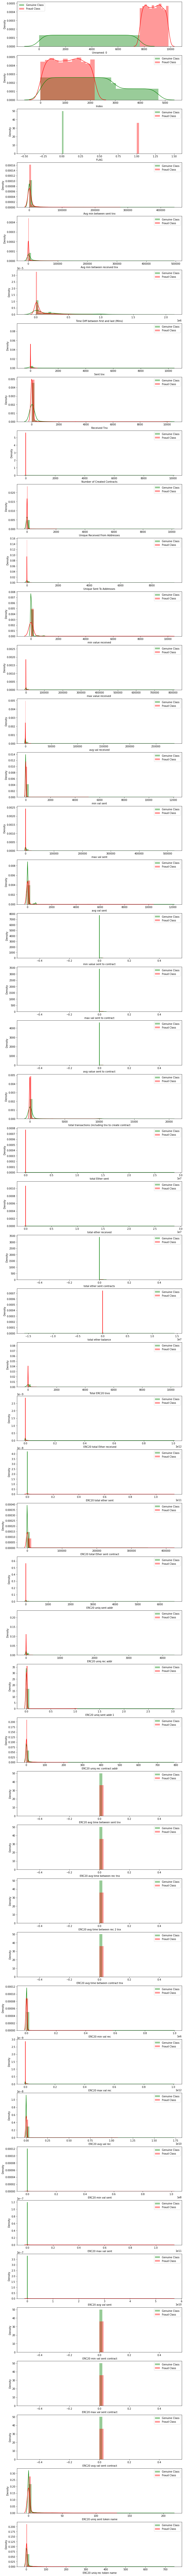

In [38]:
import matplotlib.gridspec as gridspec

#Data Visualization for checking the distribution for Genuine cases & Fraud cases for each feature
v_features = ether_df.columns
plt.figure(figsize=(12,48*4))
gs = gridspec.GridSpec(48,1)

for i, col in enumerate(v_features):
    ax = plt.subplot(gs[i])
    sns.distplot(ether_df[col][ether_df['FLAG']==0],color='g',label='Genuine Class')
    sns.distplot(ether_df[col][ether_df['FLAG']==1],color='r',label='Fraud Class')
    ax.legend()
plt.show()

In [32]:
#Using logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = ether_df.drop('FLAG', axis=1).to_numpy()
y = ether_df["FLAG"].to_numpy().reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

X_train = scaler.fit_transform(X_train)

model1 = IsolationForest(random_state=2)
model1.fit(X_train, y_train)

X_test = scaler.transform(X_test)

y_pred1 = model1.predict(X_test)
y_pred1[y_pred1==1] = 0 
y_pred1[y_pred1==-1] = 1
accuracy = accuracy_score(y_test, y_pred1)


# # Standardize features of X
# X = scaler.fit_transform(X)
# y = scaler.transform(y)

# print(X)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1529
           1       0.10      0.03      0.05       274

    accuracy                           0.81      1803
   macro avg       0.47      0.49      0.47      1803
weighted avg       0.73      0.81      0.77      1803



Text(91.68, 0.5, 'Actual label')

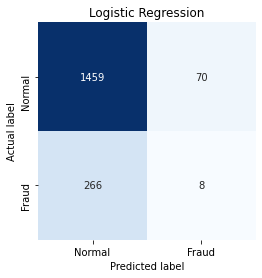

In [34]:
print(classification_report(y_test, y_pred1))

mat1 = confusion_matrix(y_test, y_pred1)
labels = ['Normal', 'Fraud']

sns.heatmap(mat1, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [19]:
#Using logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


X = ether_df.drop('FLAG', axis=1)
y = ether_df["FLAG"]
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

model1 = IsolationForest(random_state=2)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
y_pred1[y_pred1==1] = 0 
y_pred1[y_pred1==-1] = 1
accuracy = accuracy_score(y_test, y_pred1)


Logistic Regression
Accuracy: 0.813
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1529
           1       0.10      0.03      0.05       274

    accuracy                           0.81      1803
   macro avg       0.47      0.49      0.47      1803
weighted avg       0.73      0.81      0.77      1803



Text(91.68, 0.5, 'Actual label')

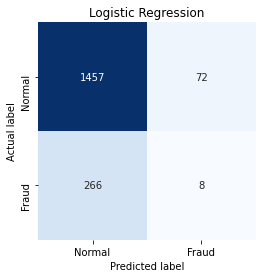

In [21]:
print("Logistic Regression")
print("Accuracy: %.3f"%(accuracy))
print(classification_report(y_test, y_pred1))

mat1 = confusion_matrix(y_test, y_pred1)
labels = ['Normal', 'Fraud']

sns.heatmap(mat1, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')